In [13]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster
# from colorthief import ColorThief
import fast_colorthief
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

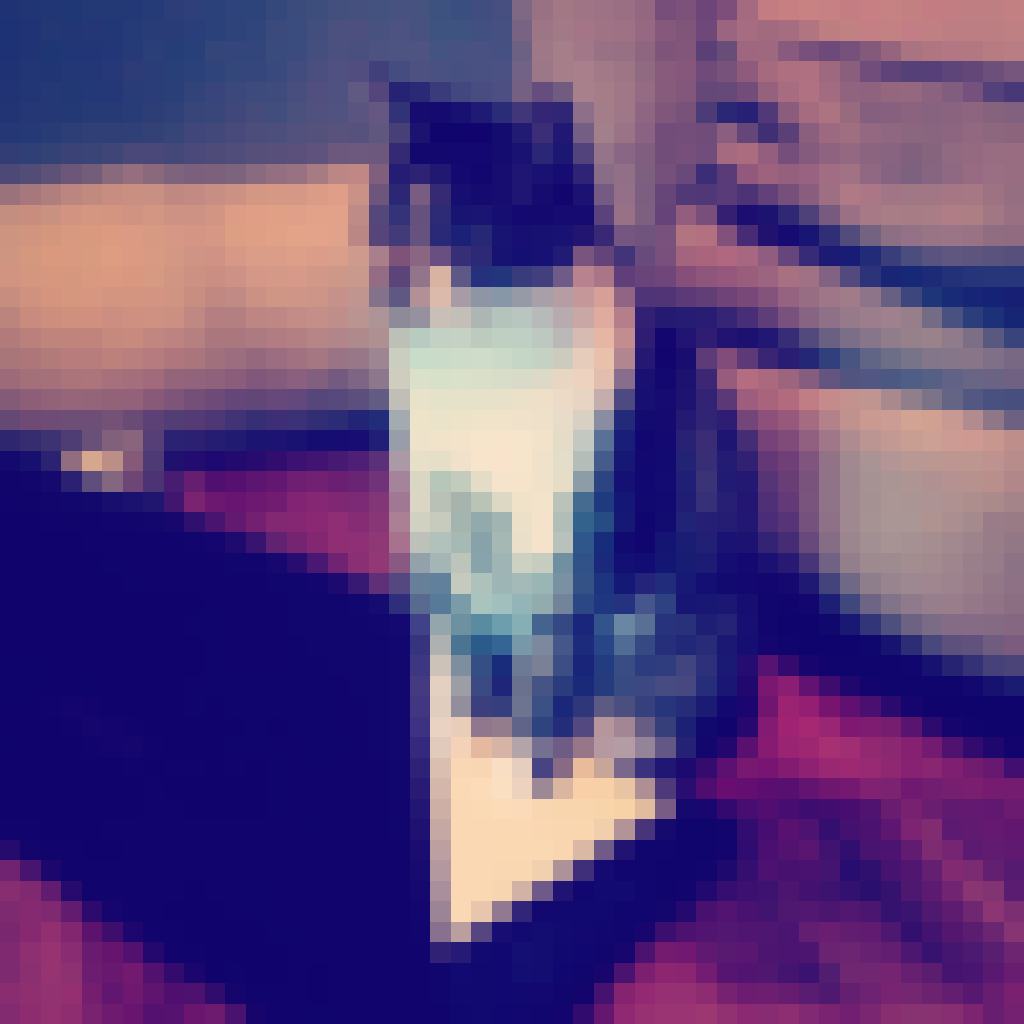

In [3]:
#https://stackoverflow.com/questions/47143332/how-to-pixelate-a-square-image-to-256-big-pixels-with-python
file = "sample_images/ginger_computer.png"
pixel_size = 50

img = Image.open("sample_images/ginger_computer.png")

# Resize smoothly down 
imgSmall = img.resize((pixel_size ,pixel_size ),resample=Image.BILINEAR)

# Scale back up using NEAREST to original size
result = imgSmall.resize(img.size,Image.NEAREST)

# Save
result.save(file.replace(".png", "_pixels_" + str(pixel_size) + ".png"))

result

In [4]:
result.width

1024

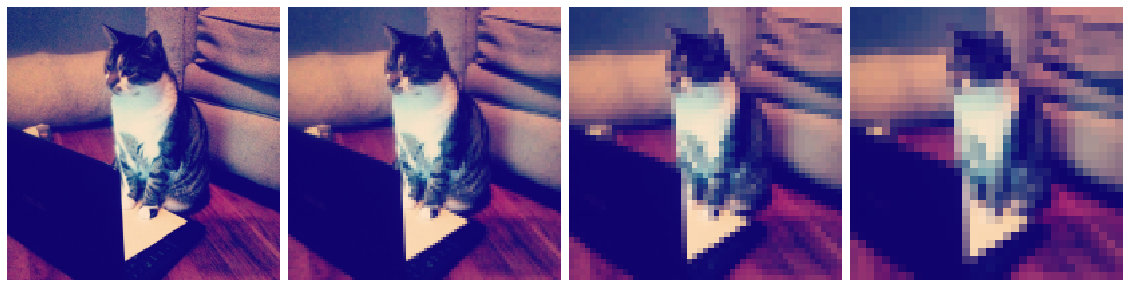

In [5]:
def pixelate_rgb(img, window):
    n, m, _ = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n, m, 3))
    for x in range(0, n, window):
        for y in range(0, m, window):
            img1[x:x+window,y:y+window] = img[x:x+window,y:y+window].mean(axis=(0,1))
    return img1

img = plt.imread(file)

fig, ax = plt.subplots(1, 4, figsize=(20,10))

ax[0].imshow(pixelate_rgb(img, 5))
ax[1].imshow(pixelate_rgb(img, 10))
ax[2].imshow(pixelate_rgb(img, 20))
ax[3].imshow(pixelate_rgb(img, 30))

# remove frames
[a.set_axis_off() for a in ax.flatten()]
plt.subplots_adjust(wspace=0.03, hspace=0)

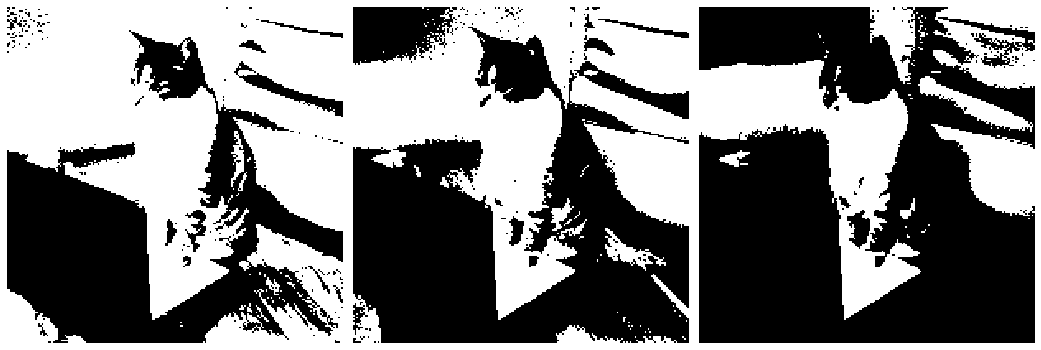

In [6]:
def pixelate_bin(img, window, threshold):
    n, m = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n,m))
    for x in range(0, n, window):
        for y in range(0, m, window):
            if img[x:x+window,y:y+window].mean() > threshold:
                img1[x:x+window,y:y+window] = 1
    return img1

# convert image to grayscale
img = np.dot(plt.imread(file), [0.299 , 0.587, 0.114])

fig, ax = plt.subplots(1, 3, figsize=(15,10))

plt.tight_layout()
ax[0].imshow(pixelate_bin(img, 5, .2), cmap='gray')
ax[1].imshow(pixelate_bin(img, 5, .3), cmap='gray')
ax[2].imshow(pixelate_bin(img, 5, .45), cmap='gray')

# remove frames
[a.set_axis_off() for a in ax.flatten()]
plt.subplots_adjust(wspace=0.03, hspace=0)

### Nexus images and their dominant colors

Nexus_Image_Iterator/full_sprial_grids_55_.png
(49, 46, 47)


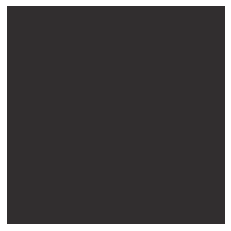

Nexus_Image_Iterator/grid_sprial_test_3_.png
(4, 4, 4)


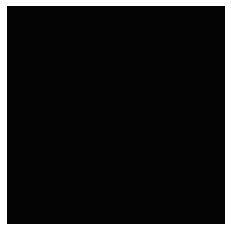

Nexus_Image_Iterator/more_compressedfull_sprial_grids_8_resized.png
(4, 4, 4)


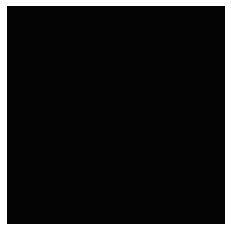

Nexus_Image_Iterator/back_forth_grid_69_.png
(4, 4, 4)


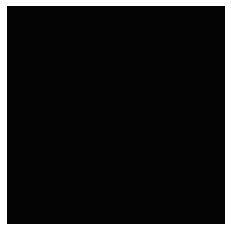

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_21_resized.png
(151, 135, 131)


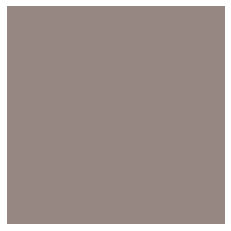

Nexus_Image_Iterator/Nataliia 4_composite_final_2_90.png
(143, 148, 162)


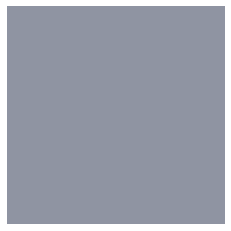

Nexus_Image_Iterator/MC 4_composite_2.png
(188, 172, 161)


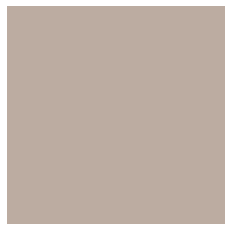

Nexus_Image_Iterator/Spiderplant 2_composite_final_2_90676_resized.png
(172, 144, 145)


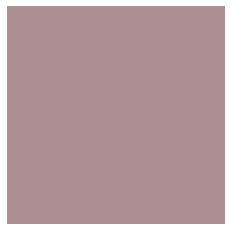

Nexus_Image_Iterator/more_compressedfull_sprial_grids_48_resized.png
(127, 113, 109)


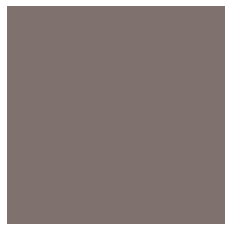

Nexus_Image_Iterator/Kathy_composite_1.png
(111, 91, 80)


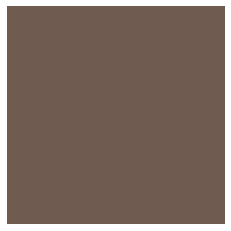

Nexus_Image_Iterator/Kathy_2_composite_final_2_90.png
(120, 121, 90)


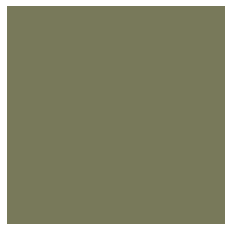

Nexus_Image_Iterator/moving_picture_grid_102_.png
(4, 4, 4)


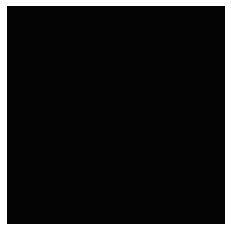

Nexus_Image_Iterator/John_composite_2.png
(177, 171, 144)


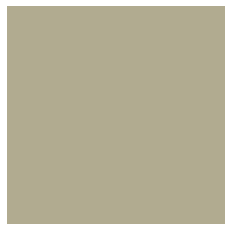

Nexus_Image_Iterator/MC 3_composite_final_8_90.png
(132, 136, 149)


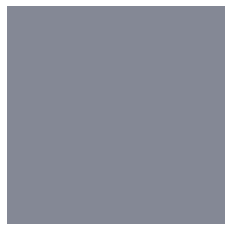

Nexus_Image_Iterator/eisa_composite_final_6_90.png
(138, 133, 131)


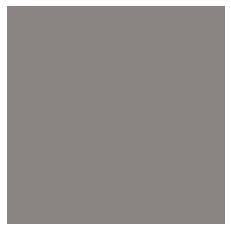

Nexus_Image_Iterator/Victor_composite_final_5_90.png
(112, 81, 75)


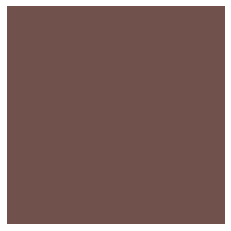

Nexus_Image_Iterator/full_sprial_grids_87_resized.png
(4, 4, 4)


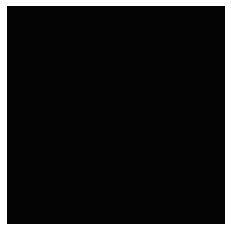

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_51_resized.png
(129, 115, 113)


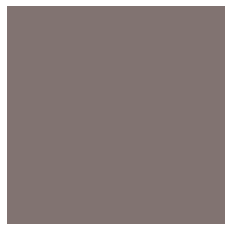

Nexus_Image_Iterator/Spiderplant_composite_final_9_90.png
(130, 115, 118)


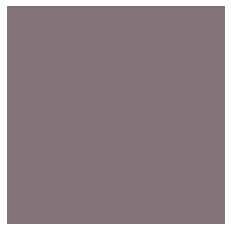

Nexus_Image_Iterator/Jeanfiedo_composite_final_2_90.png
(140, 109, 110)


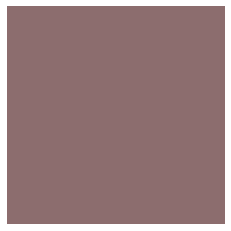

Nexus_Image_Iterator/more_compressedfull_sprial_grids_38_resized.png
(155, 141, 139)


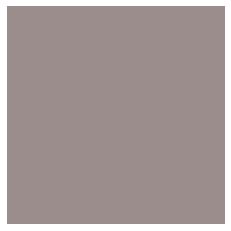

Nexus_Image_Iterator/moving_picture_grid_92_.png
(155, 137, 132)


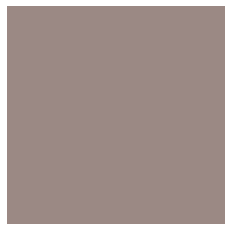

Nexus_Image_Iterator/moving_picture_grid_11_resized.png
(4, 4, 4)


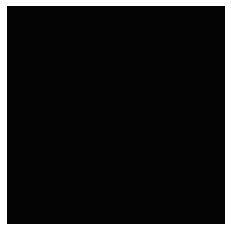

Nexus_Image_Iterator/Dan_composite_4.png
(168, 146, 153)


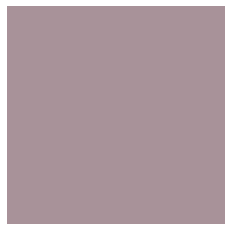

Nexus_Image_Iterator/full_sprial_grids_14_.png
(4, 4, 4)


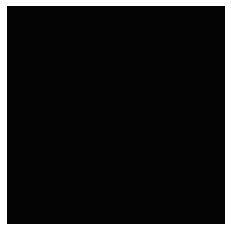

Nexus_Image_Iterator/Spiderplant_composite_final_5_90.png
(144, 141, 138)


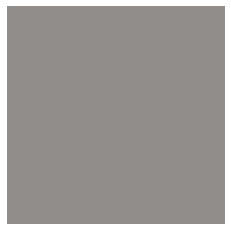

Nexus_Image_Iterator/Victor_composite_final_9_90.png
(132, 87, 68)


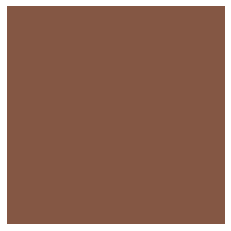

Nexus_Image_Iterator/Sibel_composite_final_1_90.png
(162, 154, 137)


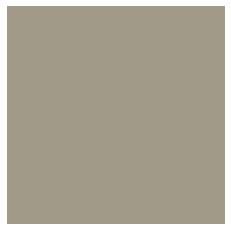

Nexus_Image_Iterator/full_sprial_grids_24_resized.png
(151, 136, 133)


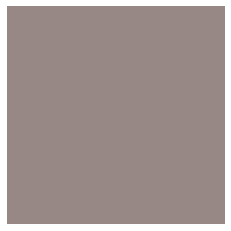

Nexus_Image_Iterator/full_sprial_grids_100_resized.png
(4, 4, 4)


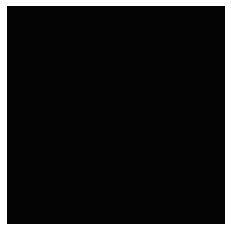

Nexus_Image_Iterator/back_forth_grid_28_.png
(11, 10, 10)


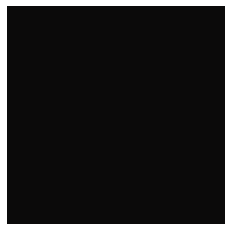

Nexus_Image_Iterator/more_compressedfull_sprial_grids_66_resized.png
(15, 14, 14)


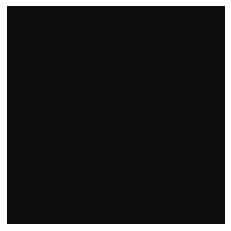

Nexus_Image_Iterator/MC 3_composite_final_4_90.png
(168, 148, 146)


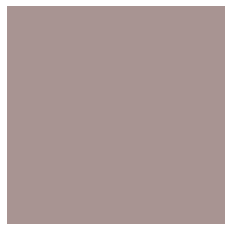

Nexus_Image_Iterator/back_forth_grid_70_resized.png
(4, 4, 4)


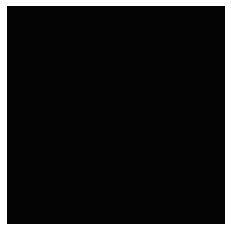

Nexus_Image_Iterator/moving_picture_grid_84_.png
(12, 11, 11)


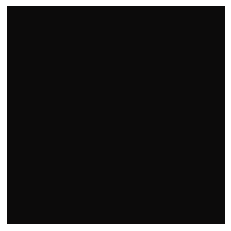

Nexus_Image_Iterator/moving_picture_grid_61_resized.png
(137, 124, 124)


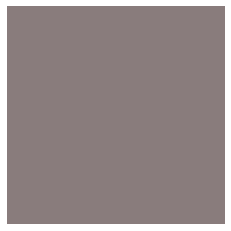

Nexus_Image_Iterator/full_sprial_grids_43_.png
(12, 12, 12)


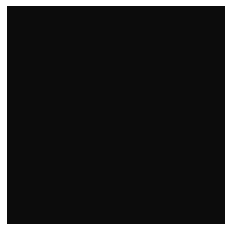

Nexus_Image_Iterator/grid_sprial_test_22_resized.png
(151, 135, 131)


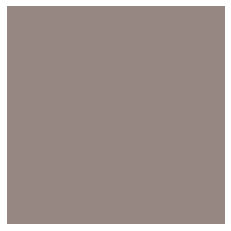

Nexus_Image_Iterator/full_sprial_grids_54_resized.png
(128, 115, 112)


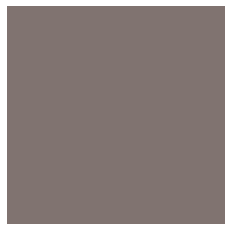

Nexus_Image_Iterator/Kasey Edgerton 2_composite_2.png
(73, 46, 47)


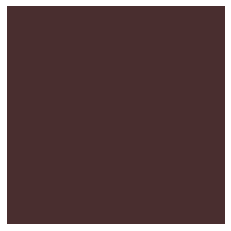

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_82_resized.png
(152, 135, 131)


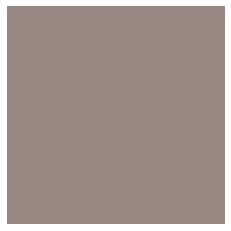

Nexus_Image_Iterator/RainbowSpaceman_composite_final_3_90.png
(70, 82, 93)


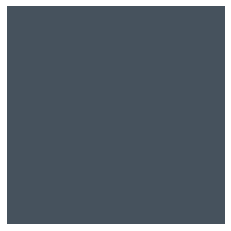

Nexus_Image_Iterator/more_compressedfull_sprial_grids_16_resized.png
(153, 137, 133)


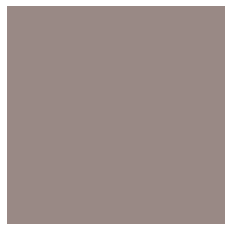

Nexus_Image_Iterator/Mika_composite_4.png
(82, 62, 49)


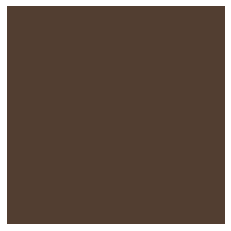

Nexus_Image_Iterator/back_forth_grid_0_resized.png
(4, 4, 4)


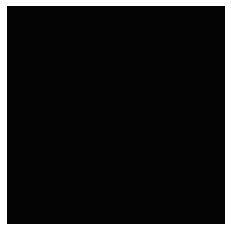

Nexus_Image_Iterator/moving_picture_grid_114_.png
(4, 4, 4)


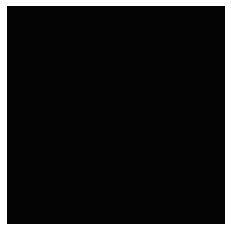

Nexus_Image_Iterator/MC 2_composite_final_0_90.png
(140, 140, 147)


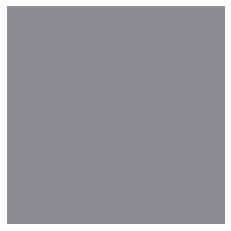

Nexus_Image_Iterator/Spiderplant 4_composite_final_1_90.png
(117, 105, 97)


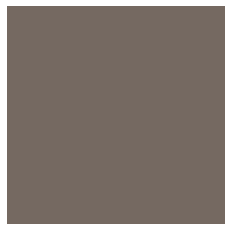

Nexus_Image_Iterator/moving_picture_grid_80_resized.png
(14, 13, 13)


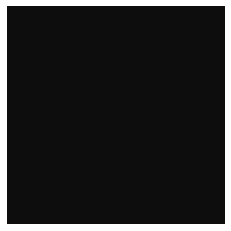

Nexus_Image_Iterator/full_sprial_grids_38_.png
(156, 141, 140)


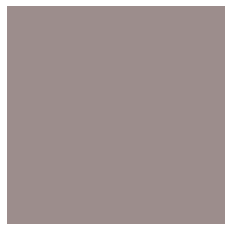

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_63_resized.png
(152, 139, 138)


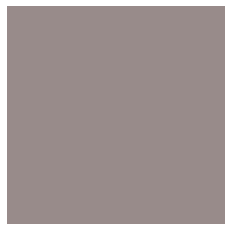

Nexus_Image_Iterator/full_sprial_grids_48_resized.png
(128, 115, 112)


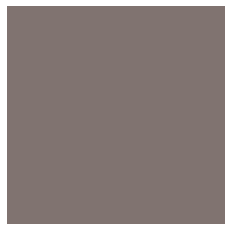

Nexus_Image_Iterator/grid_sprial_test_1_resized.png
(4, 4, 4)


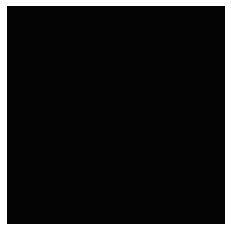

Nexus_Image_Iterator/Kasey Edgerton 2_composite_3.png
(99, 96, 89)


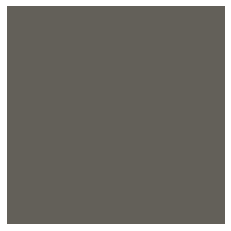

Nexus_Image_Iterator/moving_picture_grid_47_.png
(156, 141, 139)


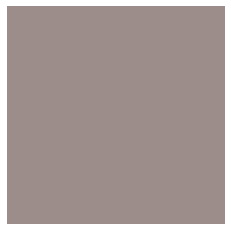

Nexus_Image_Iterator/grid_sprial_test_25_.png
(155, 138, 134)


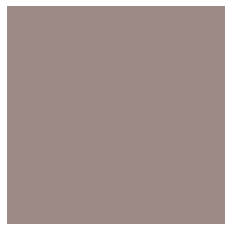

Nexus_Image_Iterator/back_forth_grid_53_.png
(155, 137, 132)


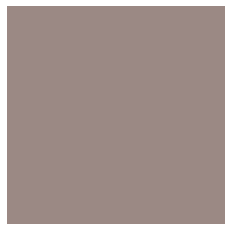

Nexus_Image_Iterator/Jeanfiedo_composite_final_3_90.png676_resized.png
(140, 113, 107)


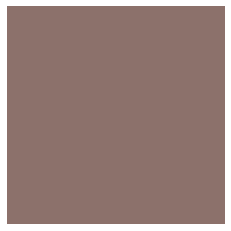

Nexus_Image_Iterator/full_sprial_grids_80_.png
(155, 137, 132)


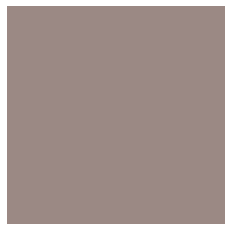

Nexus_Image_Iterator/more_compressedfull_sprial_grids_87_resized.png
(4, 4, 4)


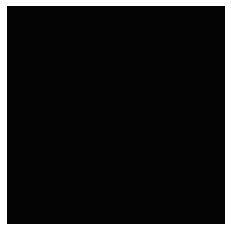

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_9_90.png
(117, 126, 133)


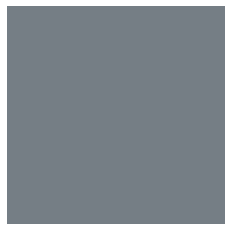

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_13_resized.png
(4, 4, 4)


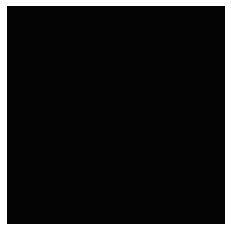

Nexus_Image_Iterator/back_forth_grid_1_.png
(143, 148, 161)


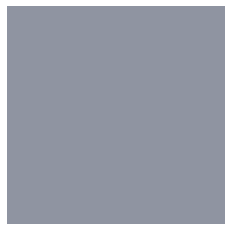

Nexus_Image_Iterator/Nataliia 2_composite_4.png
(171, 140, 127)


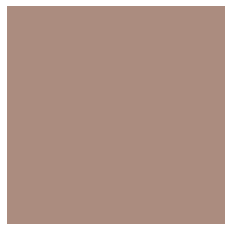

Nexus_Image_Iterator/Cindy_composite_final_5_90.png
(132, 120, 122)


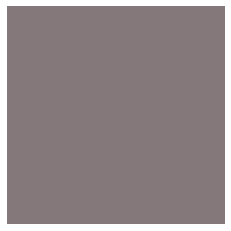

Nexus_Image_Iterator/full_sprial_grids_38_resized.png
(156, 141, 139)


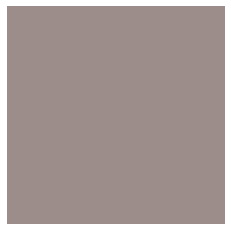

Nexus_Image_Iterator/full_sprial_grids_6_resized.png
(4, 4, 4)


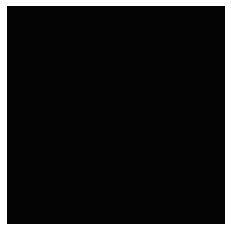

Nexus_Image_Iterator/moving_picture_grid_10_.png
(4, 4, 4)


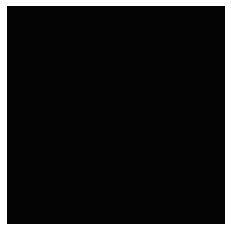

Nexus_Image_Iterator/Nataliia_composite_final_6_90.png
(148, 134, 139)


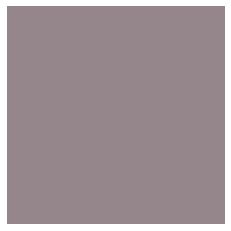

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_5_90.png
(89, 84, 87)


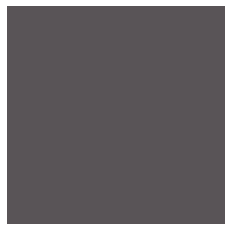

Nexus_Image_Iterator/Dan_composite_final_7_90.png
(149, 124, 136)


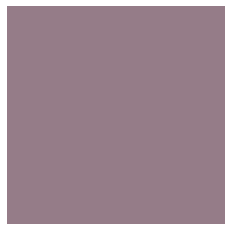

Nexus_Image_Iterator/moving_picture_grid_53_resized.png
(164, 146, 142)


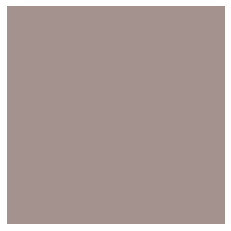

Nexus_Image_Iterator/full_sprial_grids_96_.png
(4, 4, 4)


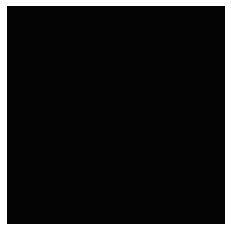

Nexus_Image_Iterator/grid_sprial_test_10_resized.png
(4, 4, 4)


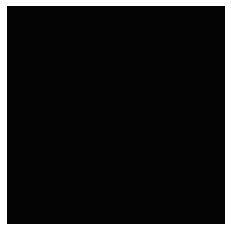

Nexus_Image_Iterator/back_forth_grid_45_.png
(11, 10, 10)


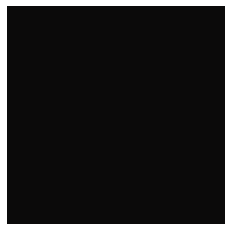

Nexus_Image_Iterator/grid_sprial_test_33_.png
(13, 12, 12)


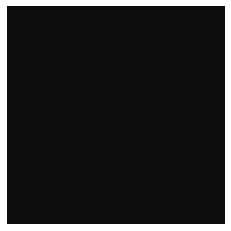

Nexus_Image_Iterator/MC_composite_final_6_90.png
(161, 153, 151)


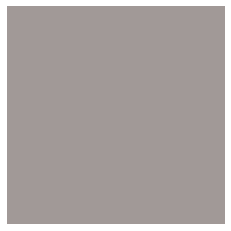

Nexus_Image_Iterator/full_sprial_grids_66_resized.png
(14, 14, 13)


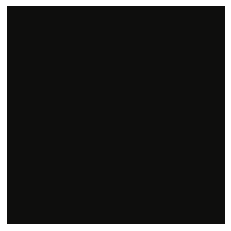

Nexus_Image_Iterator/more_compressedfull_sprial_grids_24_resized.png
(151, 135, 133)


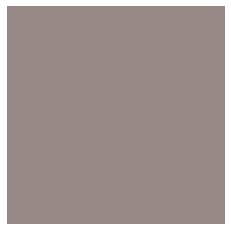

Nexus_Image_Iterator/full_sprial_grids_79_.png
(155, 137, 132)


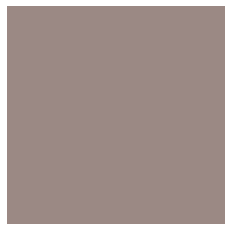

Nexus_Image_Iterator/q329042_composite_final_6_90.png
(115, 101, 103)


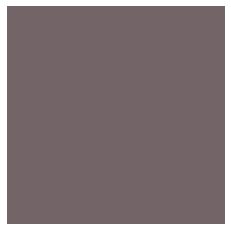

Nexus_Image_Iterator/JR Formanek_composite_final_0_90.png
(141, 141, 132)


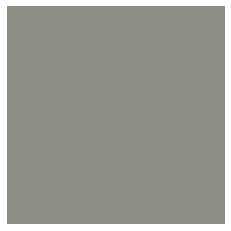

Nexus_Image_Iterator/back_forth_grid_32_resized.png
(152, 139, 138)


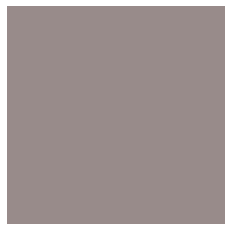

Nexus_Image_Iterator/Cindy_composite_final_9_90.png
(166, 151, 155)


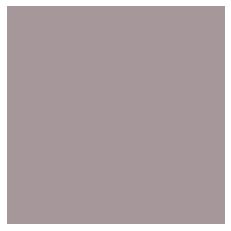

Nexus_Image_Iterator/back_forth_grid_12_.png
(4, 4, 4)


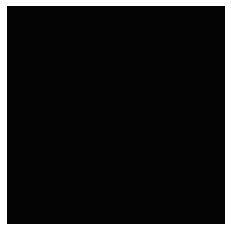

Nexus_Image_Iterator/John_composite_3.png
(108, 104, 87)


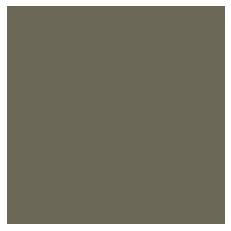

Nexus_Image_Iterator/moving_picture_grid_23_resized.png
(151, 135, 131)


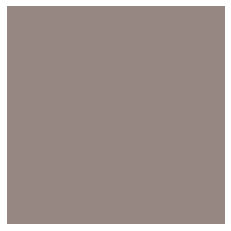

Nexus_Image_Iterator/Rondo_composite_1.png
(120, 80, 35)


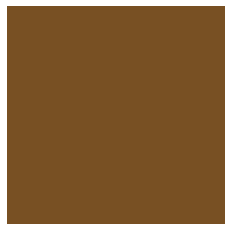

Nexus_Image_Iterator/full_sprial_grids_16_resized.png
(153, 137, 133)


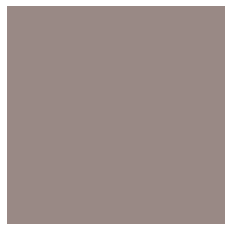

Nexus_Image_Iterator/MC 4_composite_3.png
(126, 131, 141)


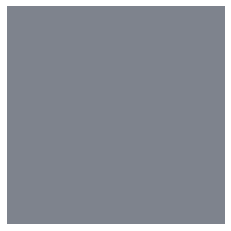

Nexus_Image_Iterator/Spiderplant 2_composite_final_5_90.png676_resized.png
(176, 148, 148)


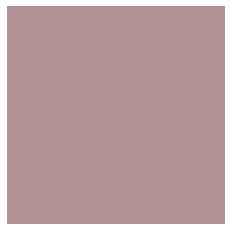

Nexus_Image_Iterator/more_compressedfull_sprial_grids_54_resized.png
(50, 47, 47)


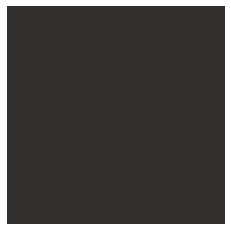

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_1_90.png
(79, 83, 89)


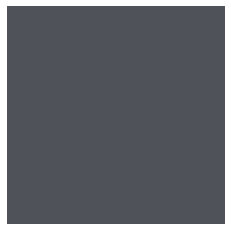

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_1_resized.png
(4, 4, 4)


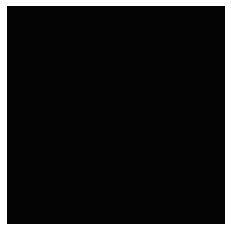

Nexus_Image_Iterator/moving_picture_grid_51_.png
(156, 141, 139)


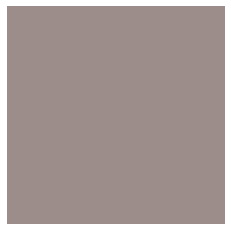

Nexus_Image_Iterator/Quinn_test_2_composite_4.png
(104, 113, 111)


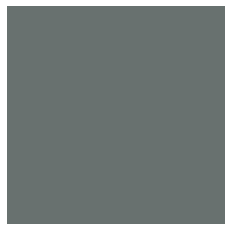

Nexus_Image_Iterator/back_forth_grid_42_resized.png
(12, 12, 12)


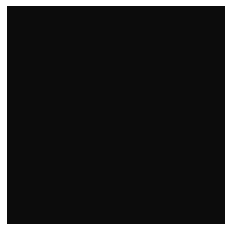

Nexus_Image_Iterator/more_compressedcheckers_test_01_resized.png
(169, 148, 142)


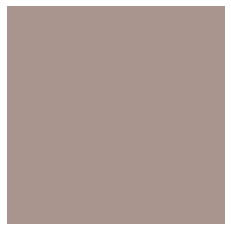

Nexus_Image_Iterator/donya_composite_final_4_90.png
(137, 155, 178)


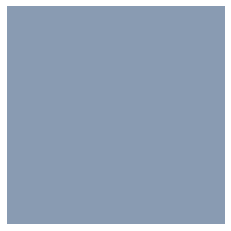

Nexus_Image_Iterator/moving_picture_grid_46_resized.png
(169, 149, 142)


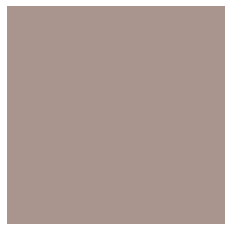

Nexus_Image_Iterator/moving_picture_grid_26_.png
(155, 138, 134)


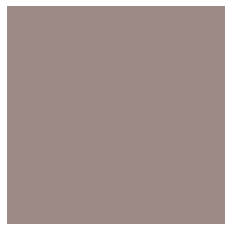

Nexus_Image_Iterator/Mika_composite_final_8_90.png
(101, 103, 115)


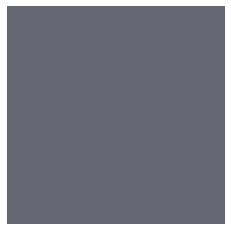

Nexus_Image_Iterator/more_compressedfull_sprial_grids_31_resized.png
(14, 13, 13)


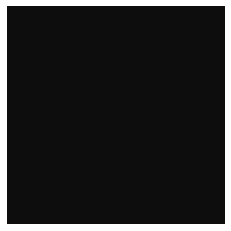

Nexus_Image_Iterator/full_sprial_grids_73_resized.png
(11, 10, 10)


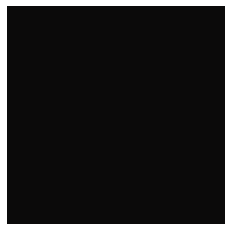

Nexus_Image_Iterator/Kathy_composite_2.png
(123, 113, 86)


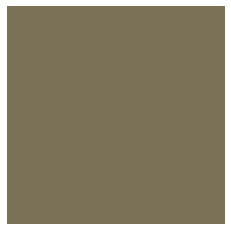

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_58_resized.png
(16, 15, 16)


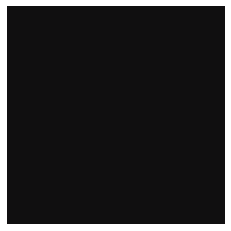

Nexus_Image_Iterator/full_sprial_grids_59_.png
(11, 11, 11)


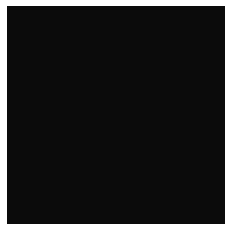

Nexus_Image_Iterator/MC 4_composite_1.png
(191, 181, 178)


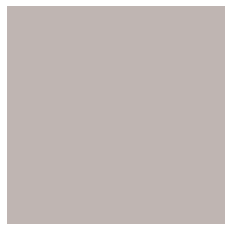

Nexus_Image_Iterator/back_forth_grid_27_resized.png
(10, 10, 10)


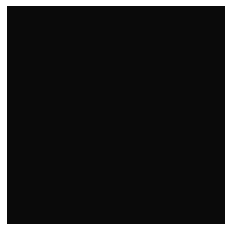

Nexus_Image_Iterator/John_composite_1.png
(149, 130, 110)


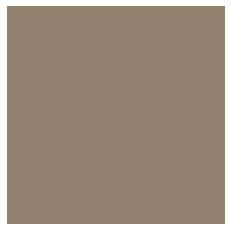

Nexus_Image_Iterator/back_forth_grid_65_.png
(4, 4, 4)


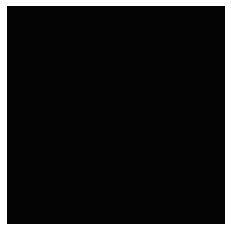

Nexus_Image_Iterator/grid_sprial_test_13_.png
(4, 4, 4)


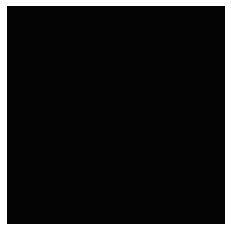

Nexus_Image_Iterator/Rondo_composite_3.png
(96, 76, 59)


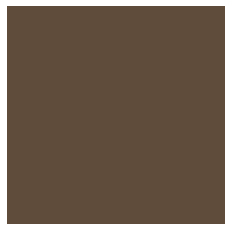

Nexus_Image_Iterator/moving_picture_grid_71_.png
(136, 124, 124)


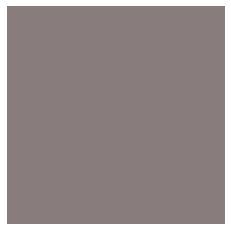

Nexus_Image_Iterator/moving_picture_grid_36_resized.png
(14, 14, 13)


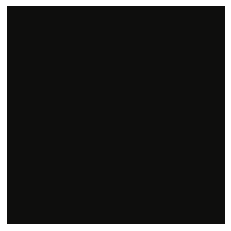

Nexus_Image_Iterator/more_compressedfull_sprial_grids_41_resized.png
(10, 10, 10)


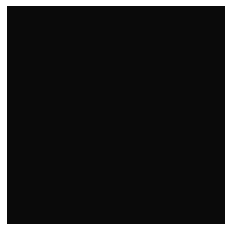

Nexus_Image_Iterator/MC 4_composite_final_7_90.png
(153, 147, 152)


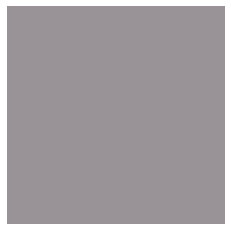

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_28_resized.png
(11, 10, 10)


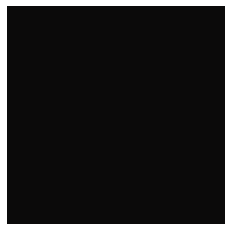

Nexus_Image_Iterator/Nataliia 2_composite_final_9_90.png
(150, 118, 111)


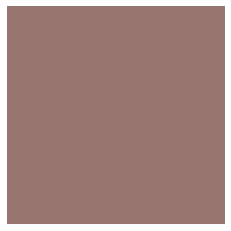

Nexus_Image_Iterator/Baffin_composite_final_1_90.png
(148, 132, 129)


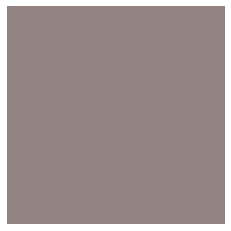

Nexus_Image_Iterator/more_compressedfull_sprial_grids_1_resized.png
(4, 4, 4)


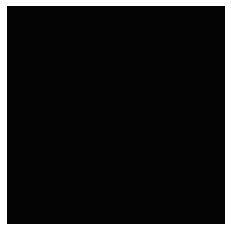

Nexus_Image_Iterator/back_forth_grid_57_resized.png
(153, 137, 133)


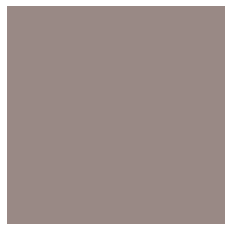

Nexus_Image_Iterator/back_forth_grid_32_.png
(13, 12, 12)


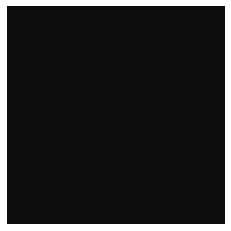

Nexus_Image_Iterator/Spiderplant 2_composite_final_7_90676_resized.png
(158, 137, 136)


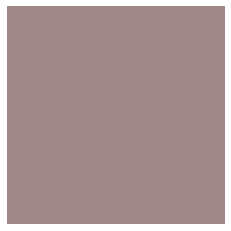

Nexus_Image_Iterator/moving_picture_grid_95_resized.png
(152, 136, 131)


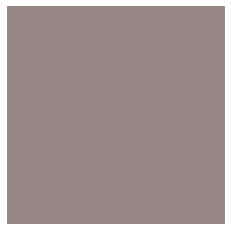

Nexus_Image_Iterator/moving_picture_grid_67_.png
(136, 124, 124)


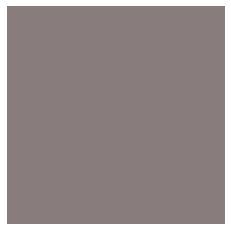

Nexus_Image_Iterator/moving_picture_grid_88_.png
(155, 139, 134)


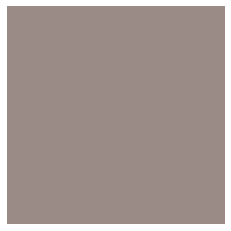

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_76_resized.png
(151, 135, 133)


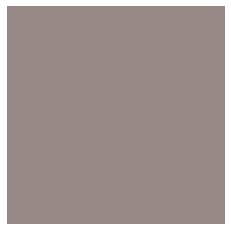

Nexus_Image_Iterator/back_forth_grid_9_resized.png
(4, 4, 4)


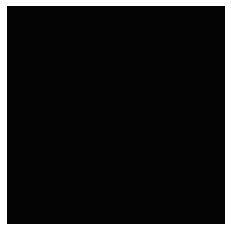

Nexus_Image_Iterator/Actias_composite_final_6_90.png
(166, 139, 130)


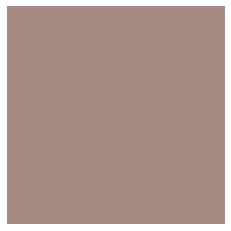

Nexus_Image_Iterator/full_sprial_grids_18_.png
(156, 138, 131)


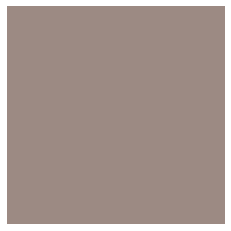

Nexus_Image_Iterator/Spiderplant_composite_4.png
(122, 119, 125)


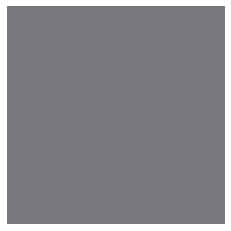

Nexus_Image_Iterator/Nataliia 2_composite_final_5_90.png
(167, 165, 171)


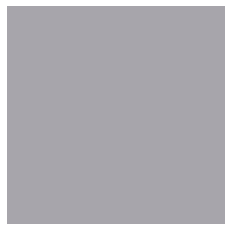

Nexus_Image_Iterator/moving_picture_grid_68_resized.png
(137, 124, 124)


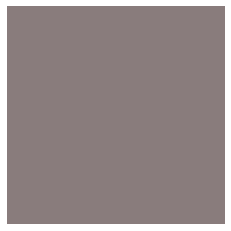

Nexus_Image_Iterator/back_forth_grid_24_.png
(156, 138, 134)


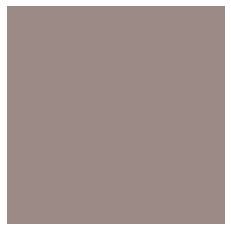

Nexus_Image_Iterator/moving_picture_grid_30_.png
(12, 11, 11)


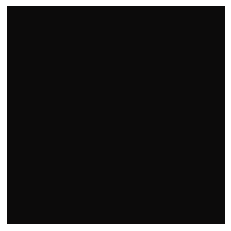

Nexus_Image_Iterator/Mika_composite_final_4_90.png
(131, 118, 110)


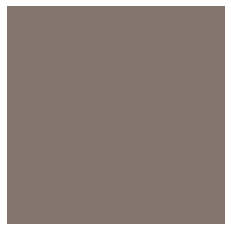

Nexus_Image_Iterator/more_compressedfull_sprial_grids_92_resized.png
(4, 4, 4)


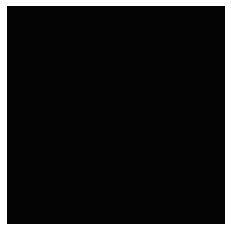

Nexus_Image_Iterator/Kasey Edgerton 2_composite_1.png
(13, 17, 20)


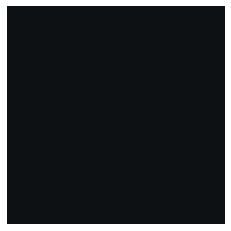

Nexus_Image_Iterator/donya_composite_final_8_90.png
(141, 142, 154)


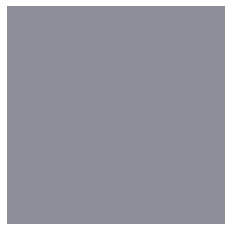

Nexus_Image_Iterator/full_sprial_grids_0_.png
(4, 4, 4)


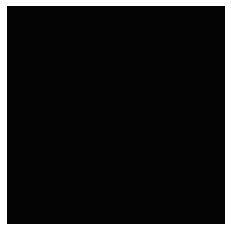

Nexus_Image_Iterator/back_forth_grid_73_.png
(4, 4, 4)


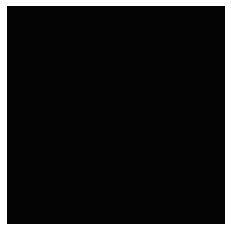

Nexus_Image_Iterator/moving_picture_grid_18_resized.png
(153, 137, 132)


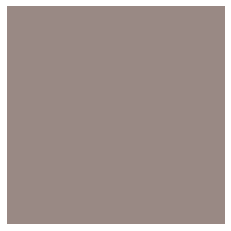

Nexus_Image_Iterator/Sloth Vibes_composite_4.png
(157, 146, 165)


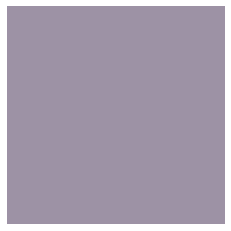

Nexus_Image_Iterator/more_compressedfull_sprial_grids_73_resized.png
(156, 140, 136)


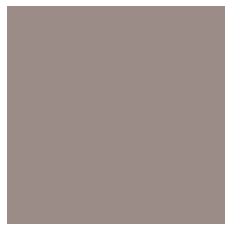

Nexus_Image_Iterator/q329042_composite_4.png
(147, 122, 107)


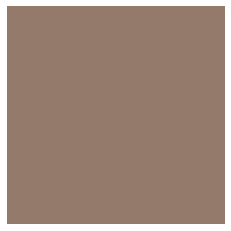

Nexus_Image_Iterator/full_sprial_grids_31_resized.png
(12, 12, 12)


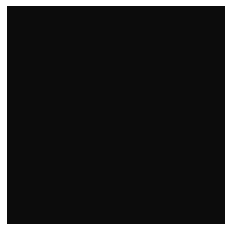

Nexus_Image_Iterator/Soul vision_composite_final_9_90.png
(62, 42, 38)


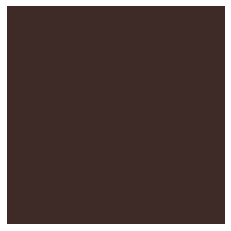

Nexus_Image_Iterator/Sloth Vibes_composite_final_0_90.png
(149, 139, 159)


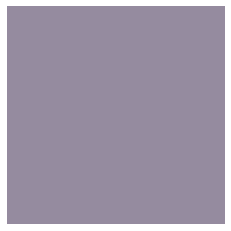

Nexus_Image_Iterator/back_forth_grid_65_resized.png
(4, 4, 4)


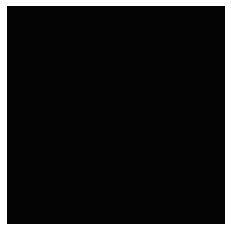

Nexus_Image_Iterator/full_sprial_grids_34_.png
(13, 13, 12)


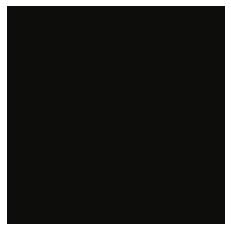

Nexus_Image_Iterator/Kathy_composite_final_5_90.png
(137, 124, 89)


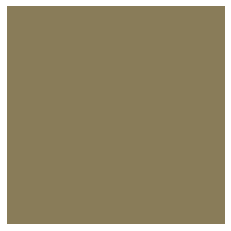

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_6_90.png
(97, 84, 86)


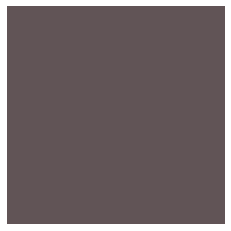

Nexus_Image_Iterator/moving_picture_grid_1_.png
(4, 4, 4)


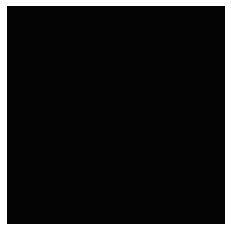

Nexus_Image_Iterator/moving_picture_grid_74_resized.png
(137, 124, 124)


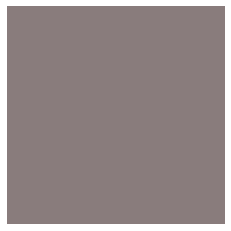

Nexus_Image_Iterator/moving_picture_grid_103_resized.png
(4, 4, 4)


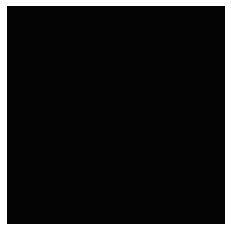

Nexus_Image_Iterator/Kasey Edgerton_composite_final_2_90.png
(149, 135, 137)


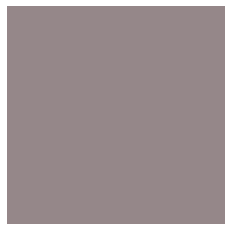

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_97_resized.png
(4, 4, 4)


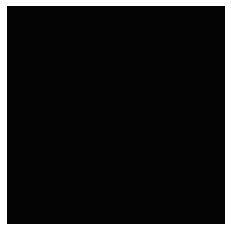

Nexus_Image_Iterator/Quinn_test_2_composite_final_2_90.png
(129, 121, 111)


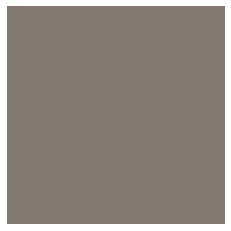

Nexus_Image_Iterator/grid_sprial_test_8_resized.png
(4, 4, 4)


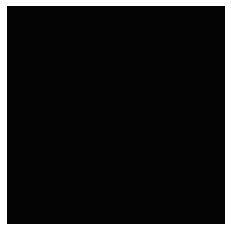

Nexus_Image_Iterator/full_sprial_grids_41_resized.png
(10, 10, 10)


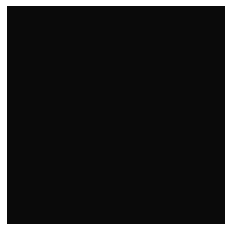

Nexus_Image_Iterator/Nataliia3_composite_final_5_90.png
(161, 168, 178)


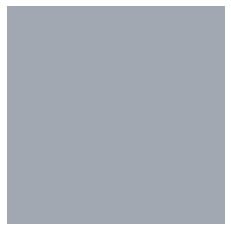

Nexus_Image_Iterator/grid_sprial_test_29_.png
(12, 11, 11)


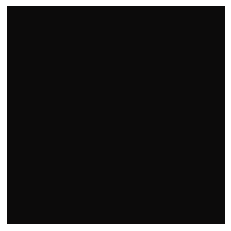

Nexus_Image_Iterator/moving_picture_grid_5_resized.png
(4, 4, 4)


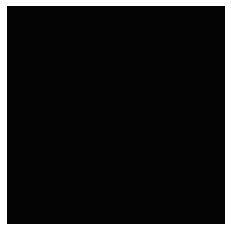

Nexus_Image_Iterator/moving_picture_grid_89_resized.png
(151, 135, 133)


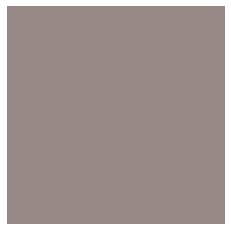

Nexus_Image_Iterator/back_forth_grid_15_resized.png
(4, 4, 4)


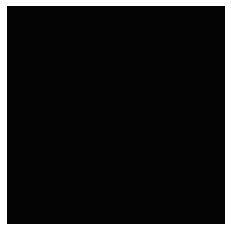

Nexus_Image_Iterator/full_sprial_grids_63_.png
(156, 141, 140)


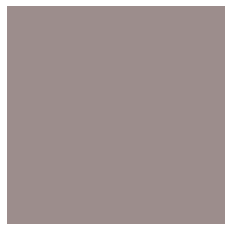

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_8_resized.png
(4, 4, 4)


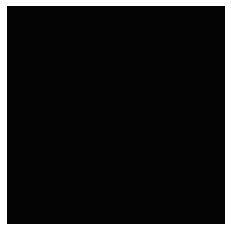

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_34_resized.png
(152, 138, 136)


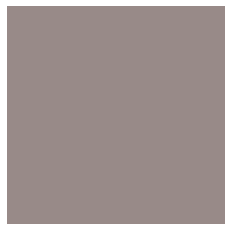

Nexus_Image_Iterator/monsteroflove_composite_final_0_90.png
(162, 108, 100)


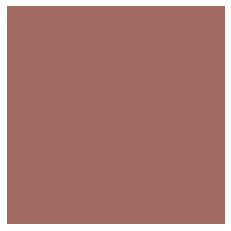

Nexus_Image_Iterator/Spiderplant 2_composite_final_6_90.png
(126, 125, 122)


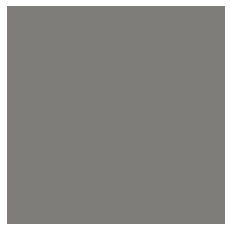

Nexus_Image_Iterator/back_forth_grid_49_.png
(156, 138, 134)


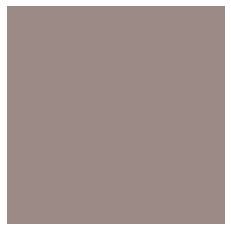

Nexus_Image_Iterator/full_sprial_grids_75_.png
(155, 139, 134)


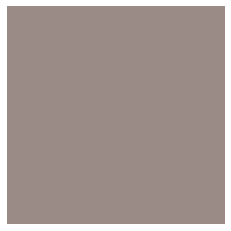

Nexus_Image_Iterator/Nataliia3_composite_final_9_90.png
(164, 142, 135)


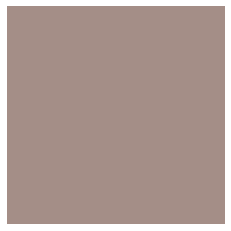

Nexus_Image_Iterator/Soul vision_composite_final_5_90.png
(49, 36, 31)


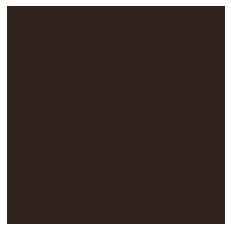

Nexus_Image_Iterator/MC 3_composite_4.png
(129, 124, 138)


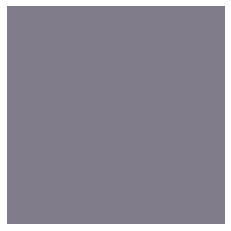

Nexus_Image_Iterator/Rondo_composite_2.png
(138, 112, 83)


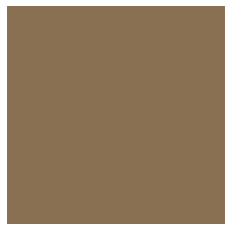

Nexus_Image_Iterator/i_love_chai_composite_final_7_90.png
(106, 75, 93)


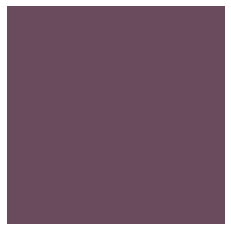

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_44_resized.png
(32, 30, 31)


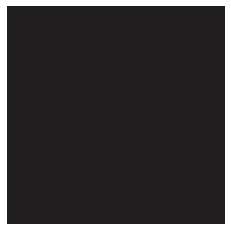

Nexus_Image_Iterator/full_sprial_grids_92_resized.png
(4, 4, 4)


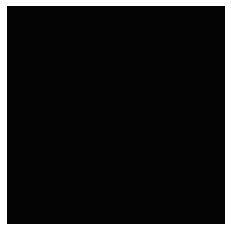

Nexus_Image_Iterator/Rondo_composite_final_7_90.png
(105, 89, 76)


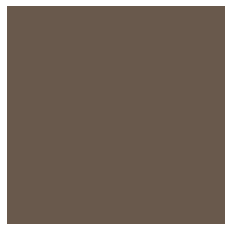

Nexus_Image_Iterator/Kathy_composite_3.png
(179, 173, 153)


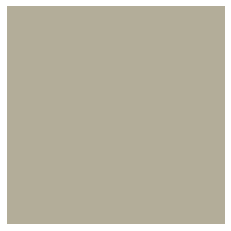

Nexus_Image_Iterator/Spiderplant3_composite_final_3_90.png
(147, 112, 112)


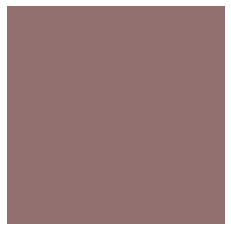

Nexus_Image_Iterator/Kathy_composite_final_9_90.png
(133, 127, 95)


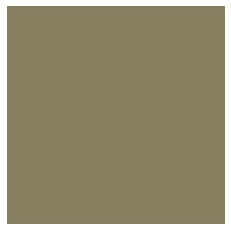

Nexus_Image_Iterator/Jeanfiedo_composite_final_8_90676_resized.png
(115, 101, 95)


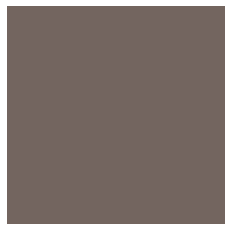

Nexus_Image_Iterator/Prianna _composite_final_2_90.png
(149, 114, 110)


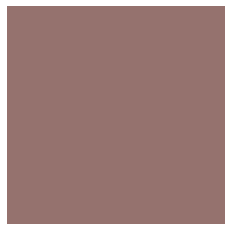

Nexus_Image_Iterator/grid_sprial_test_19_resized.png
(152, 136, 131)


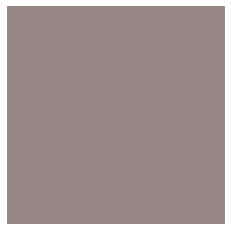

Nexus_Image_Iterator/full_sprial_grids_22_.png
(155, 137, 132)


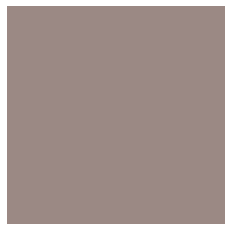

Nexus_Image_Iterator/John_composite_final_1_90.png
(153, 140, 118)


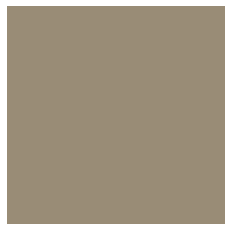

Nexus_Image_Iterator/Mika_composite_final_6_90.png
(125, 120, 121)


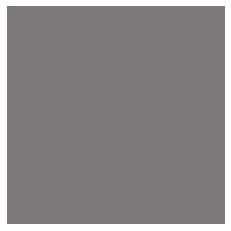

Nexus_Image_Iterator/full_sprial_grids_28_resized.png
(11, 10, 10)


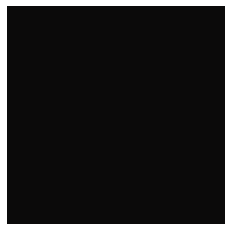

Nexus_Image_Iterator/Quinn_test_2_composite_3.png
(100, 113, 128)


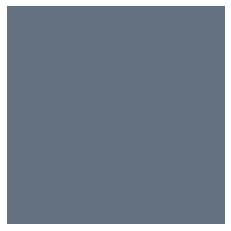

Nexus_Image_Iterator/full_sprial_grids_23_.png
(155, 137, 133)


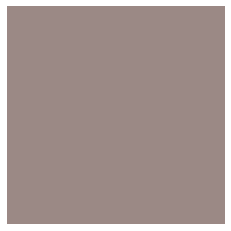

Nexus_Image_Iterator/John_composite_4.png
(152, 150, 141)


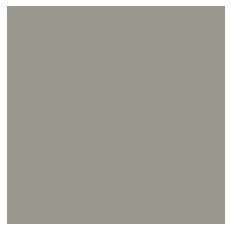

Nexus_Image_Iterator/MC 4_composite_4.png
(143, 120, 126)


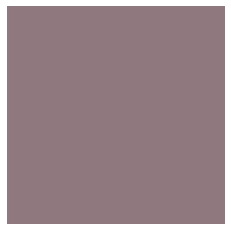

Nexus_Image_Iterator/more_compressedfull_sprial_grids_97_resized.png
(4, 4, 4)


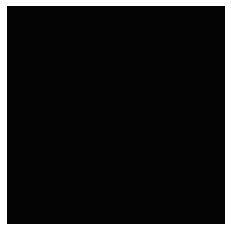

Nexus_Image_Iterator/Spiderplant 2_composite_final_3_90676_resized.png
(171, 137, 137)


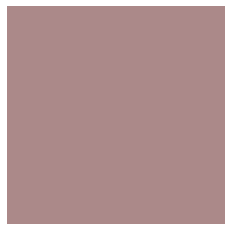

Nexus_Image_Iterator/back_forth_grid_48_.png
(155, 138, 134)


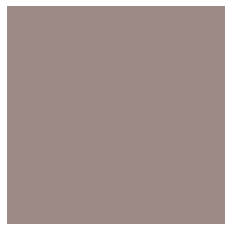

Nexus_Image_Iterator/more_compressedfull_sprial_grids_100_resized.png
(4, 4, 4)


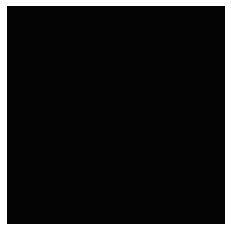

Nexus_Image_Iterator/full_sprial_grids_58_resized.png
(13, 12, 12)


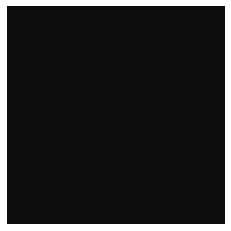

Nexus_Image_Iterator/full_sprial_grids_74_.png
(156, 139, 136)


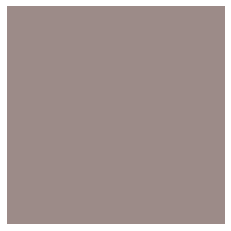

Nexus_Image_Iterator/MC 4_composite_final_9_90.png
(151, 138, 142)


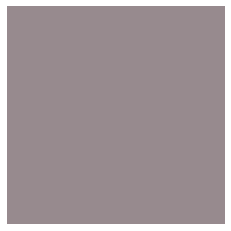

Nexus_Image_Iterator/moving_picture_grid_90_resized.png
(151, 136, 133)


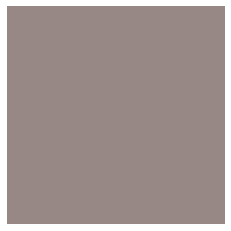

Nexus_Image_Iterator/Nataliia 2_composite_final_7_90.png
(158, 125, 118)


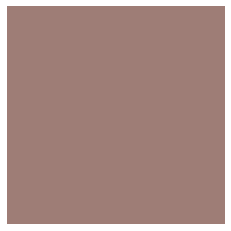

Nexus_Image_Iterator/Actias_composite_final_4_90.png
(173, 144, 138)


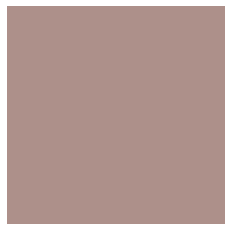

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_73_resized.png
(11, 10, 10)


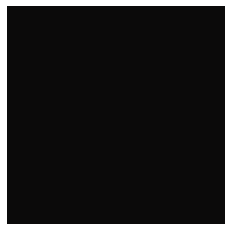

Nexus_Image_Iterator/Jeanfiedo_composite_final_1_90.png676_resized.png
(152, 120, 120)


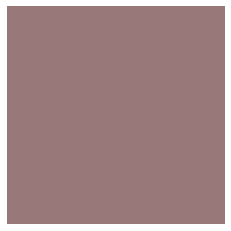

Nexus_Image_Iterator/grid_sprial_test_28_.png
(11, 10, 10)


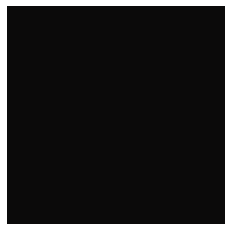

Nexus_Image_Iterator/more_compressedfull_sprial_grids_4_resized.png
(4, 4, 4)


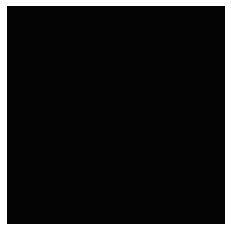

Nexus_Image_Iterator/MC 4_composite_final_5_90.png
(168, 139, 139)


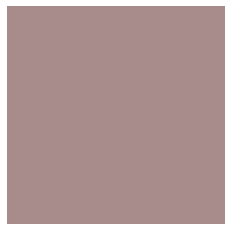

Nexus_Image_Iterator/back_forth_grid_52_resized.png
(151, 135, 131)


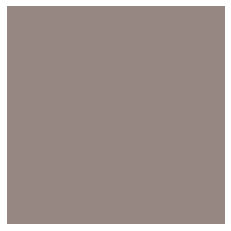

Nexus_Image_Iterator/Dan_composite_2.png
(161, 111, 100)


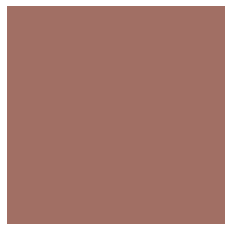

Nexus_Image_Iterator/full_sprial_grids_62_.png
(156, 142, 139)


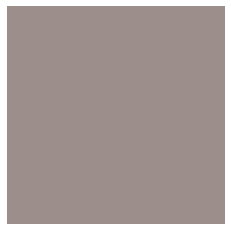

Nexus_Image_Iterator/Spiderplant_composite_1.png
(180, 156, 155)


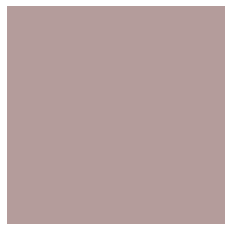

Nexus_Image_Iterator/Actias_composite_final_8_90.png
(142, 117, 112)


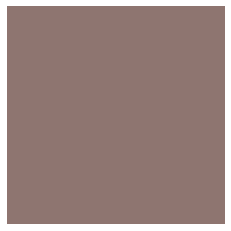

Nexus_Image_Iterator/moving_picture_grid_33_resized.png
(152, 139, 138)


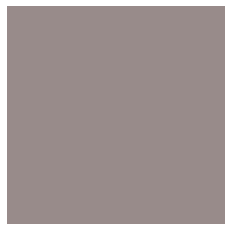

Nexus_Image_Iterator/moving_picture_grid_0_.png
(4, 4, 4)


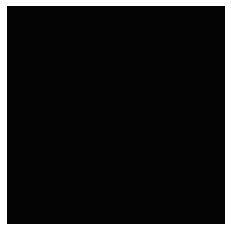

Nexus_Image_Iterator/more_compressedfull_sprial_grids_44_resized.png
(33, 31, 31)


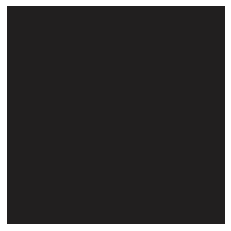

Nexus_Image_Iterator/Baffin_composite_final_3_90.png
(126, 104, 94)


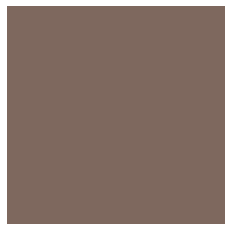

Nexus_Image_Iterator/Nataliia 2_composite_3.png
(171, 164, 162)


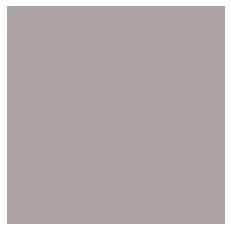

Nexus_Image_Iterator/Mika_composite_2.png
(169, 134, 99)


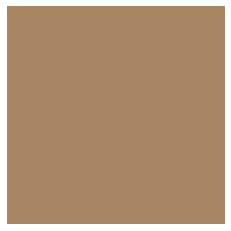

Nexus_Image_Iterator/Kasey Edgerton 2_composite_4.png
(130, 123, 120)


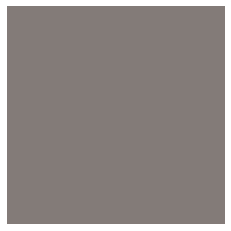

Nexus_Image_Iterator/donya_composite_final_6_90.png
(131, 153, 184)


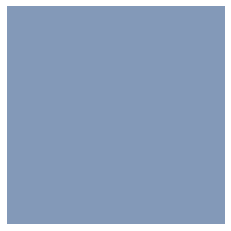

Nexus_Image_Iterator/back_forth_grid_22_resized.png
(151, 135, 131)


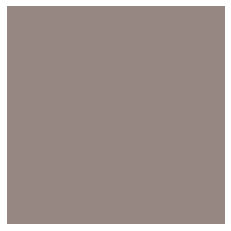

Nexus_Image_Iterator/full_sprial_grids_35_.png
(156, 140, 138)


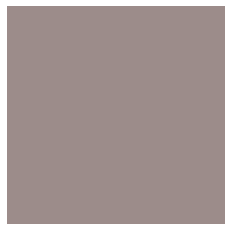

Nexus_Image_Iterator/moving_picture_grid_43_resized.png
(164, 146, 142)


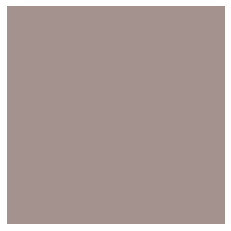

Nexus_Image_Iterator/Spiderplant 2_composite_final_7_90.png676_resized.png
(158, 137, 136)


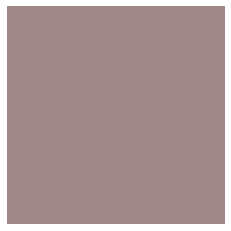

Nexus_Image_Iterator/more_compressedfull_sprial_grids_34_resized.png
(15, 14, 14)


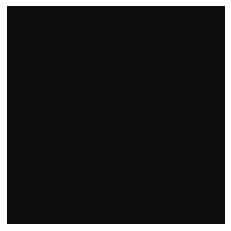

Nexus_Image_Iterator/full_sprial_grids_76_resized.png
(151, 135, 133)


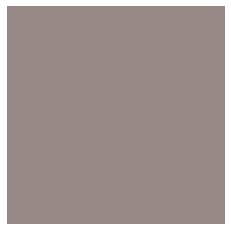

Nexus_Image_Iterator/i_love_chai_composite_final_5_90.png
(114, 97, 93)


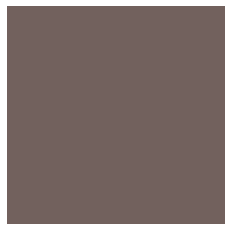

Nexus_Image_Iterator/more_compressedfull_sprial_grids_28_resized.png
(156, 140, 136)


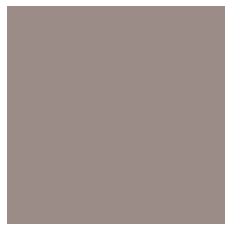

Nexus_Image_Iterator/q329042_composite_1.png
(164, 131, 100)


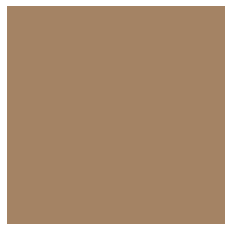

Nexus_Image_Iterator/Rondo_composite_final_5_90.png
(106, 103, 98)


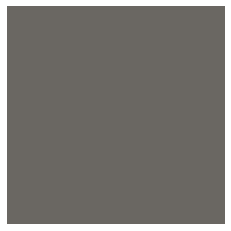

Nexus_Image_Iterator/Sloth Vibes_composite_1.png
(157, 121, 133)


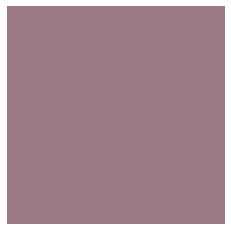

Nexus_Image_Iterator/Soul vision_composite_final_7_90.png
(37, 26, 22)


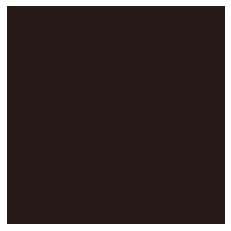

Nexus_Image_Iterator/more_compressedall_test_01_resized.png
(137, 125, 124)


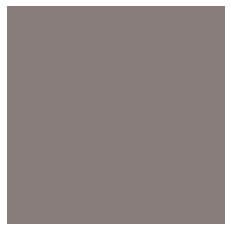

Nexus_Image_Iterator/back_forth_grid_72_.png
(143, 148, 161)


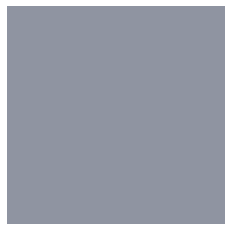

Nexus_Image_Iterator/moving_picture_grid_31_.png
(12, 11, 11)


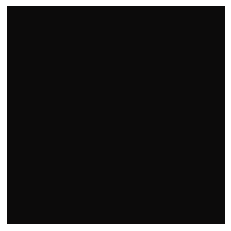

Nexus_Image_Iterator/John_composite_final_3_90.png
(153, 148, 140)


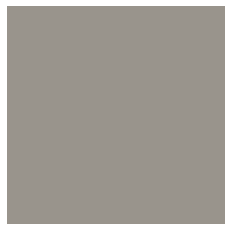

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_41_resized.png
(10, 10, 10)


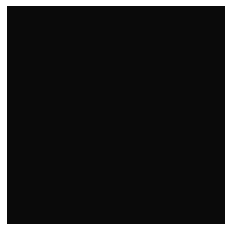

Nexus_Image_Iterator/full_sprial_grids_97_resized.png
(4, 4, 4)


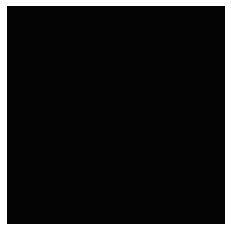

Nexus_Image_Iterator/Spiderplant3_composite_final_1_90.png
(141, 123, 127)


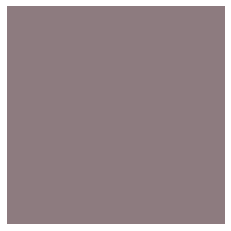

Nexus_Image_Iterator/Prianna _composite_final_0_90.png
(123, 82, 78)


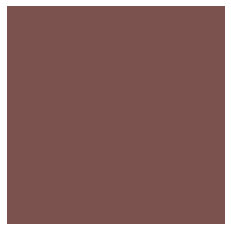

Nexus_Image_Iterator/Mika_composite_3.png
(102, 81, 65)


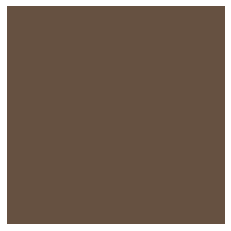

Nexus_Image_Iterator/full_sprial_grids_1_.png
(143, 148, 161)


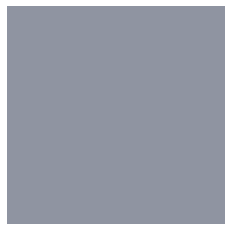

Nexus_Image_Iterator/more_compressedfull_sprial_grids_58_resized.png
(20, 19, 20)


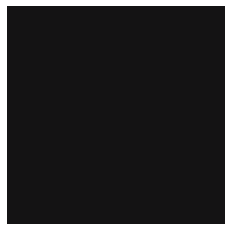

Nexus_Image_Iterator/Nataliia 2_composite_2.png
(144, 135, 140)


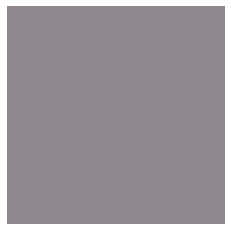

Nexus_Image_Iterator/full_sprial_grids_19_.png
(156, 138, 132)


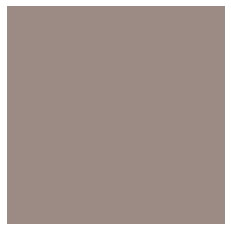

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_8_90.png
(101, 109, 121)


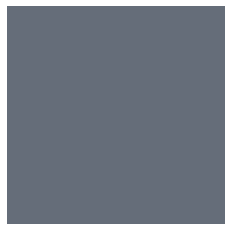

Nexus_Image_Iterator/back_forth_grid_25_.png
(155, 138, 134)


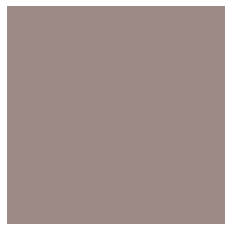

Nexus_Image_Iterator/Dan_composite_3.png
(188, 149, 137)


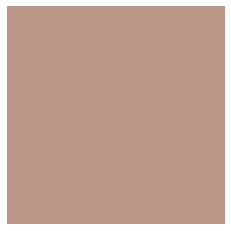

Nexus_Image_Iterator/moving_picture_grid_66_.png
(136, 124, 124)


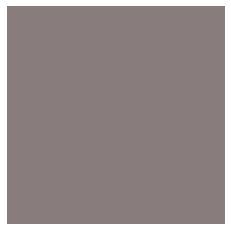

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_31_resized.png
(12, 12, 12)


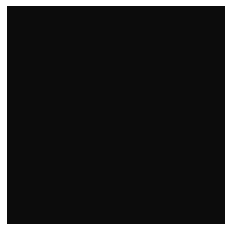

Nexus_Image_Iterator/monsteroflove_composite_final_2_90.png
(124, 83, 68)


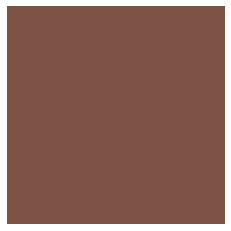

Nexus_Image_Iterator/Spiderplant 2_composite_final_4_90.png
(145, 144, 150)


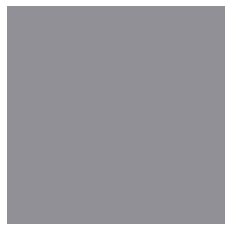

Nexus_Image_Iterator/moving_picture_grid_89_.png
(155, 138, 134)


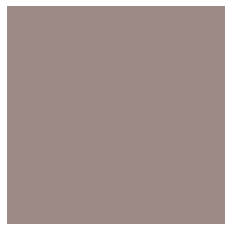

Nexus_Image_Iterator/Kasey Edgerton_composite_final_0_90.png
(124, 113, 116)


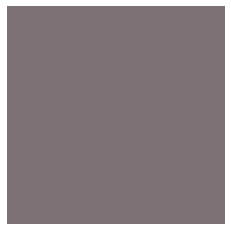

Nexus_Image_Iterator/moving_picture_grid_0_resized.png
(4, 4, 4)


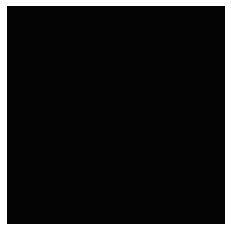

Nexus_Image_Iterator/Quinn_test_2_composite_final_0_90.png
(150, 125, 110)


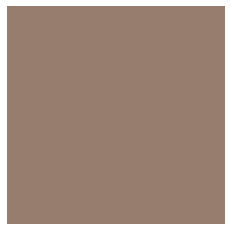

Nexus_Image_Iterator/back_forth_grid_10_resized.png
(4, 4, 4)


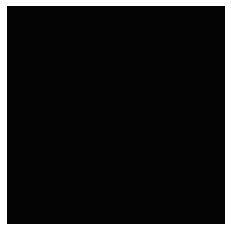

Nexus_Image_Iterator/back_forth_grid_33_.png
(13, 12, 12)


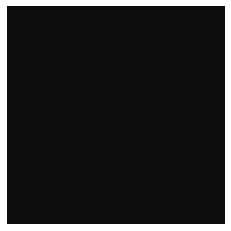

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_4_90.png
(92, 91, 94)


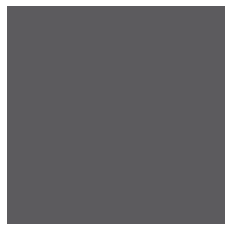

Nexus_Image_Iterator/grid_sprial_test_32_resized.png
(152, 139, 138)


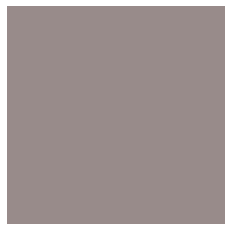

Nexus_Image_Iterator/moving_picture_grid_70_.png
(136, 124, 124)


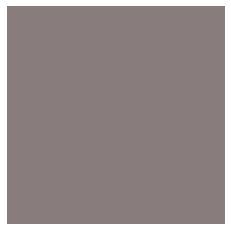

Nexus_Image_Iterator/moving_picture_grid_106_resized.png
(4, 4, 4)


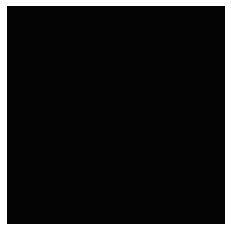

Nexus_Image_Iterator/moving_picture_grid_71_resized.png
(137, 124, 124)


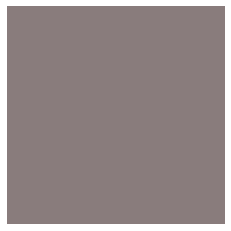

Nexus_Image_Iterator/Spiderplant 2_composite_final_8_90.png
(130, 129, 143)


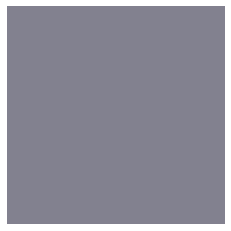

Nexus_Image_Iterator/Nataliia3_composite_final_7_90.png
(147, 130, 130)


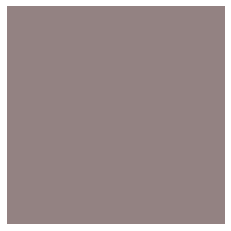

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_92_resized.png
(4, 4, 4)


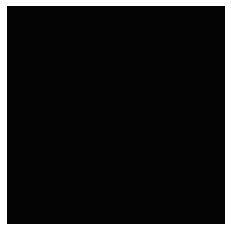

Nexus_Image_Iterator/full_sprial_grids_44_resized.png
(32, 30, 31)


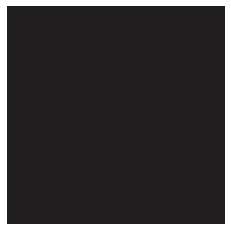

Nexus_Image_Iterator/full_sprial_grids_58_.png
(12, 12, 12)


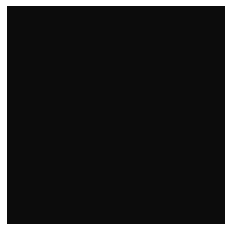

Nexus_Image_Iterator/MC 3_composite_1.png
(191, 181, 178)


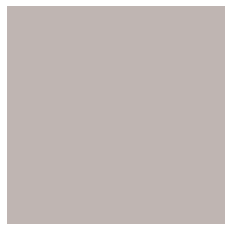

Nexus_Image_Iterator/Rondo_composite_final_9_90.png
(73, 74, 77)


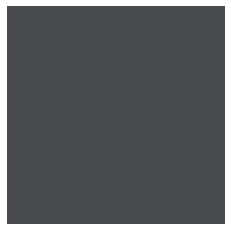

Nexus_Image_Iterator/back_forth_grid_60_resized.png
(4, 4, 4)


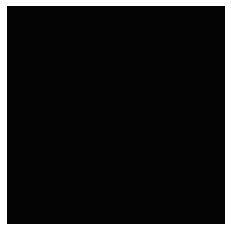

Nexus_Image_Iterator/i_love_chai_composite_final_9_90.png
(125, 78, 74)


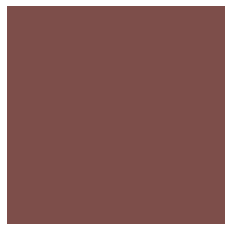

Nexus_Image_Iterator/back_forth_grid_64_.png
(4, 4, 4)


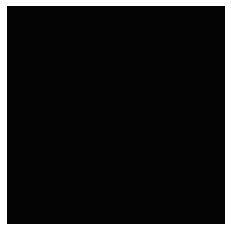

Nexus_Image_Iterator/grid_sprial_test_12_.png
(4, 4, 4)


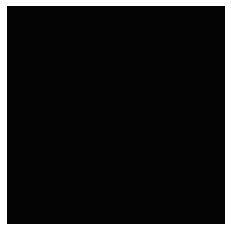

Nexus_Image_Iterator/Quinn_test_2_composite_2.png
(132, 129, 125)


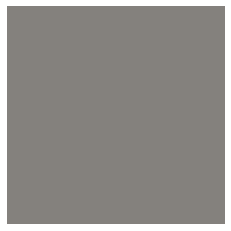

Nexus_Image_Iterator/Kathy_composite_final_7_90.png
(112, 116, 94)


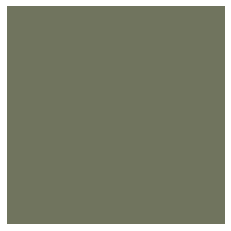

Nexus_Image_Iterator/moving_picture_grid_27_.png
(155, 139, 134)


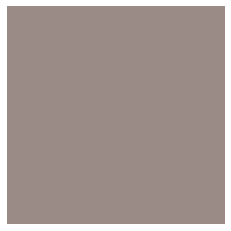

Nexus_Image_Iterator/Sloth Vibes_composite_final_2_90.png
(155, 128, 140)


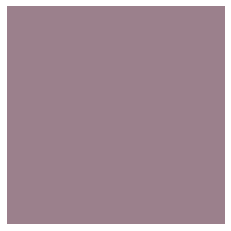

Nexus_Image_Iterator/more_compressedfull_sprial_grids_76_resized.png
(155, 138, 134)


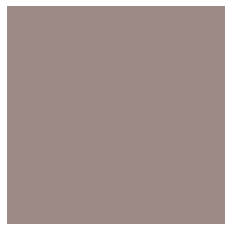

Nexus_Image_Iterator/full_sprial_grids_34_resized.png
(14, 13, 13)


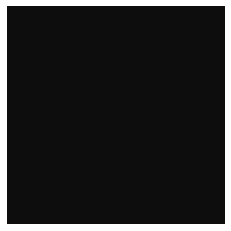

Nexus_Image_Iterator/back_forth_grid_5_resized.png
(4, 4, 4)


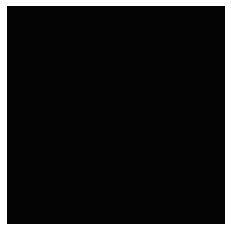

Nexus_Image_Iterator/RainbowSpaceman_composite_final_1_90.png
(63, 68, 76)


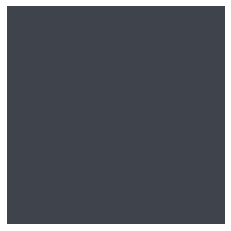

Nexus_Image_Iterator/moving_picture_grid_50_.png
(170, 149, 143)


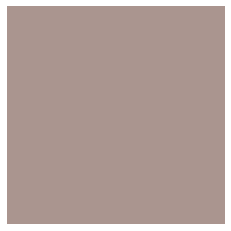

Nexus_Image_Iterator/moving_picture_grid_99_resized.png
(4, 4, 4)


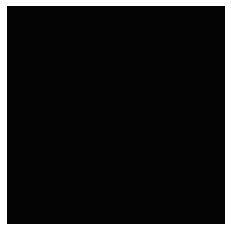

Nexus_Image_Iterator/moving_picture_grid_113_resized.png
(4, 4, 4)


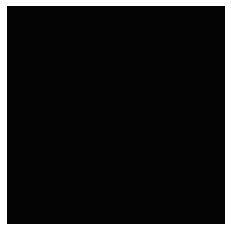

Nexus_Image_Iterator/moving_picture_grid_64_resized.png
(137, 124, 124)


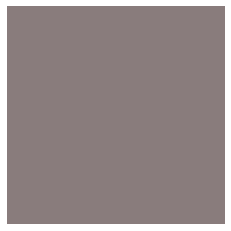

Nexus_Image_Iterator/back_forth_grid_13_.png
(4, 4, 4)


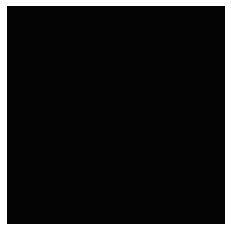

Nexus_Image_Iterator/MC 3_composite_3.png
(173, 144, 144)


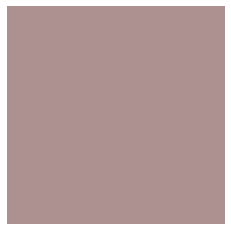

Nexus_Image_Iterator/MC 2_composite_final_2_90.png
(134, 111, 117)


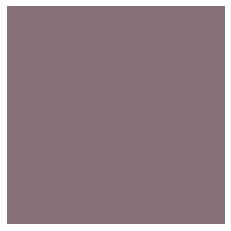

Nexus_Image_Iterator/grid_sprial_test_27_resized.png
(10, 10, 10)


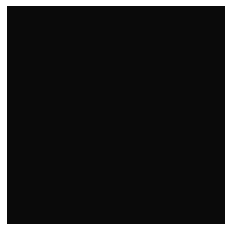

Nexus_Image_Iterator/full_sprial_grids_51_resized.png
(129, 115, 113)


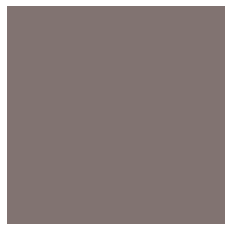

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_87_resized.png
(4, 4, 4)


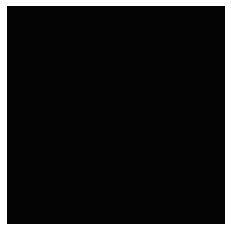

Nexus_Image_Iterator/more_compressedfull_sprial_grids_13_resized.png
(4, 4, 4)


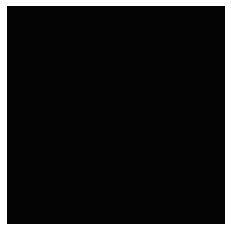

Nexus_Image_Iterator/Kathy_composite_4.png
(177, 144, 112)


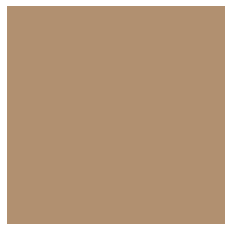

Nexus_Image_Iterator/eisa_composite_final_8_90.png
(131, 109, 106)


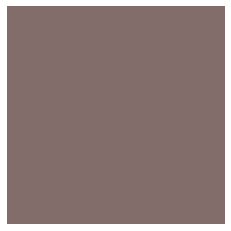

Nexus_Image_Iterator/MC 3_composite_final_6_90.png
(157, 155, 156)


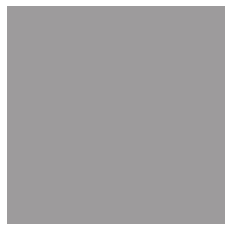

Nexus_Image_Iterator/Spiderplant_composite_final_7_90.png
(145, 111, 102)


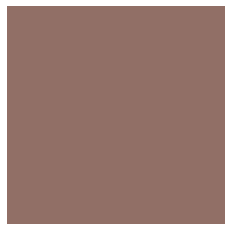

Nexus_Image_Iterator/Sibel_composite_final_3_90.png
(172, 160, 149)


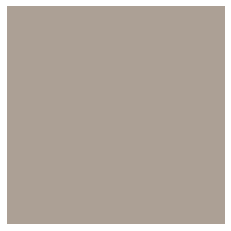

Nexus_Image_Iterator/all_test_01_.png
(139, 120, 118)


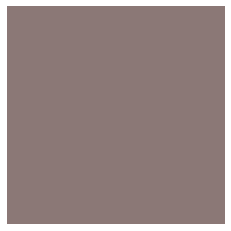

Nexus_Image_Iterator/moving_picture_grid_14_resized.png
(4, 4, 4)


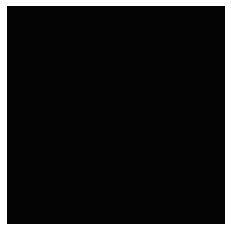

Nexus_Image_Iterator/Spiderplant 2_composite_final_6_90676_resized.png
(124, 124, 121)


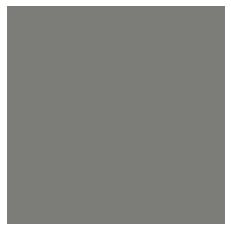

Nexus_Image_Iterator/full_sprial_grids_97_.png
(4, 4, 4)


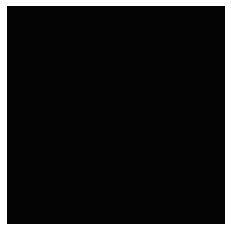

Nexus_Image_Iterator/back_forth_grid_44_.png
(12, 11, 11)


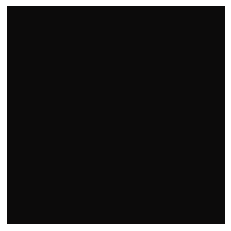

Nexus_Image_Iterator/grid_sprial_test_32_.png
(13, 12, 12)


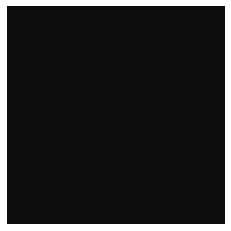

Nexus_Image_Iterator/full_sprial_grids_21_resized.png
(151, 135, 131)


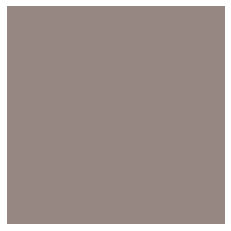

Nexus_Image_Iterator/full_sprial_grids_78_.png
(155, 137, 133)


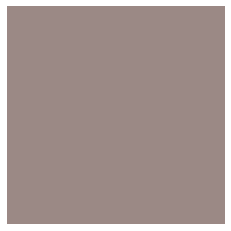

Nexus_Image_Iterator/more_compressedfull_sprial_grids_63_resized.png
(155, 141, 139)


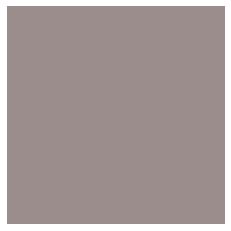

Nexus_Image_Iterator/Victor_composite_final_7_90.png
(155, 114, 84)


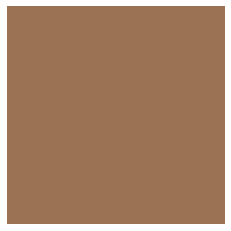

Nexus_Image_Iterator/Dan_composite_1.png
(138, 114, 134)


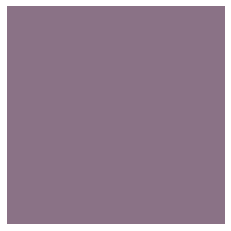

Nexus_Image_Iterator/Jeanfiedo_composite_final_9_90.png676_resized.png
(116, 98, 95)


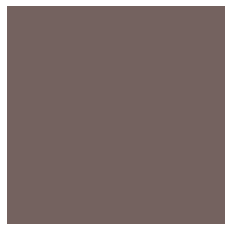

Nexus_Image_Iterator/moving_picture_grid_11_.png
(4, 4, 4)


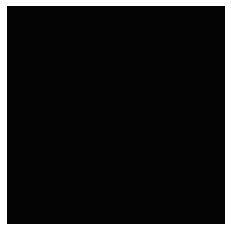

Nexus_Image_Iterator/eisa_composite_final_4_90.png
(140, 120, 114)


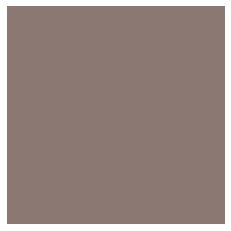

Nexus_Image_Iterator/grid_sprial_test_24_.png
(156, 138, 134)


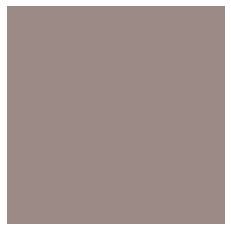

Nexus_Image_Iterator/back_forth_grid_52_.png
(155, 137, 132)


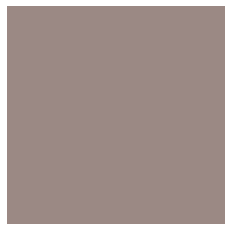

Nexus_Image_Iterator/full_sprial_grids_81_.png
(155, 137, 132)


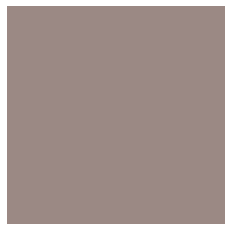

Nexus_Image_Iterator/Spiderplant_composite_2.png
(120, 120, 111)


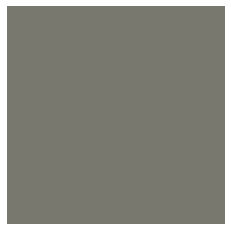

Nexus_Image_Iterator/Jeanfiedo_composite_final_0_90.png
(140, 109, 104)


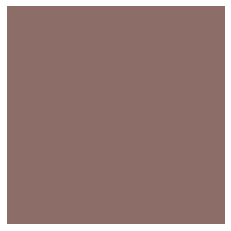

Nexus_Image_Iterator/back_forth_grid_0_.png
(4, 4, 4)


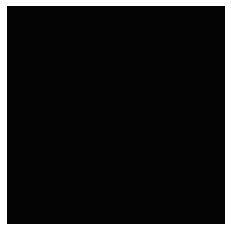

Nexus_Image_Iterator/full_sprial_grids_82_resized.png
(152, 136, 131)


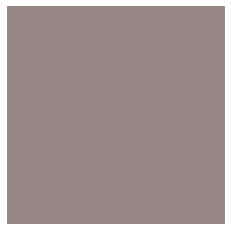

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_54_resized.png
(50, 46, 47)


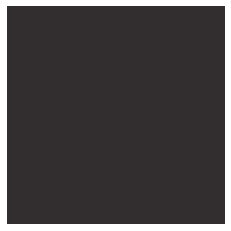

Nexus_Image_Iterator/Mika_composite_1.png
(173, 149, 151)


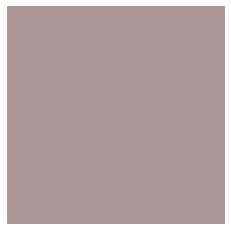

Nexus_Image_Iterator/Nataliia 4_composite_final_0_90.png
(151, 166, 186)


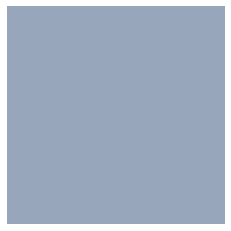

Nexus_Image_Iterator/moving_picture_grid_46_.png
(170, 149, 143)


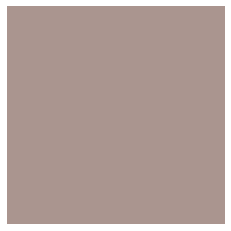

Nexus_Image_Iterator/Kathy_2_composite_final_0_90.png
(139, 120, 87)


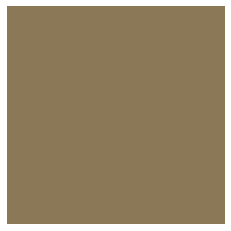

Nexus_Image_Iterator/Sloth Vibes_composite_3.png
(147, 143, 156)


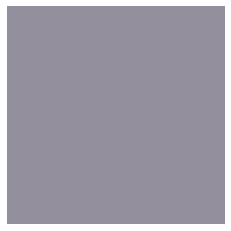

Nexus_Image_Iterator/q329042_composite_3.png
(112, 124, 121)


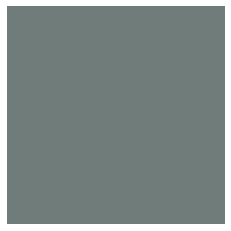

Nexus_Image_Iterator/full_sprial_grids_39_.png
(156, 142, 139)


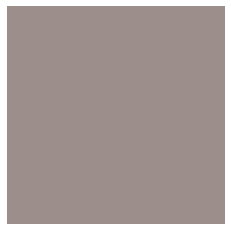

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_24_resized.png
(151, 136, 133)


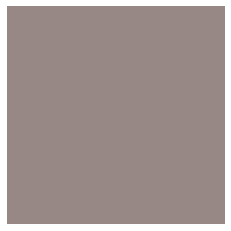

Nexus_Image_Iterator/q329042_composite_2.png
(155, 127, 105)


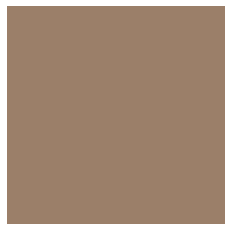

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_4_resized.png
(4, 4, 4)


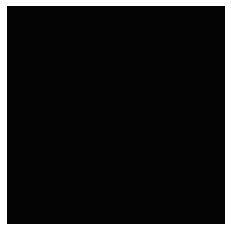

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_38_resized.png
(152, 139, 138)


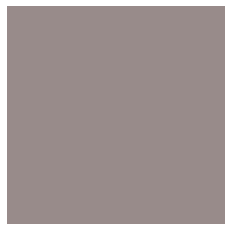

Nexus_Image_Iterator/back_forth_grid_47_resized.png
(10, 10, 10)


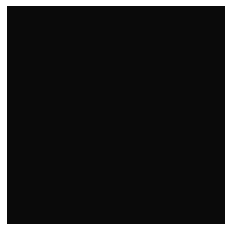

Nexus_Image_Iterator/Sloth Vibes_composite_2.png
(140, 134, 154)


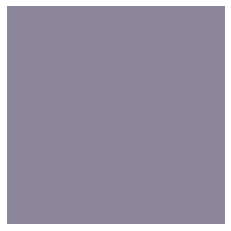

Nexus_Image_Iterator/moving_picture_grid_26_resized.png
(151, 135, 133)


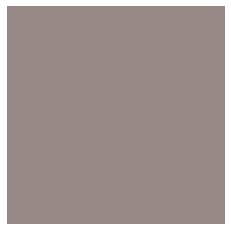

Nexus_Image_Iterator/full_sprial_grids_42_.png
(11, 11, 11)


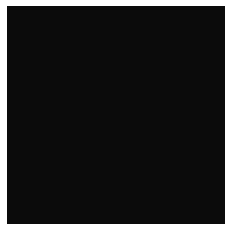

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_3_90.png
(77, 85, 84)


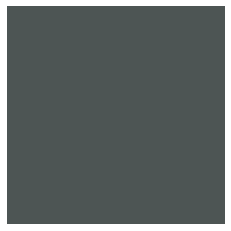

Nexus_Image_Iterator/full_sprial_grids_13_resized.png
(4, 4, 4)


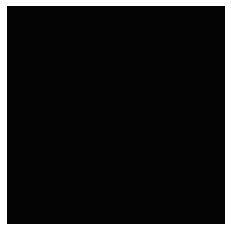

Nexus_Image_Iterator/more_compressedfull_sprial_grids_51_resized.png
(129, 116, 113)


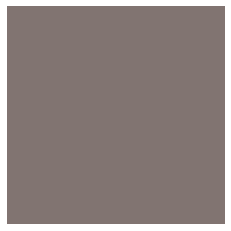

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_48_resized.png
(127, 113, 109)


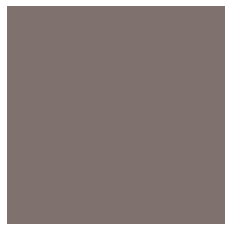

Nexus_Image_Iterator/Nataliia 2_composite_1.png
(146, 142, 152)


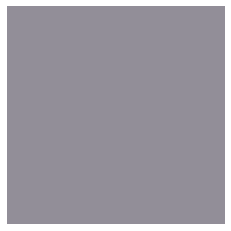

Nexus_Image_Iterator/q329042_composite_final_4_90.png
(158, 116, 94)


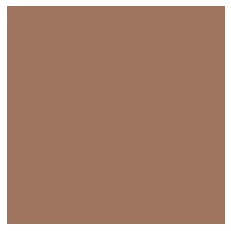

Nexus_Image_Iterator/Spiderplant_composite_3.png
(140, 112, 106)


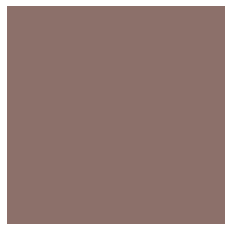

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_7_90.png
(85, 103, 110)


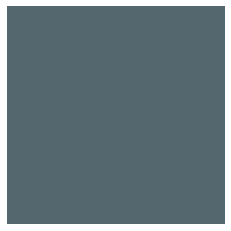

Nexus_Image_Iterator/Dan_composite_final_5_90.png
(125, 98, 94)


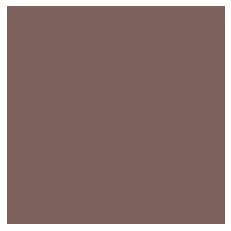

Nexus_Image_Iterator/moving_picture_grid_85_.png
(12, 11, 11)


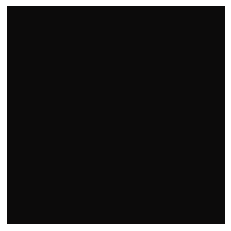

Nexus_Image_Iterator/back_forth_grid_37_resized.png
(14, 14, 13)


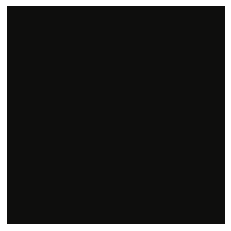

Nexus_Image_Iterator/MC_composite_final_4_90.png
(154, 149, 150)


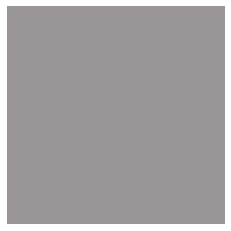

Nexus_Image_Iterator/JR Formanek_composite_final_2_90.png
(156, 146, 139)


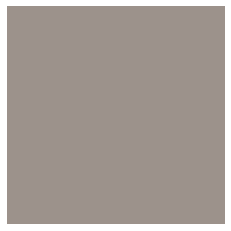

Nexus_Image_Iterator/full_sprial_grids_15_.png
(4, 4, 4)


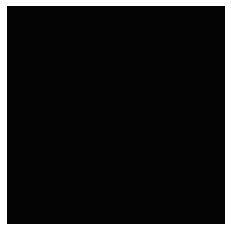

Nexus_Image_Iterator/moving_picture_grid_56_resized.png
(169, 149, 142)


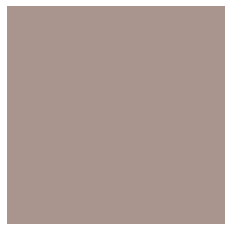

Nexus_Image_Iterator/grid_sprial_test_15_resized.png
(4, 4, 4)


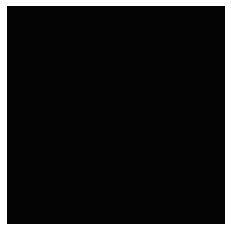

Nexus_Image_Iterator/Nataliia_composite_final_8_90.png
(152, 128, 123)


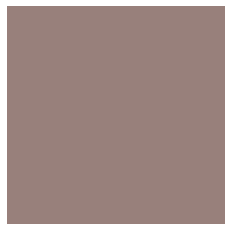

Nexus_Image_Iterator/back_forth_grid_29_.png
(12, 11, 11)


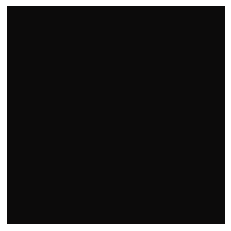

Nexus_Image_Iterator/full_sprial_grids_63_resized.png
(156, 141, 139)


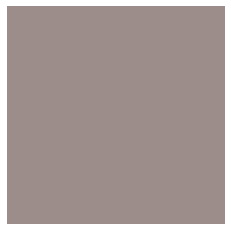

Nexus_Image_Iterator/more_compressedfull_sprial_grids_21_resized.png
(150, 135, 131)


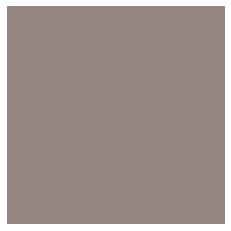

Nexus_Image_Iterator/MC_composite_final_8_90.png
(139, 130, 131)


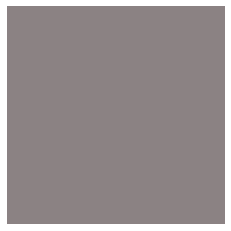

Nexus_Image_Iterator/Dan_composite_final_9_90.png
(119, 102, 104)


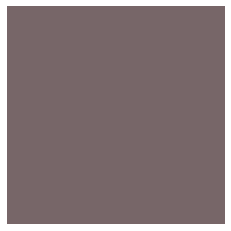

Nexus_Image_Iterator/q329042_composite_final_8_90.png
(147, 115, 95)


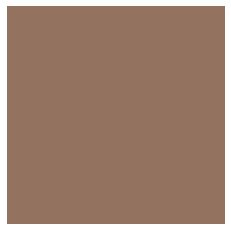

Nexus_Image_Iterator/moving_picture_grid_93_.png
(155, 137, 132)


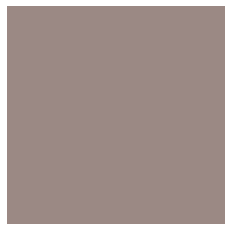

Nexus_Image_Iterator/full_sprial_grids_3_resized.png
(4, 4, 4)


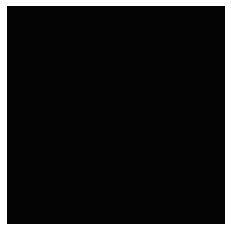

Nexus_Image_Iterator/back_forth_grid_69_resized.png
(4, 4, 4)


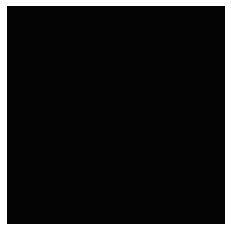

Nexus_Image_Iterator/Nataliia_composite_final_4_90.png
(141, 137, 146)


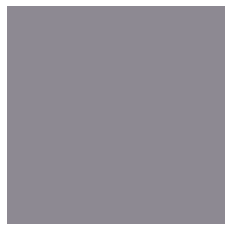

Nexus_Image_Iterator/Cindy_composite_final_7_90.png
(108, 86, 93)


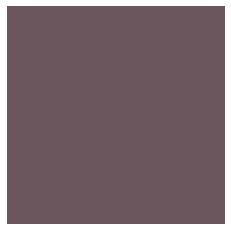

Nexus_Image_Iterator/more_compressedfull_sprial_grids_82_resized.png
(152, 135, 131)


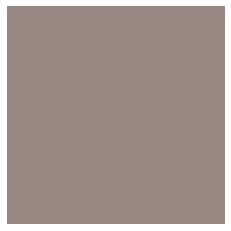

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_16_resized.png
(153, 137, 133)


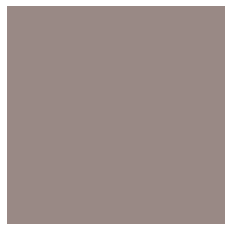

Nexus_Image_Iterator/grid_sprial_test_4_resized.png
(4, 4, 4)


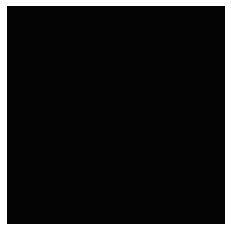

Nexus_Image_Iterator/Spiderplant 4_composite_final_3_90.png
(139, 141, 139)


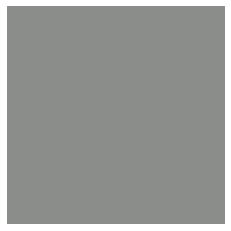

Nexus_Image_Iterator/moving_picture_grid_78_resized.png
(14, 14, 13)


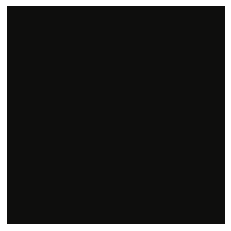

Nexus_Image_Iterator/moving_picture_grid_103_.png
(4, 4, 4)


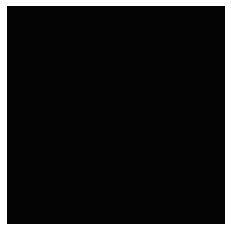

Nexus_Image_Iterator/MC 3_composite_2.png
(184, 178, 176)


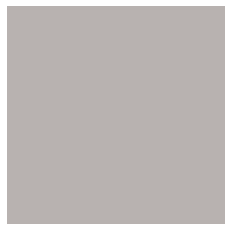

Nexus_Image_Iterator/Rondo_composite_4.png
(105, 105, 109)


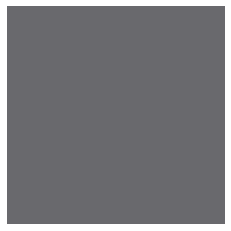

Nexus_Image_Iterator/full_sprial_grids_54_.png
(128, 114, 111)


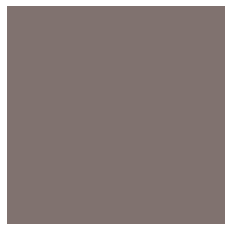

Nexus_Image_Iterator/moving_picture_grid_85_resized.png
(12, 11, 11)


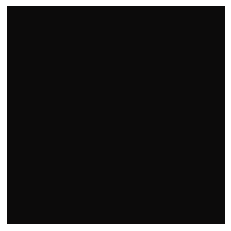

Nexus_Image_Iterator/back_forth_grid_19_resized.png
(152, 136, 131)


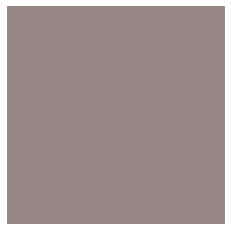

Nexus_Image_Iterator/Quinn_test_2_composite_1.png
(106, 120, 125)


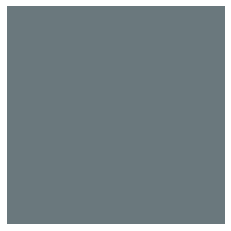

Nexus_Image_Iterator/grid_sprial_test_2_.png
(143, 148, 161)


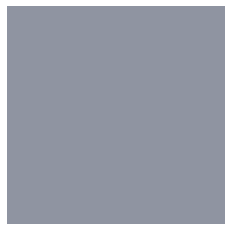

Nexus_Image_Iterator/Jeanfiedo_composite_final_9_90676_resized.png
(116, 98, 95)


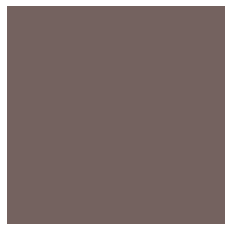

Nexus_Image_Iterator/back_forth_grid_68_.png
(4, 4, 4)


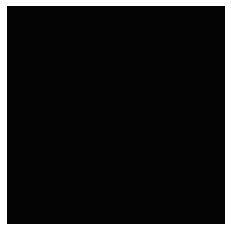

Nexus_Image_Iterator/moving_picture_grid_9_resized.png
(4, 4, 4)


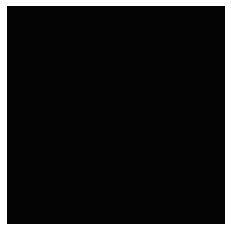

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_66_resized.png
(152, 138, 137)


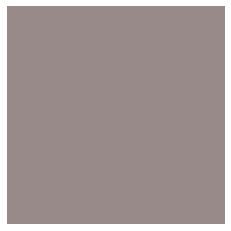

Nexus_Image_Iterator/moving_picture_grid_20_.png
(156, 138, 132)


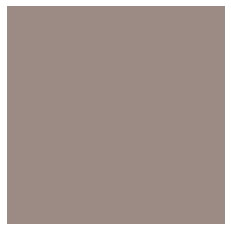

Nexus_Image_Iterator/more_compressedfull_sprial_grids_81_resized.png
(151, 135, 130)


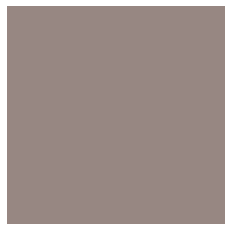

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_15_resized.png
(4, 4, 4)


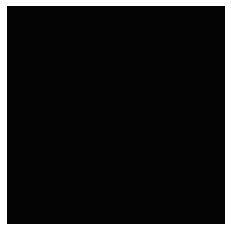

Nexus_Image_Iterator/Nataliia3_composite_final_3_90.png
(162, 169, 179)


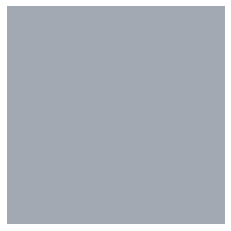

Nexus_Image_Iterator/Spiderplant 2_composite_final_0_90676_resized.png
(150, 139, 145)


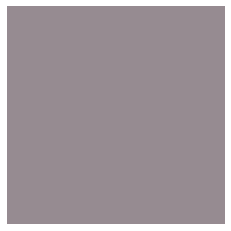

Nexus_Image_Iterator/moving_picture_grid_108_.png
(4, 4, 4)


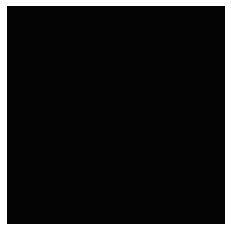

Nexus_Image_Iterator/full_sprial_grids_0_resized.png
(4, 4, 4)


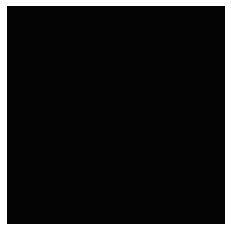

Nexus_Image_Iterator/Kasey Edgerton_composite_final_4_90.png
(134, 141, 139)


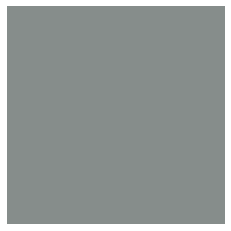

Nexus_Image_Iterator/grid_sprial_test_9_.png
(4, 4, 4)


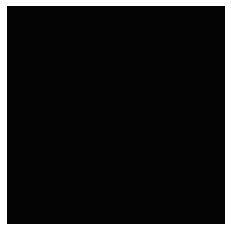

Nexus_Image_Iterator/Quinn_test_2_composite_final_4_90.png
(119, 115, 116)


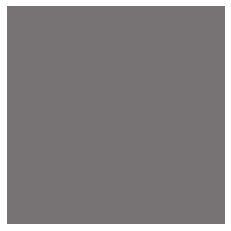

Nexus_Image_Iterator/back_forth_grid_63_.png
(4, 4, 4)


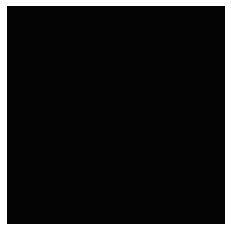

Nexus_Image_Iterator/grid_sprial_test_15_.png
(4, 4, 4)


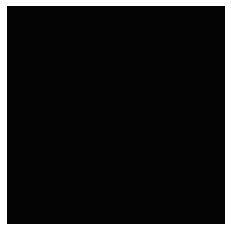

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_0_90.png
(94, 92, 102)


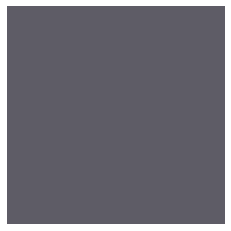

Nexus_Image_Iterator/Soul vision_composite_1.png
(117, 65, 43)


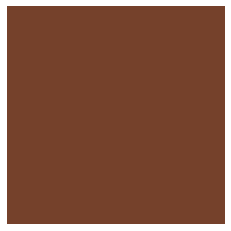

Nexus_Image_Iterator/Spiderplant3_composite_final_9_90.png
(129, 122, 131)


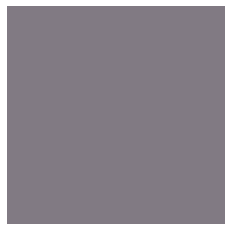

Nexus_Image_Iterator/Kathy_composite_final_3_90.png
(114, 102, 75)


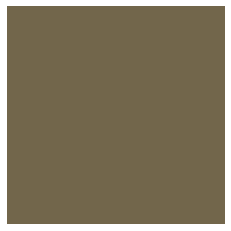

Nexus_Image_Iterator/Prianna _composite_final_8_90.png
(140, 113, 117)


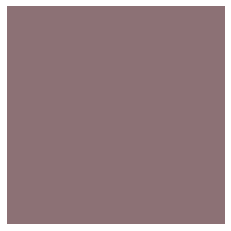

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_65_resized.png
(152, 138, 137)


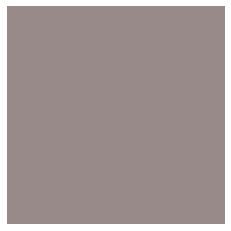

Nexus_Image_Iterator/moving_picture_grid_77_.png
(136, 124, 124)


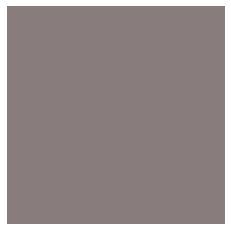

Nexus_Image_Iterator/moving_picture_grid_98_.png
(157, 140, 134)


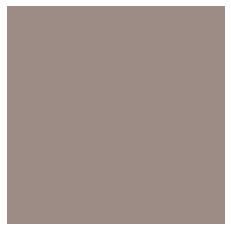

Nexus_Image_Iterator/Sloth Vibes_composite_final_6_90.png
(155, 147, 156)


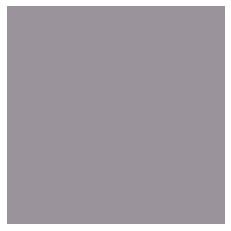

Nexus_Image_Iterator/Kasey Edgerton 3_composite_4.png
(130, 123, 120)


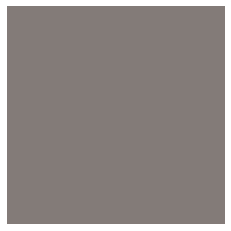

Nexus_Image_Iterator/moving_picture_grid_86_resized.png
(11, 10, 10)


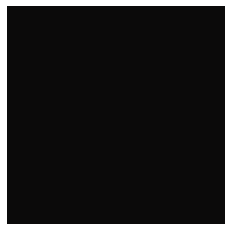

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_98_resized.png
(4, 4, 4)


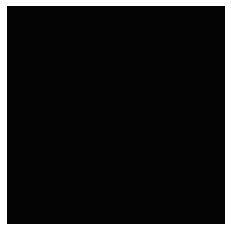

Nexus_Image_Iterator/grid_sprial_test_7_resized.png
(4, 4, 4)


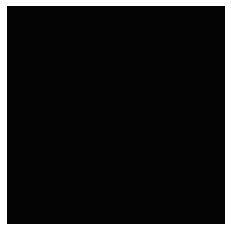

Nexus_Image_Iterator/Spiderplant3_composite_1.png
(112, 127, 116)


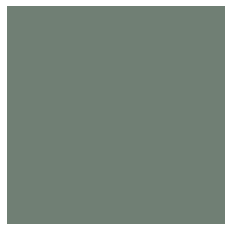

Nexus_Image_Iterator/back_forth_grid_34_.png
(13, 13, 12)


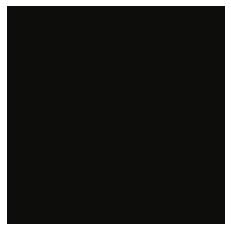

Nexus_Image_Iterator/moving_picture_grid_61_.png
(136, 124, 124)


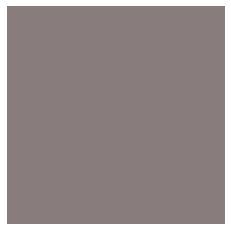

Nexus_Image_Iterator/full_sprial_grids_10_resized.png
(4, 4, 4)


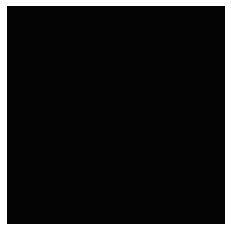

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_100_resized.png
(4, 4, 4)


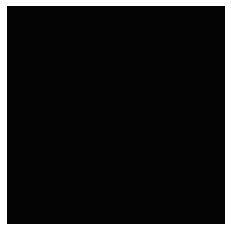

Nexus_Image_Iterator/John_composite_final_7_90.png
(125, 110, 103)


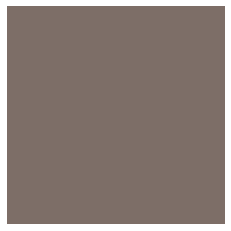

Nexus_Image_Iterator/more_compressedfull_sprial_grids_52_resized.png
(127, 113, 109)


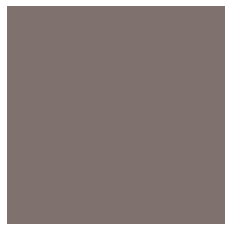

Nexus_Image_Iterator/moving_picture_grid_25_resized.png
(151, 136, 133)


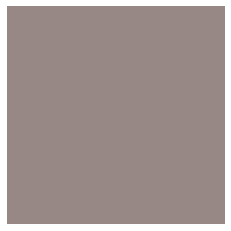

Nexus_Image_Iterator/Spiderplant3_composite_final_5_90.png
(115, 125, 129)


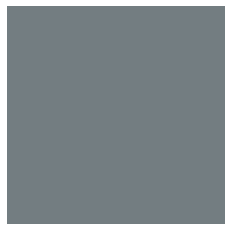

Nexus_Image_Iterator/Sibel_composite_4.png
(181, 162, 151)


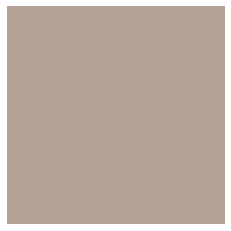

Nexus_Image_Iterator/Prianna _composite_final_4_90.png
(130, 79, 87)


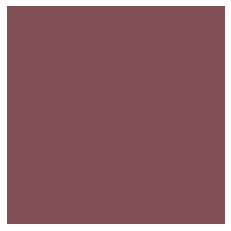

Nexus_Image_Iterator/i_love_chai_composite_final_1_90.png
(134, 103, 107)


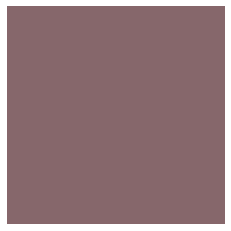

Nexus_Image_Iterator/Rondo_composite_final_1_90.png
(106, 107, 112)


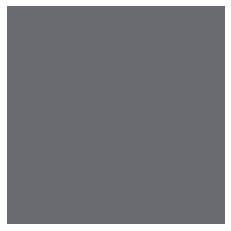

Nexus_Image_Iterator/back_forth_grid_44_resized.png
(12, 11, 11)


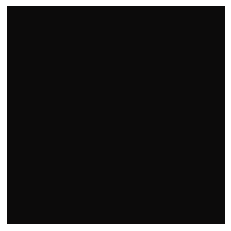

Nexus_Image_Iterator/back_forth_grid_22_.png
(155, 137, 132)


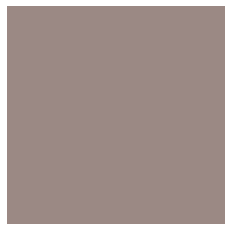

Nexus_Image_Iterator/Soul vision_composite_final_3_90.png
(61, 42, 40)


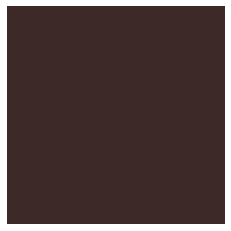

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_7_resized.png
(4, 4, 4)


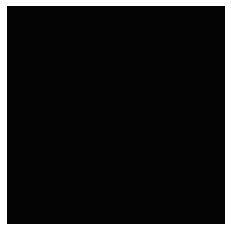

Nexus_Image_Iterator/full_sprial_grids_60_resized.png
(10, 10, 10)


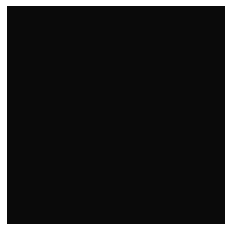

Nexus_Image_Iterator/more_compressedfull_sprial_grids_22_resized.png
(154, 137, 132)


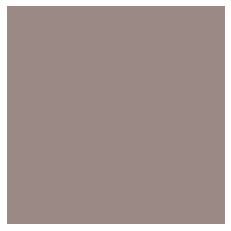

Nexus_Image_Iterator/moving_picture_grid_36_.png
(156, 140, 138)


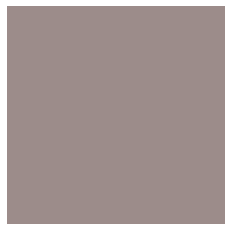

Nexus_Image_Iterator/monsteroflove_composite_4.png
(173, 113, 98)


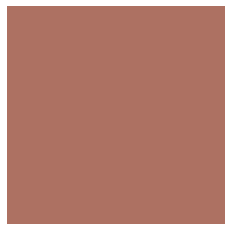

Nexus_Image_Iterator/Spiderplant 2_composite_final_0_90.png
(151, 139, 145)


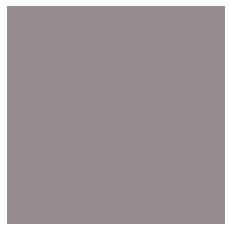

Nexus_Image_Iterator/moving_picture_grid_55_resized.png
(164, 146, 142)


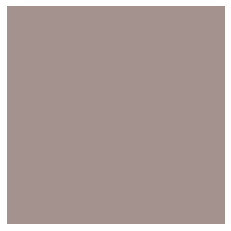

Nexus_Image_Iterator/monsteroflove_composite_final_6_90.png
(125, 87, 88)


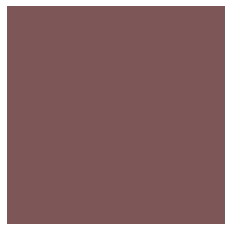

Nexus_Image_Iterator/full_sprial_grids_6_.png
(4, 4, 4)


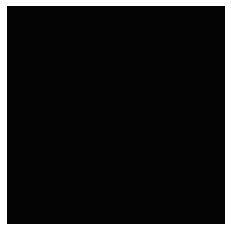

Nexus_Image_Iterator/grid_sprial_test_16_resized.png
(153, 137, 133)


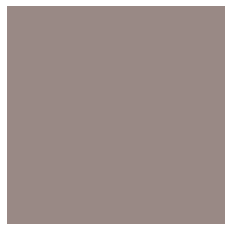

Nexus_Image_Iterator/Victor_composite_1.png
(139, 86, 86)


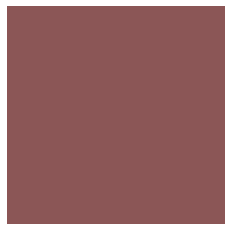

Nexus_Image_Iterator/back_forth_grid_34_resized.png
(14, 13, 13)


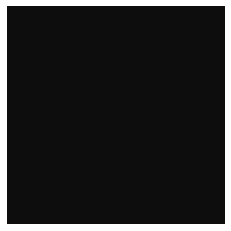

Nexus_Image_Iterator/full_sprial_grids_49_.png
(128, 115, 112)


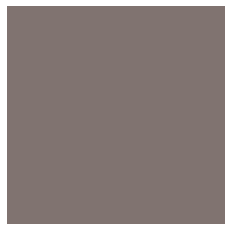

Nexus_Image_Iterator/Quinn_test_2_composite_final_8_90.png
(138, 125, 96)


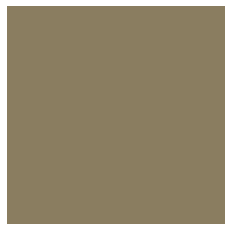

Nexus_Image_Iterator/Kasey Edgerton_composite_final_8_90.png
(115, 120, 130)


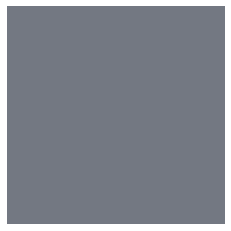

Nexus_Image_Iterator/full_sprial_grids_81_resized.png
(151, 135, 130)


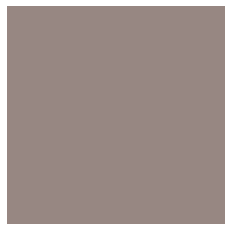

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_57_resized.png
(32, 30, 31)


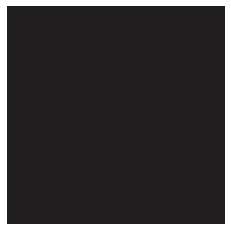

Nexus_Image_Iterator/Baffin_composite_final_7_90.png
(153, 132, 133)


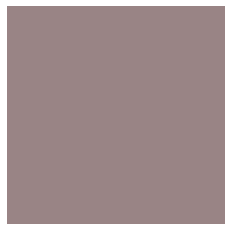

Nexus_Image_Iterator/back_forth_grid_28_resized.png
(11, 10, 10)


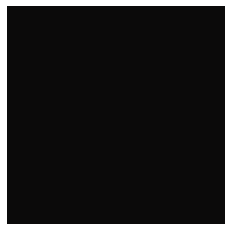

Nexus_Image_Iterator/moving_picture_grid_49_resized.png
(164, 146, 142)


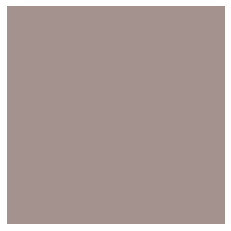

Nexus_Image_Iterator/MC 4_composite_final_1_90.png
(180, 160, 154)


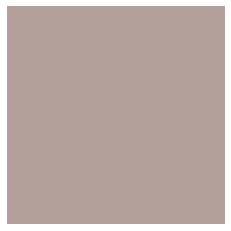

Nexus_Image_Iterator/blank_test_01_.png
(4, 4, 4)


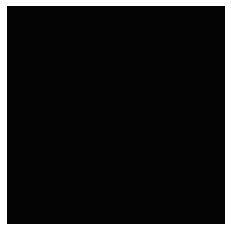

Nexus_Image_Iterator/full_sprial_grids_32_.png
(13, 12, 12)


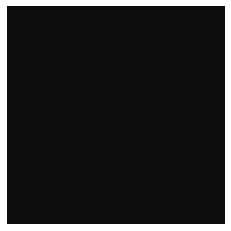

Nexus_Image_Iterator/moving_picture_grid_7_.png
(4, 4, 4)


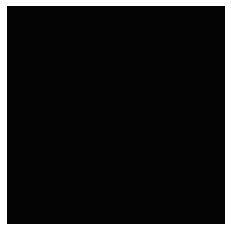

Nexus_Image_Iterator/MC 2_composite_1.png
(193, 189, 180)


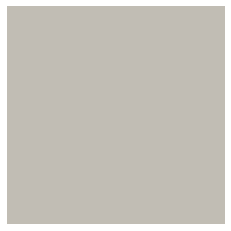

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_27_resized.png
(11, 10, 10)


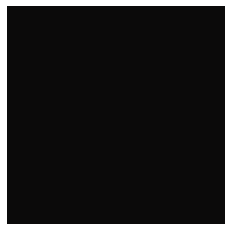

Nexus_Image_Iterator/Spiderplant 2_composite_final_9_90.png676_resized.png
(166, 124, 115)


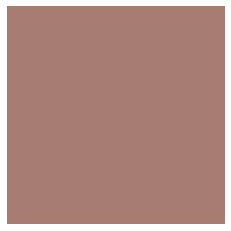

Nexus_Image_Iterator/back_forth_grid_58_resized.png
(4, 4, 4)


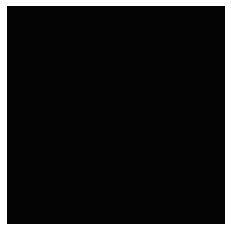

Nexus_Image_Iterator/back_forth_grid_59_.png
(4, 4, 4)


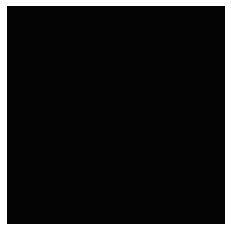

Nexus_Image_Iterator/moving_picture_grid_39_resized.png
(164, 146, 142)


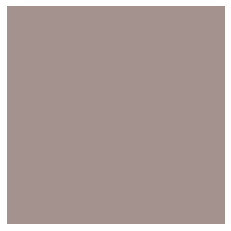

Nexus_Image_Iterator/full_sprial_grids_65_.png
(156, 140, 138)


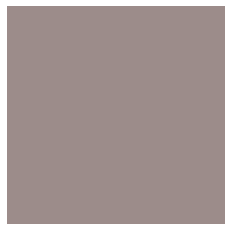

Nexus_Image_Iterator/donya_composite_final_2_90.png
(129, 149, 175)


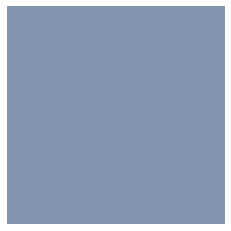

Nexus_Image_Iterator/full_sprial_grids_52_resized.png
(129, 115, 112)


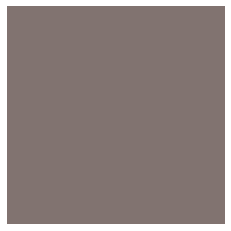

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_84_resized.png
(153, 137, 132)


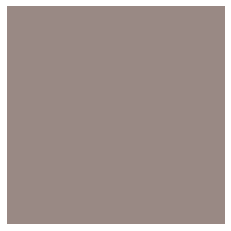

Nexus_Image_Iterator/more_compressedfull_sprial_grids_10_resized.png
(4, 4, 4)


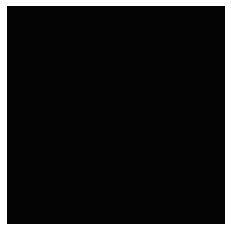

Nexus_Image_Iterator/moving_picture_grid_110_resized.png
(4, 4, 4)


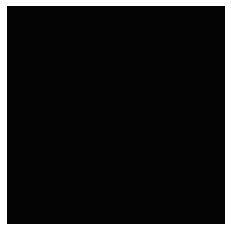

Nexus_Image_Iterator/moving_picture_grid_67_resized.png
(137, 124, 124)


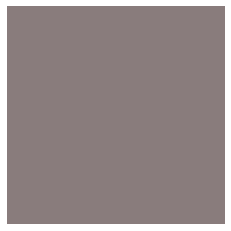

Nexus_Image_Iterator/grid_sprial_test_24_resized.png
(151, 136, 133)


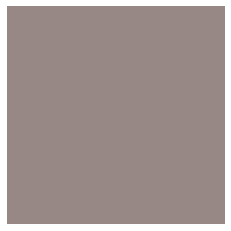

Nexus_Image_Iterator/Mika_composite_final_2_90.png
(109, 105, 106)


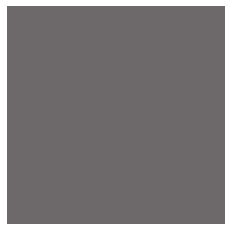

Nexus_Image_Iterator/back_forth_grid_6_resized.png
(4, 4, 4)


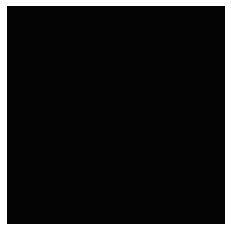

Nexus_Image_Iterator/Kasey Edgerton 4_composite_1.png
(151, 111, 109)


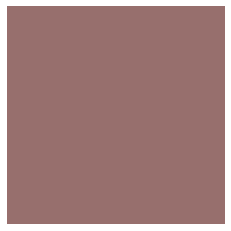

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_79_resized.png
(151, 135, 131)


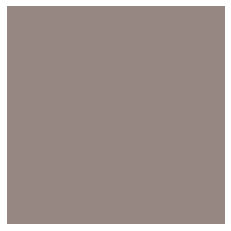

Nexus_Image_Iterator/full_sprial_grids_73_.png
(11, 10, 10)


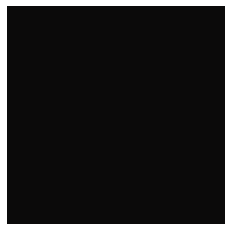

Nexus_Image_Iterator/full_sprial_grids_22_resized.png
(151, 135, 131)


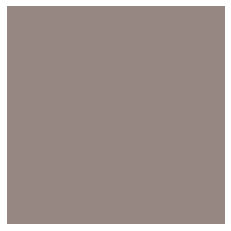

Nexus_Image_Iterator/more_compressedfull_sprial_grids_60_resized.png
(10, 10, 10)


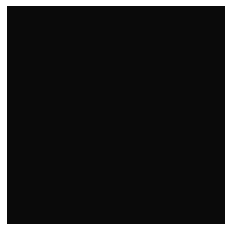

Nexus_Image_Iterator/Nataliia 2_composite_final_3_90.png
(172, 148, 139)


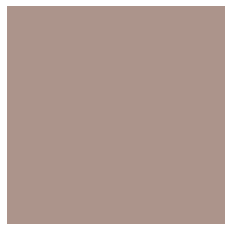

Nexus_Image_Iterator/Actias_composite_final_0_90.png
(158, 129, 124)


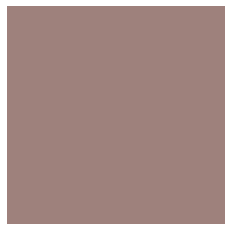

Nexus_Image_Iterator/moving_picture_grid_17_resized.png
(153, 137, 133)


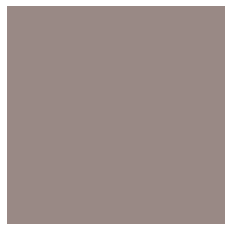

Nexus_Image_Iterator/back_forth_grid_18_.png
(156, 138, 131)


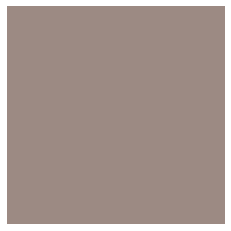

Nexus_Image_Iterator/Baffin_composite_4.png
(125, 126, 131)


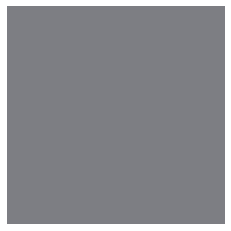

Nexus_Image_Iterator/full_sprial_grids_24_.png
(156, 138, 134)


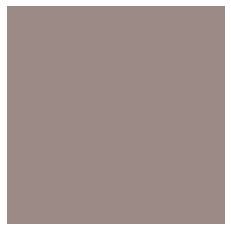

Nexus_Image_Iterator/grid_sprial_test_5_.png
(4, 4, 4)


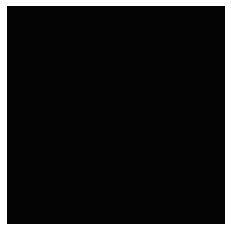

Nexus_Image_Iterator/Nataliia_composite_final_0_90.png
(139, 120, 121)


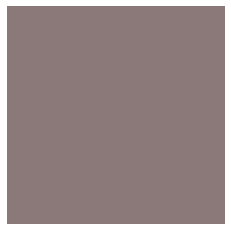

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_91_resized.png
(4, 4, 4)


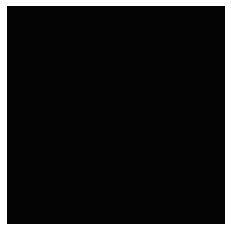

Nexus_Image_Iterator/full_sprial_grids_47_resized.png
(128, 115, 112)


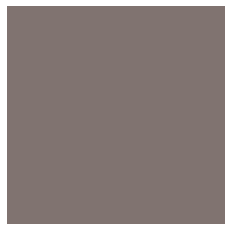

Nexus_Image_Iterator/full_sprial_grids_53_.png
(128, 114, 112)


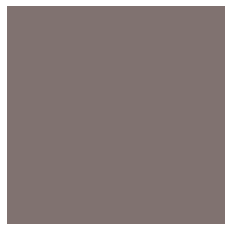

Nexus_Image_Iterator/Cindy_composite_final_3_90.png
(149, 133, 143)


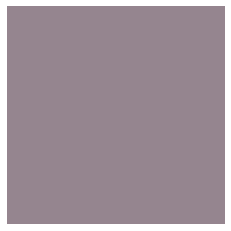

Nexus_Image_Iterator/grid_sprial_test_31_resized.png
(12, 12, 12)


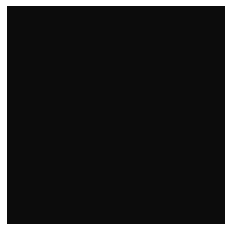

Nexus_Image_Iterator/grid_sprial_test_19_.png
(156, 138, 132)


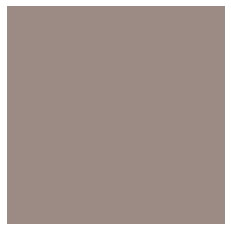

Nexus_Image_Iterator/moving_picture_grid_105_resized.png
(4, 4, 4)


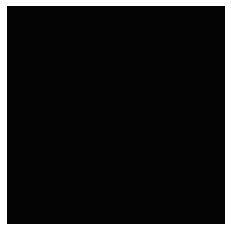

Nexus_Image_Iterator/moving_picture_grid_72_resized.png
(137, 124, 124)


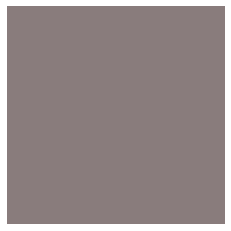

Nexus_Image_Iterator/back_forth_grid_13_resized.png
(4, 4, 4)


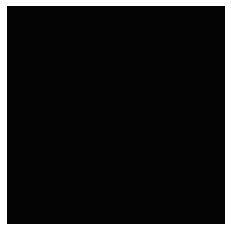

Nexus_Image_Iterator/moving_picture_grid_104_.png
(4, 4, 4)


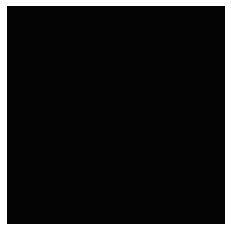

Nexus_Image_Iterator/Nataliia 4_composite_4.png
(124, 122, 139)


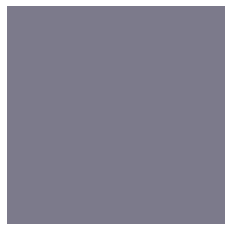

Nexus_Image_Iterator/Soul vision_composite_2.png
(69, 47, 33)


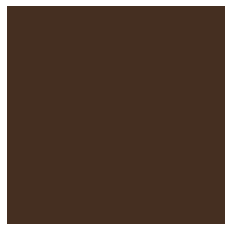

Nexus_Image_Iterator/moving_picture_grid_3_resized.png
(4, 4, 4)


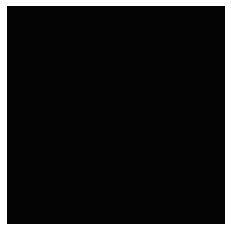

Nexus_Image_Iterator/Kasey Edgerton 4_composite_3.png
(148, 149, 158)


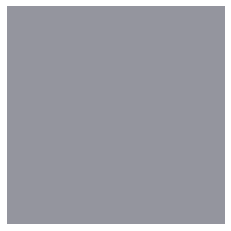

Nexus_Image_Iterator/more_compressedfull_sprial_grids_75_resized.png
(154, 138, 134)


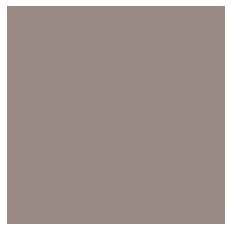

Nexus_Image_Iterator/Spiderplant 2_composite_final_5_90676_resized.png
(176, 148, 148)


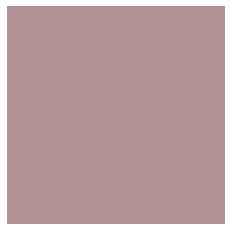

Nexus_Image_Iterator/full_sprial_grids_37_resized.png
(14, 14, 13)


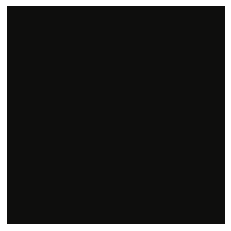

Nexus_Image_Iterator/back_forth_grid_38_.png
(156, 140, 138)


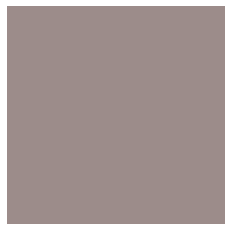

Nexus_Image_Iterator/full_sprial_grids_9_resized.png
(4, 4, 4)


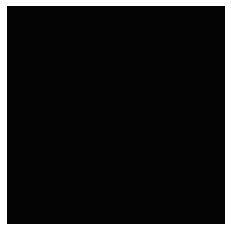

Nexus_Image_Iterator/back_forth_grid_63_resized.png
(4, 4, 4)


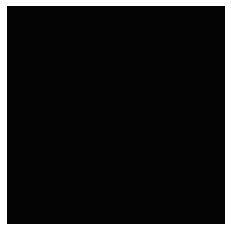

Nexus_Image_Iterator/Spiderplant 4_composite_final_7_90.png
(139, 126, 122)


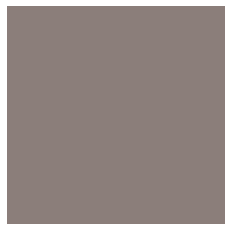

Nexus_Image_Iterator/Spiderplant3_composite_2.png
(126, 116, 109)


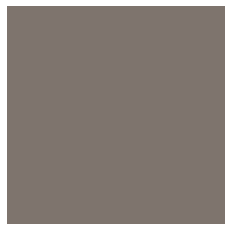

Nexus_Image_Iterator/more_compressedfull_sprial_grids_88_resized.png
(4, 4, 4)


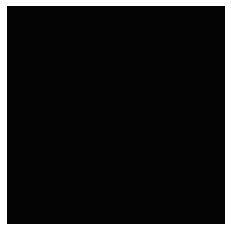

Nexus_Image_Iterator/moving_picture_grid_94_.png
(155, 137, 132)


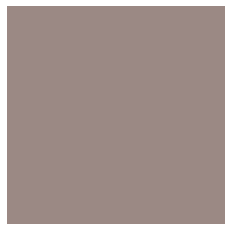

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_42_resized.png
(11, 11, 11)


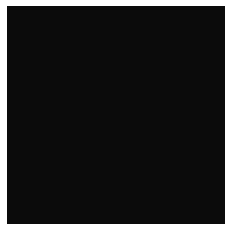

Nexus_Image_Iterator/full_sprial_grids_94_resized.png
(4, 4, 4)


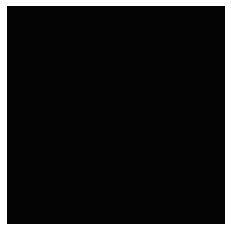

Nexus_Image_Iterator/full_sprial_grids_12_.png
(4, 4, 4)


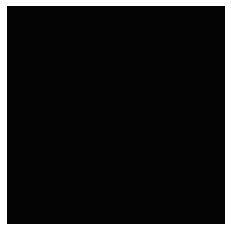

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_7_90.png
(108, 97, 97)


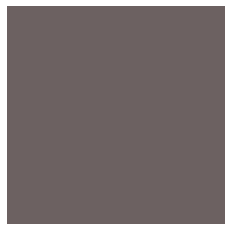

Nexus_Image_Iterator/full_sprial_grids_101_.png
(4, 4, 4)


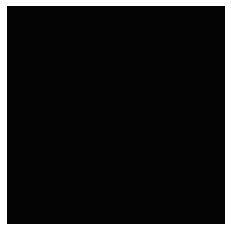

Nexus_Image_Iterator/moving_picture_grid_82_.png
(13, 12, 12)


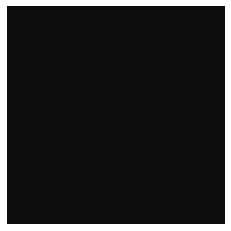

Nexus_Image_Iterator/MC 2_composite_3.png
(146, 127, 135)


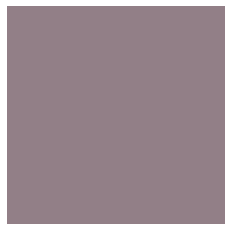

Nexus_Image_Iterator/full_sprial_grids_69_resized.png
(152, 139, 138)


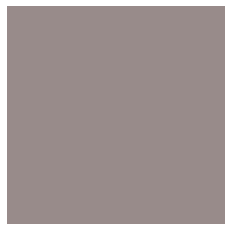

Nexus_Image_Iterator/full_sprial_grids_45_.png
(41, 38, 39)


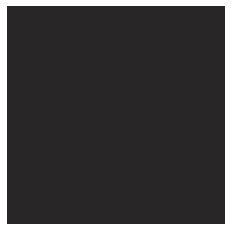

Nexus_Image_Iterator/JR Formanek_composite_final_6_90.png
(157, 153, 160)


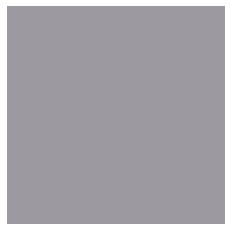

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_32_resized.png
(13, 12, 12)


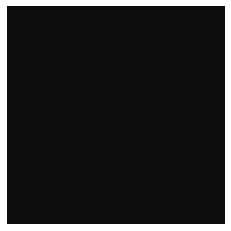

Nexus_Image_Iterator/Victor_composite_2.png
(103, 91, 83)


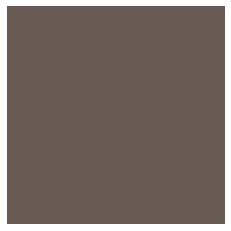

Nexus_Image_Iterator/q329042_composite_final_0_90.png
(148, 116, 104)


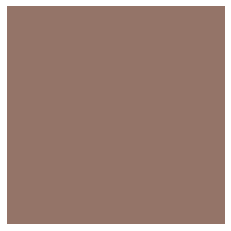

Nexus_Image_Iterator/Nataliia3_composite_4.png
(170, 161, 156)


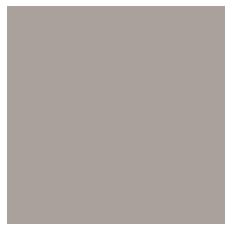

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_3_90.png
(96, 97, 100)


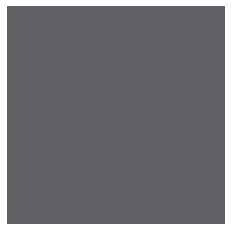

Nexus_Image_Iterator/Dan_composite_final_1_90.png
(136, 120, 135)


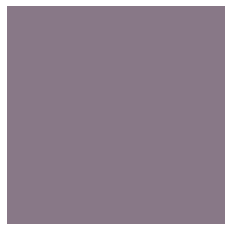

Nexus_Image_Iterator/full_sprial_grids_19_resized.png
(152, 136, 131)


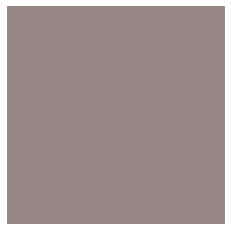

Nexus_Image_Iterator/moving_picture_grid_112_.png
(143, 148, 161)


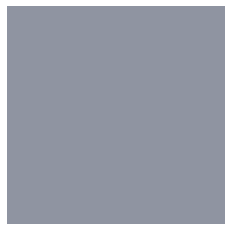

Nexus_Image_Iterator/MC_composite_final_0_90.png
(146, 116, 116)


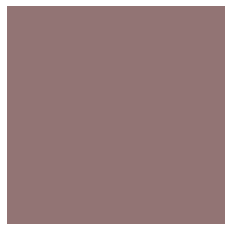

Nexus_Image_Iterator/more_compressedfull_sprial_grids_47_resized.png
(50, 47, 47)


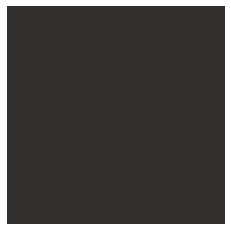

Nexus_Image_Iterator/Jeanfiedo_composite_final_4_90.png
(116, 105, 99)


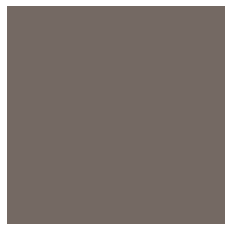

Nexus_Image_Iterator/moving_picture_grid_30_resized.png
(12, 11, 11)


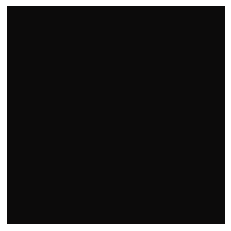

Nexus_Image_Iterator/Jeanfiedo_composite_final_7_90.png676_resized.png
(131, 110, 109)


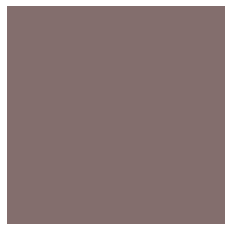

Nexus_Image_Iterator/Victor_composite_final_3_90.png
(117, 79, 72)


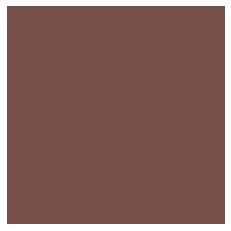

Nexus_Image_Iterator/back_forth_grid_51_resized.png
(151, 135, 131)


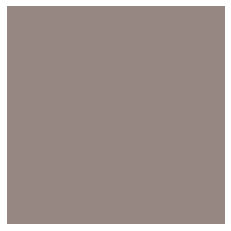

Nexus_Image_Iterator/Victor_composite_3.png
(123, 78, 78)


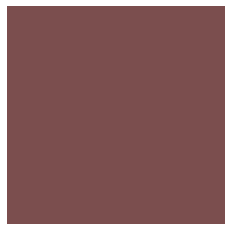

Nexus_Image_Iterator/moving_picture_grid_41_.png
(156, 141, 139)


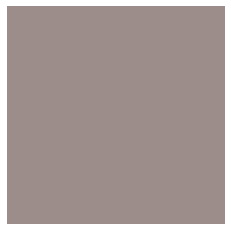

Nexus_Image_Iterator/eisa_composite_final_0_90.png
(127, 109, 108)


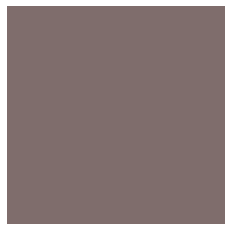

Nexus_Image_Iterator/more_compressedfull_sprial_grids_7_resized.png
(4, 4, 4)


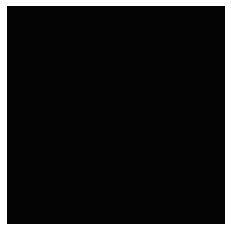

Nexus_Image_Iterator/more_compressedfull_sprial_grids_37_resized.png
(15, 14, 14)


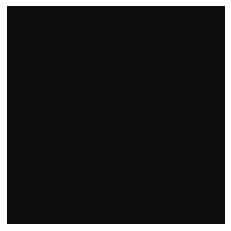

Nexus_Image_Iterator/full_sprial_grids_86_.png
(4, 4, 4)


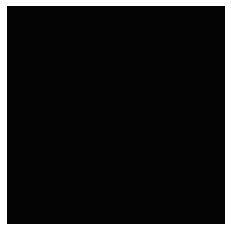

Nexus_Image_Iterator/Kathy_2_composite_final_4_90.png
(174, 168, 151)


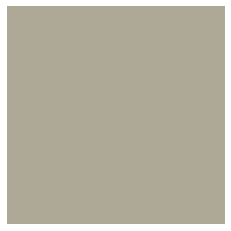

Nexus_Image_Iterator/Kathy_2_composite_4.png
(105, 111, 89)


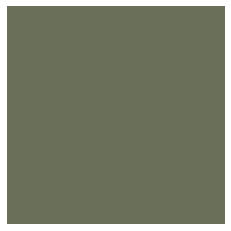

Nexus_Image_Iterator/full_sprial_grids_75_resized.png
(10, 10, 10)


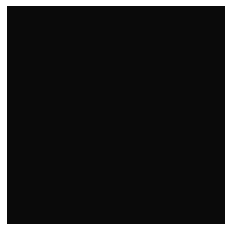

Nexus_Image_Iterator/grid_sprial_test_23_.png
(155, 137, 133)


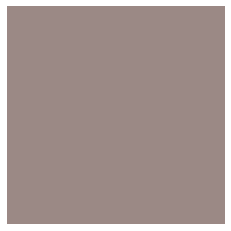

Nexus_Image_Iterator/MC 2_composite_2.png
(129, 143, 157)


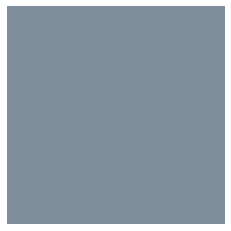

Nexus_Image_Iterator/back_forth_grid_55_.png
(156, 138, 131)


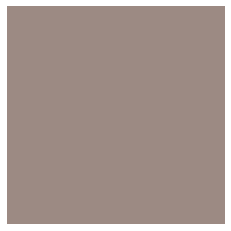

Nexus_Image_Iterator/back_forth_grid_7_.png
(4, 4, 4)


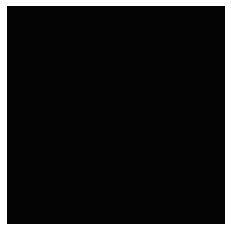

Nexus_Image_Iterator/moving_picture_grid_40_resized.png
(169, 149, 142)


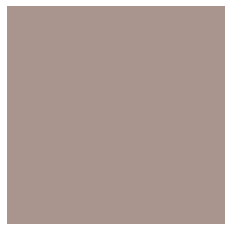

Nexus_Image_Iterator/full_sprial_grids_69_.png
(13, 12, 12)


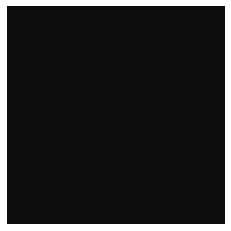

Nexus_Image_Iterator/back_forth_grid_21_resized.png
(151, 135, 131)


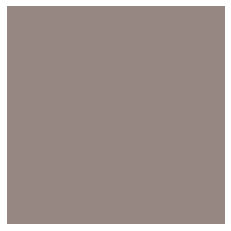

Nexus_Image_Iterator/Nataliia 4_composite_final_4_90.png
(144, 138, 146)


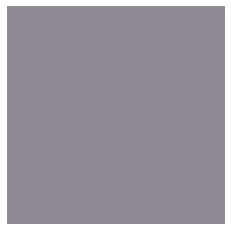

Nexus_Image_Iterator/RainbowSpaceman_composite_final_9_90.png
(69, 72, 79)


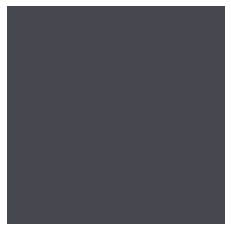

Nexus_Image_Iterator/full_sprial_grids_88_resized.png
(4, 4, 4)


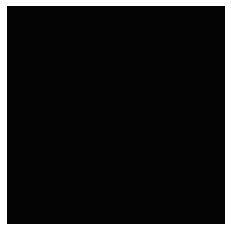

Nexus_Image_Iterator/moving_picture_grid_16_.png
(4, 4, 4)


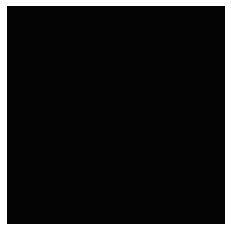

Nexus_Image_Iterator/back_forth_grid_43_.png
(12, 11, 11)


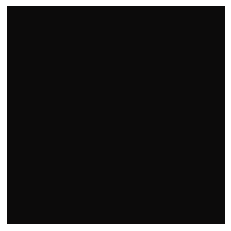

Nexus_Image_Iterator/grid_sprial_test_35_.png
(156, 140, 138)


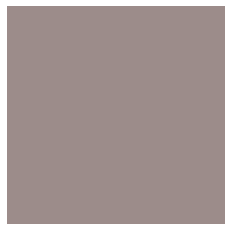

Nexus_Image_Iterator/more_compressedfull_sprial_grids_94_resized.png
(4, 4, 4)


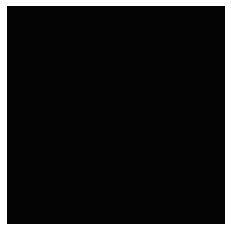

Nexus_Image_Iterator/MC 2_composite_final_6_90.png
(162, 134, 133)


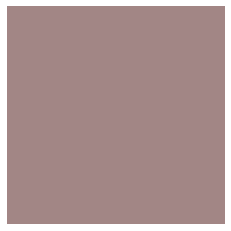

Nexus_Image_Iterator/full_sprial_grids_90_.png
(4, 4, 4)


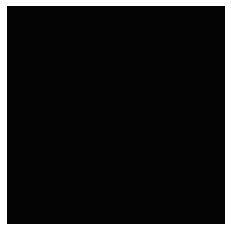

Nexus_Image_Iterator/Spiderplant3_composite_3.png
(150, 111, 99)


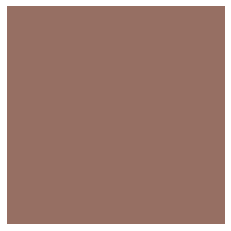

Nexus_Image_Iterator/Kathy_2_composite_final_8_90.png
(187, 171, 143)


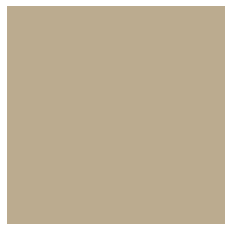

Nexus_Image_Iterator/RainbowSpaceman_composite_final_5_90.png
(103, 104, 116)


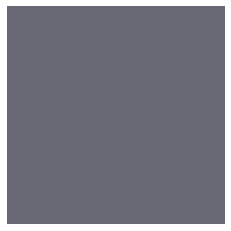

Nexus_Image_Iterator/Spiderplant 2_composite_final_1_90.png676_resized.png
(153, 145, 152)


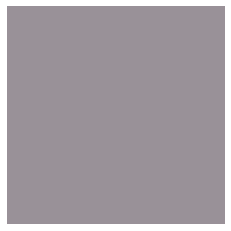

Nexus_Image_Iterator/more_compressedfull_sprial_grids_69_resized.png
(14, 14, 13)


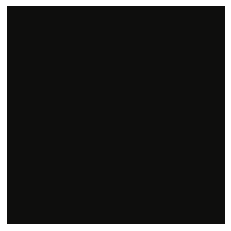

Nexus_Image_Iterator/Nataliia 4_composite_final_8_90.png
(148, 135, 135)


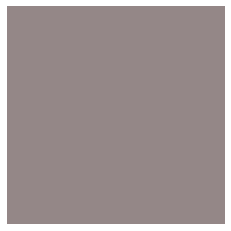

Nexus_Image_Iterator/Kasey Edgerton 4_composite_2.png
(187, 163, 161)


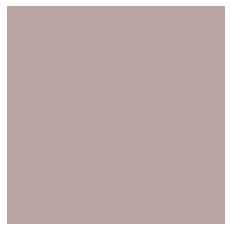

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_70_resized.png
(12, 12, 12)


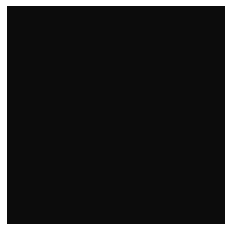

Nexus_Image_Iterator/Jeanfiedo_composite_final_8_90.png
(115, 101, 96)


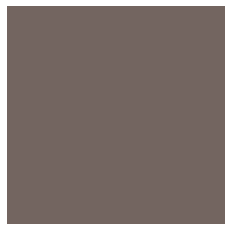

Nexus_Image_Iterator/Soul vision_composite_3.png
(112, 71, 63)


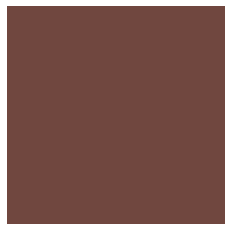

Nexus_Image_Iterator/back_forth_grid_14_.png
(4, 4, 4)


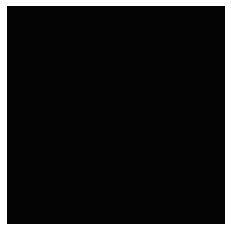

Nexus_Image_Iterator/moving_picture_grid_93_resized.png
(151, 135, 131)


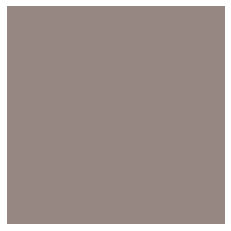

Nexus_Image_Iterator/full_sprial_grids_28_.png
(11, 10, 10)


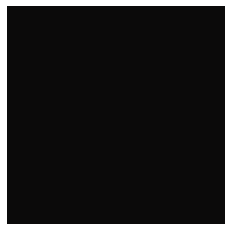

Nexus_Image_Iterator/MC 3_composite_final_2_90.png
(165, 157, 159)


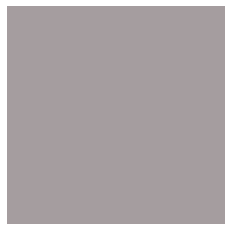

Nexus_Image_Iterator/more_compressedfull_sprial_grids_19_resized.png
(152, 135, 131)


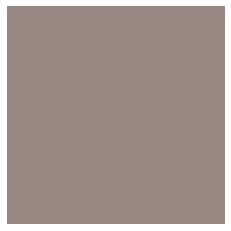

Nexus_Image_Iterator/Spiderplant_composite_final_3_90.png
(138, 128, 125)


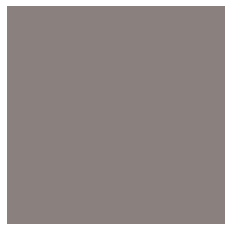

Nexus_Image_Iterator/Sibel_composite_final_7_90.png
(168, 152, 133)


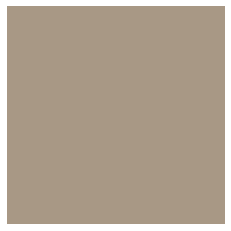

Nexus_Image_Iterator/moving_picture_grid_57_.png
(156, 141, 139)


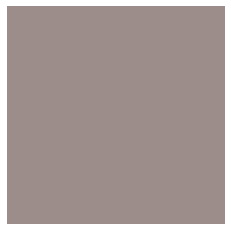

Nexus_Image_Iterator/Spiderplant 2_composite_final_1_90676_resized.png
(153, 145, 152)


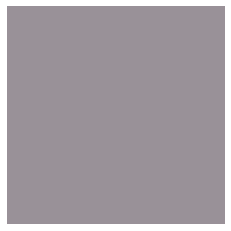

Nexus_Image_Iterator/Baffin_composite_3.png
(126, 103, 90)


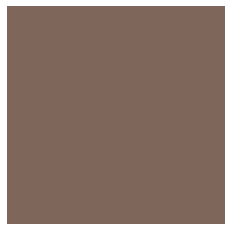

Nexus_Image_Iterator/moving_picture_grid_29_resized.png
(11, 10, 10)


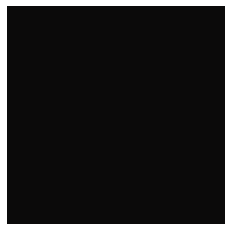

Nexus_Image_Iterator/JR Formanek_composite_final_4_90.png
(156, 112, 110)


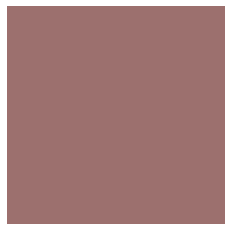

Nexus_Image_Iterator/moving_picture_grid_56_.png
(170, 149, 143)


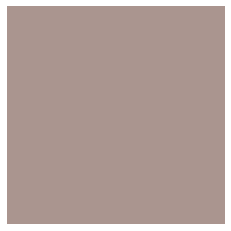

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_1_90.png
(109, 118, 115)


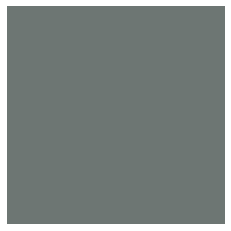

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_37_resized.png
(152, 138, 137)


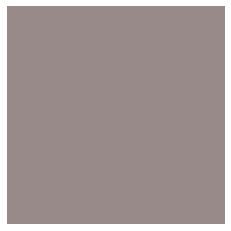

Nexus_Image_Iterator/Dan_composite_final_3_90.png
(151, 135, 148)


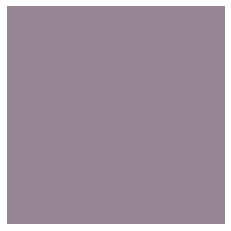

Nexus_Image_Iterator/Nataliia 4_composite_1.png
(159, 119, 102)


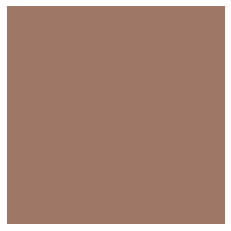

Nexus_Image_Iterator/back_forth_grid_15_.png
(4, 4, 4)


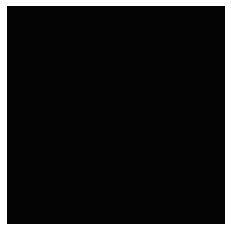

Nexus_Image_Iterator/MC_composite_final_2_90.png
(133, 133, 140)


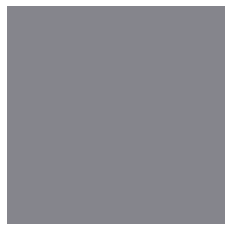

Nexus_Image_Iterator/back_forth_grid_48_resized.png
(151, 135, 133)


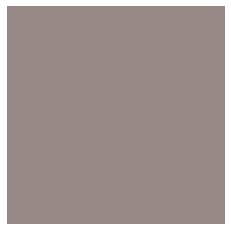

Nexus_Image_Iterator/q329042_composite_final_2_90.png
(146, 116, 93)


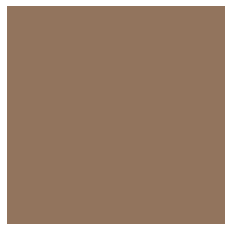

Nexus_Image_Iterator/full_sprial_grids_29_.png
(12, 11, 11)


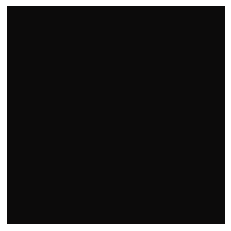

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_5_90.png
(94, 111, 112)


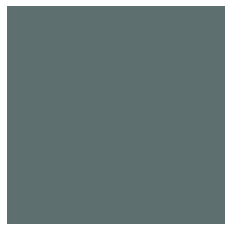

Nexus_Image_Iterator/Kasey Edgerton 3_composite_2.png
(73, 46, 47)


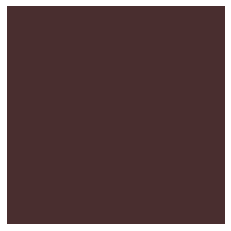

Nexus_Image_Iterator/moving_picture_grid_59_resized.png
(137, 124, 124)


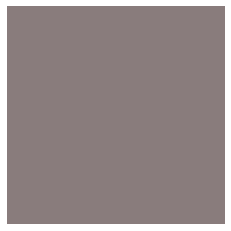

Nexus_Image_Iterator/back_forth_grid_42_.png
(13, 12, 12)


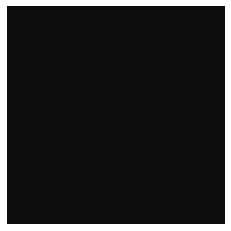

Nexus_Image_Iterator/grid_sprial_test_34_.png
(13, 13, 12)


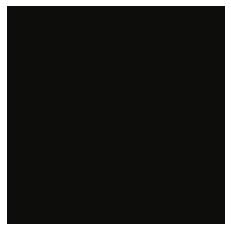

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_47_resized.png
(50, 46, 47)


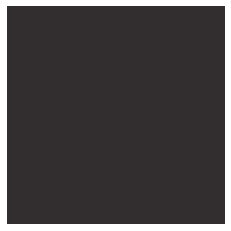

Nexus_Image_Iterator/full_sprial_grids_91_resized.png
(4, 4, 4)


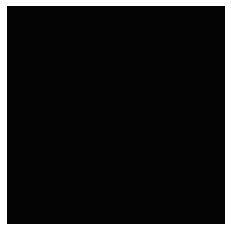

Nexus_Image_Iterator/full_sprial_grids_91_.png
(4, 4, 4)


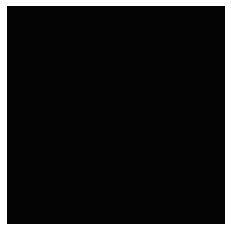

Nexus_Image_Iterator/back_forth_grid_38_resized.png
(14, 14, 13)


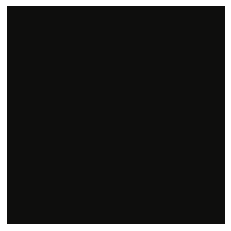

Nexus_Image_Iterator/Spiderplant 4_composite_final_9_90.png
(105, 106, 106)


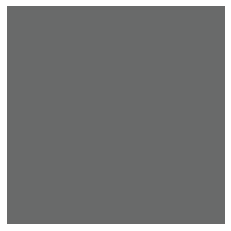

Nexus_Image_Iterator/Sibel_composite_2.png
(132, 88, 72)


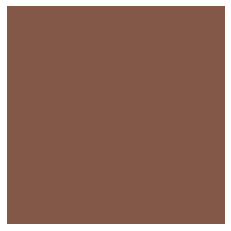

Nexus_Image_Iterator/back_forth_grid_66_resized.png
(4, 4, 4)


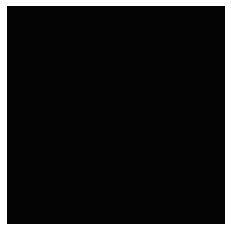

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_19_resized.png
(152, 135, 131)


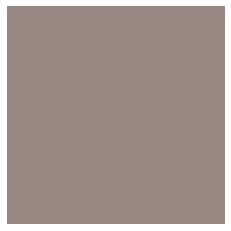

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_9_90.png
(117, 126, 133)


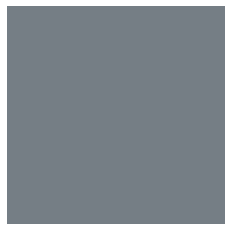

Nexus_Image_Iterator/moving_picture_grid_17_.png
(157, 140, 134)


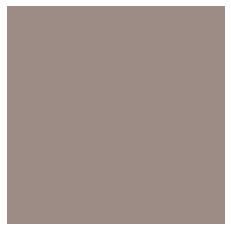

Nexus_Image_Iterator/full_sprial_grids_87_.png
(4, 4, 4)


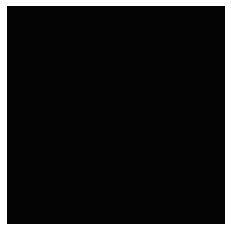

Nexus_Image_Iterator/Spiderplant 4_composite_final_5_90.png
(144, 116, 115)


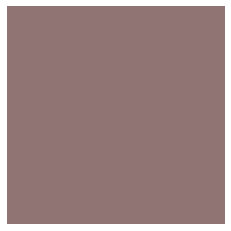

Nexus_Image_Iterator/more_compressedfull_sprial_grids_70_resized.png
(14, 13, 13)


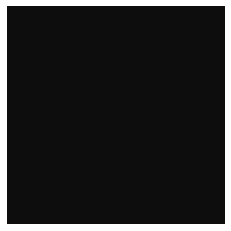

Nexus_Image_Iterator/full_sprial_grids_32_resized.png
(152, 139, 138)


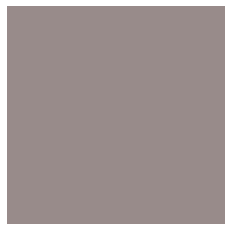

Nexus_Image_Iterator/grid_sprial_test_22_.png
(155, 137, 132)


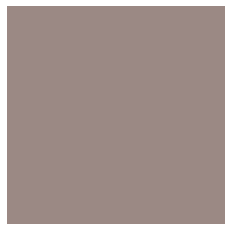

Nexus_Image_Iterator/back_forth_grid_54_.png
(156, 138, 132)


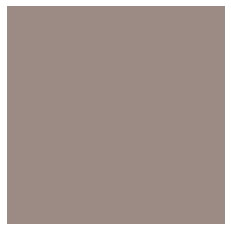

Nexus_Image_Iterator/back_forth_grid_6_.png
(4, 4, 4)


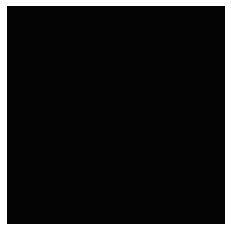

Nexus_Image_Iterator/full_sprial_grids_68_.png
(13, 12, 12)


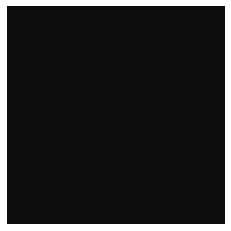

Nexus_Image_Iterator/Cindy_composite_final_1_90.png
(124, 109, 116)


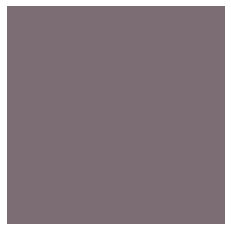

Nexus_Image_Iterator/back_forth_grid_16_resized.png
(153, 137, 133)


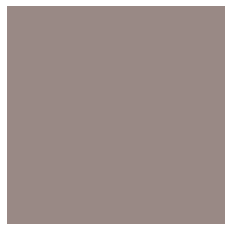

Nexus_Image_Iterator/monsteroflove_composite_2.png
(161, 143, 127)


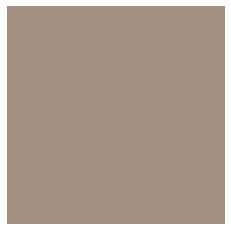

Nexus_Image_Iterator/JR Formanek_composite_final_8_90.png
(162, 107, 99)


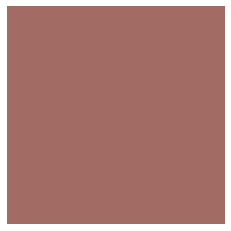

Nexus_Image_Iterator/moving_picture_grid_40_.png
(170, 149, 143)


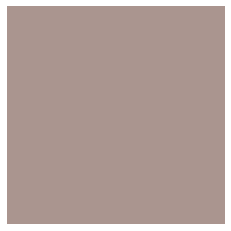

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_69_resized.png
(13, 12, 12)


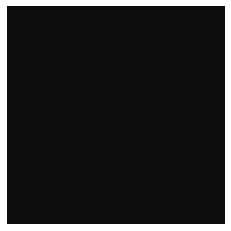

Nexus_Image_Iterator/moving_picture_grid_6_resized.png
(4, 4, 4)


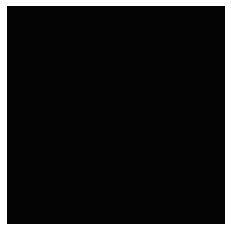

Nexus_Image_Iterator/Nataliia_composite_final_2_90.png
(146, 114, 106)


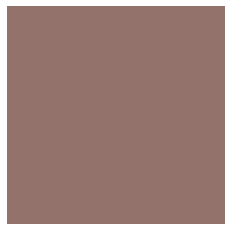

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_94_resized.png
(4, 4, 4)


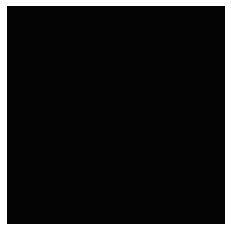

Nexus_Image_Iterator/full_sprial_grids_42_resized.png
(11, 11, 11)


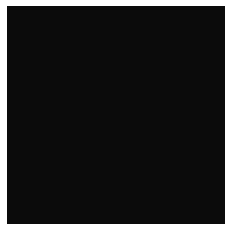

Nexus_Image_Iterator/grid_sprial_test_34_resized.png
(14, 13, 13)


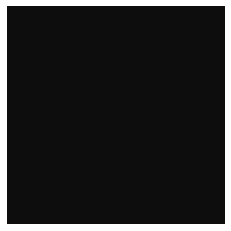

Nexus_Image_Iterator/moving_picture_grid_77_resized.png
(137, 124, 124)


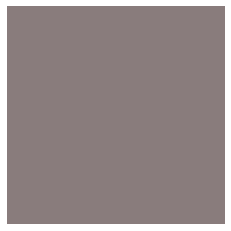

Nexus_Image_Iterator/moving_picture_grid_100_resized.png
(4, 4, 4)


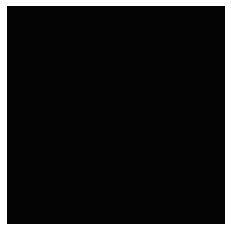

Nexus_Image_Iterator/Nataliia3_composite_1.png
(117, 123, 147)


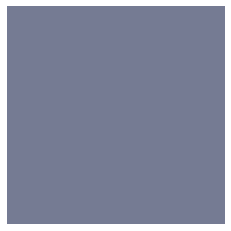

Nexus_Image_Iterator/grid_sprial_test_28_resized.png
(11, 10, 10)


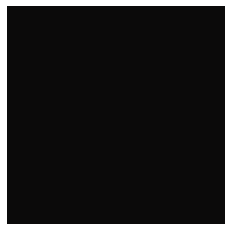

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_88_resized.png
(4, 4, 4)


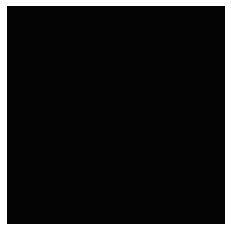

Nexus_Image_Iterator/moving_picture_grid_113_.png
(143, 148, 161)


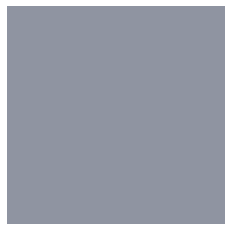

Nexus_Image_Iterator/full_sprial_grids_44_.png
(39, 37, 37)


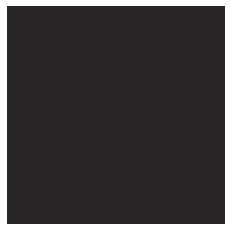

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_75_resized.png
(10, 10, 10)


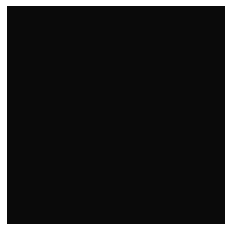

Nexus_Image_Iterator/Spiderplant_composite_final_1_90.png
(147, 113, 105)


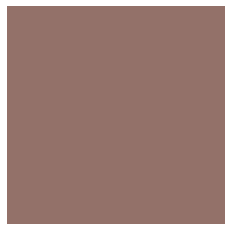

Nexus_Image_Iterator/Sibel_composite_final_5_90.png
(138, 127, 120)


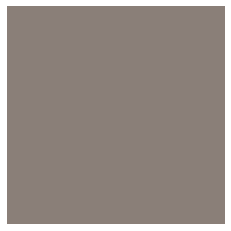

Nexus_Image_Iterator/moving_picture_grid_96_resized.png
(152, 135, 130)


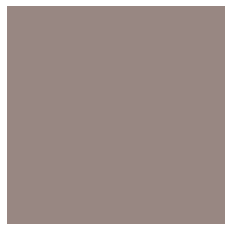

Nexus_Image_Iterator/monsteroflove_composite_3.png
(145, 106, 102)


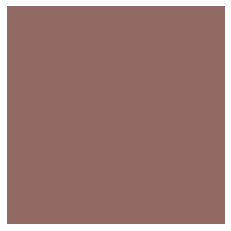

Nexus_Image_Iterator/MC 3_composite_final_0_90.png
(148, 145, 151)


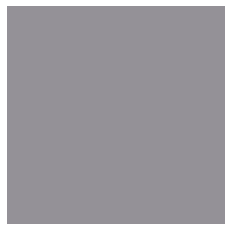

Nexus_Image_Iterator/full_sprial_grids_100_.png
(143, 148, 161)


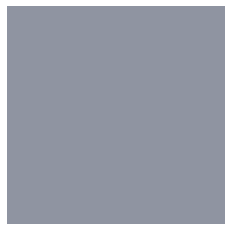

Nexus_Image_Iterator/moving_picture_grid_83_.png
(13, 12, 12)


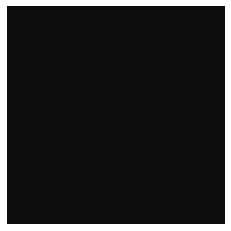

Nexus_Image_Iterator/MC 2_composite_final_4_90.png
(134, 132, 140)


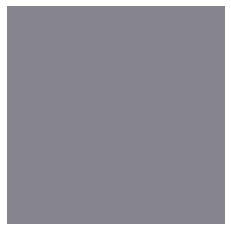

Nexus_Image_Iterator/Kathy_2_composite_1.png
(56, 55, 34)


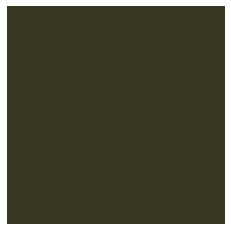

Nexus_Image_Iterator/more_compressedfull_sprial_grids_91_resized.png
(4, 4, 4)


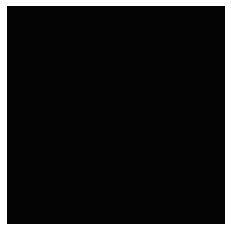

Nexus_Image_Iterator/full_sprial_grids_13_.png
(4, 4, 4)


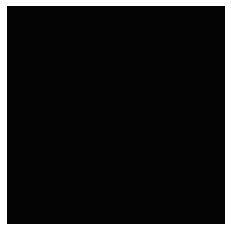

Nexus_Image_Iterator/RainbowSpaceman_composite_final_7_90.png
(105, 80, 82)


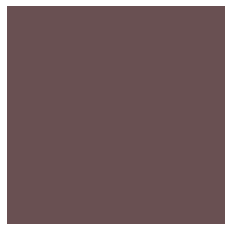

Nexus_Image_Iterator/Sibel_composite_3.png
(160, 133, 123)


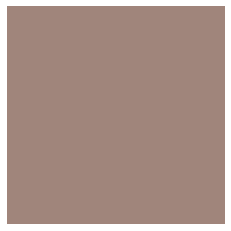

Nexus_Image_Iterator/MC 2_composite_final_8_90.png
(145, 130, 131)


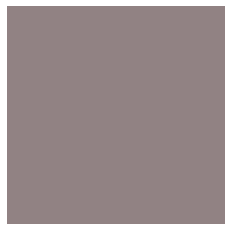

Nexus_Image_Iterator/back_forth_grid_24_resized.png
(151, 136, 133)


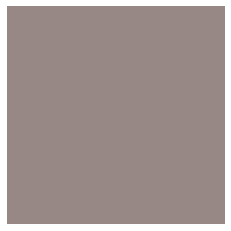

Nexus_Image_Iterator/Kathy_2_composite_final_6_90.png
(154, 123, 85)


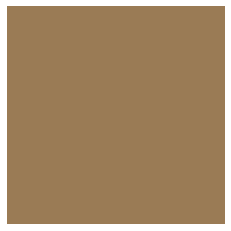

Nexus_Image_Iterator/moving_picture_grid_95_.png
(156, 138, 132)


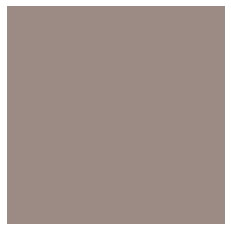

Nexus_Image_Iterator/more_compressedfull_sprial_grids_32_resized.png
(14, 14, 13)


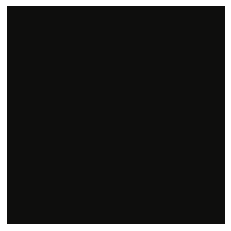

Nexus_Image_Iterator/full_sprial_grids_70_resized.png
(12, 12, 12)


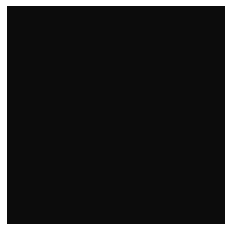

Nexus_Image_Iterator/back_forth_grid_39_.png
(13, 13, 12)


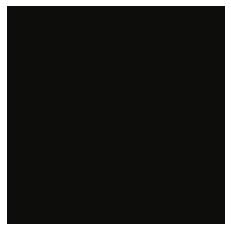

Nexus_Image_Iterator/moving_picture_grid_45_resized.png
(164, 146, 142)


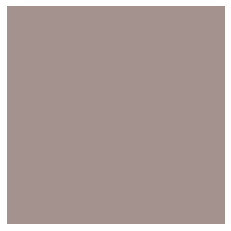

Nexus_Image_Iterator/Nataliia 4_composite_final_6_90.png
(158, 155, 160)


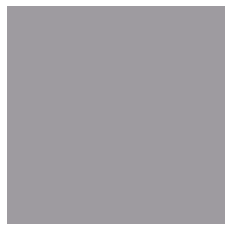

Nexus_Image_Iterator/Kasey Edgerton 3_composite_3.png
(99, 96, 89)


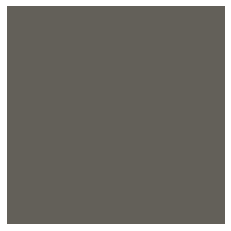

Nexus_Image_Iterator/back_forth_grid_54_resized.png
(152, 136, 131)


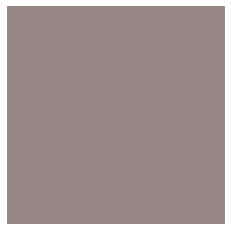

Nexus_Image_Iterator/Jeanfiedo_composite_final_6_90.png
(123, 115, 105)


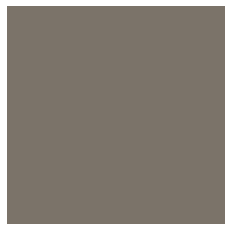

Nexus_Image_Iterator/moving_picture_grid_105_.png
(4, 4, 4)


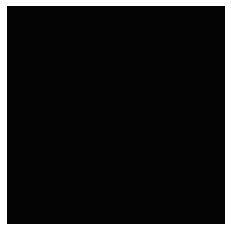

Nexus_Image_Iterator/more_compressedfull_sprial_grids_2_resized.png
(4, 4, 4)


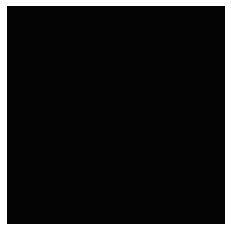

Nexus_Image_Iterator/more_compressedfull_sprial_grids_42_resized.png
(12, 11, 12)


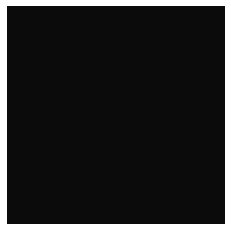

Nexus_Image_Iterator/grid_sprial_test_4_.png
(4, 4, 4)


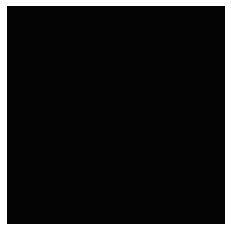

Nexus_Image_Iterator/eisa_composite_final_2_90.png
(95, 88, 92)


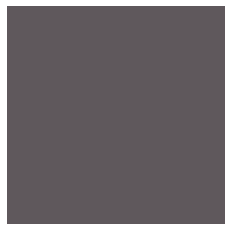

Nexus_Image_Iterator/full_sprial_grids_52_.png
(128, 115, 112)


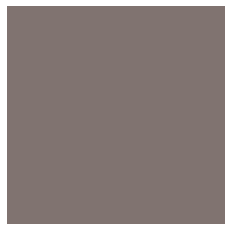

Nexus_Image_Iterator/Victor_composite_final_1_90.png
(80, 66, 66)


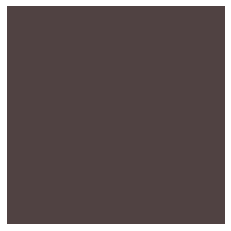

Nexus_Image_Iterator/Sibel_composite_final_9_90.png
(158, 147, 126)


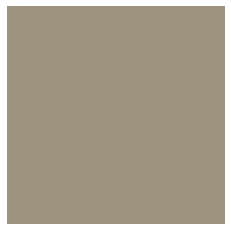

Nexus_Image_Iterator/moving_picture_grid_35_resized.png
(14, 13, 13)


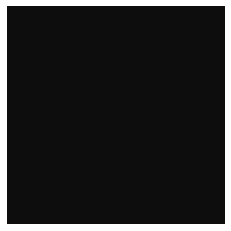

Nexus_Image_Iterator/Baffin_composite_2.png
(126, 90, 98)


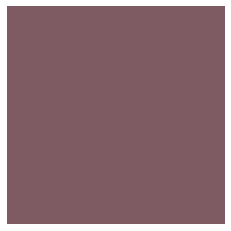

Nexus_Image_Iterator/grid_sprial_test_18_.png
(156, 138, 131)


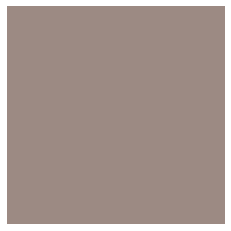

Nexus_Image_Iterator/back_forth_grid_19_.png
(156, 138, 132)


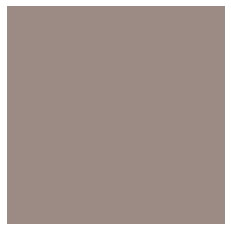

Nexus_Image_Iterator/Spiderplant 2_composite_final_2_90.png
(172, 144, 145)


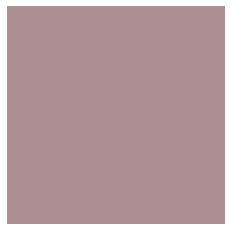

Nexus_Image_Iterator/monsteroflove_composite_final_4_90.png
(155, 95, 81)


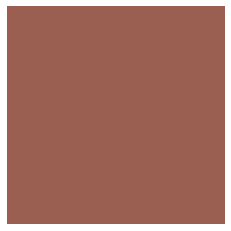

Nexus_Image_Iterator/back_forth_grid_31_resized.png
(12, 12, 12)


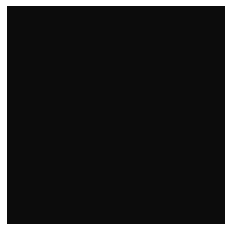

Nexus_Image_Iterator/full_sprial_grids_25_.png
(155, 138, 134)


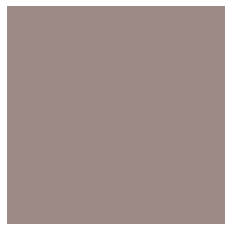

Nexus_Image_Iterator/Jeanfiedo_composite_final_5_90.png676_resized.png
(134, 110, 104)


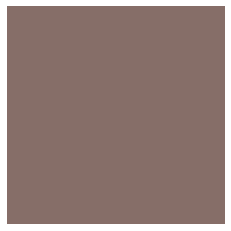

Nexus_Image_Iterator/full_sprial_grids_98_resized.png
(4, 4, 4)


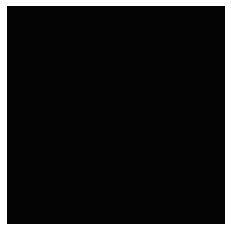

Nexus_Image_Iterator/full_sprial_grids_65_resized.png
(14, 14, 13)


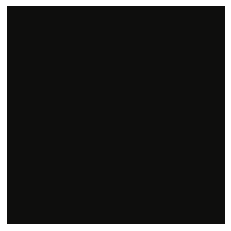

Nexus_Image_Iterator/Nataliia 4_composite_2.png
(143, 124, 124)


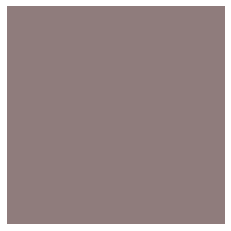

Nexus_Image_Iterator/Soul vision_composite_4.png
(76, 52, 48)


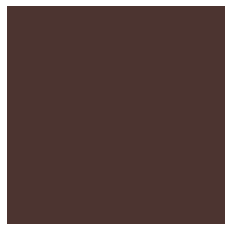

Nexus_Image_Iterator/more_compressedfull_sprial_grids_27_resized.png
(155, 139, 136)


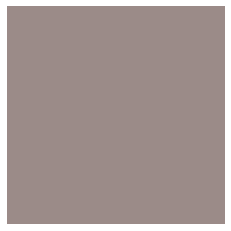

Nexus_Image_Iterator/more_compressedcheckers_test_01_.png
(170, 149, 143)


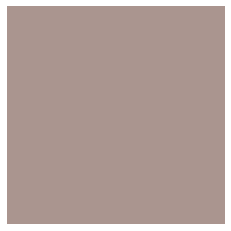

Nexus_Image_Iterator/moving_picture_grid_50_resized.png
(169, 149, 142)


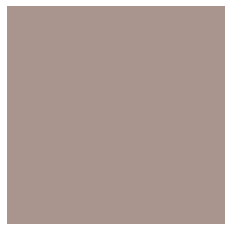

Nexus_Image_Iterator/grid_sprial_test_13_resized.png
(4, 4, 4)


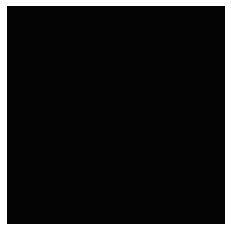

Nexus_Image_Iterator/Spiderplant3_composite_final_7_90.png
(145, 113, 111)


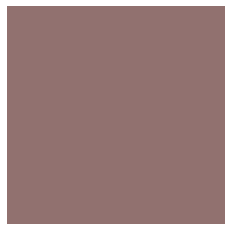

Nexus_Image_Iterator/Kasey Edgerton 3_composite_1.png
(13, 17, 20)


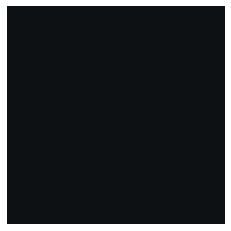

Nexus_Image_Iterator/back_forth_grid_41_resized.png
(152, 139, 138)


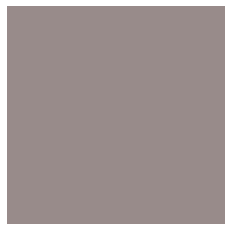

Nexus_Image_Iterator/Prianna _composite_final_6_90.png
(115, 71, 83)


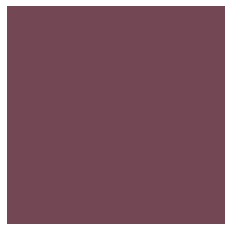

Nexus_Image_Iterator/John_composite_final_5_90.png
(178, 156, 136)


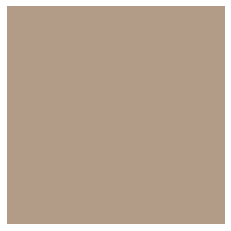

Nexus_Image_Iterator/Spiderplant 2_composite_final_4_90676_resized.png
(144, 143, 149)


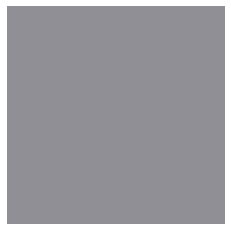

Nexus_Image_Iterator/Sloth Vibes_composite_final_8_90.png
(148, 144, 159)


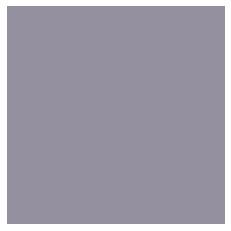

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_2_resized.png
(142, 147, 161)


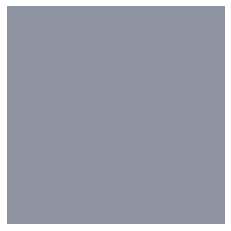

Nexus_Image_Iterator/full_sprial_grids_72_.png
(12, 11, 11)


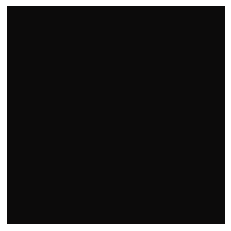

Nexus_Image_Iterator/full_sprial_grids_15_resized.png
(4, 4, 4)


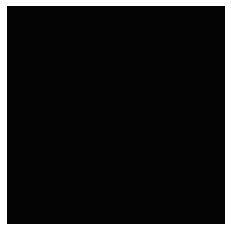

Nexus_Image_Iterator/Soul vision_composite_final_1_90.png
(35, 28, 27)


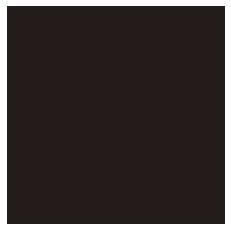

Nexus_Image_Iterator/more_compressedfull_sprial_grids_57_resized.png
(33, 31, 31)


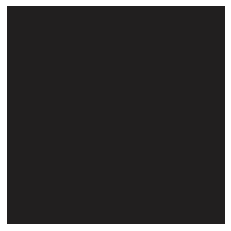

Nexus_Image_Iterator/Spiderplant3_composite_4.png
(153, 118, 114)


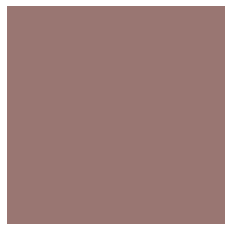

Nexus_Image_Iterator/i_love_chai_composite_final_3_90.png
(86, 82, 86)


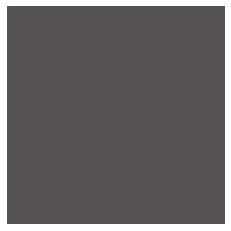

Nexus_Image_Iterator/moving_picture_grid_20_resized.png
(152, 136, 131)


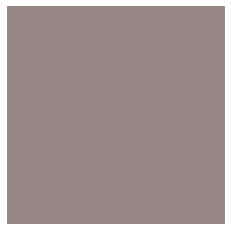

Nexus_Image_Iterator/Rondo_composite_final_3_90.png
(94, 95, 98)


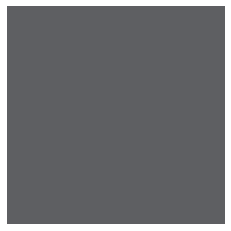

Nexus_Image_Iterator/back_forth_grid_58_.png
(4, 4, 4)


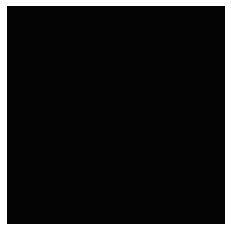

Nexus_Image_Iterator/John_composite_final_9_90.png
(161, 130, 118)


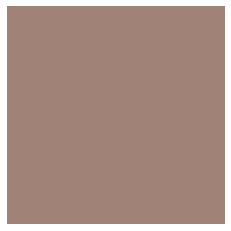

Nexus_Image_Iterator/moving_picture_grid_109_resized.png
(4, 4, 4)


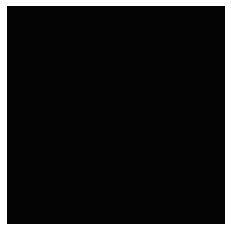

Nexus_Image_Iterator/Sloth Vibes_composite_final_4_90.png
(160, 129, 138)


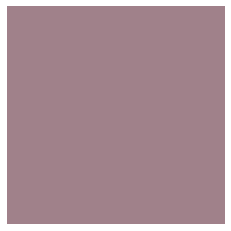

Nexus_Image_Iterator/Spiderplant 2_composite_final_3_90.png676_resized.png
(171, 137, 137)


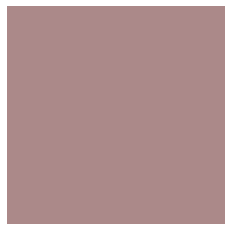

Nexus_Image_Iterator/Sibel_composite_1.png
(63, 49, 50)


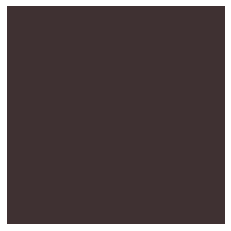

Nexus_Image_Iterator/full_sprial_grids_64_.png
(156, 140, 138)


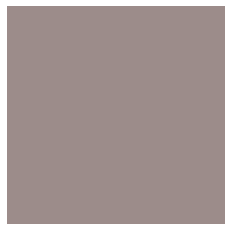

Nexus_Image_Iterator/Kathy_composite_final_1_90.png
(126, 119, 83)


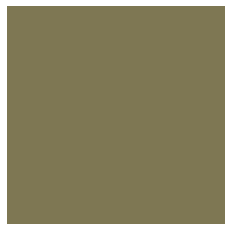

Nexus_Image_Iterator/grid_sprial_test_2_resized.png
(4, 4, 4)


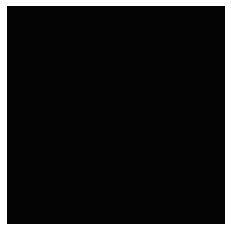

Nexus_Image_Iterator/moving_picture_grid_6_.png
(4, 4, 4)


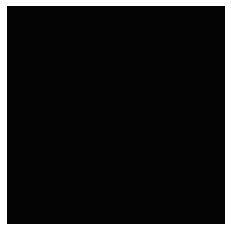

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_60_resized.png
(10, 10, 10)


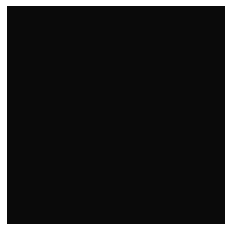

Nexus_Image_Iterator/Kathy_2_composite_3.png
(131, 119, 101)


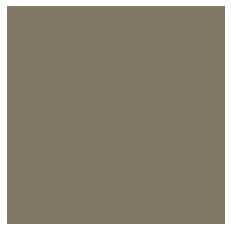

Nexus_Image_Iterator/moving_picture_grid_83_resized.png
(12, 12, 12)


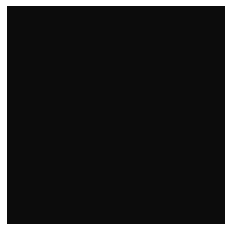

Nexus_Image_Iterator/Nataliia3_composite_final_1_90.png
(130, 118, 128)


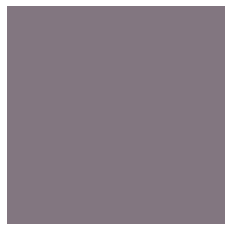

Nexus_Image_Iterator/full_sprial_grids_5_resized.png
(4, 4, 4)


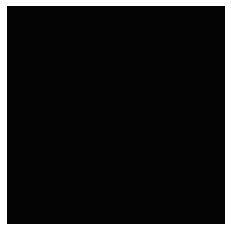

Nexus_Image_Iterator/monsteroflove_composite_1.png
(152, 134, 126)


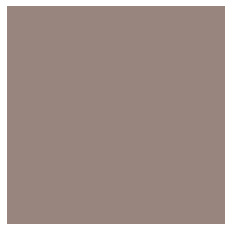

Nexus_Image_Iterator/Victor_composite_4.png
(114, 68, 70)


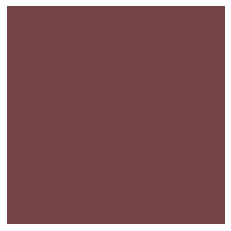

Nexus_Image_Iterator/more_compressedfull_sprial_grids_79_resized.png
(154, 137, 132)


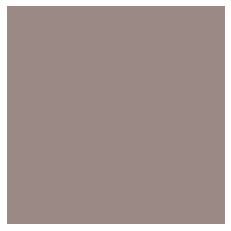

Nexus_Image_Iterator/monsteroflove_composite_final_8_90.png
(96, 73, 66)


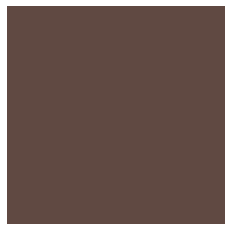

Nexus_Image_Iterator/full_sprial_grids_33_.png
(13, 12, 12)


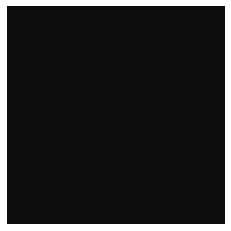

Nexus_Image_Iterator/more_compressedfull_sprial_grids_84_resized.png
(153, 137, 132)


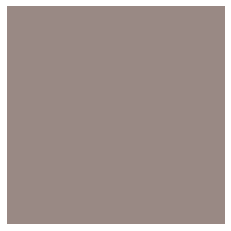

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_2_90.png
(107, 104, 113)


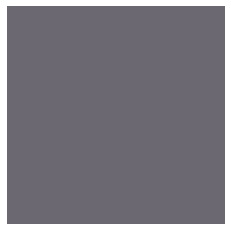

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_10_resized.png
(4, 4, 4)


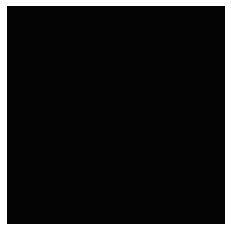

Nexus_Image_Iterator/Nataliia3_composite_2.png
(127, 127, 142)


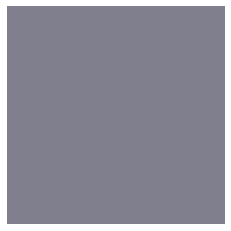

Nexus_Image_Iterator/Kasey Edgerton_composite_final_6_90.png
(130, 131, 127)


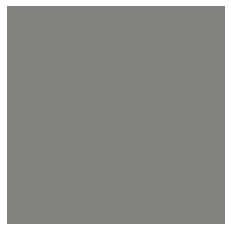

Nexus_Image_Iterator/Quinn_test_2_composite_final_6_90.png
(110, 121, 112)


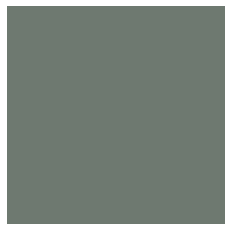

Nexus_Image_Iterator/Actias_composite_final_2_90.png
(174, 148, 141)


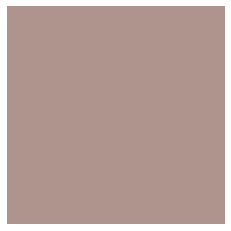

Nexus_Image_Iterator/Nataliia3_composite_3.png
(143, 133, 135)


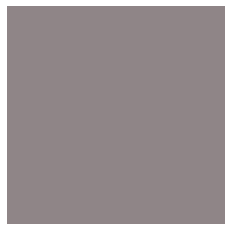

Nexus_Image_Iterator/back_forth_grid_73_resized.png
(4, 4, 4)


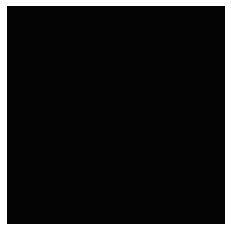

Nexus_Image_Iterator/full_sprial_grids_48_.png
(128, 114, 112)


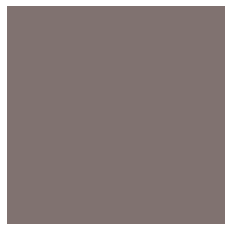

Nexus_Image_Iterator/more_compressedfull_sprial_grids_98_resized.png
(4, 4, 4)


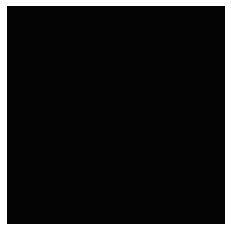

Nexus_Image_Iterator/Nataliia 2_composite_final_1_90.png
(141, 151, 171)


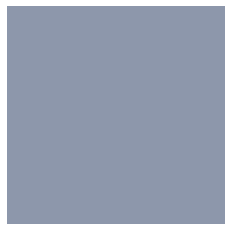

Nexus_Image_Iterator/Baffin_composite_final_9_90.png
(150, 145, 146)


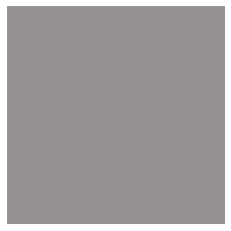

Nexus_Image_Iterator/full_sprial_grids_27_resized.png
(10, 10, 10)


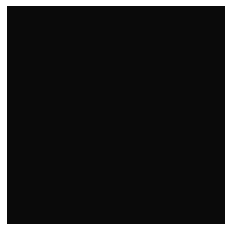

Nexus_Image_Iterator/more_compressedfull_sprial_grids_65_resized.png
(15, 14, 14)


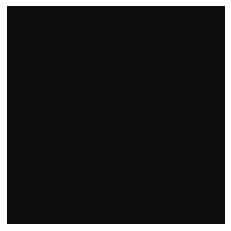

Nexus_Image_Iterator/moving_picture_grid_37_.png
(156, 140, 138)


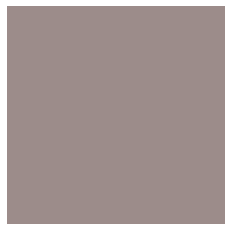

Nexus_Image_Iterator/moving_picture_grid_12_resized.png
(4, 4, 4)


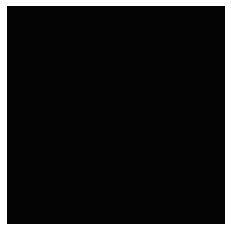

Nexus_Image_Iterator/full_sprial_grids_7_.png
(4, 4, 4)


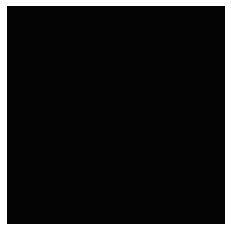

Nexus_Image_Iterator/back_forth_grid_3_resized.png
(4, 4, 4)


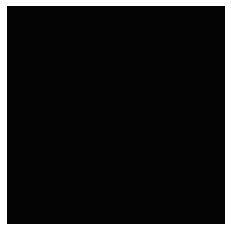

Nexus_Image_Iterator/Kathy_2_composite_2.png
(124, 115, 82)


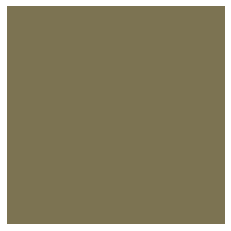

Nexus_Image_Iterator/back_forth_grid_23_.png
(155, 137, 133)


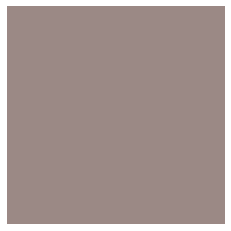

Nexus_Image_Iterator/MC 2_composite_4.png
(126, 105, 110)


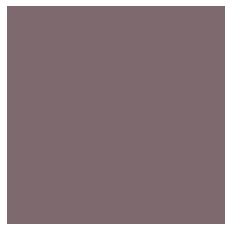

Nexus_Image_Iterator/full_sprial_grids_57_resized.png
(32, 30, 31)


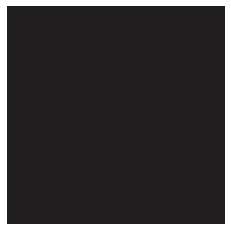

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_81_resized.png
(151, 135, 130)


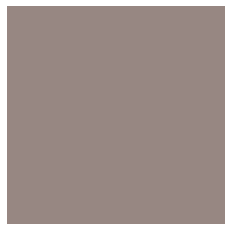

Nexus_Image_Iterator/moving_picture_grid_60_.png
(136, 124, 124)


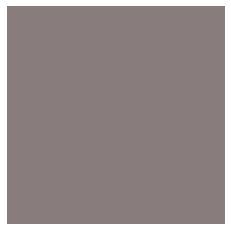

Nexus_Image_Iterator/more_compressedfull_sprial_grids_15_resized.png
(4, 4, 4)


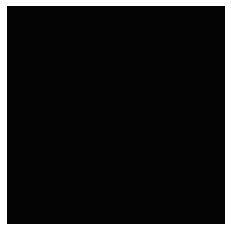

Nexus_Image_Iterator/moving_picture_grid_62_resized.png
(137, 124, 124)


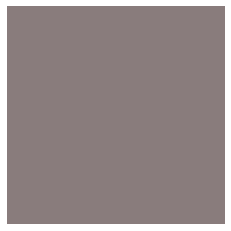

Nexus_Image_Iterator/Mika_composite_final_0_90.png
(129, 120, 114)


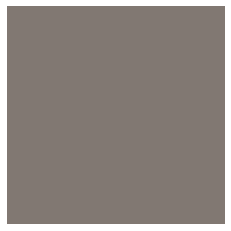

Nexus_Image_Iterator/grid_sprial_test_21_resized.png
(151, 135, 131)


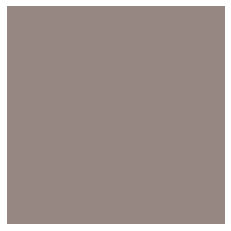

Nexus_Image_Iterator/back_forth_grid_35_.png
(156, 140, 138)


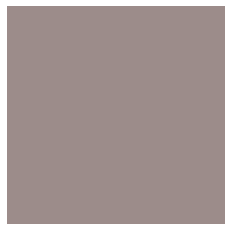

Nexus_Image_Iterator/donya_composite_final_0_90.png
(143, 148, 159)


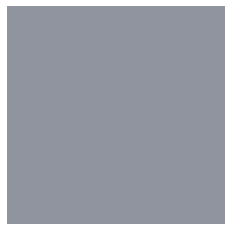

Nexus_Image_Iterator/Kasey Edgerton 4_composite_4.png
(94, 96, 103)


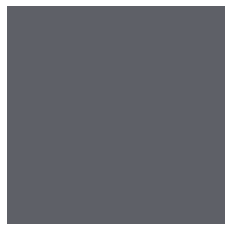

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_22_resized.png
(151, 135, 131)


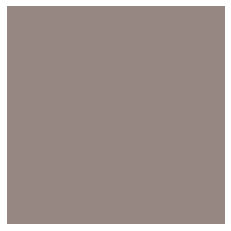

Nexus_Image_Iterator/moving_picture_grid_76_.png
(136, 124, 124)


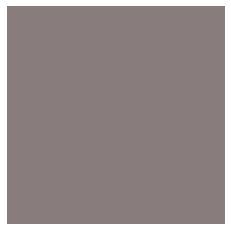

Nexus_Image_Iterator/moving_picture_grid_99_.png
(4, 4, 4)


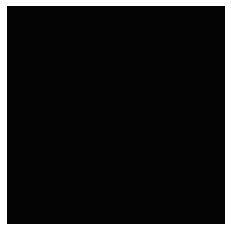

Nexus_Image_Iterator/Baffin_composite_final_5_90.png
(150, 145, 146)


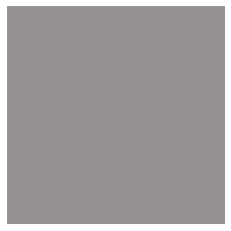

Nexus_Image_Iterator/grid_sprial_test_8_.png
(4, 4, 4)


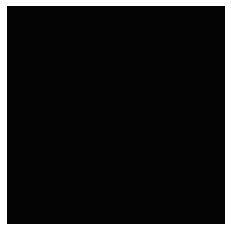

Nexus_Image_Iterator/back_forth_grid_62_.png
(4, 4, 4)


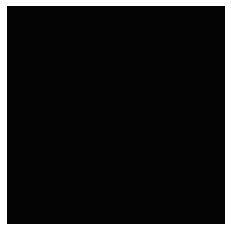

Nexus_Image_Iterator/Nataliia 4_composite_3.png
(134, 152, 178)


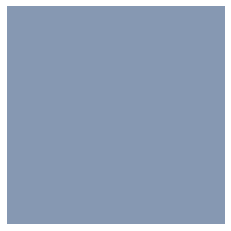

Nexus_Image_Iterator/grid_sprial_test_14_.png
(4, 4, 4)


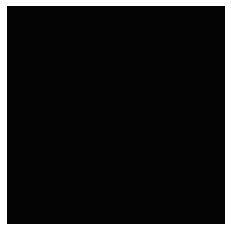

Nexus_Image_Iterator/full_sprial_grids_79_resized.png
(151, 135, 131)


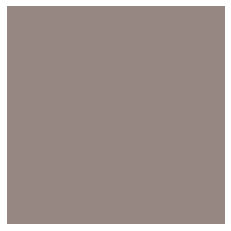

Nexus_Image_Iterator/moving_picture_grid_21_.png
(155, 137, 132)


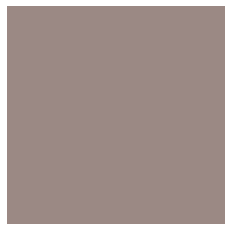

Nexus_Image_Iterator/full_sprial_grids_84_resized.png
(153, 137, 132)


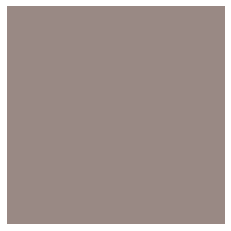

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_52_resized.png
(129, 115, 112)


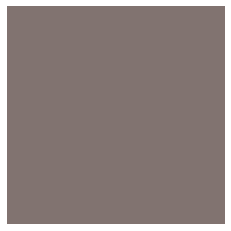

Nexus_Image_Iterator/Baffin_composite_1.png
(121, 67, 74)


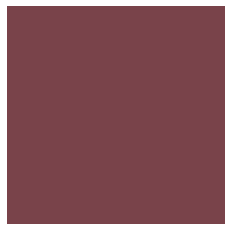

Nexus_Image_Iterator/moving_picture_grid_109_.png
(4, 4, 4)


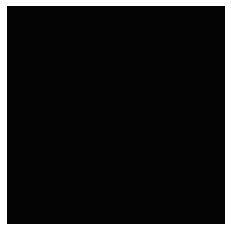

Nexus_Image_Iterator/MC 4_composite_final_3_90.png
(170, 160, 160)


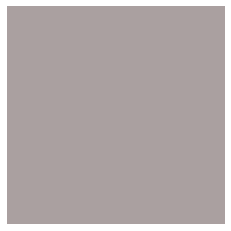

Nexus_Image_Iterator/more_compressedfull_sprial_grids_20_resized.png
(151, 135, 130)


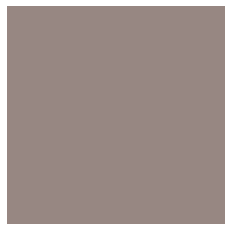

Nexus_Image_Iterator/full_sprial_grids_26_.png
(155, 139, 134)


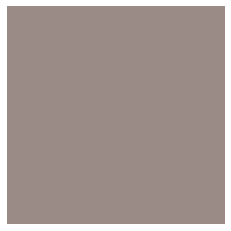

Nexus_Image_Iterator/Nataliia3_composite_final_4_90.png
(154, 146, 149)


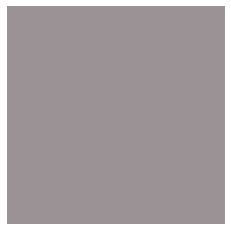

Nexus_Image_Iterator/full_sprial_grids_62_resized.png
(156, 141, 139)


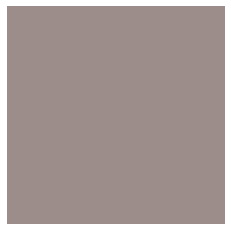

Nexus_Image_Iterator/grid_sprial_test_14_resized.png
(4, 4, 4)


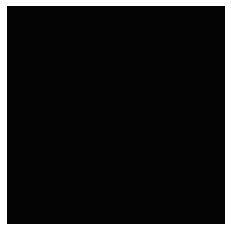

Nexus_Image_Iterator/moving_picture_grid_57_resized.png
(164, 146, 142)


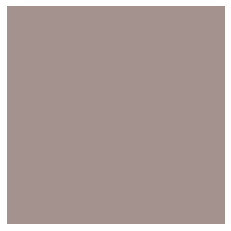

Nexus_Image_Iterator/back_forth_grid_36_resized.png
(14, 14, 13)


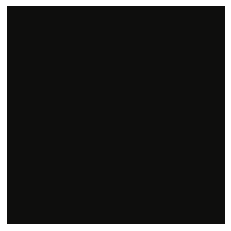

Nexus_Image_Iterator/moving_picture_grid_59_.png
(136, 124, 124)


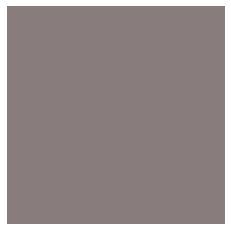

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_7_90.png
(132, 131, 135)


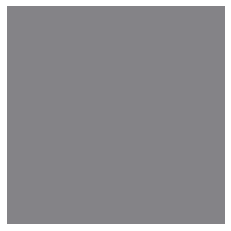

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_49_resized.png
(129, 115, 112)


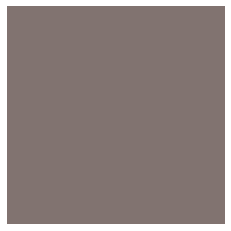

Nexus_Image_Iterator/Quinn_test_2_composite_final_3_90.png
(141, 131, 132)


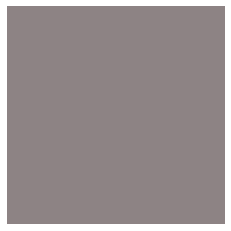

Nexus_Image_Iterator/Kasey Edgerton_composite_final_3_90.png
(126, 114, 117)


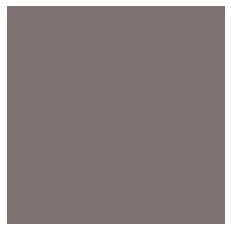

Nexus_Image_Iterator/more_compressedfull_sprial_grids_50_resized.png
(129, 116, 113)


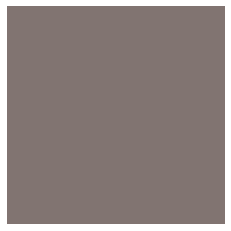

Nexus_Image_Iterator/full_sprial_grids_71_.png
(12, 11, 11)


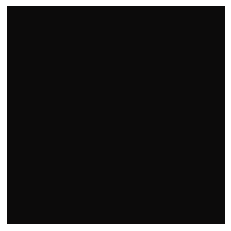

Nexus_Image_Iterator/full_sprial_grids_12_resized.png
(4, 4, 4)


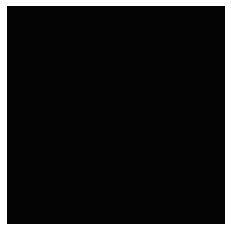

Nexus_Image_Iterator/Sloth Vibes_composite_final_1_90.png
(161, 131, 139)


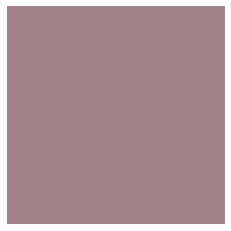

Nexus_Image_Iterator/Spiderplant 4_composite_1.png
(179, 138, 138)


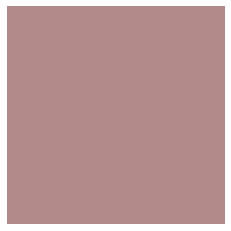

Nexus_Image_Iterator/eisa_composite_1.png
(90, 83, 81)


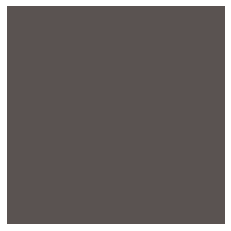

Nexus_Image_Iterator/moving_picture_grid_27_resized.png
(10, 10, 10)


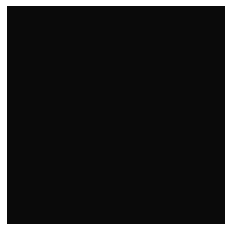

Nexus_Image_Iterator/Kathy_composite_final_4_90.png
(127, 119, 103)


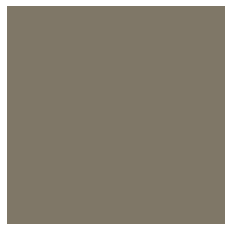

Nexus_Image_Iterator/back_forth_grid_46_resized.png
(10, 10, 10)


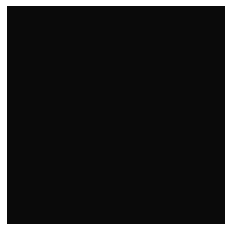

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_39_resized.png
(155, 141, 139)


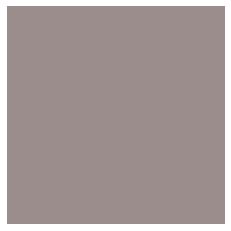

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_5_resized.png
(4, 4, 4)


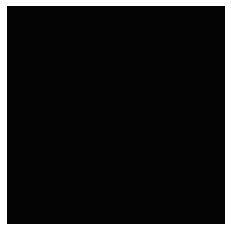

Nexus_Image_Iterator/Soul vision_composite_final_8_90.png
(70, 48, 39)


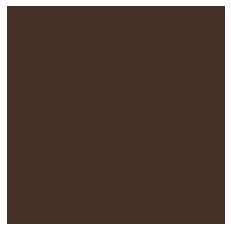

Nexus_Image_Iterator/Actias_composite_4.png
(156, 118, 115)


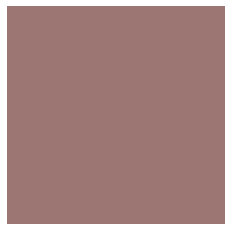

Nexus_Image_Iterator/Spiderplant3_composite_final_2_90.png
(131, 114, 116)


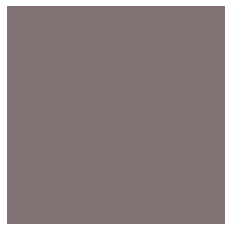

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_67_resized.png
(152, 138, 136)


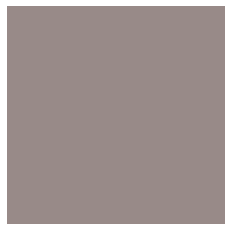

Nexus_Image_Iterator/Kathy_composite_final_8_90.png
(174, 165, 146)


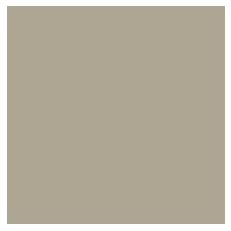

Nexus_Image_Iterator/Prianna _composite_final_3_90.png
(140, 109, 108)


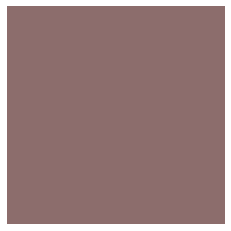

Nexus_Image_Iterator/back_forth_grid_9_.png
(4, 4, 4)


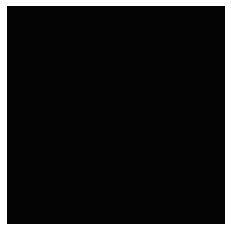

Nexus_Image_Iterator/full_sprial_grids_67_.png
(13, 13, 12)


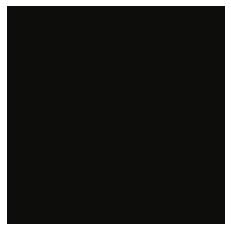

Nexus_Image_Iterator/moving_picture_grid_8_resized.png
(4, 4, 4)


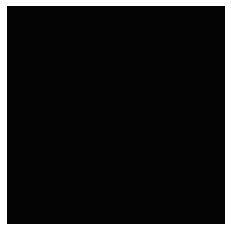

Nexus_Image_Iterator/moving_picture_grid_84_resized.png
(12, 11, 11)


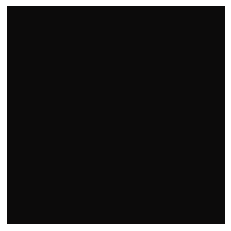

Nexus_Image_Iterator/John_composite_final_0_90.png
(168, 136, 119)


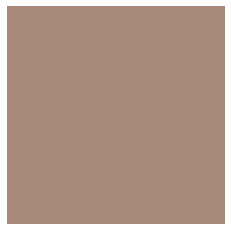

Nexus_Image_Iterator/full_sprial_grids_88_.png
(4, 4, 4)


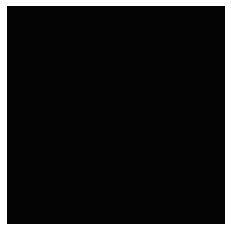

Nexus_Image_Iterator/back_forth_grid_18_resized.png
(152, 135, 130)


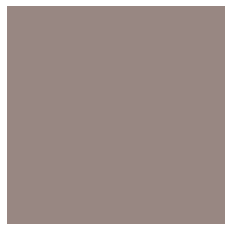

Nexus_Image_Iterator/moving_picture_grid_18_.png
(157, 139, 133)


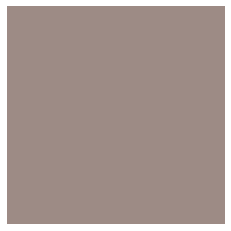

Nexus_Image_Iterator/Soul vision_composite_final_4_90.png
(122, 73, 58)


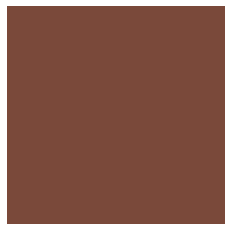

Nexus_Image_Iterator/moving_picture_grid_79_resized.png
(14, 14, 13)


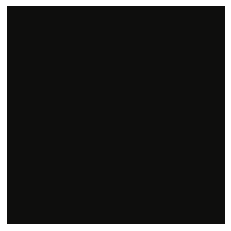

Nexus_Image_Iterator/Rondo_composite_final_6_90.png
(91, 93, 99)


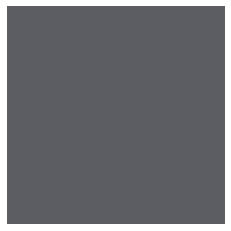

Nexus_Image_Iterator/i_love_chai_composite_final_6_90.png
(84, 79, 98)


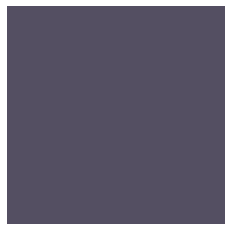

Nexus_Image_Iterator/moving_picture_grid_5_.png
(4, 4, 4)


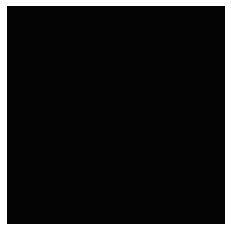

Nexus_Image_Iterator/grid_sprial_test_5_resized.png
(4, 4, 4)


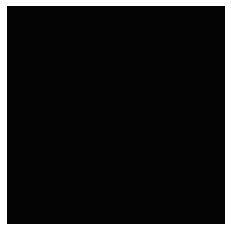

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_17_resized.png
(153, 137, 132)


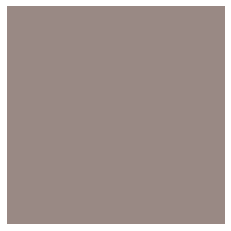

Nexus_Image_Iterator/full_sprial_grids_30_.png
(12, 11, 11)


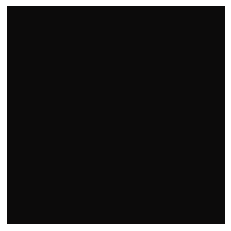

Nexus_Image_Iterator/RainbowSpaceman_composite_1.png
(135, 124, 132)


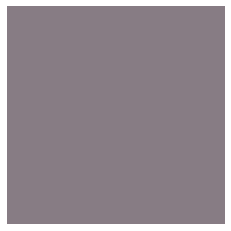

Nexus_Image_Iterator/monsteroflove_composite_final_1_90.png
(149, 112, 94)


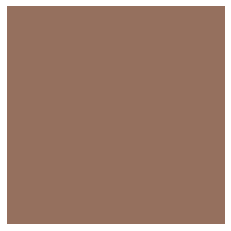

Nexus_Image_Iterator/Spiderplant 2_composite_final_7_90.png
(157, 138, 140)


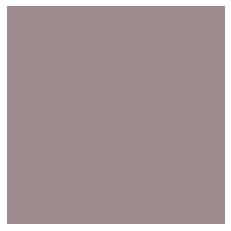

Nexus_Image_Iterator/more_compressedfull_sprial_grids_83_resized.png
(152, 135, 130)


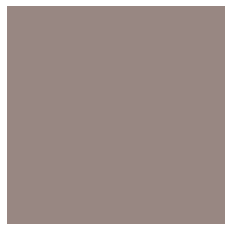

Nexus_Image_Iterator/Nataliia3_composite_final_8_90.png
(152, 142, 142)


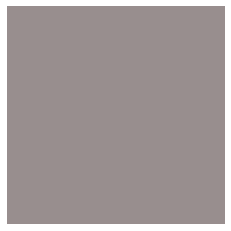

Nexus_Image_Iterator/back_forth_grid_68_resized.png
(4, 4, 4)


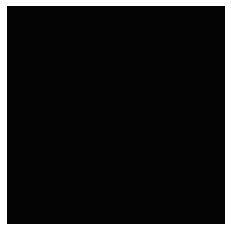

Nexus_Image_Iterator/full_sprial_grids_2_resized.png
(4, 4, 4)


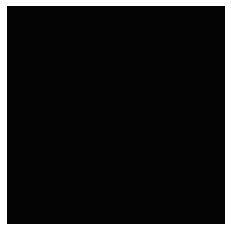

Nexus_Image_Iterator/more_compressedfull_sprial_grids_62_resized.png
(155, 141, 139)


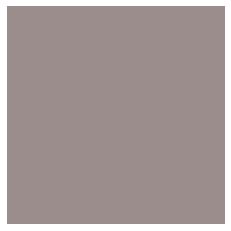

Nexus_Image_Iterator/Nataliia 2_composite_final_8_90.png
(146, 126, 130)


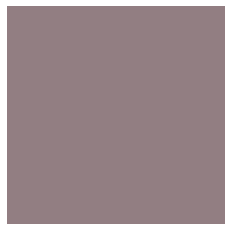

Nexus_Image_Iterator/Baffin_composite_final_0_90.png
(133, 125, 140)


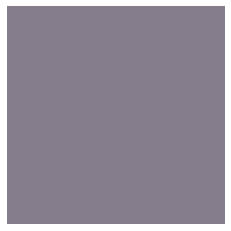

Nexus_Image_Iterator/full_sprial_grids_20_resized.png
(151, 135, 130)


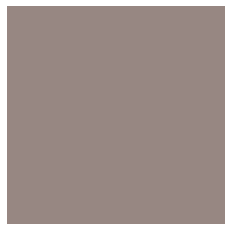

Nexus_Image_Iterator/moving_picture_grid_15_resized.png
(4, 4, 4)


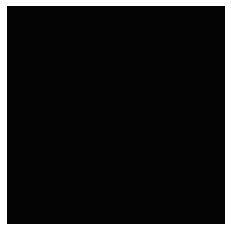

Nexus_Image_Iterator/full_sprial_grids_4_.png
(4, 4, 4)


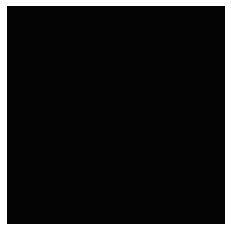

Nexus_Image_Iterator/moving_picture_grid_34_.png
(13, 12, 12)


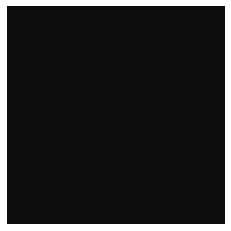

Nexus_Image_Iterator/MC 4_composite_final_6_90.png
(147, 140, 148)


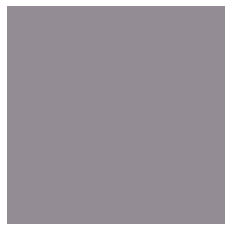

Nexus_Image_Iterator/Nataliia_composite_1.png
(153, 133, 129)


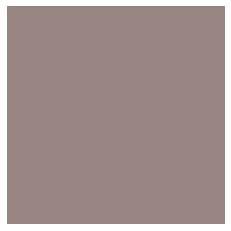

Nexus_Image_Iterator/more_compressedfull_sprial_grids_12_resized.png
(4, 4, 4)


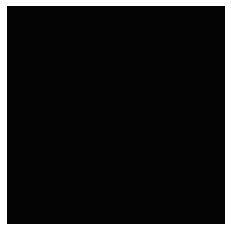

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_86_resized.png
(4, 4, 4)


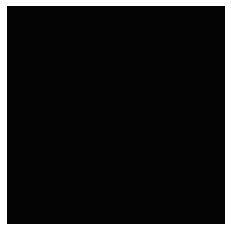

Nexus_Image_Iterator/back_forth_grid_20_.png
(155, 137, 132)


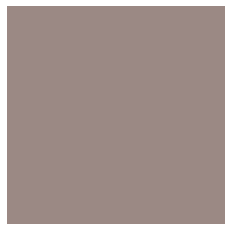

Nexus_Image_Iterator/full_sprial_grids_50_resized.png
(129, 115, 113)


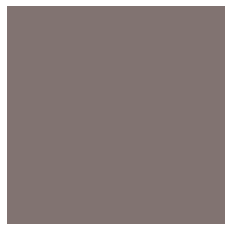

Nexus_Image_Iterator/grid_sprial_test_26_resized.png
(10, 10, 10)


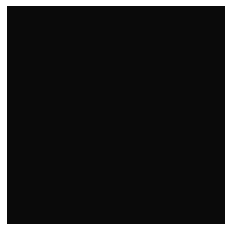

Nexus_Image_Iterator/moving_picture_grid_65_resized.png
(137, 124, 124)


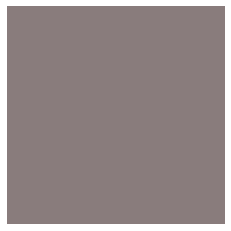

Nexus_Image_Iterator/moving_picture_grid_112_resized.png
(4, 4, 4)


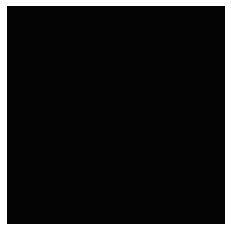

Nexus_Image_Iterator/moving_picture_grid_98_resized.png
(153, 137, 133)


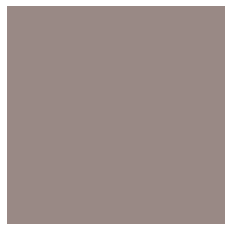

Nexus_Image_Iterator/Mika_composite_final_9_90.png
(101, 99, 103)


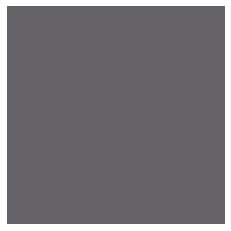

Nexus_Image_Iterator/Jeanfiedo_composite_final_2_90676_resized.png
(137, 107, 108)


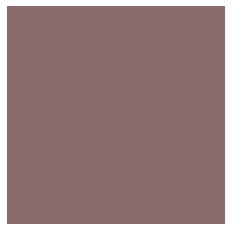

Nexus_Image_Iterator/donya_composite_final_5_90.png
(126, 122, 135)


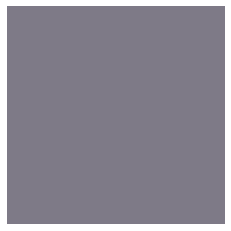

Nexus_Image_Iterator/back_forth_grid_4_resized.png
(4, 4, 4)


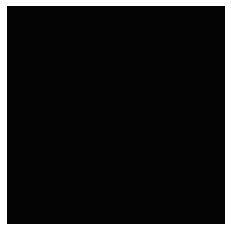

Nexus_Image_Iterator/moving_picture_grid_63_.png
(136, 124, 124)


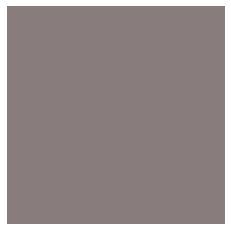

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_25_resized.png
(151, 135, 133)


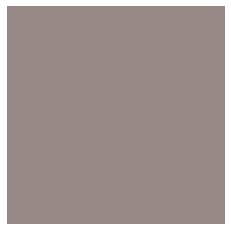

Nexus_Image_Iterator/back_forth_grid_36_.png
(156, 140, 138)


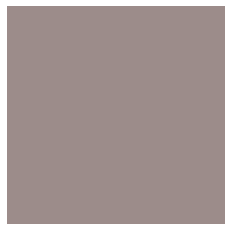

Nexus_Image_Iterator/donya_composite_final_9_90.png
(129, 150, 180)


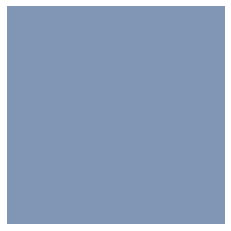

Nexus_Image_Iterator/moving_picture_grid_75_.png
(136, 124, 124)


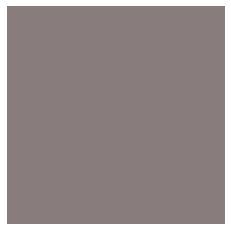

Nexus_Image_Iterator/Mika_composite_final_5_90.png
(112, 89, 76)


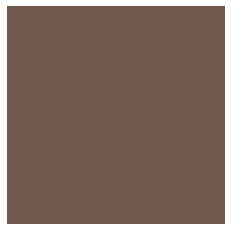

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_55_resized.png
(49, 46, 46)


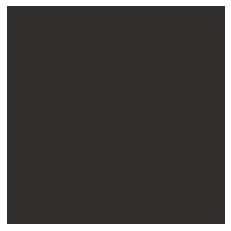

Nexus_Image_Iterator/full_sprial_grids_83_resized.png
(152, 135, 130)


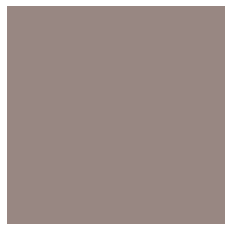

Nexus_Image_Iterator/grid_sprial_test_17_.png
(157, 139, 133)


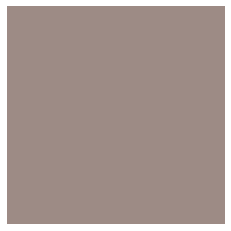

Nexus_Image_Iterator/back_forth_grid_61_.png
(4, 4, 4)


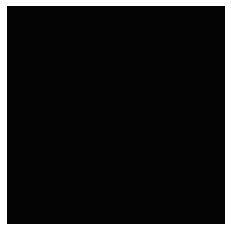

Nexus_Image_Iterator/Actias_composite_final_7_90.png
(171, 135, 130)


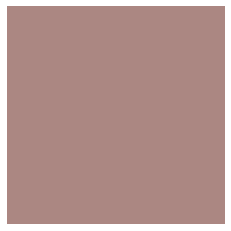

Nexus_Image_Iterator/Nataliia 2_composite_final_4_90.png
(143, 121, 119)


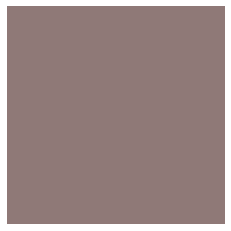

Nexus_Image_Iterator/Jeanfiedo_composite_1.png
(172, 139, 139)


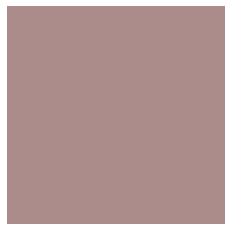

Nexus_Image_Iterator/moving_picture_grid_22_.png
(155, 137, 132)


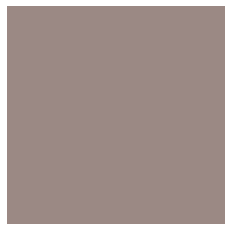

Nexus_Image_Iterator/moving_picture_grid_55_.png
(156, 141, 139)


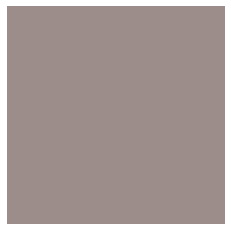

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_30_resized.png
(12, 11, 11)


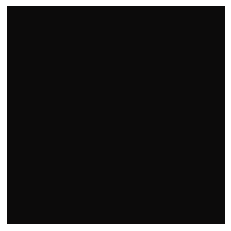

Nexus_Image_Iterator/Cindy_composite_final_4_90.png
(149, 121, 129)


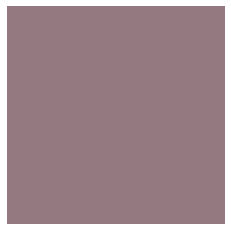

Nexus_Image_Iterator/Nataliia_composite_final_7_90.png
(145, 137, 143)


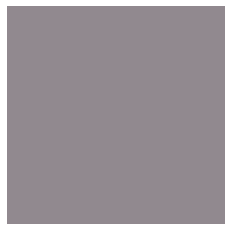

Nexus_Image_Iterator/Jeanfiedo_composite_3.png
(101, 94, 93)


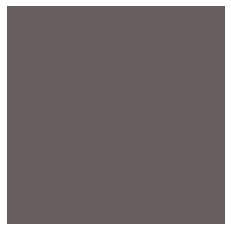

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_8_90.png
(86, 80, 83)


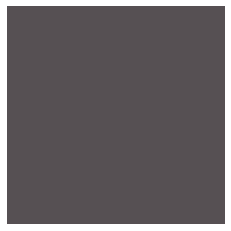

Nexus_Image_Iterator/back_forth_grid_16_.png
(157, 140, 134)


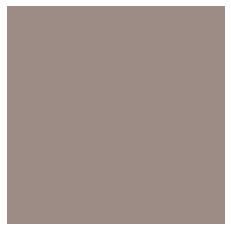

Nexus_Image_Iterator/more_compressedfull_sprial_grids_59_resized.png
(12, 11, 12)


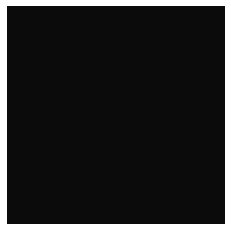

Nexus_Image_Iterator/full_sprial_grids_96_resized.png
(4, 4, 4)


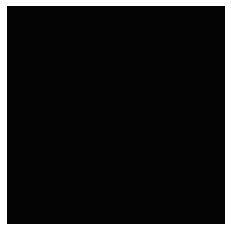

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_40_resized.png
(139, 139, 143)


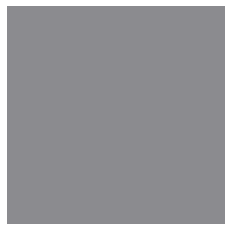

Nexus_Image_Iterator/eisa_composite_2.png
(142, 116, 74)


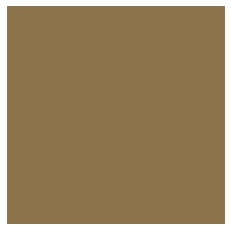

Nexus_Image_Iterator/Spiderplant 4_composite_2.png
(174, 135, 133)


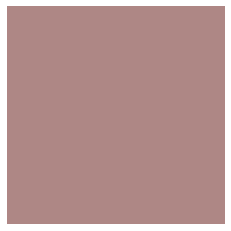

Nexus_Image_Iterator/Spiderplant 4_composite_final_0_90.png
(108, 111, 109)


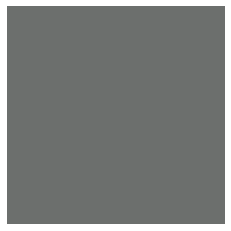

Nexus_Image_Iterator/full_sprial_grids_92_.png
(4, 4, 4)


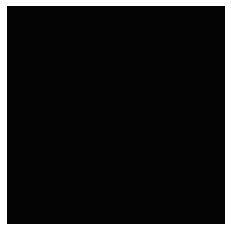

Nexus_Image_Iterator/back_forth_grid_41_.png
(13, 12, 12)


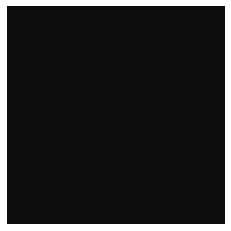

Nexus_Image_Iterator/more_compressedfull_sprial_grids_29_resized.png
(156, 140, 136)


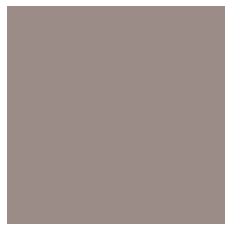

Nexus_Image_Iterator/full_sprial_grids_35_resized.png
(14, 14, 13)


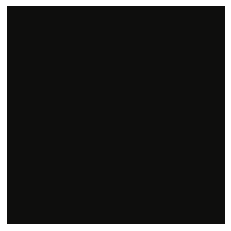

Nexus_Image_Iterator/moving_picture_grid_14_.png
(4, 4, 4)


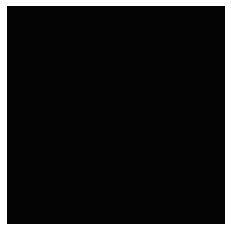

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_0_90.png
(84, 95, 92)


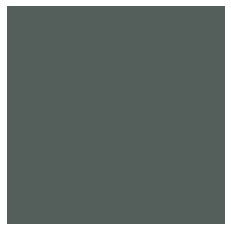

Nexus_Image_Iterator/more_compressedfull_sprial_grids_77_resized.png
(151, 135, 133)


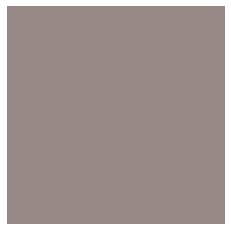

Nexus_Image_Iterator/moving_picture_grid_9_.png
(4, 4, 4)


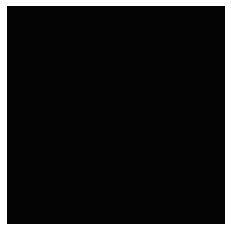

Nexus_Image_Iterator/back_forth_grid_5_.png
(4, 4, 4)


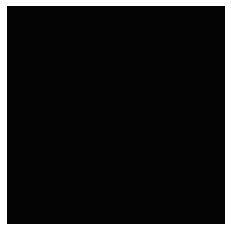

Nexus_Image_Iterator/Spiderplant 2_composite_final_8_90676_resized.png
(129, 130, 144)


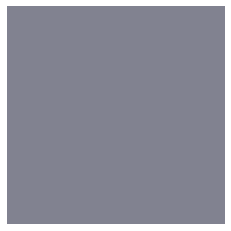

Nexus_Image_Iterator/back_forth_grid_61_resized.png
(4, 4, 4)


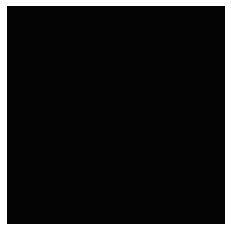

Nexus_Image_Iterator/Nataliia_composite_3.png
(152, 103, 87)


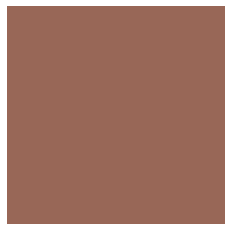

Nexus_Image_Iterator/back_forth_grid_57_.png
(157, 140, 134)


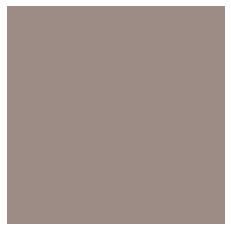

Nexus_Image_Iterator/grid_sprial_test_21_.png
(155, 137, 132)


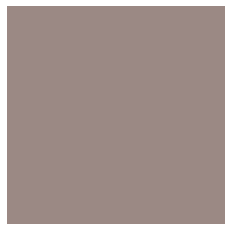

Nexus_Image_Iterator/full_sprial_grids_84_.png
(157, 139, 133)


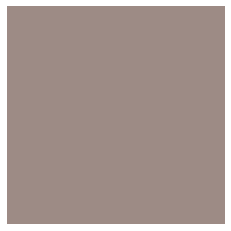

Nexus_Image_Iterator/full_sprial_grids_45_resized.png
(41, 39, 39)


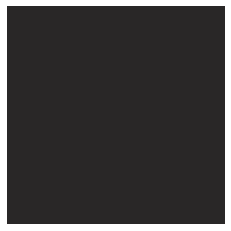

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_93_resized.png
(4, 4, 4)


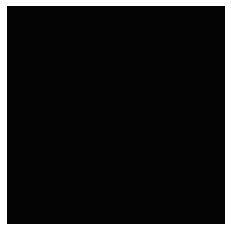

Nexus_Image_Iterator/RainbowSpaceman_composite_2.png
(74, 71, 78)


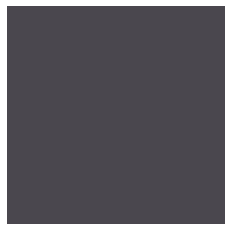

Nexus_Image_Iterator/moving_picture_grid_43_.png
(156, 141, 139)


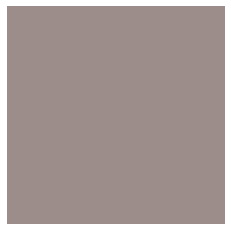

Nexus_Image_Iterator/moving_picture_grid_70_resized.png
(137, 124, 124)


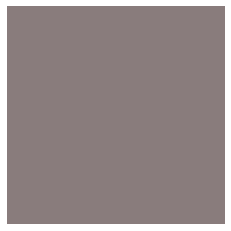

Nexus_Image_Iterator/moving_picture_grid_107_resized.png
(4, 4, 4)


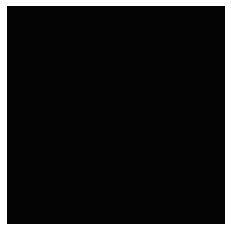

Nexus_Image_Iterator/Cindy_composite_final_8_90.png
(133, 104, 113)


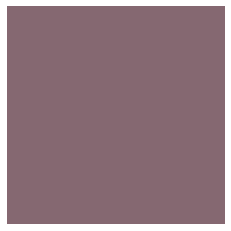

Nexus_Image_Iterator/grid_sprial_test_33_resized.png
(14, 13, 13)


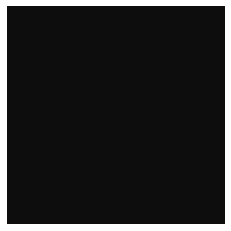

Nexus_Image_Iterator/JR Formanek_composite_final_1_90.png
(154, 105, 101)


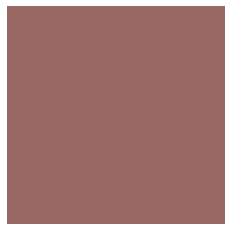

Nexus_Image_Iterator/MC_composite_final_7_90.png
(132, 108, 106)


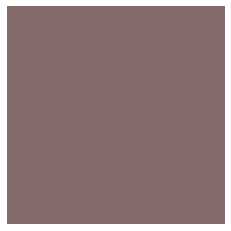

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_4_90.png
(71, 80, 90)


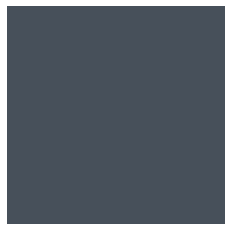

Nexus_Image_Iterator/back_forth_grid_11_resized.png
(4, 4, 4)


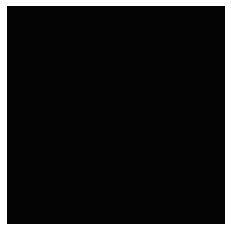

Nexus_Image_Iterator/Dan_composite_final_6_90.png
(154, 135, 142)


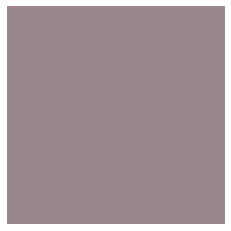

Nexus_Image_Iterator/moving_picture_grid_1_resized.png
(4, 4, 4)


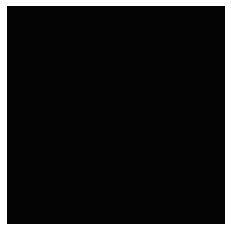

Nexus_Image_Iterator/q329042_composite_final_7_90.png
(109, 111, 106)


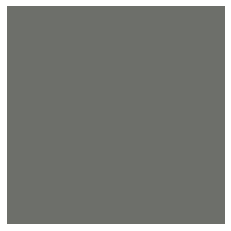

Nexus_Image_Iterator/full_sprial_grids_8_.png
(4, 4, 4)


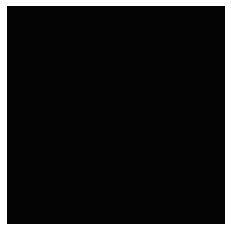

Nexus_Image_Iterator/moving_picture_grid_110_.png
(4, 4, 4)


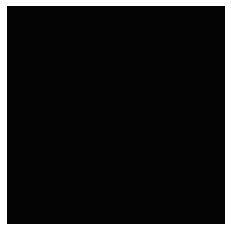

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_72_resized.png
(12, 11, 11)


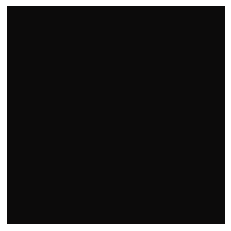

Nexus_Image_Iterator/Jeanfiedo_composite_final_3_90.png
(140, 113, 106)


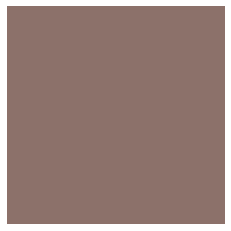

Nexus_Image_Iterator/moving_picture_grid_38_.png
(170, 149, 143)


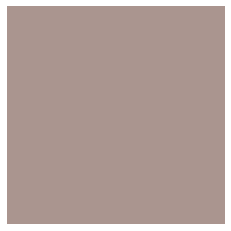

Nexus_Image_Iterator/moving_picture_grid_91_resized.png
(151, 134, 132)


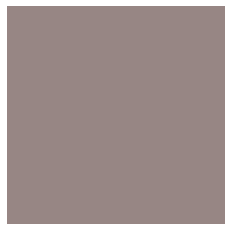

Nexus_Image_Iterator/eisa_composite_final_7_90.png
(122, 111, 114)


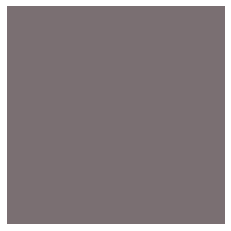

Nexus_Image_Iterator/MC 3_composite_final_9_90.png
(140, 128, 131)


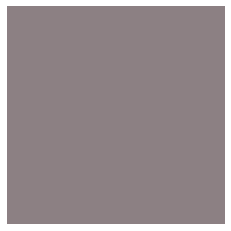

Nexus_Image_Iterator/full_sprial_grids_59_resized.png
(11, 11, 11)


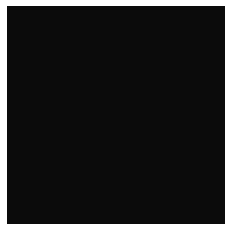

Nexus_Image_Iterator/Spiderplant_composite_final_8_90.png
(153, 128, 130)


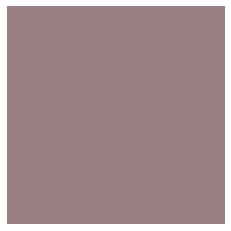

Nexus_Image_Iterator/full_sprial_grids_47_.png
(128, 114, 111)


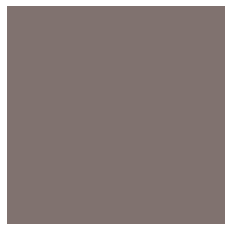

Nexus_Image_Iterator/Victor_composite_final_4_90.png
(132, 78, 69)


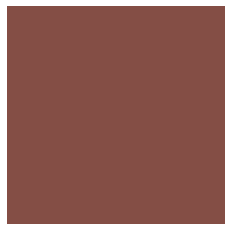

Nexus_Image_Iterator/more_compressedfull_sprial_grids_101_resized.png
(4, 4, 4)


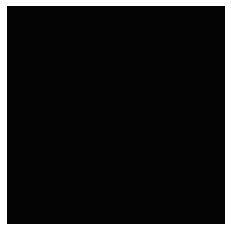

Nexus_Image_Iterator/Jeanfiedo_composite_final_7_90676_resized.png
(131, 110, 109)


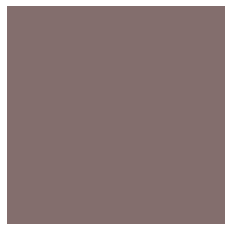

Nexus_Image_Iterator/RainbowSpaceman_composite_3.png
(98, 82, 85)


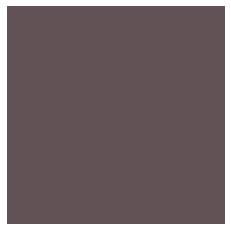

Nexus_Image_Iterator/Spiderplant 2_composite_final_4_90.png676_resized.png
(144, 143, 149)


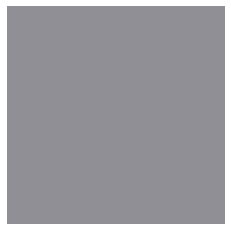

Nexus_Image_Iterator/more_compressedfull_sprial_grids_96_resized.png
(4, 4, 4)


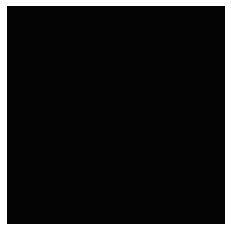

Nexus_Image_Iterator/moving_picture_grid_80_.png
(13, 13, 12)


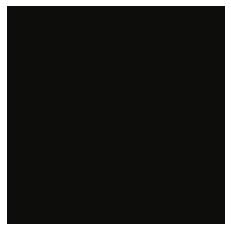

Nexus_Image_Iterator/Nataliia_composite_2.png
(130, 101, 97)


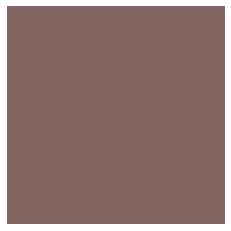

Nexus_Image_Iterator/Kathy_2_composite_final_3_90.png
(120, 118, 95)


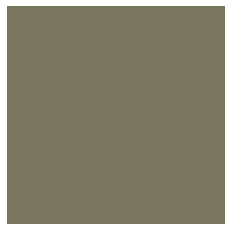

Nexus_Image_Iterator/full_sprial_grids_29_resized.png
(12, 11, 11)


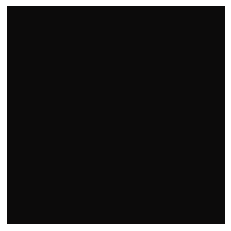

Nexus_Image_Iterator/Nataliia 4_composite_final_3_90.png
(150, 139, 140)


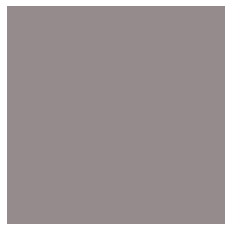

Nexus_Image_Iterator/full_sprial_grids_10_.png
(4, 4, 4)


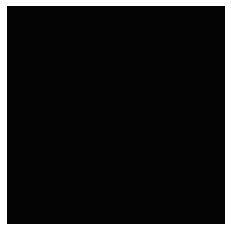

Nexus_Image_Iterator/full_sprial_grids_77_resized.png
(151, 136, 133)


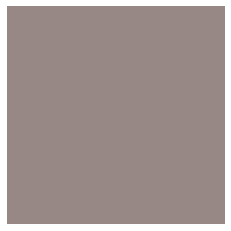

Nexus_Image_Iterator/moving_picture_grid_96_.png
(156, 138, 131)


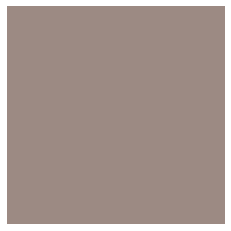

Nexus_Image_Iterator/more_compressedfull_sprial_grids_35_resized.png
(15, 14, 14)


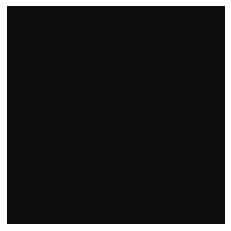

Nexus_Image_Iterator/MC 2_composite_final_1_90.png
(160, 155, 155)


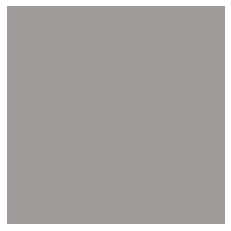

Nexus_Image_Iterator/moving_picture_grid_42_resized.png
(169, 149, 142)


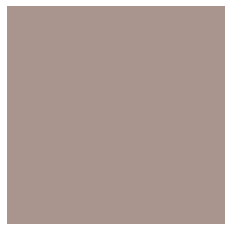

Nexus_Image_Iterator/moving_picture_grid_79_.png
(156, 140, 138)


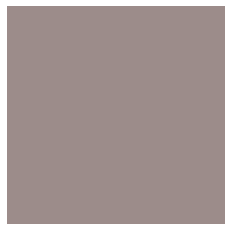

Nexus_Image_Iterator/Spiderplant 4_composite_3.png
(142, 131, 138)


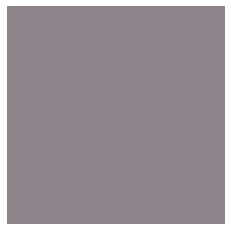

Nexus_Image_Iterator/eisa_composite_3.png
(92, 113, 109)


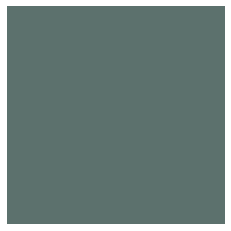

Nexus_Image_Iterator/back_forth_grid_23_resized.png
(151, 134, 132)


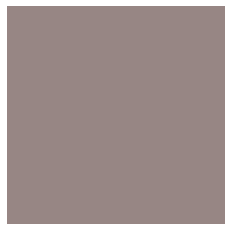

Nexus_Image_Iterator/RainbowSpaceman_composite_final_2_90.png
(98, 82, 87)


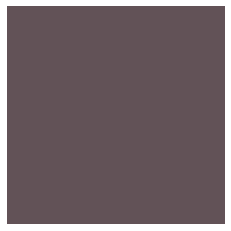

Nexus_Image_Iterator/more_compressedfull_sprial_grids_45_resized.png
(42, 39, 40)


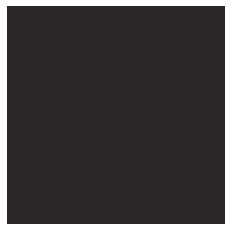

Nexus_Image_Iterator/moving_picture_grid_106_.png
(4, 4, 4)


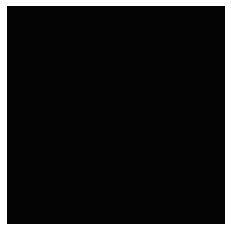

Nexus_Image_Iterator/Jeanfiedo_composite_final_2_90.png676_resized.png
(137, 107, 108)


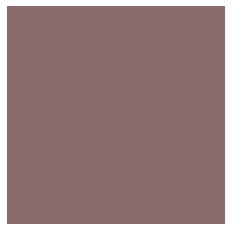

Nexus_Image_Iterator/moving_picture_grid_32_resized.png
(12, 12, 12)


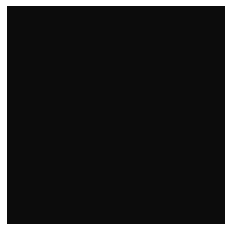

Nexus_Image_Iterator/Jeanfiedo_composite_2.png
(123, 119, 107)


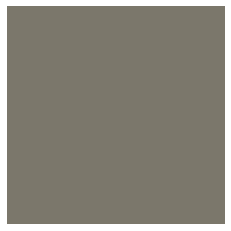

Nexus_Image_Iterator/checkers_test_01_resized.png
(169, 149, 142)


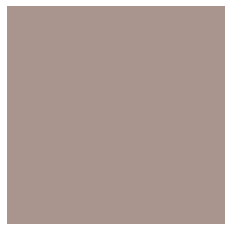

Nexus_Image_Iterator/Victor_composite_final_8_90.png
(175, 73, 70)


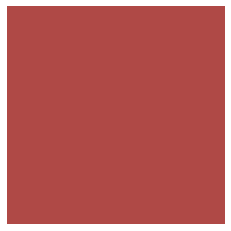

Nexus_Image_Iterator/Sibel_composite_final_0_90.png
(137, 126, 105)


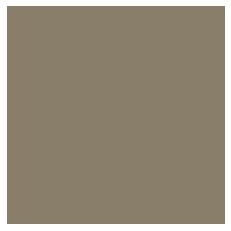

Nexus_Image_Iterator/back_forth_grid_53_resized.png
(151, 135, 130)


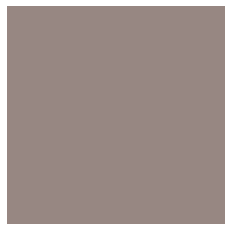

Nexus_Image_Iterator/Spiderplant_composite_final_4_90.png
(142, 145, 148)


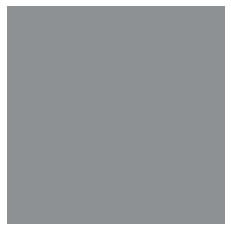

Nexus_Image_Iterator/MC 3_composite_final_5_90.png
(149, 141, 149)


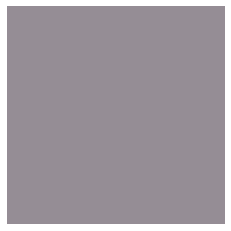

Nexus_Image_Iterator/more_compressedfull_sprial_grids_5_resized.png
(4, 4, 4)


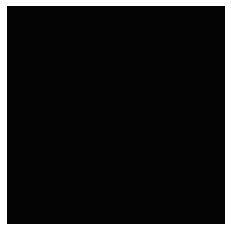

Nexus_Image_Iterator/full_sprial_grids_51_.png
(129, 115, 112)


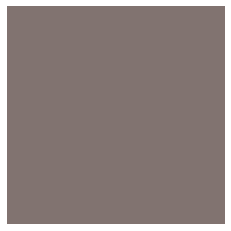

Nexus_Image_Iterator/grid_sprial_test_7_.png
(4, 4, 4)


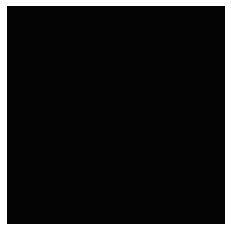

Nexus_Image_Iterator/moving_picture_grid_88_resized.png
(10, 10, 10)


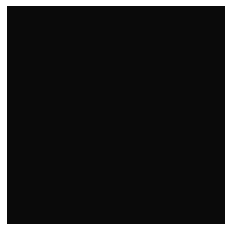

Nexus_Image_Iterator/JR Formanek_composite_final_3_90.png
(168, 150, 146)


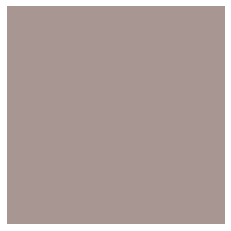

Nexus_Image_Iterator/back_forth_grid_14_resized.png
(4, 4, 4)


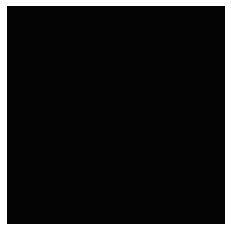

Nexus_Image_Iterator/Jeanfiedo_composite_final_8_90.png676_resized.png
(115, 101, 95)


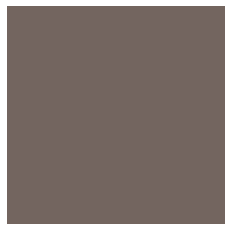

Nexus_Image_Iterator/moving_picture_grid_4_resized.png
(4, 4, 4)


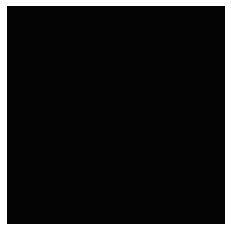

Nexus_Image_Iterator/full_sprial_grids_50_.png
(129, 115, 112)


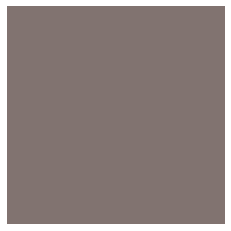

Nexus_Image_Iterator/Nataliia_composite_final_9_90.png
(153, 160, 176)


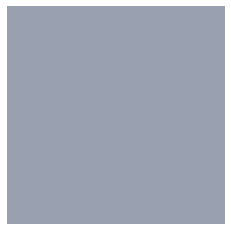

Nexus_Image_Iterator/grid_sprial_test_6_.png
(4, 4, 4)


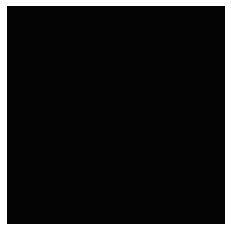

Nexus_Image_Iterator/q329042_composite_final_5_90.png
(90, 87, 82)


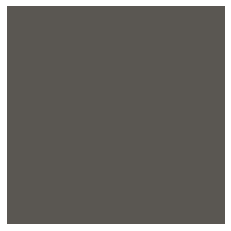

Nexus_Image_Iterator/full_sprial_grids_40_resized.png
(139, 139, 143)


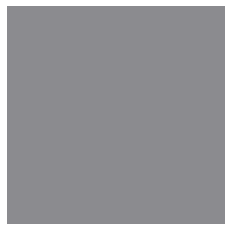

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_96_resized.png
(4, 4, 4)


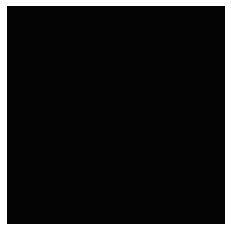

Nexus_Image_Iterator/grid_sprial_test_9_resized.png
(4, 4, 4)


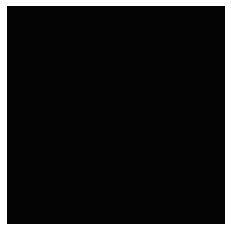

Nexus_Image_Iterator/moving_picture_grid_107_.png
(4, 4, 4)


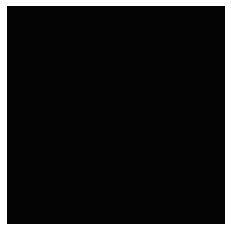

Nexus_Image_Iterator/moving_picture_grid_102_resized.png
(4, 4, 4)


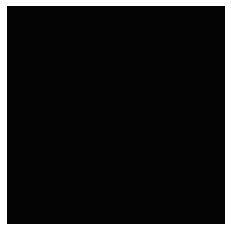

Nexus_Image_Iterator/moving_picture_grid_75_resized.png
(137, 124, 124)


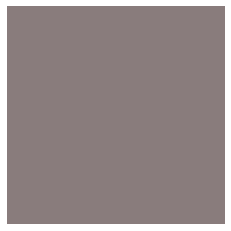

Nexus_Image_Iterator/MC_composite_final_5_90.png
(108, 102, 116)


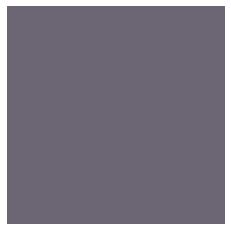

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_6_90.png
(117, 118, 116)


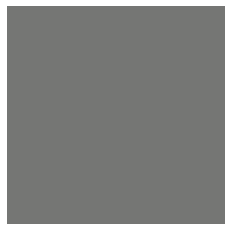

Nexus_Image_Iterator/Dan_composite_final_4_90.png
(154, 128, 119)


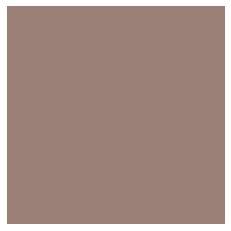

Nexus_Image_Iterator/grid_sprial_test_36_resized.png
(14, 14, 13)


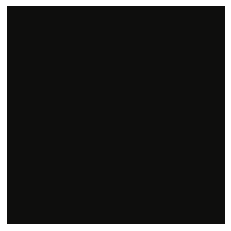

Nexus_Image_Iterator/back_forth_grid_64_resized.png
(4, 4, 4)


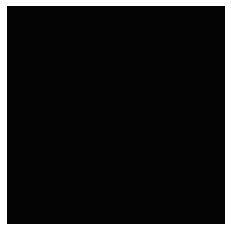

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_2_90.png
(115, 124, 124)


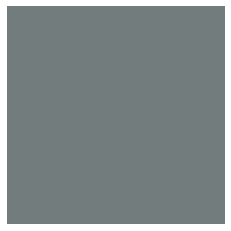

Nexus_Image_Iterator/full_sprial_grids_30_resized.png
(12, 11, 11)


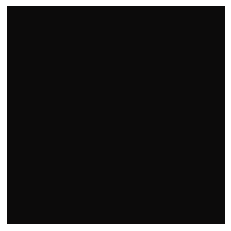

Nexus_Image_Iterator/Actias_composite_2.png
(133, 113, 107)


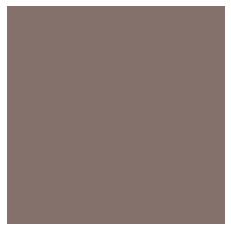

Nexus_Image_Iterator/moving_picture_grid_97_.png
(157, 139, 133)


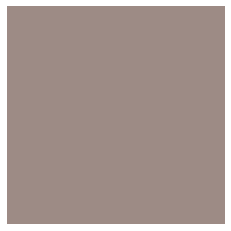

Nexus_Image_Iterator/more_compressedfull_sprial_grids_72_resized.png
(156, 140, 136)


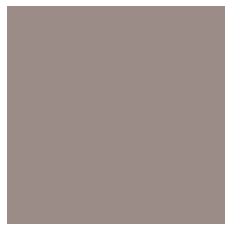

Nexus_Image_Iterator/moving_picture_grid_78_.png
(156, 140, 138)


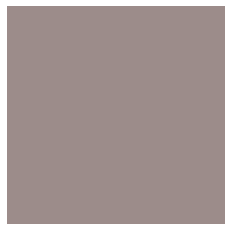

Nexus_Image_Iterator/grid_sprial_test_18_resized.png
(152, 135, 130)


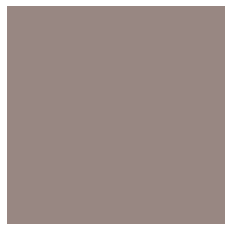

Nexus_Image_Iterator/full_sprial_grids_11_.png
(4, 4, 4)


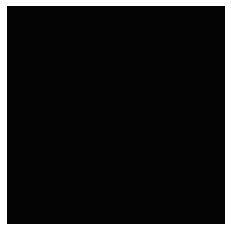

Nexus_Image_Iterator/moving_picture_grid_81_.png
(13, 12, 12)


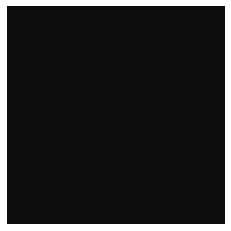

Nexus_Image_Iterator/full_sprial_grids_93_resized.png
(4, 4, 4)


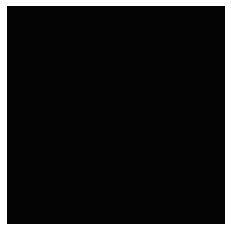

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_45_resized.png
(42, 39, 39)


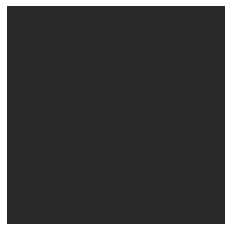

Nexus_Image_Iterator/Spiderplant 4_composite_final_2_90.png
(144, 134, 136)


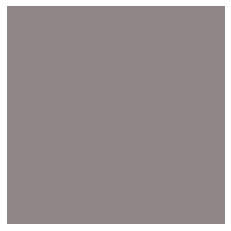

Nexus_Image_Iterator/Nataliia_composite_final_5_90.png
(167, 151, 150)


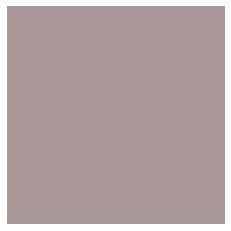

Nexus_Image_Iterator/full_sprial_grids_46_.png
(49, 46, 47)


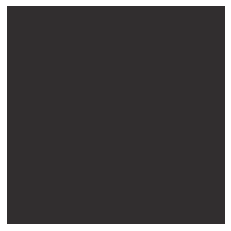

Nexus_Image_Iterator/Cindy_composite_final_6_90.png
(136, 120, 122)


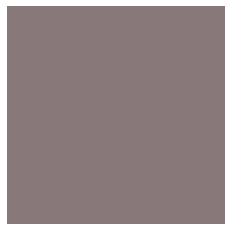

Nexus_Image_Iterator/full_sprial_grids_9_.png
(4, 4, 4)


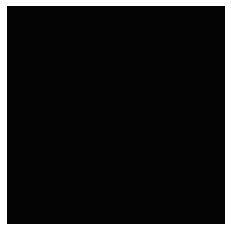

Nexus_Image_Iterator/Dan_composite_final_8_90.png
(108, 89, 94)


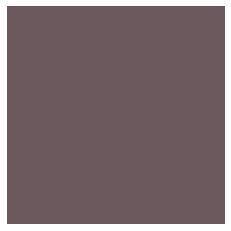

Nexus_Image_Iterator/moving_picture_grid_111_.png
(4, 4, 4)


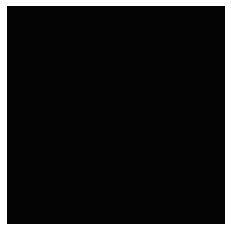

Nexus_Image_Iterator/MC_composite_final_9_90.png
(136, 108, 106)


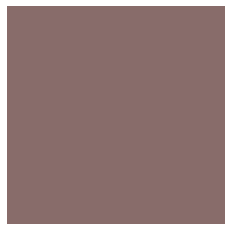

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_35_resized.png
(152, 138, 137)


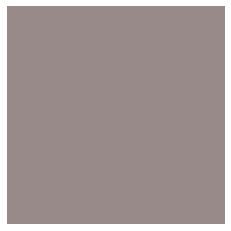

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_9_resized.png
(4, 4, 4)


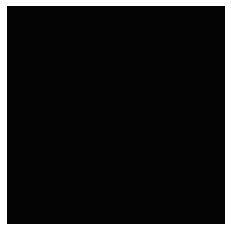

Nexus_Image_Iterator/q329042_composite_final_9_90.png
(97, 84, 77)


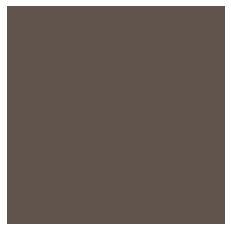

Nexus_Image_Iterator/moving_picture_grid_39_.png
(156, 141, 139)


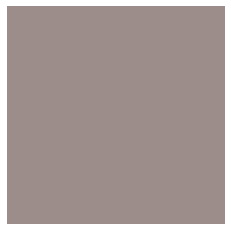

Nexus_Image_Iterator/blank_test_01_resized.png
(4, 4, 4)


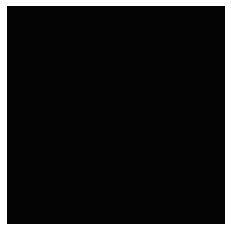

Nexus_Image_Iterator/back_forth_grid_56_resized.png
(153, 137, 132)


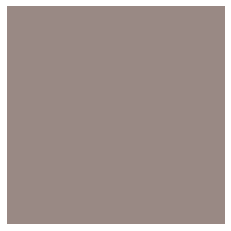

Nexus_Image_Iterator/more_compressedfull_sprial_grids_0_resized.png
(4, 4, 4)


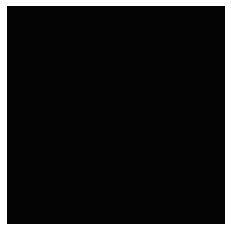

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_29_resized.png
(12, 11, 11)


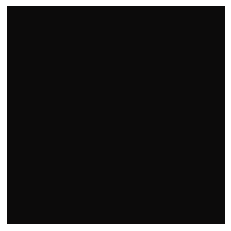

Nexus_Image_Iterator/MC 3_composite_final_7_90.png
(182, 171, 167)


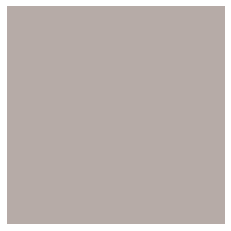

Nexus_Image_Iterator/eisa_composite_final_9_90.png
(116, 102, 103)


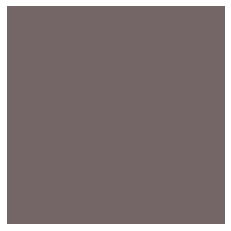

Nexus_Image_Iterator/moving_picture_grid_42_.png
(170, 149, 143)


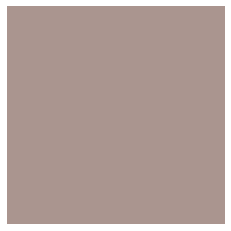

Nexus_Image_Iterator/more_compressedfull_sprial_grids_40_resized.png
(139, 138, 143)


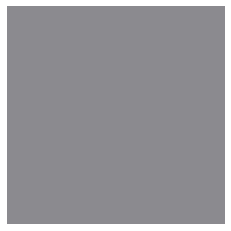

Nexus_Image_Iterator/Sibel_composite_final_2_90.png
(145, 113, 97)


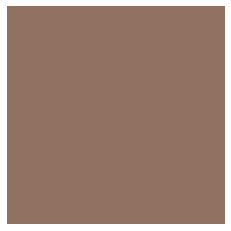

Nexus_Image_Iterator/moving_picture_grid_37_resized.png
(14, 14, 13)


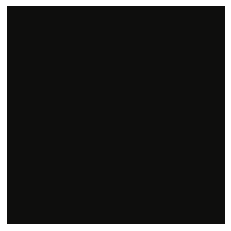

Nexus_Image_Iterator/Spiderplant_composite_final_6_90.png
(116, 115, 110)


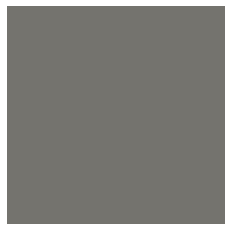

Nexus_Image_Iterator/MC 2_composite_final_3_90.png
(149, 118, 118)


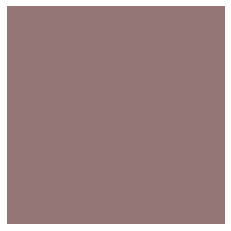

Nexus_Image_Iterator/back_forth_grid_4_.png
(4, 4, 4)


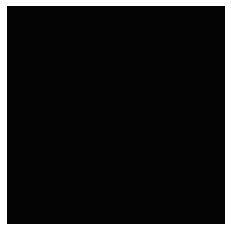

Nexus_Image_Iterator/back_forth_grid_26_resized.png
(10, 10, 10)


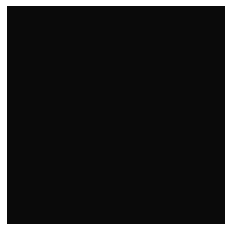

Nexus_Image_Iterator/back_forth_grid_56_.png
(157, 139, 133)


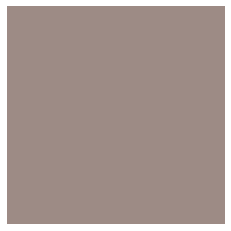

Nexus_Image_Iterator/grid_sprial_test_20_.png
(155, 137, 132)


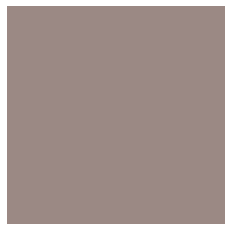

Nexus_Image_Iterator/full_sprial_grids_85_.png
(157, 140, 134)


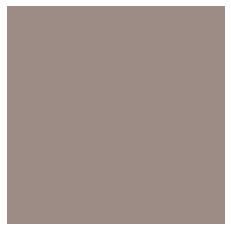

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_59_resized.png
(11, 11, 11)


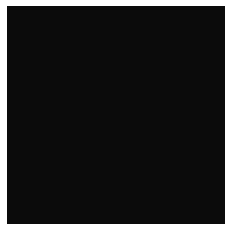

Nexus_Image_Iterator/full_sprial_grids_72_resized.png
(12, 11, 11)


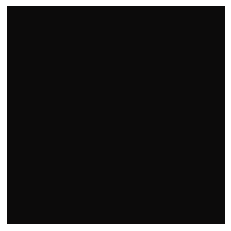

Nexus_Image_Iterator/RainbowSpaceman_composite_final_0_90.png
(98, 55, 52)


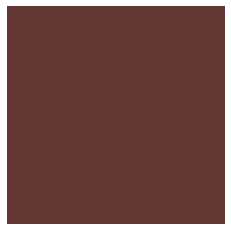

Nexus_Image_Iterator/moving_picture_grid_15_.png
(4, 4, 4)


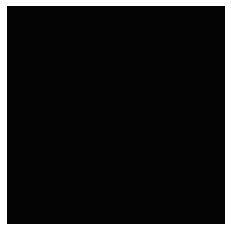

Nexus_Image_Iterator/more_compressedfull_sprial_grids_30_resized.png
(14, 13, 13)


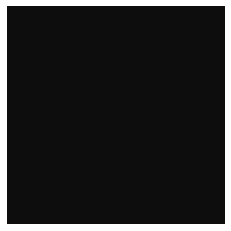

Nexus_Image_Iterator/moving_picture_grid_47_resized.png
(164, 146, 142)


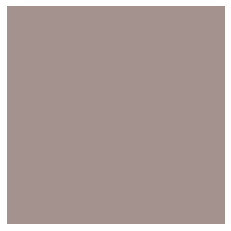

Nexus_Image_Iterator/moving_picture_grid_8_.png
(4, 4, 4)


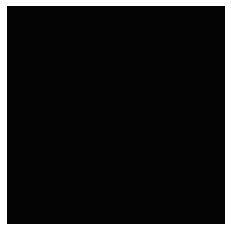

Nexus_Image_Iterator/Jeanfiedo_composite_final_3_90676_resized.png
(140, 113, 107)


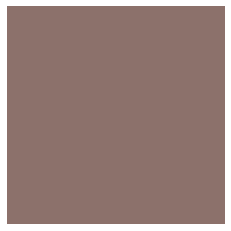

Nexus_Image_Iterator/moving_picture_grid_19_resized.png
(152, 135, 130)


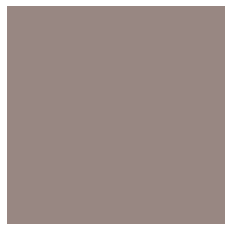

Nexus_Image_Iterator/Kathy_2_composite_final_1_90.png
(149, 117, 80)


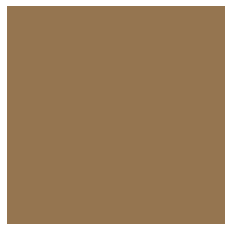

Nexus_Image_Iterator/full_sprial_grids_93_.png
(4, 4, 4)


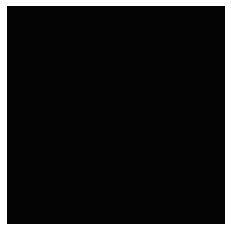

Nexus_Image_Iterator/grid_sprial_test_36_.png
(156, 140, 138)


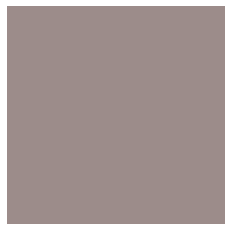

Nexus_Image_Iterator/back_forth_grid_40_.png
(13, 12, 12)


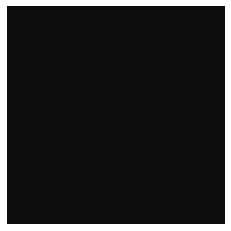

Nexus_Image_Iterator/Actias_composite_3.png
(147, 107, 103)


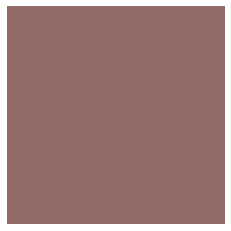

Nexus_Image_Iterator/more_compressedfull_sprial_grids_93_resized.png
(4, 4, 4)


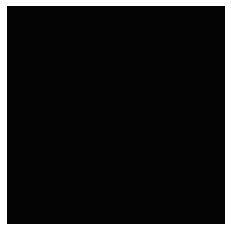

Nexus_Image_Iterator/Nataliia 4_composite_final_1_90.png
(148, 137, 141)


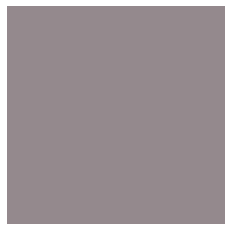

Nexus_Image_Iterator/moving_picture_grid_69_resized.png
(137, 124, 124)


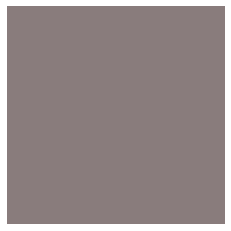

Nexus_Image_Iterator/back_forth_grid_17_.png
(157, 139, 133)


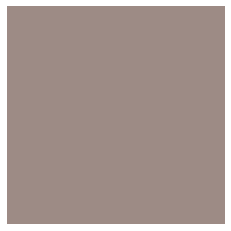

Nexus_Image_Iterator/Jeanfiedo_composite_final_1_90.png
(153, 120, 120)


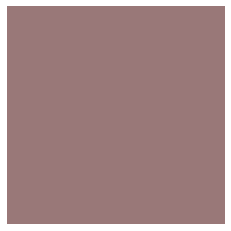

Nexus_Image_Iterator/back_forth_grid_8_resized.png
(4, 4, 4)


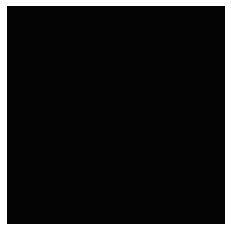

Nexus_Image_Iterator/moving_picture_grid_54_.png
(170, 149, 143)


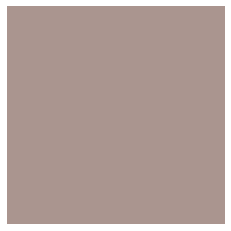

Nexus_Image_Iterator/Victor_composite_final_6_90.png
(113, 97, 80)


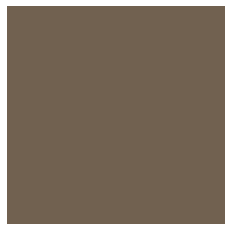

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_77_resized.png
(151, 136, 133)


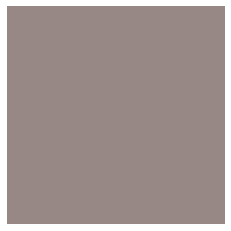

Nexus_Image_Iterator/eisa_composite_final_5_90.png
(122, 101, 78)


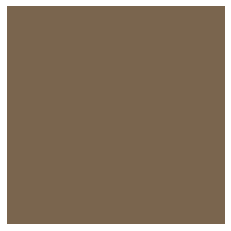

Nexus_Image_Iterator/more_compressedall_test_01_.png
(136, 124, 124)


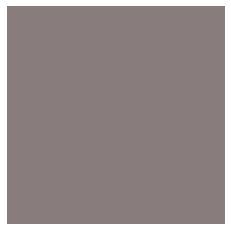

Nexus_Image_Iterator/moving_picture_grid_94_resized.png
(151, 135, 130)


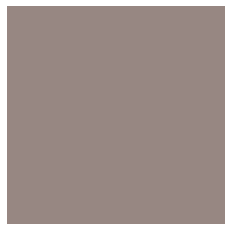

Nexus_Image_Iterator/full_sprial_grids_7_resized.png
(4, 4, 4)


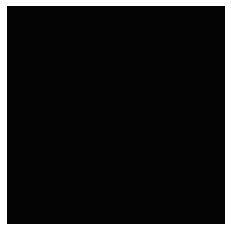

Nexus_Image_Iterator/monsteroflove_composite_final_3_90.png
(174, 113, 97)


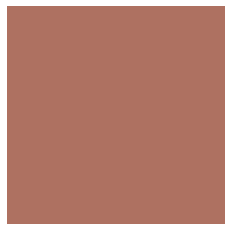

Nexus_Image_Iterator/Spiderplant 2_composite_final_5_90.png
(176, 148, 148)


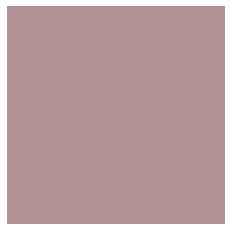

Nexus_Image_Iterator/moving_picture_grid_23_.png
(155, 137, 132)


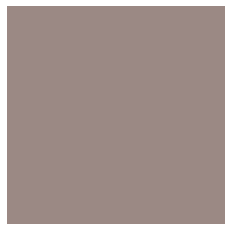

Nexus_Image_Iterator/full_sprial_grids_39_resized.png
(156, 141, 139)


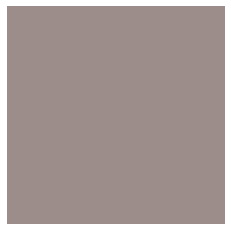

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_12_resized.png
(4, 4, 4)


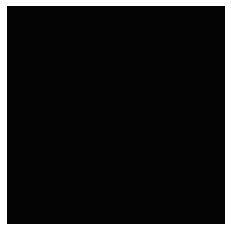

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_9_90.png
(62, 65, 69)


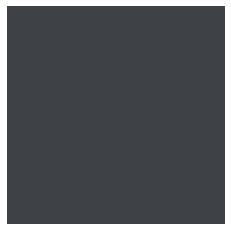

Nexus_Image_Iterator/grid_sprial_test_16_.png
(157, 140, 134)


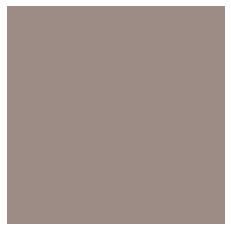

Nexus_Image_Iterator/more_compressedfull_sprial_grids_86_resized.png
(4, 4, 4)


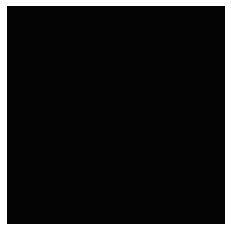

Nexus_Image_Iterator/back_forth_grid_60_.png
(4, 4, 4)


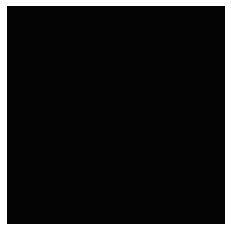

Nexus_Image_Iterator/John_composite_final_2_90.png
(128, 121, 113)


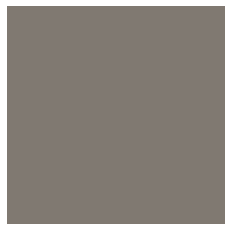

Nexus_Image_Iterator/Spiderplant 4_composite_4.png
(145, 123, 124)


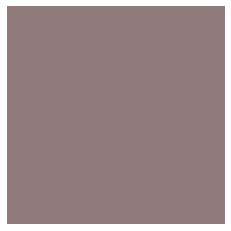

Nexus_Image_Iterator/eisa_composite_4.png
(122, 115, 111)


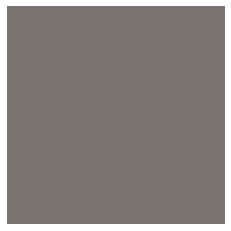

Nexus_Image_Iterator/Spiderplant3_composite_final_0_90.png
(149, 141, 141)


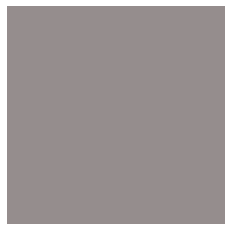

Nexus_Image_Iterator/Prianna _composite_final_1_90.png
(152, 115, 111)


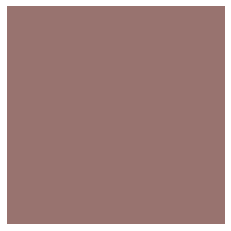

Nexus_Image_Iterator/moving_picture_grid_74_.png
(136, 124, 124)


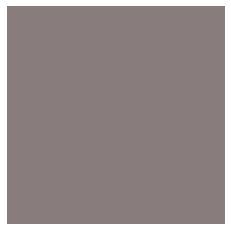

Nexus_Image_Iterator/grid_sprial_test_0_resized.png
(4, 4, 4)


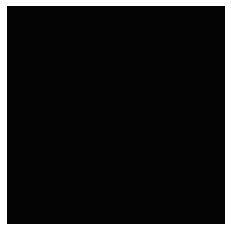

Nexus_Image_Iterator/full_sprial_grids_49_resized.png
(129, 115, 112)


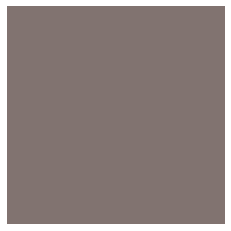

Nexus_Image_Iterator/Rondo_composite_final_4_90.png
(119, 115, 112)


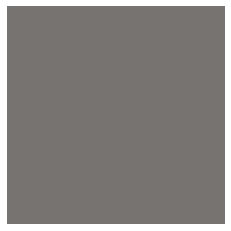

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_62_resized.png
(155, 141, 139)


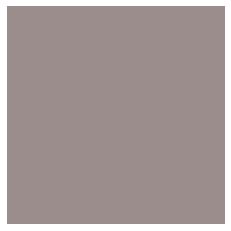

Nexus_Image_Iterator/back_forth_grid_37_.png
(156, 140, 138)


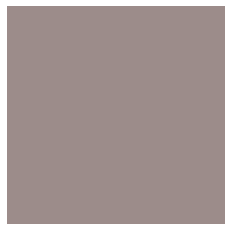

Nexus_Image_Iterator/i_love_chai_composite_final_4_90.png
(99, 100, 115)


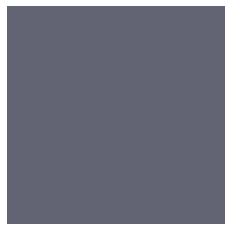

Nexus_Image_Iterator/Actias_composite_1.png
(168, 152, 138)


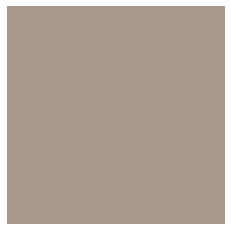

Nexus_Image_Iterator/moving_picture_grid_81_resized.png
(14, 13, 13)


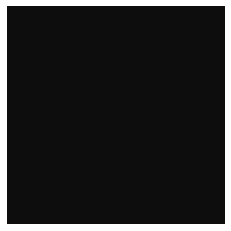

Nexus_Image_Iterator/Spiderplant 2_composite_final_6_90.png676_resized.png
(124, 124, 121)


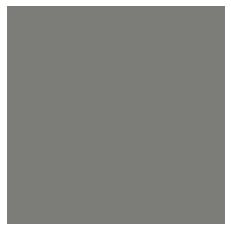

Nexus_Image_Iterator/Soul vision_composite_final_6_90.png
(37, 26, 22)


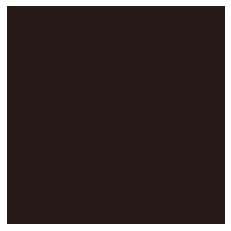

Nexus_Image_Iterator/back_forth_grid_43_resized.png
(12, 11, 11)


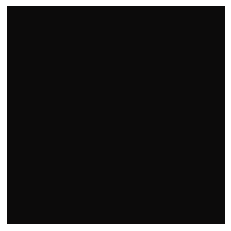

Nexus_Image_Iterator/Kathy_composite_final_6_90.png
(143, 130, 112)


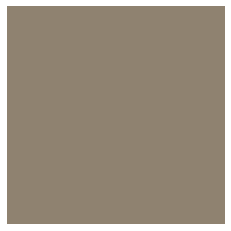

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_0_resized.png
(4, 4, 4)


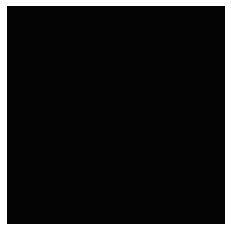

Nexus_Image_Iterator/moving_picture_grid_62_.png
(136, 124, 124)


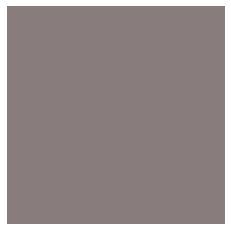

Nexus_Image_Iterator/Sloth Vibes_composite_final_3_90.png
(155, 139, 149)


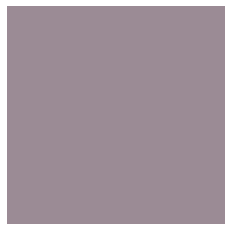

Nexus_Image_Iterator/more_compressedfull_sprial_grids_55_resized.png
(49, 46, 46)


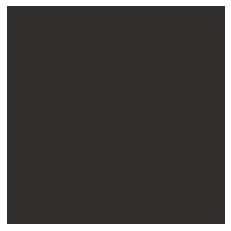

Nexus_Image_Iterator/back_forth_grid_21_.png
(155, 137, 132)


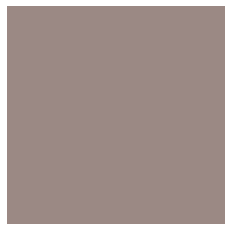

Nexus_Image_Iterator/full_sprial_grids_17_resized.png
(153, 137, 132)


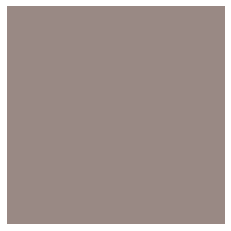

Nexus_Image_Iterator/i_love_chai_composite_final_8_90.png
(152, 114, 105)


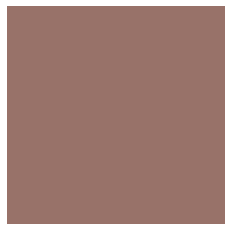

Nexus_Image_Iterator/Spiderplant 2_composite_final_9_90676_resized.png
(166, 124, 115)


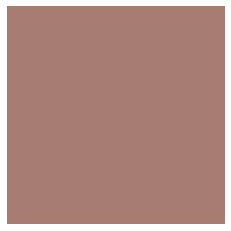

Nexus_Image_Iterator/Rondo_composite_final_8_90.png
(90, 77, 69)


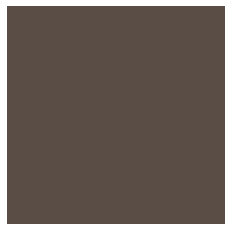

Nexus_Image_Iterator/moving_picture_grid_22_resized.png
(151, 135, 131)


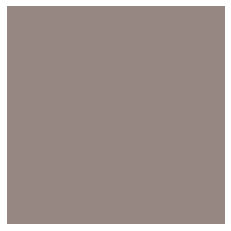

Nexus_Image_Iterator/back_forth_grid_33_resized.png
(14, 13, 13)


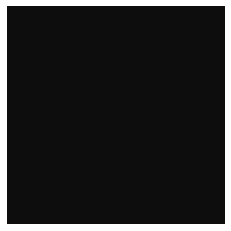

Nexus_Image_Iterator/Spiderplant 2_composite_final_9_90.png
(162, 125, 123)


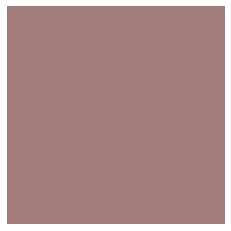

Nexus_Image_Iterator/full_sprial_grids_5_.png
(4, 4, 4)


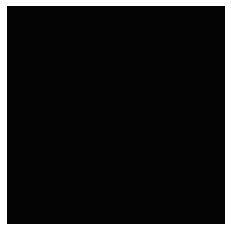

Nexus_Image_Iterator/moving_picture_grid_35_.png
(13, 13, 12)


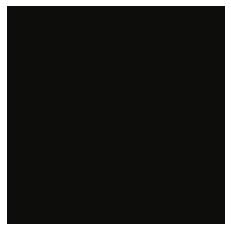

Nexus_Image_Iterator/Nataliia3_composite_final_6_90.png
(157, 152, 154)


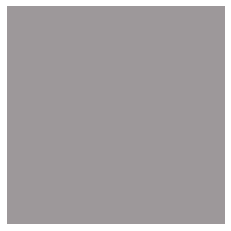

Nexus_Image_Iterator/RainbowSpaceman_composite_4.png
(99, 100, 111)


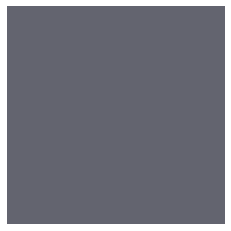

Nexus_Image_Iterator/more_compressedfull_sprial_grids_25_resized.png
(155, 138, 134)


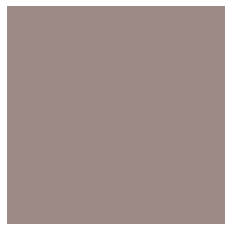

Nexus_Image_Iterator/Quinn_test_2_composite_final_1_90.png
(101, 110, 112)


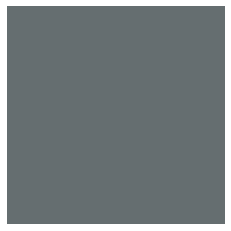

Nexus_Image_Iterator/Jeanfiedo_composite_final_0_90.png676_resized.png
(142, 107, 100)


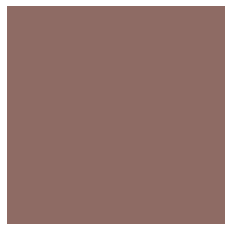

Nexus_Image_Iterator/full_sprial_grids_67_resized.png
(14, 13, 13)


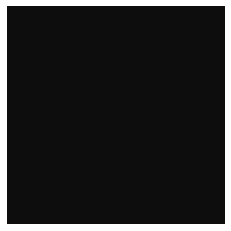

Nexus_Image_Iterator/Kasey Edgerton_composite_final_1_90.png
(143, 133, 134)


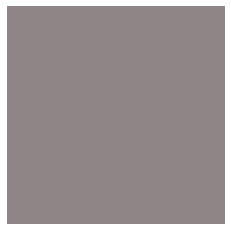

Nexus_Image_Iterator/grid_sprial_test_11_resized.png
(4, 4, 4)


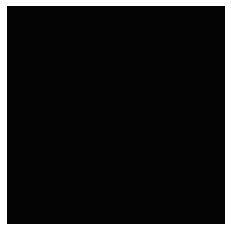

Nexus_Image_Iterator/moving_picture_grid_52_resized.png
(169, 149, 142)


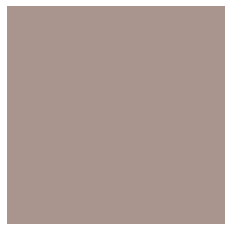

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_5_90.png
(148, 145, 147)


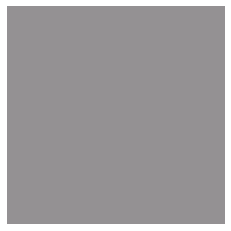

Nexus_Image_Iterator/Nataliia 2_composite_final_6_90.png
(136, 137, 155)


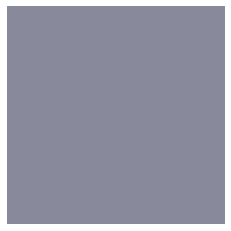

Nexus_Image_Iterator/more_compressedfull_sprial_grids_39_resized.png
(155, 141, 139)


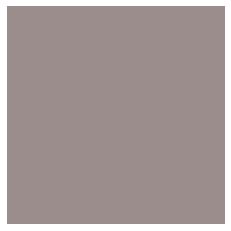

Nexus_Image_Iterator/Actias_composite_final_5_90.png
(176, 149, 143)


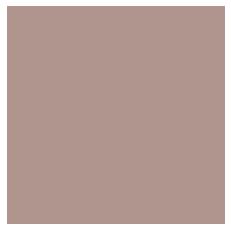

Nexus_Image_Iterator/Jeanfiedo_composite_final_6_90676_resized.png
(122, 114, 105)


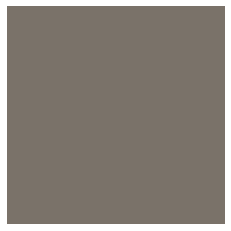

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_50_resized.png
(129, 115, 113)


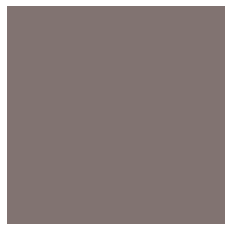

Nexus_Image_Iterator/full_sprial_grids_86_resized.png
(4, 4, 4)


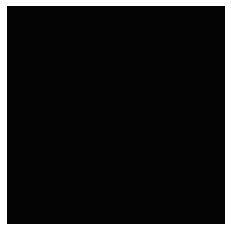

Nexus_Image_Iterator/full_sprial_grids_31_.png
(13, 12, 12)


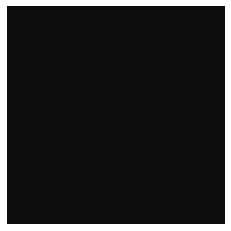

Nexus_Image_Iterator/MC 4_composite_final_8_90.png
(162, 138, 138)


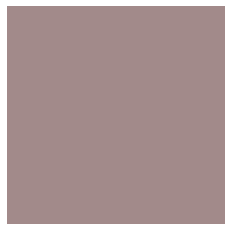

Nexus_Image_Iterator/moving_picture_grid_19_.png
(156, 138, 131)


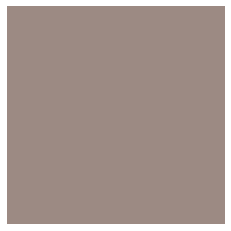

Nexus_Image_Iterator/more_compressedfull_sprial_grids_49_resized.png
(127, 113, 109)


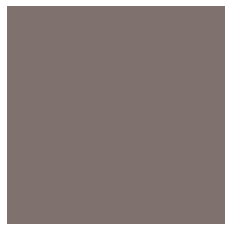

Nexus_Image_Iterator/Nataliia_composite_4.png
(174, 145, 131)


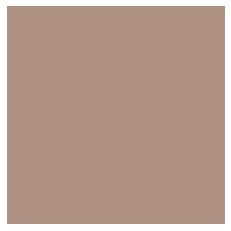

Nexus_Image_Iterator/moving_picture_grid_4_.png
(4, 4, 4)


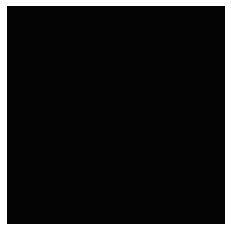

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_20_resized.png
(151, 135, 130)


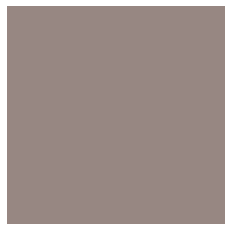

Nexus_Image_Iterator/back_forth_grid_8_.png
(4, 4, 4)


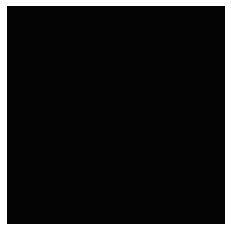

Nexus_Image_Iterator/full_sprial_grids_66_.png
(156, 140, 138)


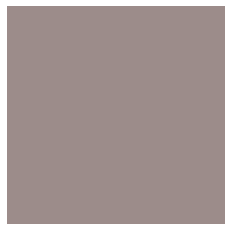

Nexus_Image_Iterator/more_compressedfull_sprial_grids_9_resized.png
(4, 4, 4)


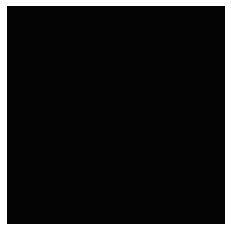

Nexus_Image_Iterator/Mika_composite_final_7_90.png
(112, 91, 83)


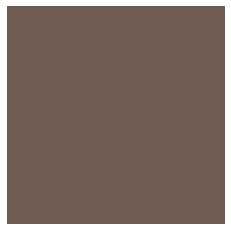

Nexus_Image_Iterator/full_sprial_grids_89_.png
(4, 4, 4)


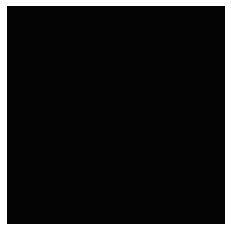

Nexus_Image_Iterator/back_forth_grid_1_resized.png
(4, 4, 4)


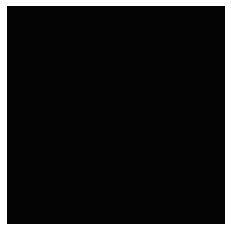

Nexus_Image_Iterator/full_sprial_grids_70_.png
(13, 12, 12)


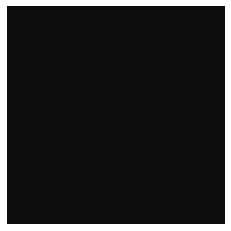

Nexus_Image_Iterator/more_compressedfull_sprial_grids_17_resized.png
(153, 137, 132)


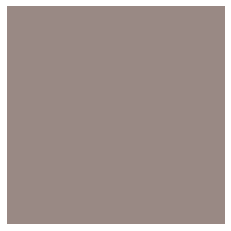

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_83_resized.png
(152, 135, 130)


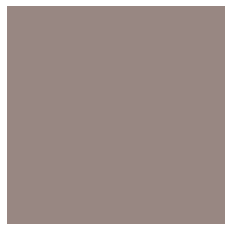

Nexus_Image_Iterator/full_sprial_grids_55_resized.png
(49, 46, 46)


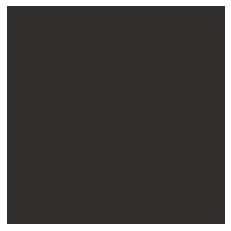

Nexus_Image_Iterator/grid_sprial_test_23_resized.png
(151, 134, 132)


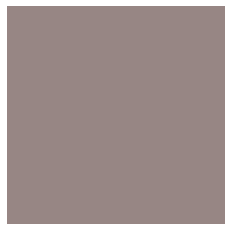

Nexus_Image_Iterator/donya_composite_final_7_90.png
(140, 139, 156)


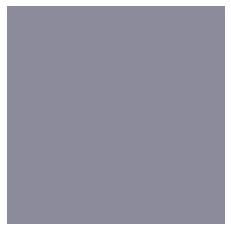

Nexus_Image_Iterator/moving_picture_grid_60_resized.png
(137, 124, 124)


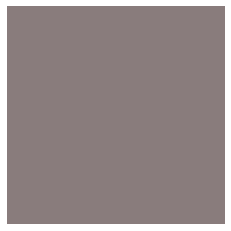

Nexus_Image_Iterator/Actias_composite_final_9_90.png
(179, 154, 147)


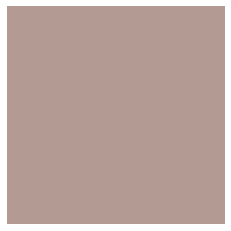

Nexus_Image_Iterator/back_forth_grid_71_resized.png
(4, 4, 4)


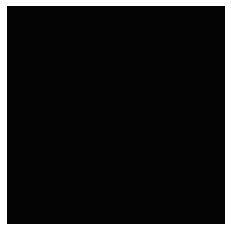

Nexus_Image_Iterator/moving_picture_grid_58_.png
(136, 124, 124)


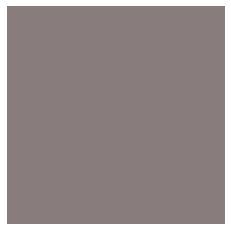

Nexus_Image_Iterator/Jeanfiedo_composite_4.png
(110, 96, 96)


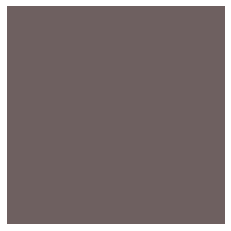

Nexus_Image_Iterator/Baffin_composite_final_2_90.png
(120, 111, 114)


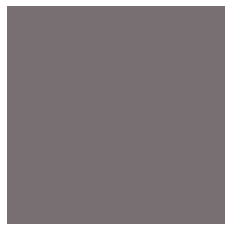

Nexus_Image_Iterator/more_compressedfull_sprial_grids_67_resized.png
(15, 14, 14)


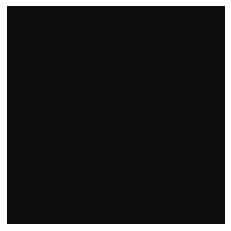

Nexus_Image_Iterator/MC 4_composite_final_4_90.png
(157, 147, 147)


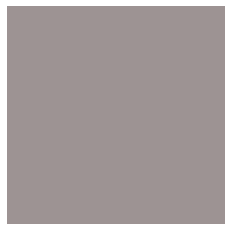

Nexus_Image_Iterator/full_sprial_grids_27_.png
(156, 139, 136)


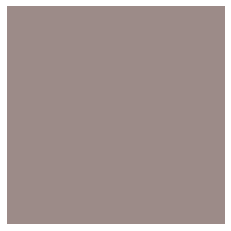

Nexus_Image_Iterator/full_sprial_grids_25_resized.png
(151, 135, 133)


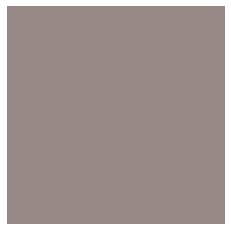

Nexus_Image_Iterator/full_sprial_grids_101_resized.png
(4, 4, 4)


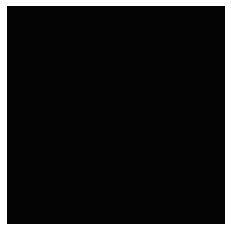

Nexus_Image_Iterator/moving_picture_grid_10_resized.png
(4, 4, 4)


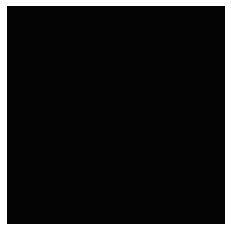

Nexus_Image_Iterator/grid_sprial_test_20_resized.png
(151, 135, 130)


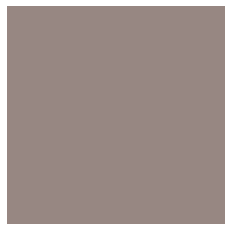

Nexus_Image_Iterator/Nataliia 4_composite_final_5_90.png
(141, 130, 132)


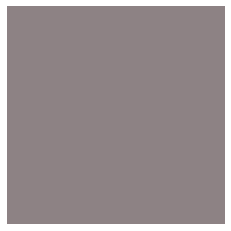

Nexus_Image_Iterator/moving_picture_grid_114_resized.png
(4, 4, 4)


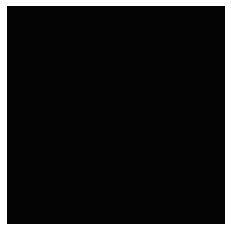

Nexus_Image_Iterator/moving_picture_grid_63_resized.png
(137, 124, 124)


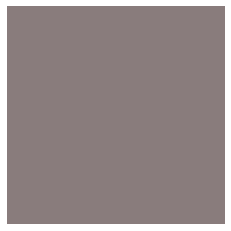

Nexus_Image_Iterator/moving_picture_grid_53_.png
(156, 141, 139)


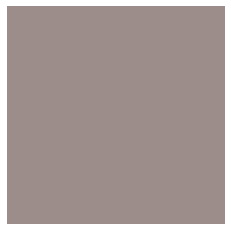

Nexus_Image_Iterator/more_compressedfull_sprial_grids_14_resized.png
(4, 4, 4)


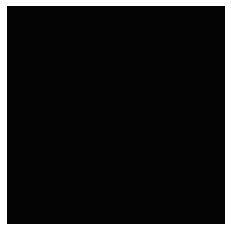

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_80_resized.png
(151, 135, 131)


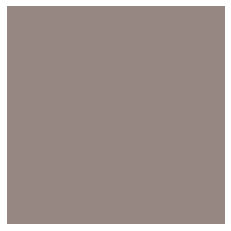

Nexus_Image_Iterator/full_sprial_grids_56_resized.png
(41, 39, 39)


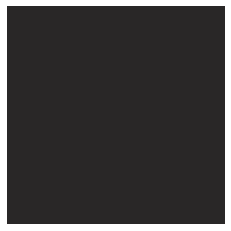

Nexus_Image_Iterator/RainbowSpaceman_composite_final_8_90.png
(126, 81, 82)


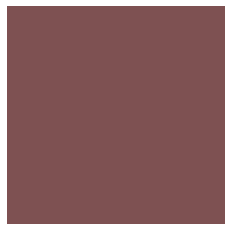

Nexus_Image_Iterator/donya_composite_1.png
(158, 142, 133)


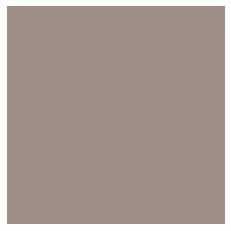

Nexus_Image_Iterator/back_forth_grid_2_resized.png
(4, 4, 4)


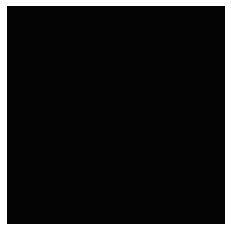

Nexus_Image_Iterator/Kathy_2_composite_final_5_90.png
(148, 122, 99)


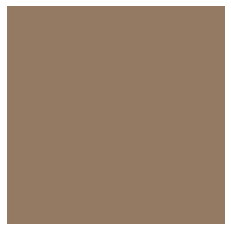

Nexus_Image_Iterator/Prianna _composite_1.png
(175, 154, 154)


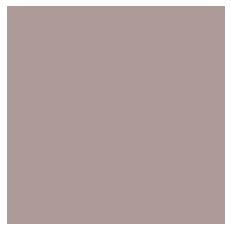

Nexus_Image_Iterator/back_forth_grid_10_.png
(4, 4, 4)


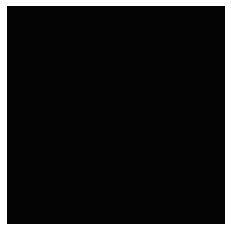

Nexus_Image_Iterator/Victor_composite_final_2_90.png
(124, 97, 88)


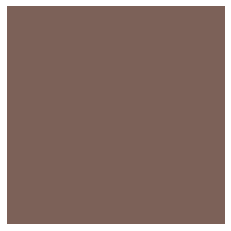

Nexus_Image_Iterator/moving_picture_grid_13_resized.png
(4, 4, 4)


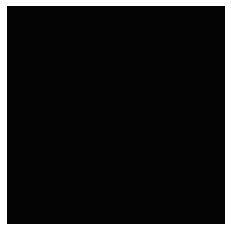

Nexus_Image_Iterator/eisa_composite_final_1_90.png
(103, 85, 80)


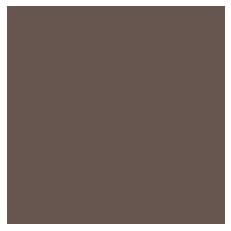

Nexus_Image_Iterator/more_compressedfull_sprial_grids_64_resized.png
(15, 14, 14)


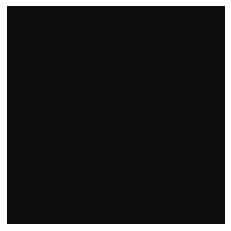

Nexus_Image_Iterator/full_sprial_grids_26_resized.png
(10, 10, 10)


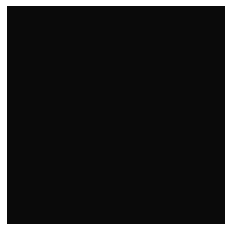

Nexus_Image_Iterator/more_compressedfull_sprial_grids_99_resized.png
(4, 4, 4)


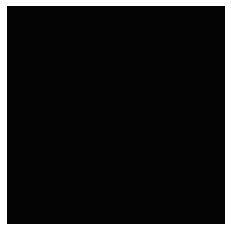

Nexus_Image_Iterator/i_love_chai_composite_1.png
(99, 112, 127)


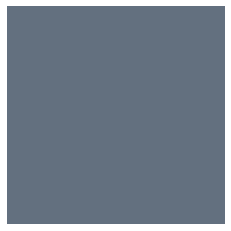

Nexus_Image_Iterator/grid_sprial_test_31_.png
(13, 12, 12)


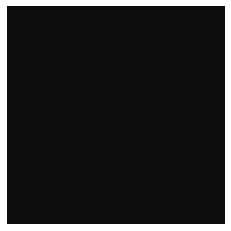

Nexus_Image_Iterator/back_forth_grid_47_.png
(155, 139, 134)


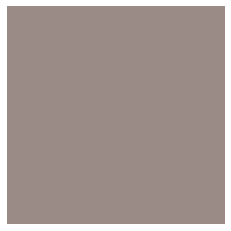

Nexus_Image_Iterator/back_forth_grid_72_resized.png
(4, 4, 4)


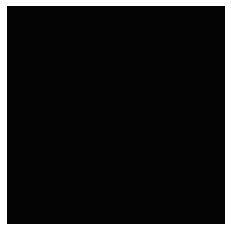

Nexus_Image_Iterator/Jeanfiedo_composite_final_5_90.png
(135, 110, 105)


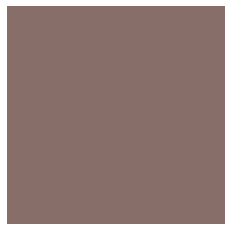

Nexus_Image_Iterator/full_sprial_grids_94_.png
(4, 4, 4)


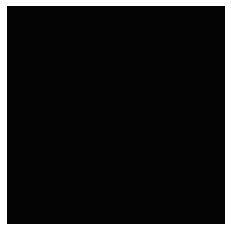

Nexus_Image_Iterator/MC 3_composite_final_3_90.png
(164, 144, 142)


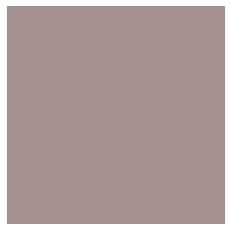

Nexus_Image_Iterator/Cindy_composite_2.png
(110, 90, 96)


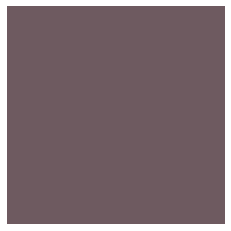

Nexus_Image_Iterator/moving_picture_grid_12_.png
(4, 4, 4)


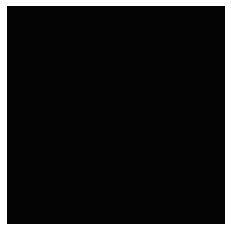

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_53_resized.png
(127, 113, 109)


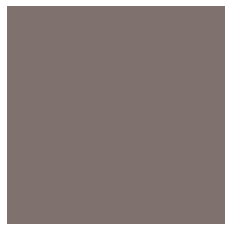

Nexus_Image_Iterator/Sibel_composite_final_6_90.png
(174, 150, 138)


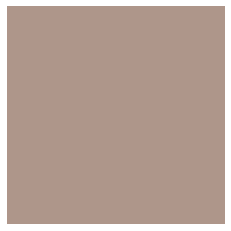

Nexus_Image_Iterator/full_sprial_grids_85_resized.png
(153, 137, 133)


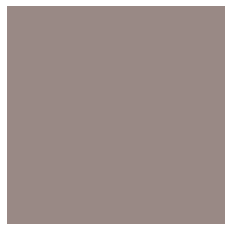

Nexus_Image_Iterator/Spiderplant_composite_final_2_90.png
(133, 137, 146)


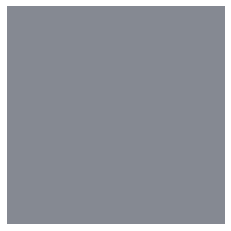

Nexus_Image_Iterator/back_forth_grid_3_.png
(4, 4, 4)


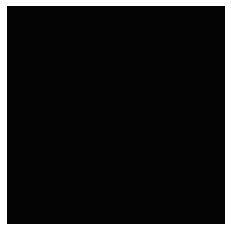

Nexus_Image_Iterator/Jeanfiedo_composite_final_9_90.png
(116, 99, 96)


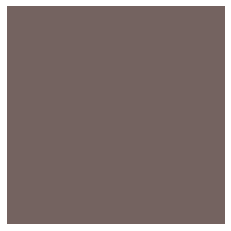

Nexus_Image_Iterator/full_sprial_grids_78_resized.png
(151, 134, 132)


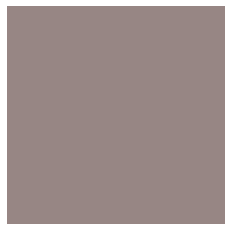

Nexus_Image_Iterator/full_sprial_grids_82_.png
(156, 138, 132)


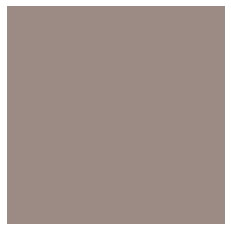

Nexus_Image_Iterator/back_forth_grid_51_.png
(155, 137, 132)


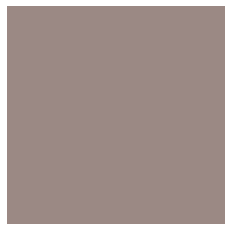

Nexus_Image_Iterator/grid_sprial_test_27_.png
(156, 139, 136)


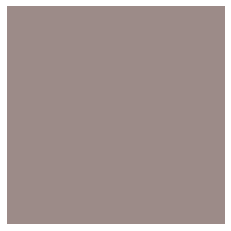

Nexus_Image_Iterator/moving_picture_grid_45_.png
(156, 141, 139)


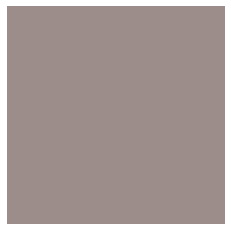

Nexus_Image_Iterator/RainbowSpaceman_composite_final_4_90.png
(52, 54, 60)


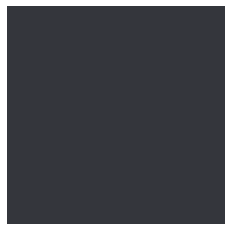

Nexus_Image_Iterator/Spiderplant 2_composite_3.png
(127, 138, 151)


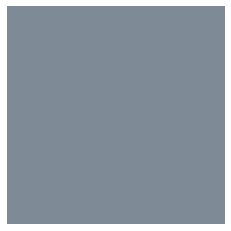

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_23_resized.png
(151, 134, 132)


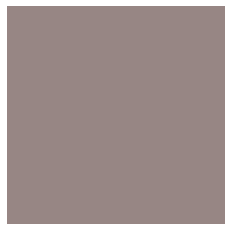

Nexus_Image_Iterator/Nataliia 4_composite_final_9_90.png
(158, 155, 160)


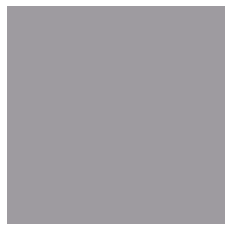

Nexus_Image_Iterator/MC 2_composite_final_7_90.png
(166, 150, 142)


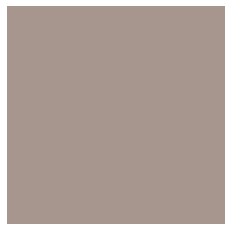

Nexus_Image_Iterator/Kathy_2_composite_final_9_90.png
(145, 120, 87)


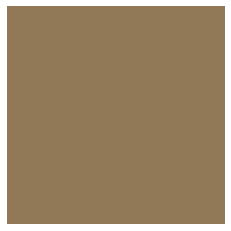

Nexus_Image_Iterator/moving_picture_grid_21_resized.png
(151, 135, 130)


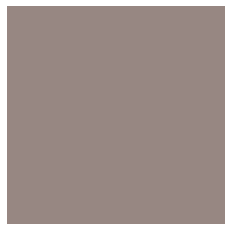

Nexus_Image_Iterator/more_compressedfull_sprial_grids_56_resized.png
(42, 39, 40)


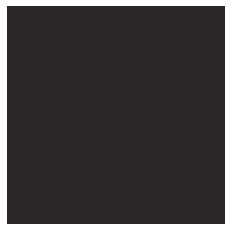

Nexus_Image_Iterator/full_sprial_grids_14_resized.png
(4, 4, 4)


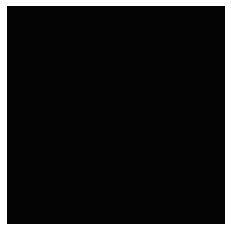

Nexus_Image_Iterator/Spiderplant 4_composite_final_6_90.png
(139, 130, 133)


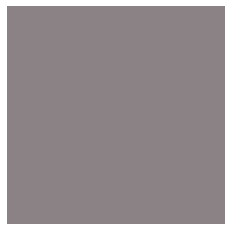

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_3_resized.png
(4, 4, 4)


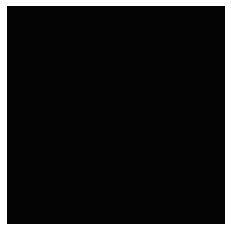

Nexus_Image_Iterator/Spiderplant 2_composite_final_0_90.png676_resized.png
(150, 139, 145)


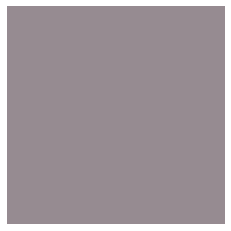

Nexus_Image_Iterator/back_forth_grid_40_resized.png
(14, 13, 13)


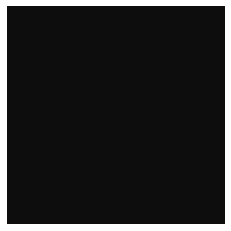

Nexus_Image_Iterator/Spiderplant 2_composite_2.png
(169, 156, 151)


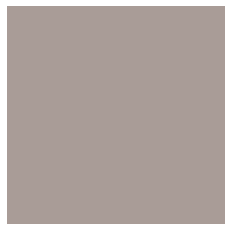

Nexus_Image_Iterator/full_sprial_grids_41_.png
(143, 141, 144)


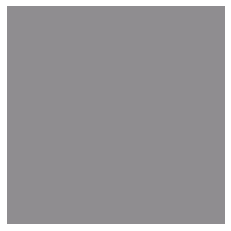

Nexus_Image_Iterator/moving_picture_grid_86_.png
(11, 10, 10)


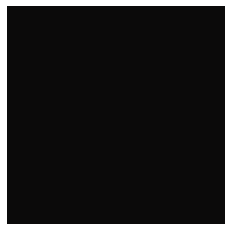

Nexus_Image_Iterator/grid_sprial_test_12_resized.png
(4, 4, 4)


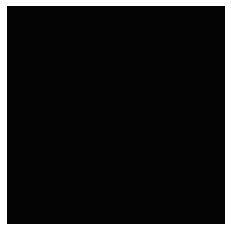

Nexus_Image_Iterator/moving_picture_grid_51_resized.png
(164, 146, 142)


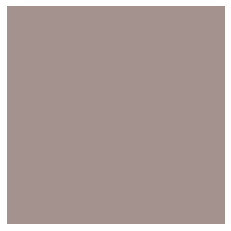

Nexus_Image_Iterator/more_compressedfull_sprial_grids_26_resized.png
(154, 138, 134)


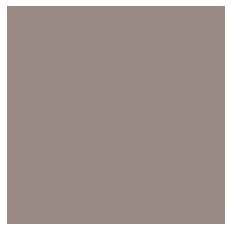

Nexus_Image_Iterator/Jeanfiedo_composite_final_0_90676_resized.png
(142, 107, 100)


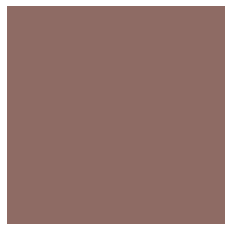

Nexus_Image_Iterator/full_sprial_grids_64_resized.png
(14, 14, 13)


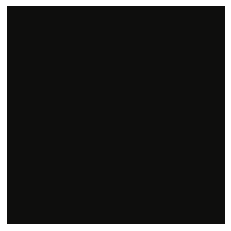

Nexus_Image_Iterator/moving_picture_grid_69_.png
(136, 124, 124)


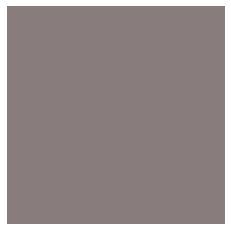

Nexus_Image_Iterator/full_sprial_grids_99_resized.png
(4, 4, 4)


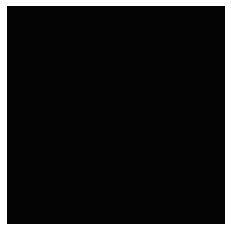

Nexus_Image_Iterator/Nataliia_composite_final_1_90.png
(134, 112, 114)


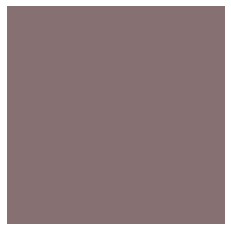

Nexus_Image_Iterator/back_forth_grid_30_resized.png
(12, 11, 11)


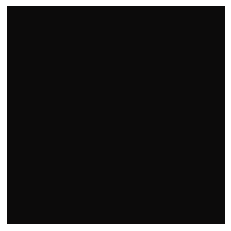

Nexus_Image_Iterator/Cindy_composite_final_2_90.png
(150, 134, 139)


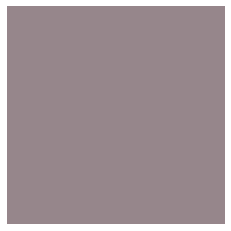

Nexus_Image_Iterator/full_sprial_grids_16_.png
(157, 140, 134)


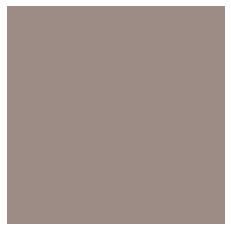

Nexus_Image_Iterator/Cindy_composite_3.png
(120, 99, 105)


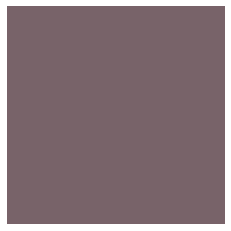

Nexus_Image_Iterator/q329042_composite_final_1_90.png
(89, 90, 95)


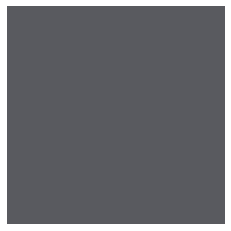

Nexus_Image_Iterator/moving_picture_grid_90_.png
(156, 138, 134)


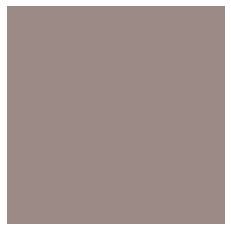

Nexus_Image_Iterator/MC_composite_final_1_90.png
(119, 113, 123)


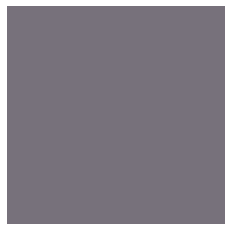

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_11_resized.png
(4, 4, 4)


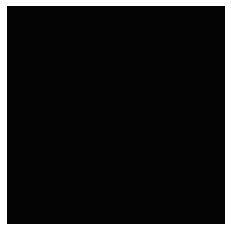

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_2_90.png
(75, 78, 83)


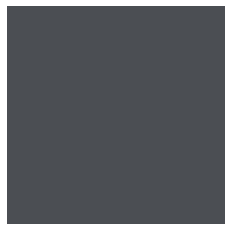

Nexus_Image_Iterator/Dan_composite_final_0_90.png
(166, 142, 140)


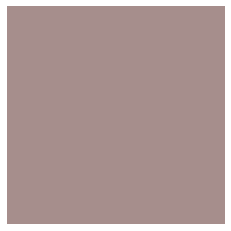

Nexus_Image_Iterator/more_compressedfull_sprial_grids_85_resized.png
(153, 137, 133)


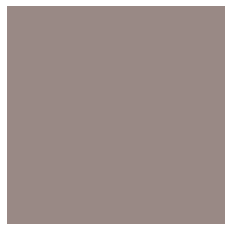

Nexus_Image_Iterator/more_compressedfull_sprial_grids_78_resized.png
(150, 134, 131)


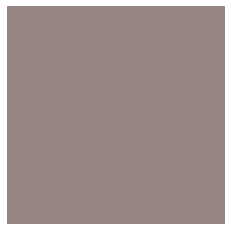

Nexus_Image_Iterator/JR Formanek_composite_final_7_90.png
(148, 97, 84)


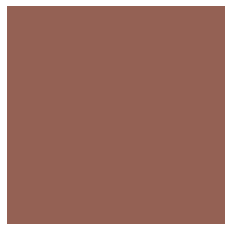

Nexus_Image_Iterator/Jeanfiedo_composite_final_6_90.png676_resized.png
(122, 114, 105)


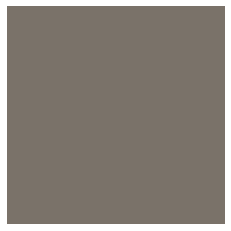

Nexus_Image_Iterator/full_sprial_grids_4_resized.png
(4, 4, 4)


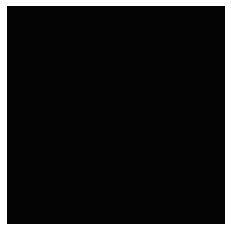

Nexus_Image_Iterator/moving_picture_grid_82_resized.png
(152, 139, 138)


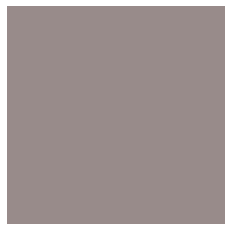

Nexus_Image_Iterator/moving_picture_grid_100_.png
(4, 4, 4)


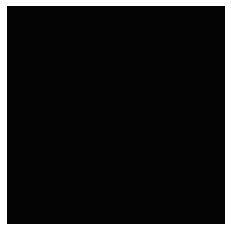

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_61_resized.png
(139, 139, 143)


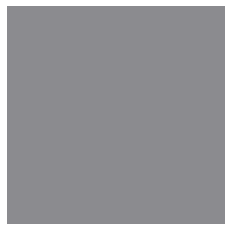

Nexus_Image_Iterator/moving_picture_grid_28_.png
(156, 139, 136)


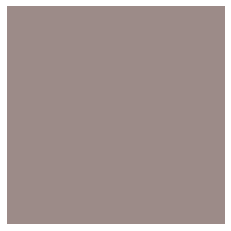

Nexus_Image_Iterator/grid_sprial_test_3_resized.png
(4, 4, 4)


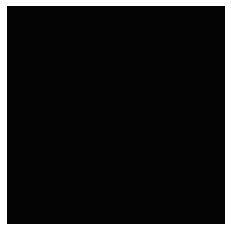

Nexus_Image_Iterator/grid_sprial_test_1_.png
(143, 148, 161)


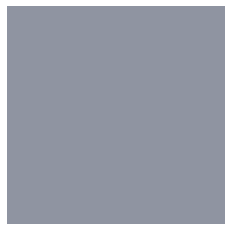

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_6_90.png
(119, 100, 104)


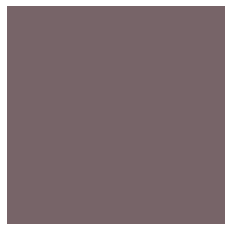

Nexus_Image_Iterator/full_sprial_grids_57_.png
(39, 37, 37)


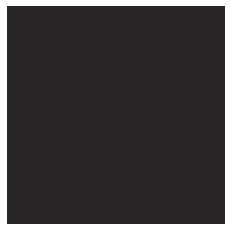

Nexus_Image_Iterator/moving_picture_grid_108_resized.png
(4, 4, 4)


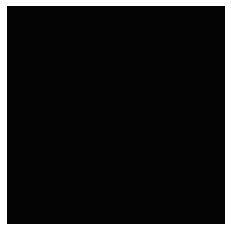

Nexus_Image_Iterator/full_sprial_grids_20_.png
(155, 137, 132)


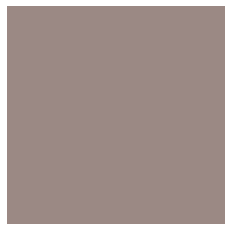

Nexus_Image_Iterator/more_compressedfull_sprial_grids_90_resized.png
(4, 4, 4)


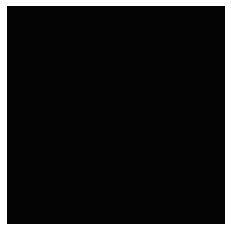

Nexus_Image_Iterator/donya_composite_final_3_90.png
(117, 135, 159)


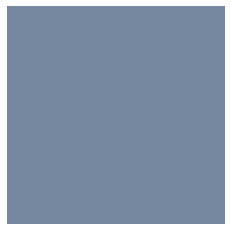

Nexus_Image_Iterator/donya_composite_2.png
(110, 89, 81)


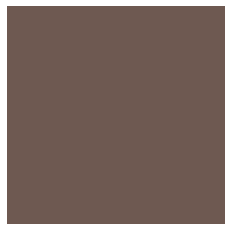

Nexus_Image_Iterator/Prianna _composite_2.png
(186, 133, 115)


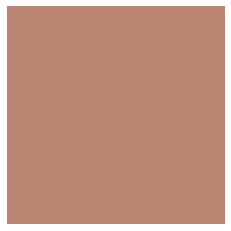

Nexus_Image_Iterator/MC 4_composite_final_0_90.png
(146, 143, 150)


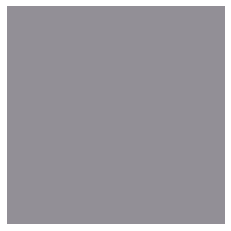

Nexus_Image_Iterator/moving_picture_grid_97_resized.png
(153, 137, 132)


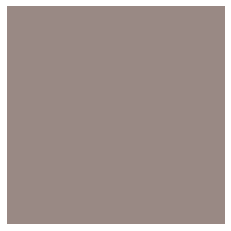

Nexus_Image_Iterator/full_sprial_grids_77_.png
(156, 138, 134)


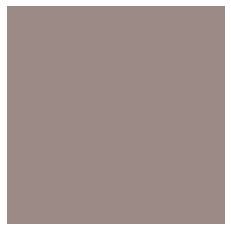

Nexus_Image_Iterator/full_sprial_grids_98_.png
(4, 4, 4)


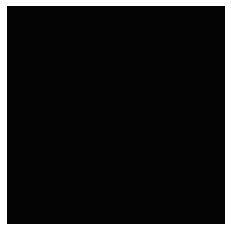

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_74_resized.png
(11, 10, 10)


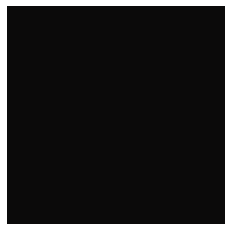

Nexus_Image_Iterator/i_love_chai_composite_2.png
(162, 162, 166)


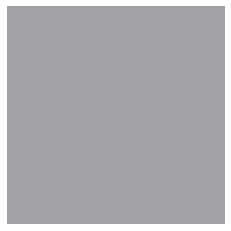

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_89_resized.png
(4, 4, 4)


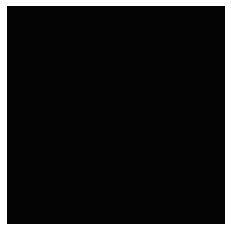

Nexus_Image_Iterator/Baffin_composite_final_6_90.png
(120, 112, 105)


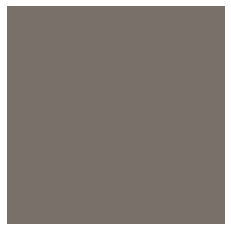

Nexus_Image_Iterator/MC_composite_4.png
(162, 132, 128)


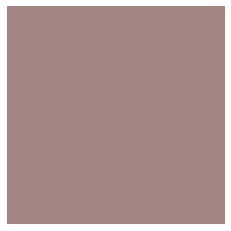

Nexus_Image_Iterator/grid_sprial_test_29_resized.png
(12, 11, 11)


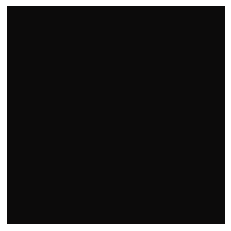

Nexus_Image_Iterator/moving_picture_grid_34_resized.png
(14, 13, 13)


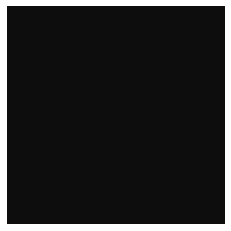

Nexus_Image_Iterator/checkers_test_01_.png
(170, 149, 143)


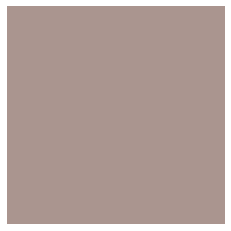

Nexus_Image_Iterator/full_sprial_grids_61_.png
(138, 138, 142)


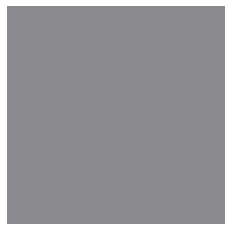

Nexus_Image_Iterator/Cindy_composite_1.png
(31, 4, 14)


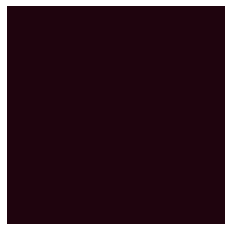

Nexus_Image_Iterator/more_compressedfull_sprial_grids_43_resized.png
(20, 19, 20)


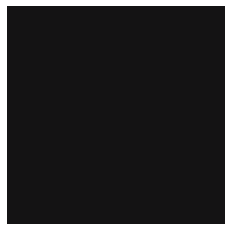

Nexus_Image_Iterator/Nataliia 2_composite_final_2_90.png
(143, 115, 118)


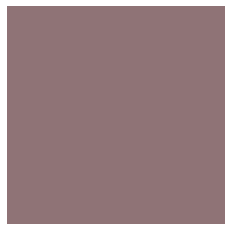

Nexus_Image_Iterator/more_compressedfull_sprial_grids_3_resized.png
(4, 4, 4)


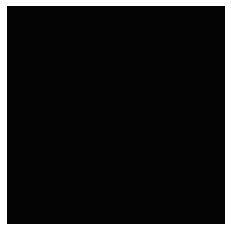

Nexus_Image_Iterator/moving_picture_grid_3_.png
(143, 148, 161)


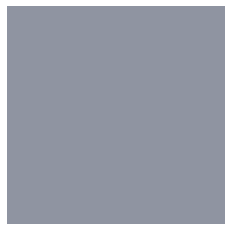

Nexus_Image_Iterator/JR Formanek_composite_4.png
(156, 132, 124)


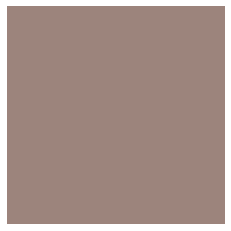

Nexus_Image_Iterator/Actias_composite_final_1_90.png
(170, 133, 124)


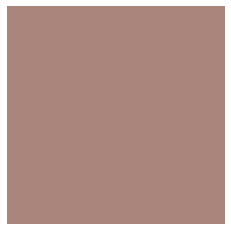

Nexus_Image_Iterator/back_forth_grid_55_resized.png
(152, 135, 130)


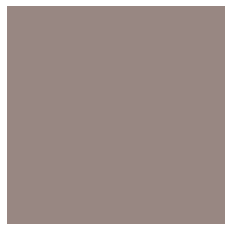

Nexus_Image_Iterator/moving_picture_grid_44_resized.png
(169, 149, 142)


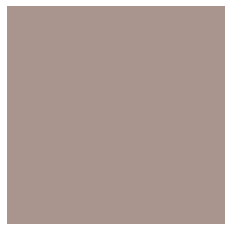

Nexus_Image_Iterator/full_sprial_grids_36_.png
(156, 140, 138)


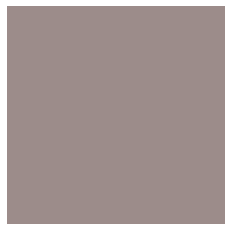

Nexus_Image_Iterator/Mika_composite_final_3_90.png
(155, 128, 101)


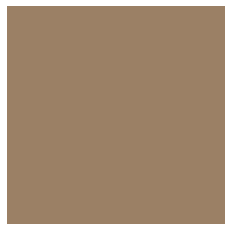

Nexus_Image_Iterator/full_sprial_grids_71_resized.png
(12, 11, 11)


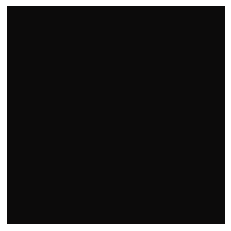

Nexus_Image_Iterator/more_compressedfull_sprial_grids_33_resized.png
(15, 14, 14)


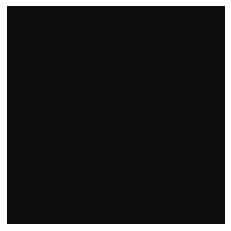

Nexus_Image_Iterator/moving_picture_grid_49_.png
(156, 141, 139)


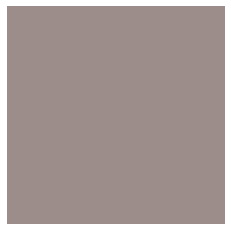

Nexus_Image_Iterator/back_forth_grid_25_resized.png
(151, 135, 133)


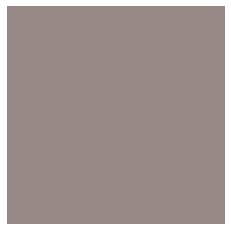

Nexus_Image_Iterator/Jeanfiedo_composite_final_5_90676_resized.png
(134, 110, 104)


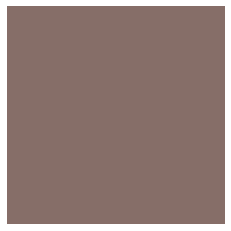

Nexus_Image_Iterator/back_forth_grid_39_resized.png
(14, 13, 13)


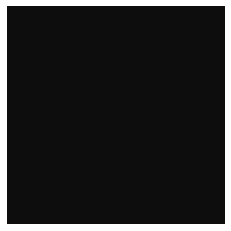

Nexus_Image_Iterator/back_forth_grid_71_.png
(143, 148, 161)


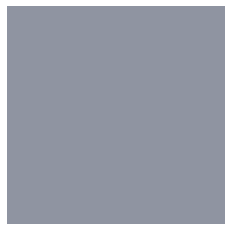

Nexus_Image_Iterator/full_sprial_grids_90_resized.png
(4, 4, 4)


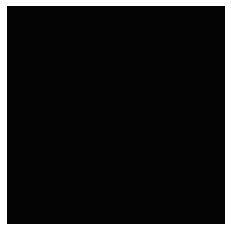

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_46_resized.png
(49, 46, 46)


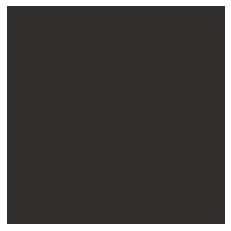

Nexus_Image_Iterator/full_sprial_grids_2_.png
(143, 148, 161)


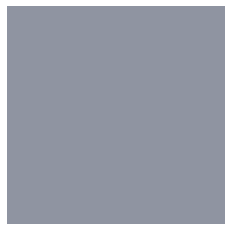

Nexus_Image_Iterator/Spiderplant3_composite_final_8_90.png
(118, 107, 102)


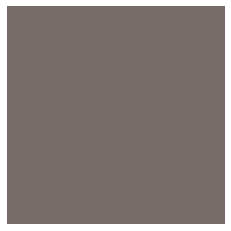

Nexus_Image_Iterator/Kathy_composite_final_2_90.png
(120, 120, 85)


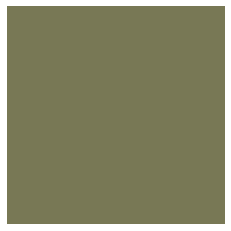

Nexus_Image_Iterator/Prianna _composite_final_9_90.png
(95, 56, 68)


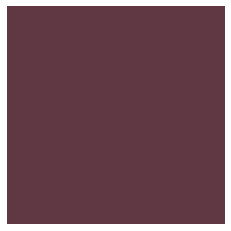

Nexus_Image_Iterator/moving_picture_grid_58_resized.png
(137, 124, 124)


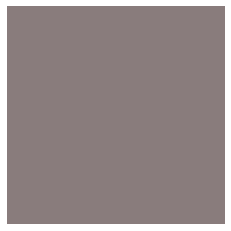

Nexus_Image_Iterator/Sloth Vibes_composite_final_7_90.png
(156, 136, 146)


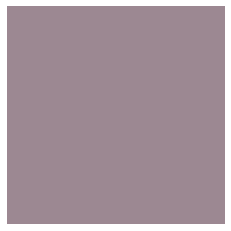

Nexus_Image_Iterator/Spiderplant 2_composite_1.png
(142, 149, 140)


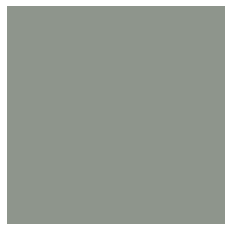

Nexus_Image_Iterator/moving_picture_grid_32_.png
(13, 12, 12)


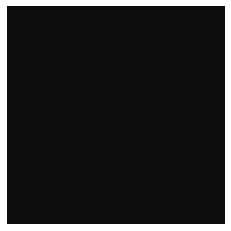

Nexus_Image_Iterator/back_forth_grid_26_.png
(155, 139, 134)


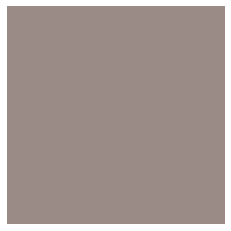

Nexus_Image_Iterator/Quinn_test_2_composite_final_5_90.png
(107, 113, 96)


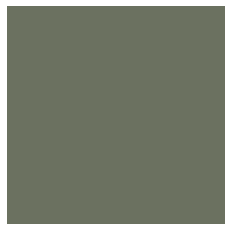

Nexus_Image_Iterator/back_forth_grid_49_resized.png
(151, 136, 133)


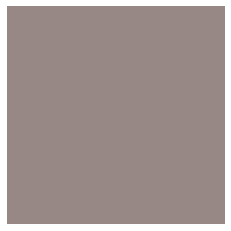

Nexus_Image_Iterator/Kasey Edgerton_composite_final_5_90.png
(123, 124, 133)


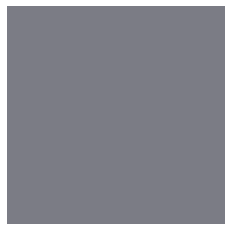

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_36_resized.png
(152, 138, 137)


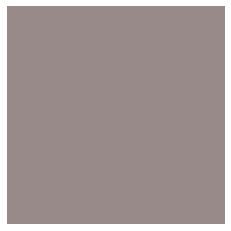

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_1_90.png
(98, 105, 115)


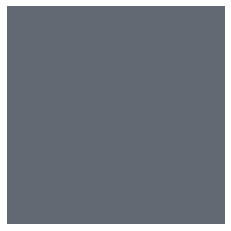

Nexus_Image_Iterator/moving_picture_grid_65_.png
(136, 124, 124)


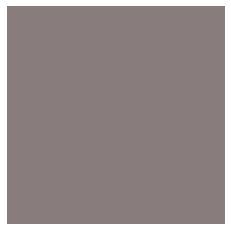

Nexus_Image_Iterator/moving_picture_grid_28_resized.png
(10, 10, 10)


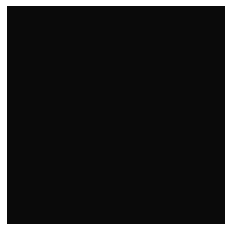

Nexus_Image_Iterator/Nataliia3_composite_final_2_90.png
(134, 123, 131)


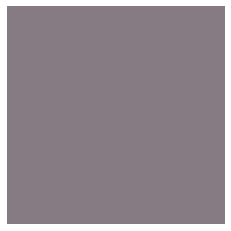

Nexus_Image_Iterator/moving_picture_grid_101_resized.png
(4, 4, 4)


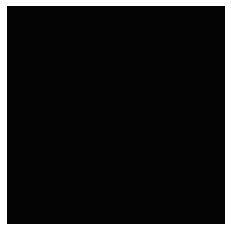

Nexus_Image_Iterator/moving_picture_grid_76_resized.png
(137, 124, 124)


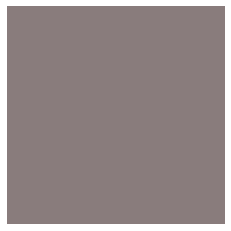

Nexus_Image_Iterator/grid_sprial_test_35_resized.png
(14, 14, 13)


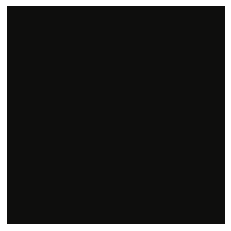

Nexus_Image_Iterator/back_forth_grid_30_.png
(12, 11, 11)


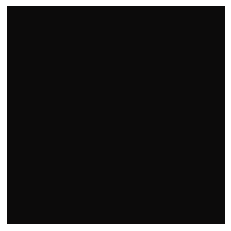

Nexus_Image_Iterator/full_sprial_grids_43_resized.png
(13, 12, 12)


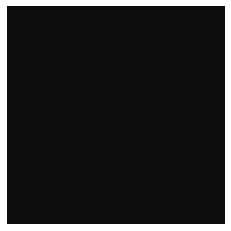

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_95_resized.png
(4, 4, 4)


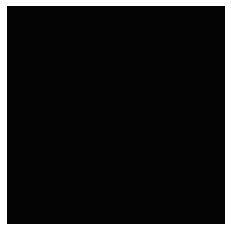

Nexus_Image_Iterator/Kasey Edgerton_composite_final_9_90.png
(127, 135, 142)


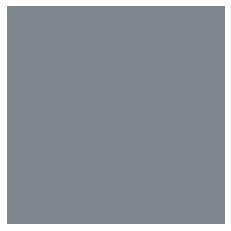

Nexus_Image_Iterator/i_love_chai_composite_3.png
(99, 101, 106)


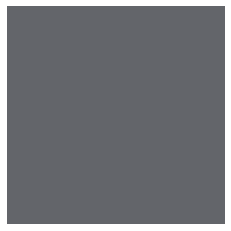

Nexus_Image_Iterator/Quinn_test_2_composite_final_9_90.png
(141, 113, 93)


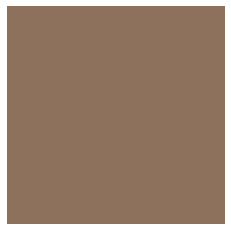

Nexus_Image_Iterator/moving_picture_grid_7_resized.png
(4, 4, 4)


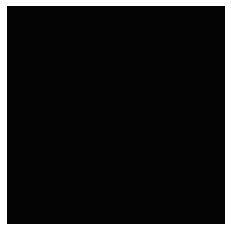

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_68_resized.png
(152, 138, 137)


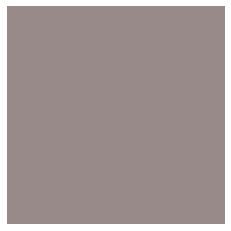

Nexus_Image_Iterator/Kasey Edgerton_composite_4.png
(147, 139, 135)


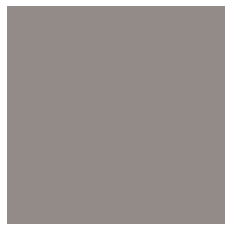

Nexus_Image_Iterator/back_forth_grid_17_resized.png
(153, 137, 132)


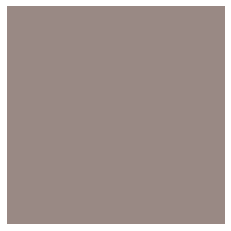

Nexus_Image_Iterator/Spiderplant 2_composite_final_1_90.png
(154, 145, 152)


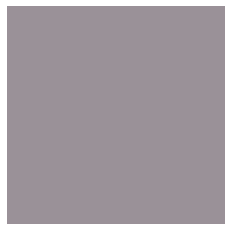

Nexus_Image_Iterator/monsteroflove_composite_final_7_90.png
(160, 118, 105)


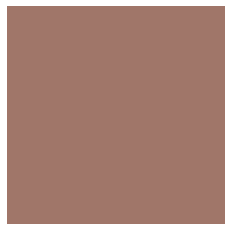

Nexus_Image_Iterator/moving_picture_grid_73_.png
(136, 124, 124)


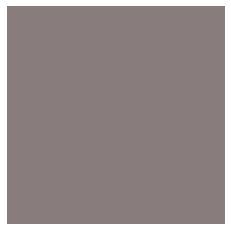

Nexus_Image_Iterator/grid_sprial_test_11_.png
(4, 4, 4)


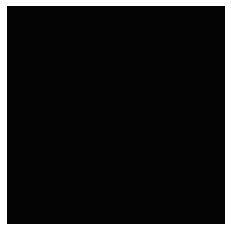

Nexus_Image_Iterator/back_forth_grid_67_.png
(4, 4, 4)


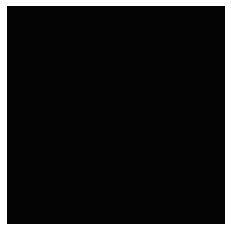

Nexus_Image_Iterator/Rondo_composite_final_0_90.png
(92, 78, 63)


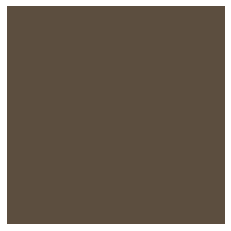

Nexus_Image_Iterator/Spiderplant 2_composite_final_8_90.png676_resized.png
(129, 130, 144)


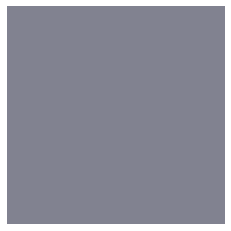

Nexus_Image_Iterator/Prianna _composite_3.png
(158, 134, 141)


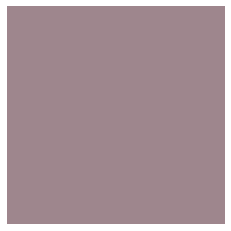

Nexus_Image_Iterator/all_test_01_resized.png
(137, 118, 116)


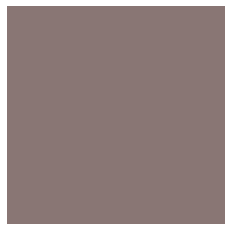

Nexus_Image_Iterator/i_love_chai_composite_final_0_90.png
(101, 112, 129)


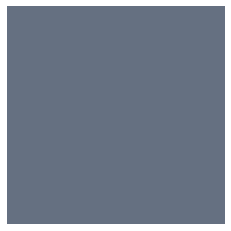

Nexus_Image_Iterator/donya_composite_3.png
(133, 122, 118)


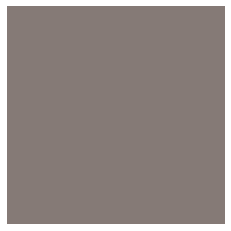

Nexus_Image_Iterator/full_sprial_grids_33_resized.png
(14, 13, 13)


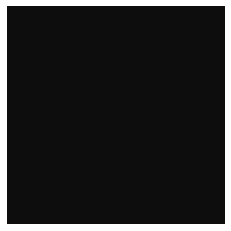

Nexus_Image_Iterator/more_compressedfull_sprial_grids_71_resized.png
(14, 13, 13)


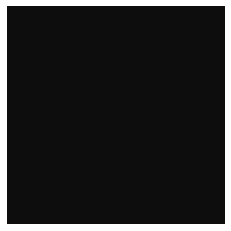

Nexus_Image_Iterator/Soul vision_composite_final_2_90.png
(103, 63, 49)


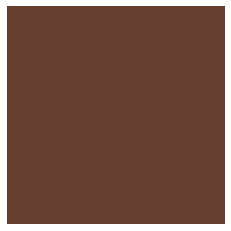

Nexus_Image_Iterator/John_composite_final_6_90.png
(136, 129, 118)


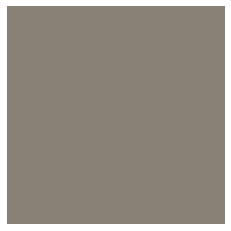

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_18_resized.png
(152, 135, 130)


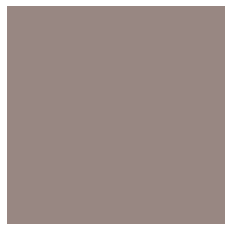

Nexus_Image_Iterator/Spiderplant3_composite_final_4_90.png
(138, 119, 114)


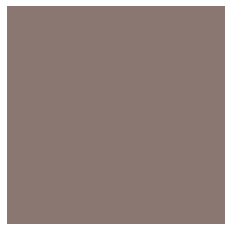

Nexus_Image_Iterator/moving_picture_grid_24_.png
(155, 137, 133)


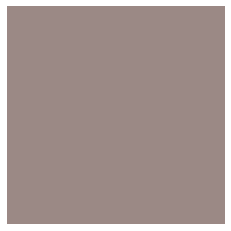

Nexus_Image_Iterator/Prianna _composite_final_5_90.png
(94, 75, 83)


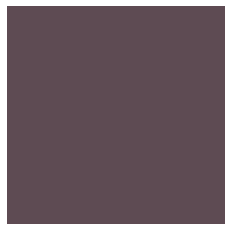

Nexus_Image_Iterator/back_forth_grid_67_resized.png
(4, 4, 4)


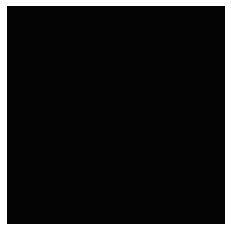

Nexus_Image_Iterator/full_sprial_grids_89_resized.png
(4, 4, 4)


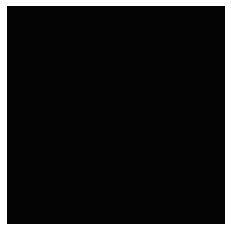

Nexus_Image_Iterator/moving_picture_grid_25_.png
(156, 138, 134)


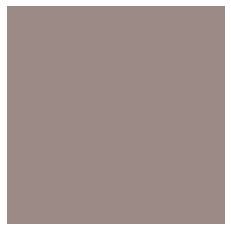

Nexus_Image_Iterator/back_forth_grid_20_resized.png
(151, 135, 130)


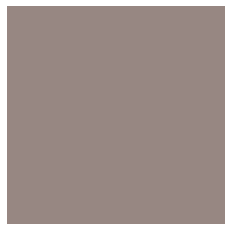

Nexus_Image_Iterator/Spiderplant 2_composite_final_2_90.png676_resized.png
(172, 144, 145)


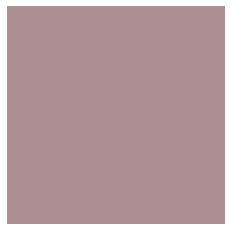

Nexus_Image_Iterator/Mika_composite_final_1_90.png
(127, 121, 119)


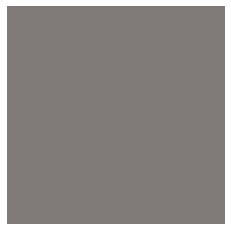

Nexus_Image_Iterator/moving_picture_grid_41_resized.png
(164, 146, 142)


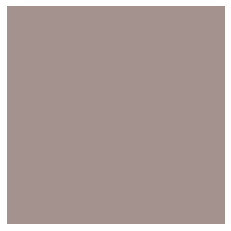

Nexus_Image_Iterator/grid_sprial_test_10_.png
(4, 4, 4)


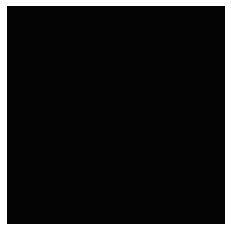

Nexus_Image_Iterator/back_forth_grid_66_.png
(4, 4, 4)


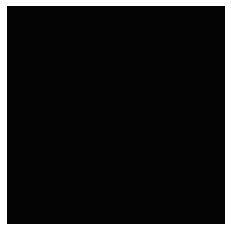

Nexus_Image_Iterator/full_sprial_grids_74_resized.png
(10, 10, 10)


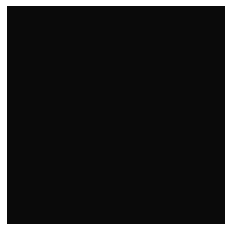

Nexus_Image_Iterator/more_compressedfull_sprial_grids_36_resized.png
(15, 14, 14)


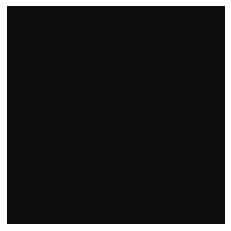

Nexus_Image_Iterator/more_compressedfull_sprial_grids_6_resized.png
(4, 4, 4)


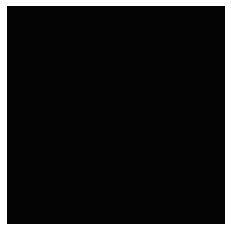

Nexus_Image_Iterator/back_forth_grid_50_resized.png
(151, 134, 132)


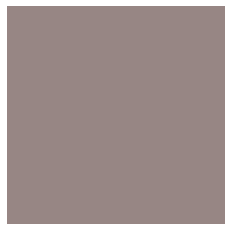

Nexus_Image_Iterator/moving_picture_grid_72_.png
(136, 124, 124)


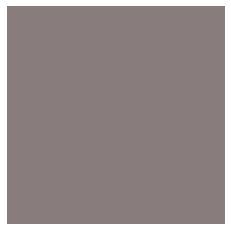

Nexus_Image_Iterator/moving_picture_grid_31_resized.png
(12, 11, 11)


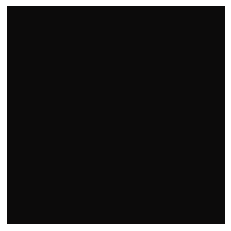

Nexus_Image_Iterator/Actias_composite_final_3_90.png
(168, 131, 124)


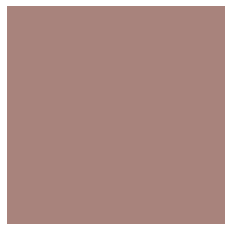

Nexus_Image_Iterator/MC_composite_1.png
(154, 163, 169)


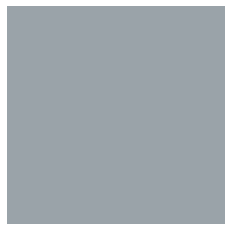

Nexus_Image_Iterator/back_forth_grid_31_.png
(13, 12, 12)


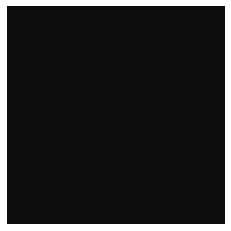

Nexus_Image_Iterator/Nataliia 2_composite_final_0_90.png
(170, 155, 153)


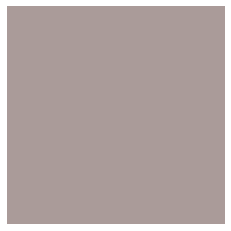

Nexus_Image_Iterator/Baffin_composite_final_8_90.png
(138, 119, 113)


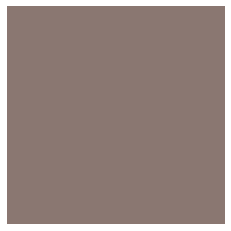

Nexus_Image_Iterator/more_compressedfull_sprial_grids_46_resized.png
(49, 46, 46)


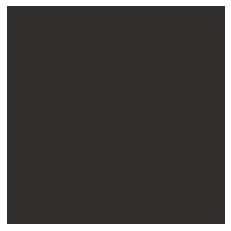

Nexus_Image_Iterator/more_compressedfull_sprial_grids_18_resized.png
(152, 135, 130)


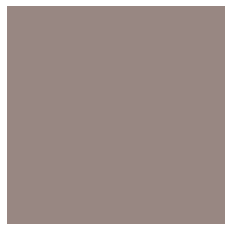

Nexus_Image_Iterator/Jeanfiedo_composite_final_4_90.png676_resized.png
(114, 104, 98)


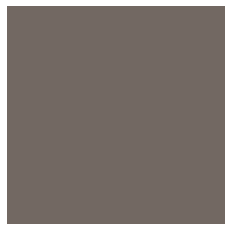

Nexus_Image_Iterator/moving_picture_grid_64_.png
(136, 124, 124)


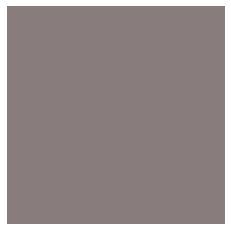

Nexus_Image_Iterator/MC 4_composite_final_2_90.png
(175, 166, 161)


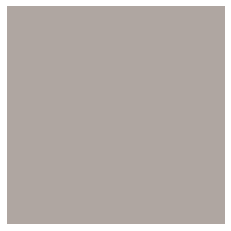

Nexus_Image_Iterator/Cindy_composite_4.png
(136, 115, 131)


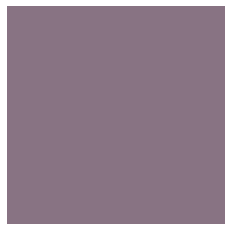

Nexus_Image_Iterator/JR Formanek_composite_1.png
(170, 158, 157)


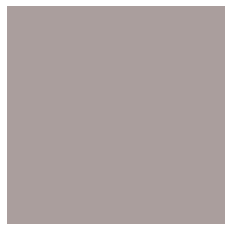

Nexus_Image_Iterator/back_forth_grid_27_.png
(156, 139, 136)


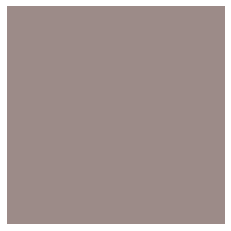

Nexus_Image_Iterator/Baffin_composite_final_4_90.png
(135, 109, 110)


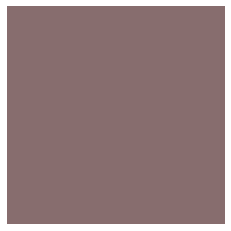

Nexus_Image_Iterator/moving_picture_grid_92_resized.png
(151, 135, 131)


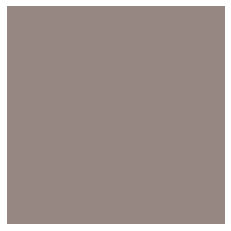

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_71_resized.png
(12, 11, 11)


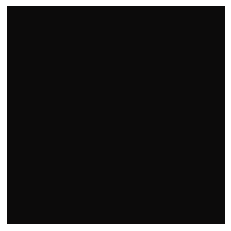

Nexus_Image_Iterator/full_sprial_grids_3_.png
(4, 4, 4)


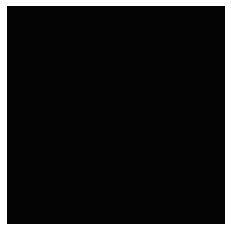

Nexus_Image_Iterator/donya_composite_final_1_90.png
(143, 146, 154)


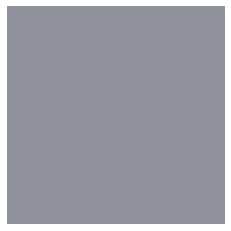

Nexus_Image_Iterator/more_compressedfull_sprial_grids_68_resized.png
(15, 14, 14)


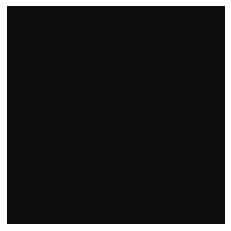

Nexus_Image_Iterator/moving_picture_grid_33_.png
(13, 12, 12)


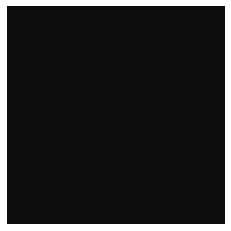

Nexus_Image_Iterator/back_forth_grid_70_.png
(4, 4, 4)


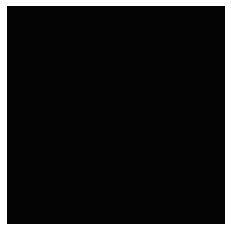

Nexus_Image_Iterator/more_compressedfull_sprial_grids_95_resized.png
(4, 4, 4)


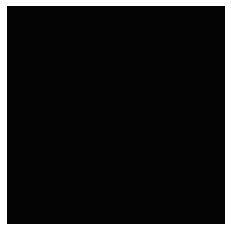

Nexus_Image_Iterator/more_compressedfull_sprial_grids_89_resized.png
(4, 4, 4)


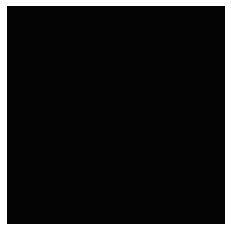

Nexus_Image_Iterator/Soul vision_composite_final_0_90.png
(64, 43, 35)


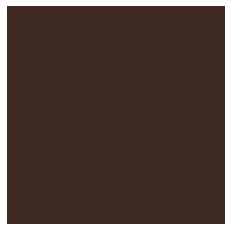

Nexus_Image_Iterator/moving_picture_grid_48_.png
(170, 149, 143)


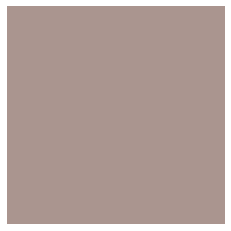

Nexus_Image_Iterator/Rondo_composite_final_2_90.png
(123, 105, 83)


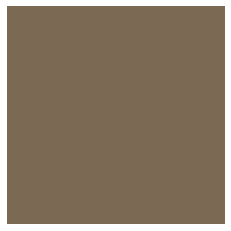

Nexus_Image_Iterator/back_forth_grid_62_resized.png
(4, 4, 4)


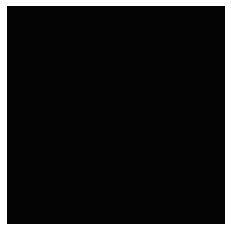

Nexus_Image_Iterator/i_love_chai_composite_final_2_90.png
(151, 132, 136)


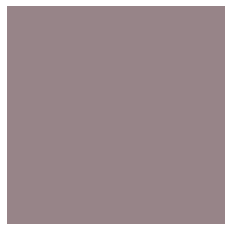

Nexus_Image_Iterator/Spiderplant3_composite_final_6_90.png
(131, 114, 116)


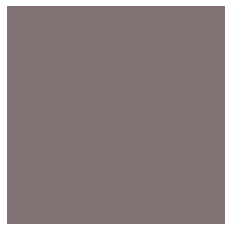

Nexus_Image_Iterator/Prianna _composite_final_7_90.png
(159, 130, 131)


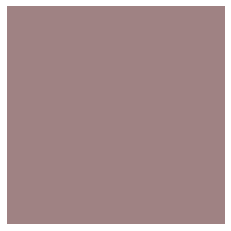

Nexus_Image_Iterator/full_sprial_grids_8_resized.png
(4, 4, 4)


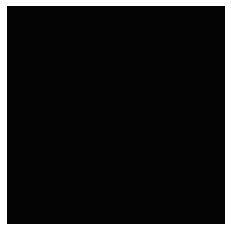

Nexus_Image_Iterator/Spiderplant 2_composite_4.png
(153, 136, 142)


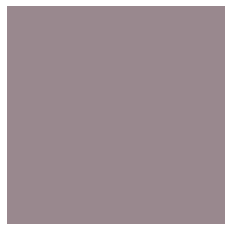

Nexus_Image_Iterator/full_sprial_grids_37_.png
(156, 140, 138)


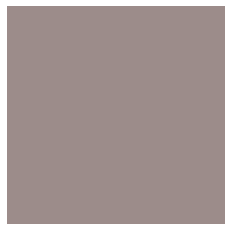

Nexus_Image_Iterator/full_sprial_grids_36_resized.png
(14, 14, 13)


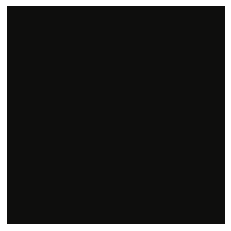

Nexus_Image_Iterator/John_composite_final_4_90.png
(114, 101, 97)


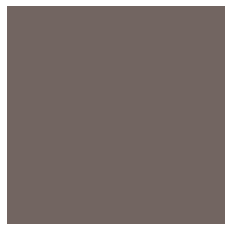

Nexus_Image_Iterator/Sloth Vibes_composite_final_9_90.png
(157, 144, 156)


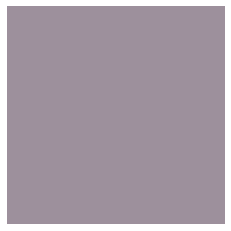

Nexus_Image_Iterator/more_compressedfull_sprial_grids_74_resized.png
(155, 139, 136)


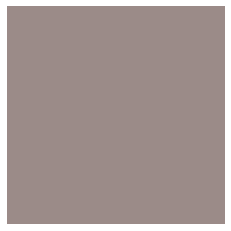

Nexus_Image_Iterator/moving_picture_grid_2_resized.png
(4, 4, 4)


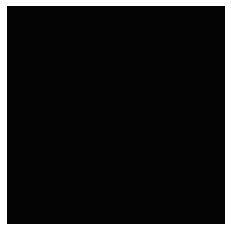

Nexus_Image_Iterator/Jeanfiedo_composite_final_1_90676_resized.png
(152, 120, 120)


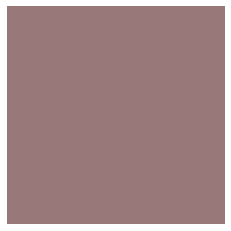

Nexus_Image_Iterator/moving_picture_grid_2_.png
(143, 148, 161)


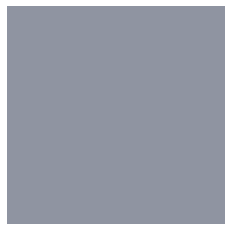

Nexus_Image_Iterator/back_forth_grid_12_resized.png
(4, 4, 4)


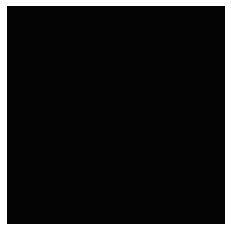

Nexus_Image_Iterator/full_sprial_grids_60_.png
(143, 141, 144)


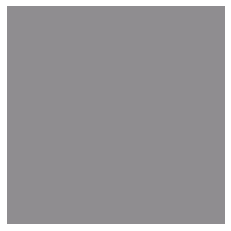

Nexus_Image_Iterator/moving_picture_grid_73_resized.png
(137, 124, 124)


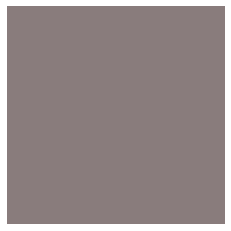

Nexus_Image_Iterator/moving_picture_grid_104_resized.png
(4, 4, 4)


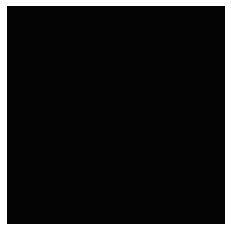

Nexus_Image_Iterator/Spiderplant 2_composite_final_3_90.png
(172, 138, 137)


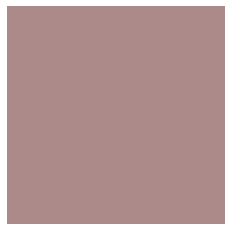

Nexus_Image_Iterator/monsteroflove_composite_final_5_90.png
(141, 118, 108)


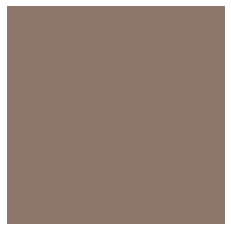

Nexus_Image_Iterator/grid_sprial_test_30_resized.png
(12, 11, 11)


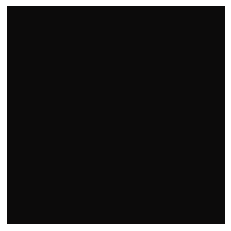

Nexus_Image_Iterator/full_sprial_grids_46_resized.png
(49, 46, 46)


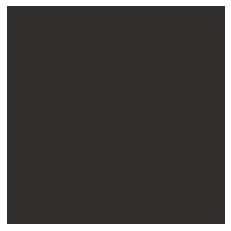

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_90_resized.png
(4, 4, 4)


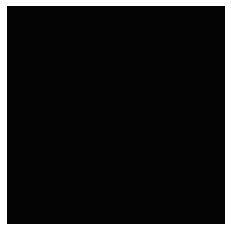

Nexus_Image_Iterator/full_sprial_grids_18_resized.png
(152, 135, 130)


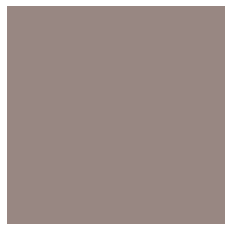

Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_3_90.png
(114, 92, 92)


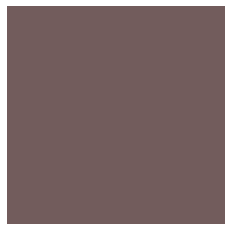

Nexus_Image_Iterator/Quinn_test_2_composite_final_7_90.png
(154, 124, 96)


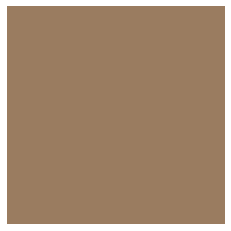

Nexus_Image_Iterator/Kasey Edgerton_composite_final_7_90.png
(126, 114, 117)


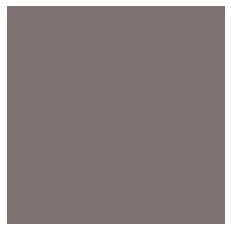

Nexus_Image_Iterator/Nataliia3_composite_final_0_90.png
(149, 136, 135)


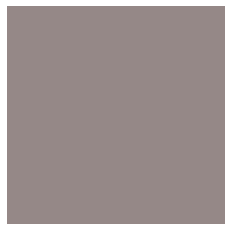

Nexus_Image_Iterator/Kasey Edgerton_composite_1.png
(116, 109, 112)


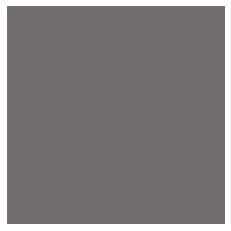

Nexus_Image_Iterator/full_sprial_grids_76_.png
(155, 138, 134)


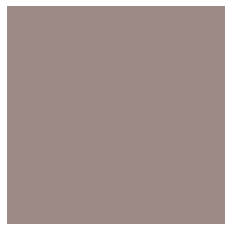

Nexus_Image_Iterator/full_sprial_grids_99_.png
(143, 148, 161)


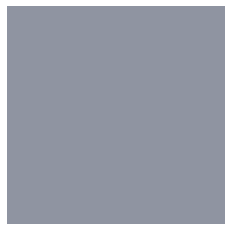

Nexus_Image_Iterator/monsteroflove_composite_final_9_90.png
(139, 91, 76)


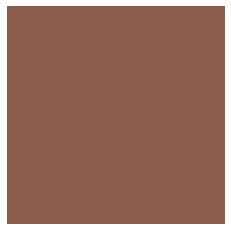

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_33_resized.png
(152, 138, 137)


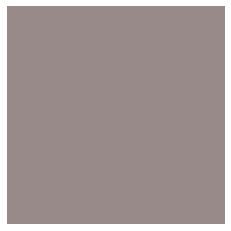

Nexus_Image_Iterator/full_sprial_grids_68_resized.png
(14, 13, 13)


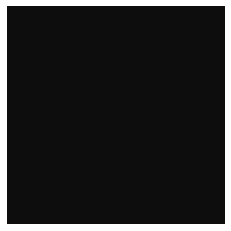

Nexus_Image_Iterator/full_sprial_grids_21_.png
(155, 137, 132)


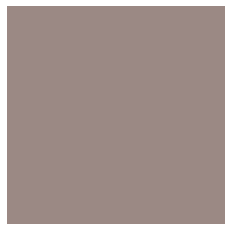

Nexus_Image_Iterator/John_composite_final_8_90.png
(121, 120, 109)


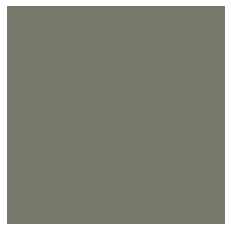

Nexus_Image_Iterator/Sloth Vibes_composite_final_5_90.png
(142, 143, 165)


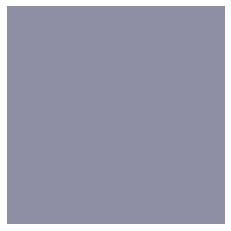

Nexus_Image_Iterator/full_sprial_grids_95_resized.png
(4, 4, 4)


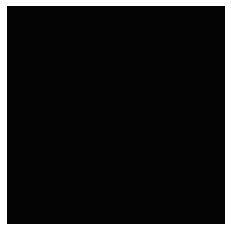

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_43_resized.png
(16, 15, 16)


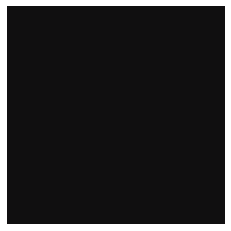

Nexus_Image_Iterator/Kathy_composite_final_0_90.png
(176, 168, 151)


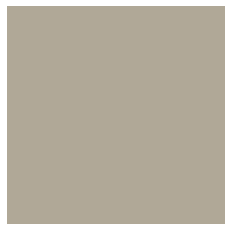

Nexus_Image_Iterator/RainbowSpaceman_composite_final_6_90.png
(72, 64, 68)


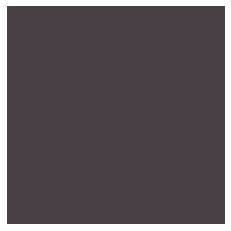

Nexus_Image_Iterator/grid_sprial_test_0_.png
(4, 4, 4)


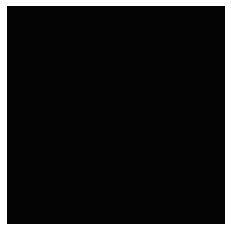

Nexus_Image_Iterator/moving_picture_grid_38_resized.png
(169, 149, 142)


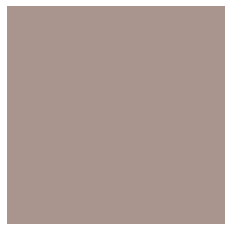

Nexus_Image_Iterator/full_sprial_grids_56_.png
(41, 38, 39)


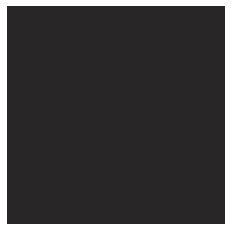

Nexus_Image_Iterator/moving_picture_grid_101_.png
(4, 4, 4)


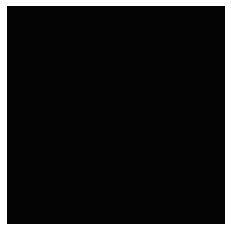

Nexus_Image_Iterator/back_forth_grid_59_resized.png
(4, 4, 4)


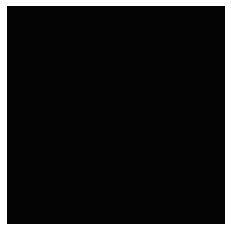

Nexus_Image_Iterator/Prianna _composite_4.png
(98, 82, 85)


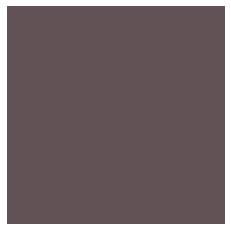

Nexus_Image_Iterator/donya_composite_4.png
(135, 129, 140)


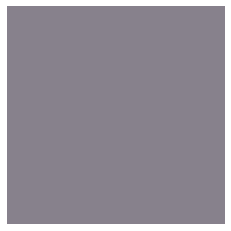

Nexus_Image_Iterator/MC 2_composite_final_5_90.png
(132, 108, 106)


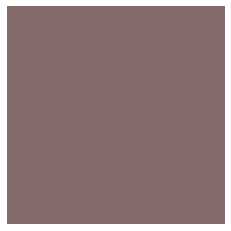

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_26_resized.png
(10, 10, 10)


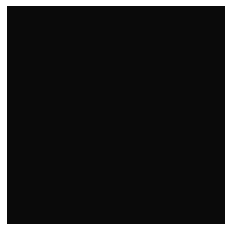

Nexus_Image_Iterator/moving_picture_grid_29_.png
(11, 10, 10)


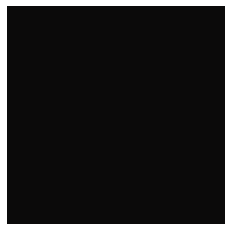

Nexus_Image_Iterator/Sibel_composite_final_4_90.png
(142, 120, 96)


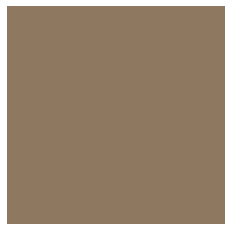

Nexus_Image_Iterator/Spiderplant_composite_final_0_90.png
(117, 106, 99)


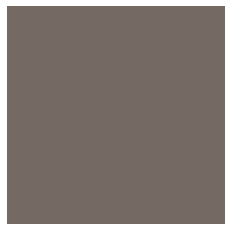

Nexus_Image_Iterator/MC 3_composite_final_1_90.png
(157, 140, 141)


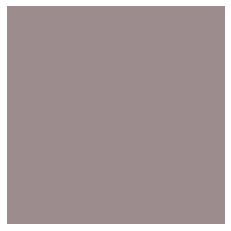

Nexus_Image_Iterator/Kasey Edgerton_composite_3.png
(126, 121, 113)


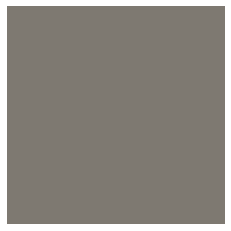

Nexus_Image_Iterator/moving_picture_grid_48_resized.png
(169, 149, 142)


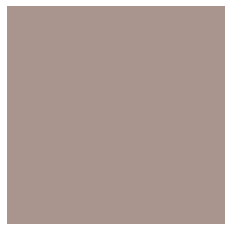

Nexus_Image_Iterator/back_forth_grid_29_resized.png
(12, 11, 11)


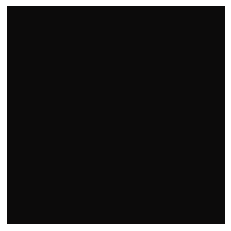

Nexus_Image_Iterator/MC_composite_2.png
(159, 164, 167)


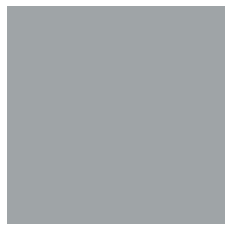

Nexus_Image_Iterator/moving_picture_grid_91_.png
(155, 137, 133)


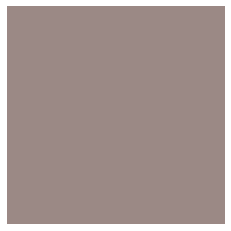

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_56_resized.png
(42, 39, 39)


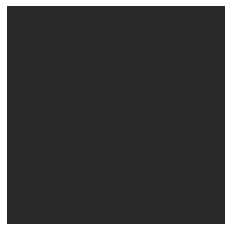

Nexus_Image_Iterator/full_sprial_grids_80_resized.png
(151, 135, 131)


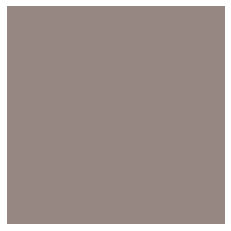

Nexus_Image_Iterator/i_love_chai_composite_4.png
(91, 63, 79)


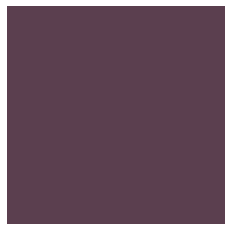

Nexus_Image_Iterator/eisa_composite_final_3_90.png
(138, 113, 98)


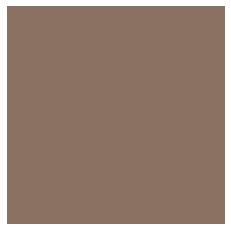

Nexus_Image_Iterator/Victor_composite_final_0_90.png
(138, 92, 72)


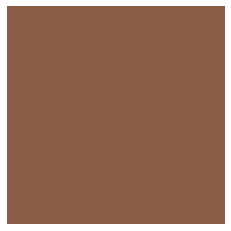

Nexus_Image_Iterator/full_sprial_grids_17_.png
(157, 139, 133)


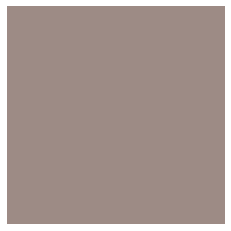

Nexus_Image_Iterator/Sibel_composite_final_8_90.png
(156, 141, 120)


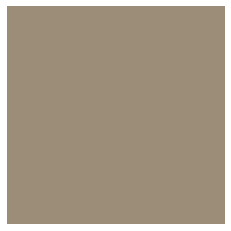

Nexus_Image_Iterator/moving_picture_grid_87_.png
(156, 139, 136)


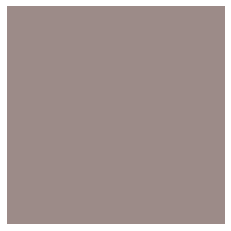

Nexus_Image_Iterator/Jeanfiedo_composite_final_7_90.png
(132, 110, 109)


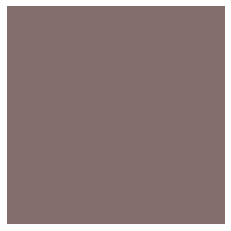

Nexus_Image_Iterator/moving_picture_grid_16_resized.png
(4, 4, 4)


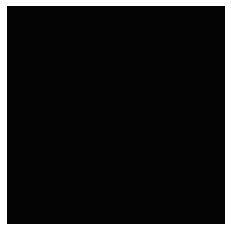

Nexus_Image_Iterator/JR Formanek_composite_2.png
(139, 132, 114)


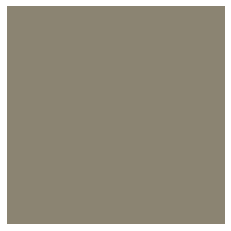

Nexus_Image_Iterator/more_compressedfull_sprial_grids_61_resized.png
(139, 138, 143)


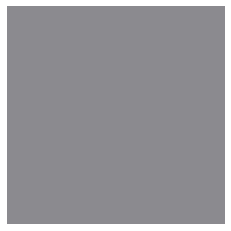

Nexus_Image_Iterator/full_sprial_grids_23_resized.png
(151, 134, 132)


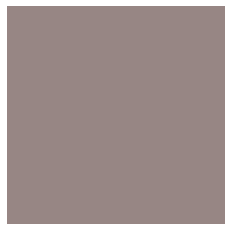

Nexus_Image_Iterator/moving_picture_grid_68_.png
(136, 124, 124)


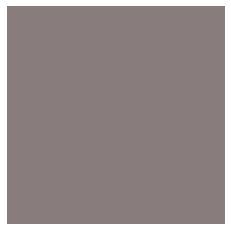

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_78_resized.png
(151, 134, 132)


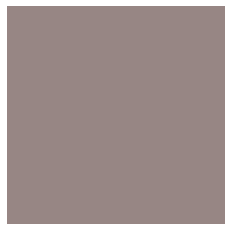

Nexus_Image_Iterator/back_forth_grid_7_resized.png
(4, 4, 4)


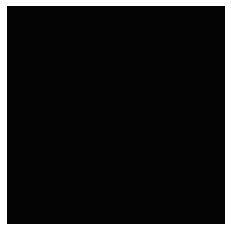

Nexus_Image_Iterator/full_sprial_grids_40_.png
(138, 138, 142)


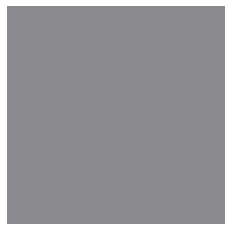

Nexus_Image_Iterator/Nataliia 4_composite_final_7_90.png
(136, 147, 167)


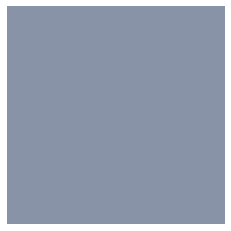

Nexus_Image_Iterator/grid_sprial_test_25_resized.png
(151, 135, 133)


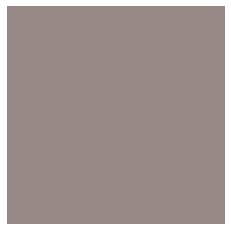

Nexus_Image_Iterator/MC 2_composite_final_9_90.png
(137, 114, 111)


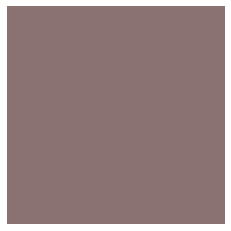

Nexus_Image_Iterator/moving_picture_grid_66_resized.png
(137, 124, 124)


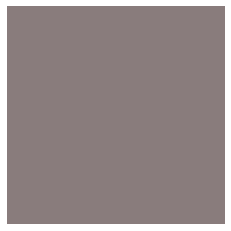

Nexus_Image_Iterator/moving_picture_grid_111_resized.png
(4, 4, 4)


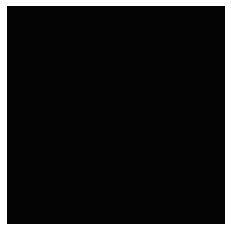

Nexus_Image_Iterator/more_compressedfull_sprial_grids_11_resized.png
(4, 4, 4)


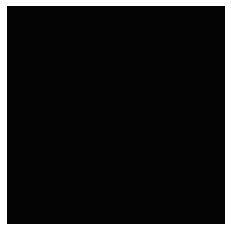

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_85_resized.png
(153, 137, 133)


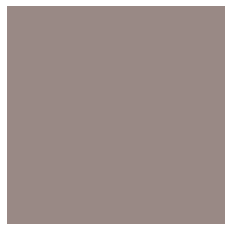

Nexus_Image_Iterator/Kathy_2_composite_final_7_90.png
(126, 120, 97)


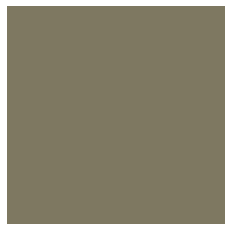

Nexus_Image_Iterator/full_sprial_grids_53_resized.png
(128, 115, 112)


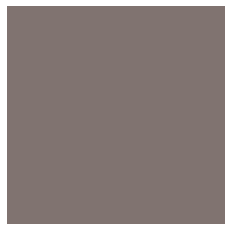

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_99_resized.png
(142, 147, 161)


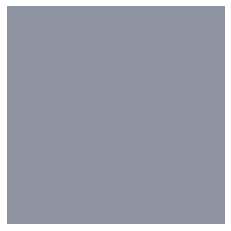

Nexus_Image_Iterator/grid_sprial_test_6_resized.png
(4, 4, 4)


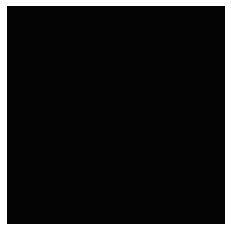

Nexus_Image_Iterator/Spiderplant 4_composite_final_8_90.png
(115, 115, 111)


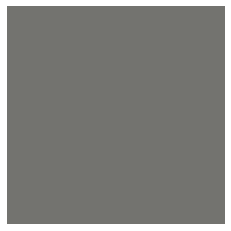

Nexus_Image_Iterator/Jeanfiedo_composite_final_4_90676_resized.png
(114, 104, 98)


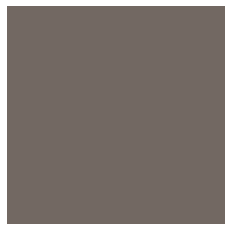

Nexus_Image_Iterator/moving_picture_grid_44_.png
(170, 149, 143)


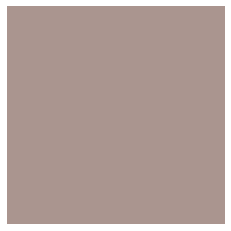

Nexus_Image_Iterator/moving_picture_grid_87_resized.png
(10, 10, 10)


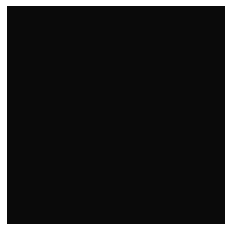

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_4_90.png
(81, 83, 82)


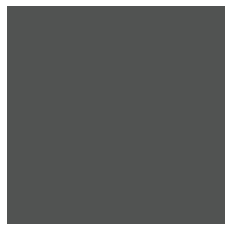

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_64_resized.png
(152, 138, 137)


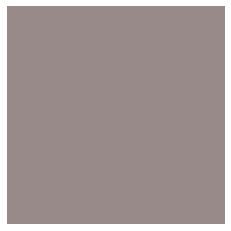

Nexus_Image_Iterator/back_forth_grid_2_.png
(143, 148, 161)


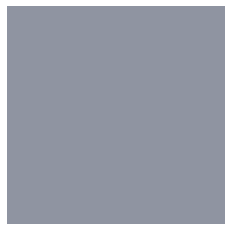

Nexus_Image_Iterator/MC_composite_final_3_90.png
(148, 123, 124)


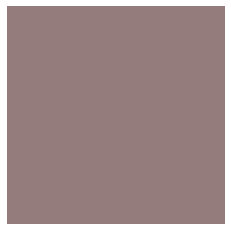

Nexus_Image_Iterator/Kasey Edgerton 3_composite_final_0_90.png
(81, 91, 102)


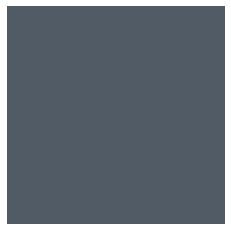

Nexus_Image_Iterator/Dan_composite_final_2_90.png
(161, 138, 152)


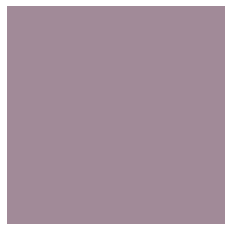

Nexus_Image_Iterator/full_sprial_grids_83_.png
(156, 138, 131)


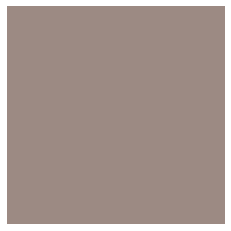

Nexus_Image_Iterator/q329042_composite_final_3_90.png
(122, 110, 109)


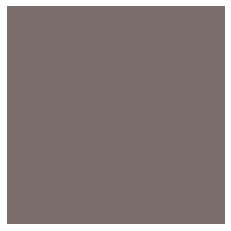

Nexus_Image_Iterator/JR Formanek_composite_3.png
(156, 98, 80)


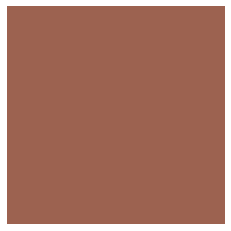

Nexus_Image_Iterator/full_sprial_grids_1_resized.png
(4, 4, 4)


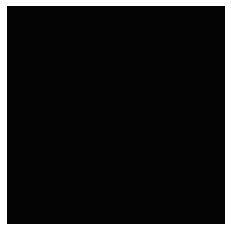

Nexus_Image_Iterator/back_forth_grid_50_.png
(155, 137, 133)


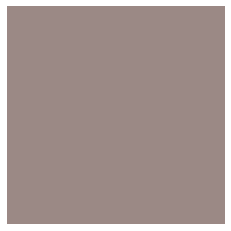

Nexus_Image_Iterator/grid_sprial_test_26_.png
(155, 139, 134)


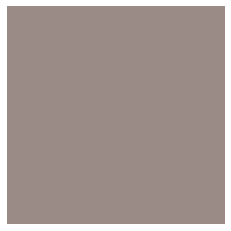

Nexus_Image_Iterator/moving_picture_grid_13_.png
(4, 4, 4)


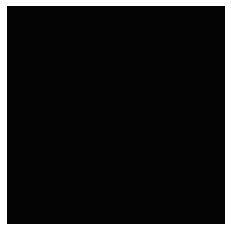

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_14_resized.png
(4, 4, 4)


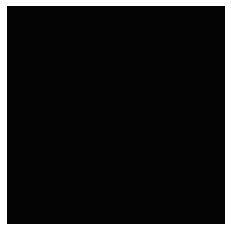

Nexus_Image_Iterator/more_compressedfull_sprial_grids_80_resized.png
(150, 135, 131)


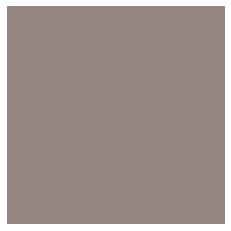

Nexus_Image_Iterator/JR Formanek_composite_final_5_90.png
(168, 151, 144)


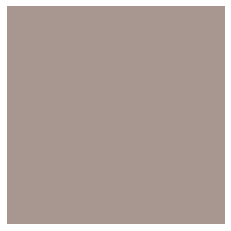

Nexus_Image_Iterator/back_forth_grid_35_resized.png
(14, 14, 13)


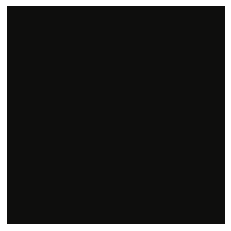

Nexus_Image_Iterator/grid_sprial_test_30_.png
(12, 11, 11)


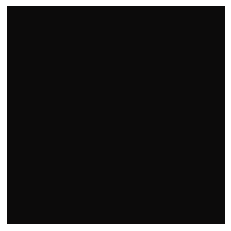

Nexus_Image_Iterator/back_forth_grid_46_.png
(156, 139, 136)


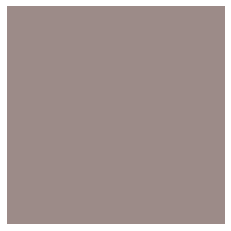

Nexus_Image_Iterator/MC_composite_3.png
(176, 169, 164)


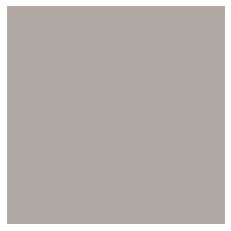

Nexus_Image_Iterator/full_sprial_grids_95_.png
(4, 4, 4)


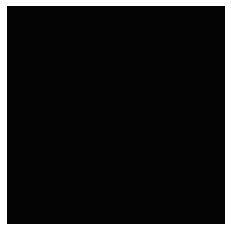

Nexus_Image_Iterator/Kasey Edgerton_composite_2.png
(123, 92, 92)


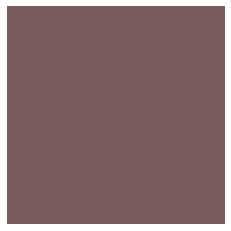

Nexus_Image_Iterator/JR Formanek_composite_final_9_90.png
(143, 140, 147)


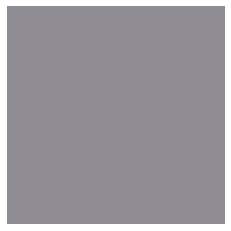

Nexus_Image_Iterator/grid_sprial_test_17_resized.png
(153, 137, 132)


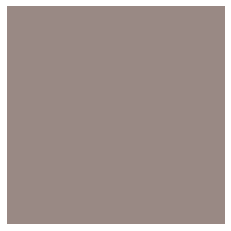

Nexus_Image_Iterator/moving_picture_grid_54_resized.png
(169, 149, 142)


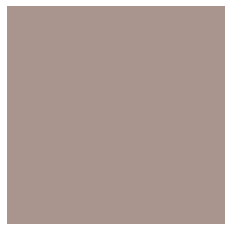

Nexus_Image_Iterator/Cindy_composite_final_0_90.png
(156, 141, 140)


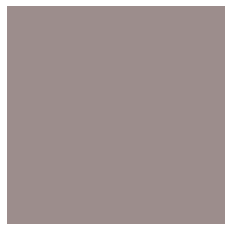

Nexus_Image_Iterator/more_compressedfull_sprial_grids_23_resized.png
(150, 134, 131)


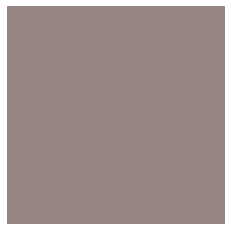

Nexus_Image_Iterator/Nataliia_composite_final_3_90.png
(149, 130, 129)


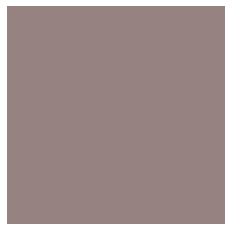

Nexus_Image_Iterator/full_sprial_grids_61_resized.png
(139, 139, 143)


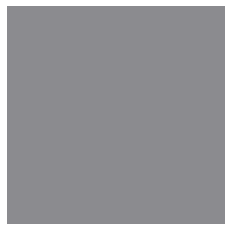

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_6_resized.png
(4, 4, 4)


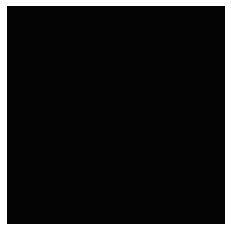

Nexus_Image_Iterator/Spiderplant 4_composite_final_4_90.png
(153, 131, 131)


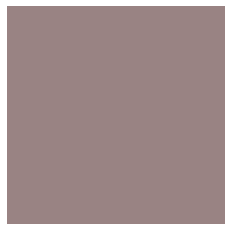

Nexus_Image_Iterator/back_forth_grid_45_resized.png
(11, 10, 10)


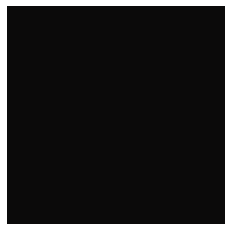

Nexus_Image_Iterator/back_forth_grid_11_.png
(4, 4, 4)


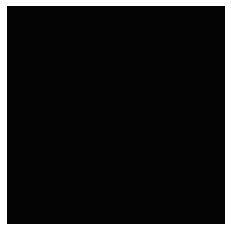

Nexus_Image_Iterator/moving_picture_grid_24_resized.png
(151, 134, 132)


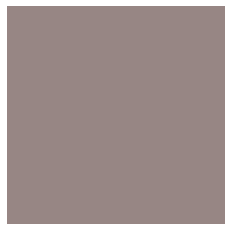

Nexus_Image_Iterator/moving_picture_grid_52_.png
(170, 149, 143)


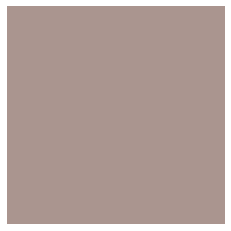

Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_8_90.png
(96, 106, 117)


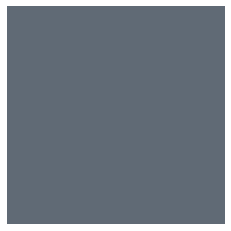

Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_101_resized.png
(4, 4, 4)


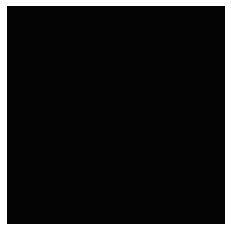

Nexus_Image_Iterator/more_compressedfull_sprial_grids_53_resized.png
(127, 113, 109)


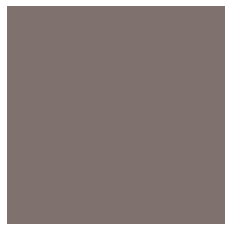

Nexus_Image_Iterator/full_sprial_grids_11_resized.png
(4, 4, 4)


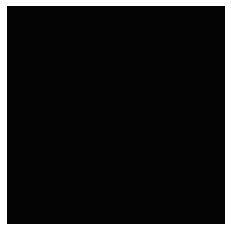

In [64]:
image_folder = "Nexus_Image_Iterator/"
image_files = glob.glob(image_folder+"*.png")
image_colors = []

for image_filename in image_files:
    # color_thief = ColorThief(image_filename)
    # get the dominant color
    dominant_color = fast_colorthief.get_dominant_color(image_filename, quality=1)
    print(image_filename)
    print(dominant_color)
    palette = np.array([dominant_color])[np.newaxis, :, :]
    plt.imshow(palette);
    plt.axis('off');
    plt.show()
    image_colors.append(dominant_color)
    

In [11]:
dominant_color

(4, 4, 4)

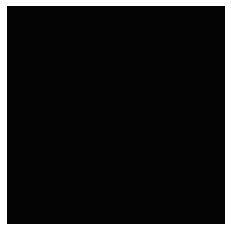

In [10]:
palette = np.array([dominant_color])[np.newaxis, :, :]
plt.imshow(palette);
plt.axis('off');

In [65]:
colors_df = pd.DataFrame({"image_file":image_files,
                         "dominant_color": image_colors})

colors_df.head()

,image_file,dominant_color
0,Nexus_Image_Iterator/full_sprial_grids_55_.png,"(49, 46, 47)"
1,Nexus_Image_Iterator/grid_sprial_test_3_.png,"(4, 4, 4)"
2,Nexus_Image_Iterator/more_compressedfull_spria...,"(4, 4, 4)"
3,Nexus_Image_Iterator/back_forth_grid_69_.png,"(4, 4, 4)"
4,Nexus_Image_Iterator/more_compressedfull_spria...,"(151, 135, 131)"


In [17]:
colors_df.groupby("dominant_color").count().sort_values("image_file", ascending=False).head(50)

,image_file
dominant_color,
"(4, 4, 4)",276
"(12, 11, 11)",32
"(13, 12, 12)",25
"(10, 10, 10)",22
"(155, 137, 132)",21
"(136, 124, 124)",21
"(137, 124, 124)",20
"(14, 13, 13)",18
"(14, 14, 13)",18


In [18]:
colors_df.to_csv(image_folder.replace("/", "") + "dominant_colors.csv")

In [28]:
image_folder = "Nexus_Image_Iterator/"
colors_df = pd.read_csv(image_folder.replace("/", "") + "dominant_colors.csv").drop(columns={"Unnamed: 0"})
colors_df.head()

,image_file,dominant_color
0,Nexus_Image_Iterator/full_sprial_grids_55_.png,"(49, 46, 47)"
1,Nexus_Image_Iterator/grid_sprial_test_3_.png,"(4, 4, 4)"
2,Nexus_Image_Iterator/more_compressedfull_spria...,"(4, 4, 4)"
3,Nexus_Image_Iterator/back_forth_grid_69_.png,"(4, 4, 4)"
4,Nexus_Image_Iterator/more_compressedfull_spria...,"(151, 135, 131)"


In [66]:
image_folder = "Image_Iterator_Project/"
image_files = glob.glob(image_folder+"*.png")
image_colors = []

for image_filename in image_files:
    # color_thief = ColorThief(image_filename)
    # get the dominant color
    print(image_filename)
    try:
        dominant_color = fast_colorthief.get_dominant_color(image_filename, quality=1)
        print(dominant_color)
        image_colors.append(dominant_color)
    except:
        print("Error")
        image_colors.append("error")


Image_Iterator_Project/Eythora_composite_final_100.png676_resized_3_times.png
(109, 65, 92)
Image_Iterator_Project/CynM_composite_final_87.png676_resized_3_times.png
(92, 81, 63)
Image_Iterator_Project/Odin_composite_final_80.png676_resized.png676_resized.png
(136, 138, 173)
Image_Iterator_Project/Rob_composite_final_90.png676_resized.png676_resized_3_times.png
(81, 88, 75)
Image_Iterator_Project/Dany_composite_final_80.png
(120, 128, 131)
Image_Iterator_Project/Steph_composite_final_87.png
(156, 134, 135)
Image_Iterator_Project/quinn_composite_final_87.png676_resized_3_times.png
(71, 72, 59)
Image_Iterator_Project/myra_composite_final_89.png
(143, 125, 127)
Image_Iterator_Project/CynM_composite_final_87.png676_resized_3_times.png676_resized.png676_resized.png
(91, 80, 62)
Image_Iterator_Project/Marisa_composite_final_100.png
(117, 108, 100)
Image_Iterator_Project/Breezy_composite_2.png
(138, 130, 133)
Image_Iterator_Project/test_combo_43.png
(4, 4, 4)
Image_Iterator_Project/Odin_compo

(92, 101, 111)
Image_Iterator_Project/Odin_composite_final_80.png676_resized.png
(136, 138, 173)
Image_Iterator_Project/myra_composite_2.png
(156, 133, 140)
Image_Iterator_Project/Odin_composite_final_90.png
(136, 113, 139)
Image_Iterator_Project/Sev_composite_2.png
(96, 74, 94)
Image_Iterator_Project/Rob_composite_1.png
(77, 73, 57)
Image_Iterator_Project/leah smith_composite_final_90.png676_resized_3_times.png
(113, 120, 132)
Image_Iterator_Project/jz_composite_final_100.png676_resized.png676_resized_3_times.png676_resized.png676_resized.png676_resized.png
(171, 114, 102)
Image_Iterator_Project/Emmanuel_composite_final_87.png
(139, 121, 147)
Image_Iterator_Project/Jessi_composite_2.png
(128, 147, 167)
Image_Iterator_Project/Mistress Blet_composite_final_91.png676_resized_3_times.png
(125, 130, 138)
Image_Iterator_Project/hv_composite_final_89.png676_resized_3_times.png
(86, 124, 161)
Image_Iterator_Project/Dany_composite_final_90.png
(137, 119, 129)
Image_Iterator_Project/Kathleen _c

(88, 74, 52)
Image_Iterator_Project/Jessi_composite_final_91.png
(111, 146, 179)
Image_Iterator_Project/test_combo_dig_r_to_l.png
(4, 4, 4)
Image_Iterator_Project/Mistress Blet 2_composite_final_100.png676_resized_3_times.png676_resized.png676_resized.png
(113, 121, 128)
Image_Iterator_Project/Christine_composite_final_91.png676_resized_3_times.png
(129, 129, 140)
Image_Iterator_Project/Jessi_composite_final_87.png
(119, 144, 170)
Image_Iterator_Project/Jean Dennison_composite_final_91.png
(123, 96, 105)
Image_Iterator_Project/CynM_composite_final_91.png676_resized_3_times.png676_resized.png676_resized.png
(89, 78, 53)
Image_Iterator_Project/El Borto_composite_final_91.png676_resized_3_times.png
(143, 149, 142)
Image_Iterator_Project/Christine_composite_final_100.png676_resized.png
(126, 128, 138)
Image_Iterator_Project/CynM_composite_2.png
(135, 126, 95)
Image_Iterator_Project/Ellen_composite_final_89.png676_resized.png
(116, 116, 118)
Image_Iterator_Project/Steph_composite_2.png
(153

(131, 167, 189)
Image_Iterator_Project/Calista_composite_final_90.png
(120, 98, 106)
Image_Iterator_Project/Eythora_composite_final_100.png676_resized_3_times.png676_resized.png
(108, 65, 92)
Image_Iterator_Project/Marisa_composite_1.png
(55, 93, 100)
Image_Iterator_Project/El Borto_composite_2.png
(140, 139, 139)
Image_Iterator_Project/CynM_composite_final_87.png676_resized_3_times.png676_resized.png
(91, 80, 62)
Image_Iterator_Project/myra_composite_final_89.png676_resized.png
(143, 125, 127)
Image_Iterator_Project/Sev_composite_final_100.png676_resized_3_times.png
(166, 112, 105)
Image_Iterator_Project/Jessica_composite_final_90.png676_resized.png676_resized.png
(139, 116, 128)
Image_Iterator_Project/jz_composite_final_100.png676_resized.png676_resized.png676_resized.png676_resized.png
(171, 114, 102)
Image_Iterator_Project/Rob_composite_final_87.png
(103, 116, 108)
Image_Iterator_Project/Jessica_composite_2.png
(148, 127, 131)
Image_Iterator_Project/jz_composite_final_90.png676_res

(103, 76, 82)
Image_Iterator_Project/2016_historical revenue graph_yellow.png
(234, 233, 234)
Image_Iterator_Project/Jessica_composite_final_89.png
(137, 99, 110)
Image_Iterator_Project/Sev_composite_final_87.png
(140, 108, 120)
Image_Iterator_Project/Nick Shick_composite_2.png
(108, 108, 107)
Image_Iterator_Project/Chai_composite_final_91.png
(165, 122, 119)
Image_Iterator_Project/Emily_composite_final_89.png
(95, 103, 103)
Image_Iterator_Project/Chai_composite_final_90.png
(160, 127, 121)
Image_Iterator_Project/jz_composite_final_87.png
(108, 109, 123)
Image_Iterator_Project/Emily_composite_final_87.png676_resized.png676_resized.png
(108, 110, 121)
Image_Iterator_Project/Sev_composite_final_89.png676_resized.png676_resized.png676_resized.png
(124, 117, 131)
Image_Iterator_Project/Ellen_composite_final_90.png
(145, 140, 136)
Image_Iterator_Project/Talia_composite_final_87.png
(99, 61, 75)
Image_Iterator_Project/Ellen_composite_final_89.png676_resized.png676_resized.png676_resized.png


In [67]:
colors_df = pd.concat([colors_df, pd.DataFrame({"image_file":image_files,
                         "dominant_color": image_colors})], axis=0)

colors_df.tail()

,image_file,dominant_color
442,Image_Iterator_Project/jz_composite_final_90.p...,"(166, 151, 142)"
443,Image_Iterator_Project/Dany_composite_2.png,"(122, 131, 145)"
444,Image_Iterator_Project/Jessica_composite_final...,"(134, 99, 113)"
445,Image_Iterator_Project/test_combo_dig_right_le...,"(4, 4, 4)"
446,Image_Iterator_Project/Sev_composite_final_90....,"(145, 117, 119)"


In [31]:
colors_df.to_csv("colors_df_2_folders.csv", index=None)

In [70]:
image_folder = "Nexus_Image_Iterator_copy_6/"
image_files = glob.glob(image_folder+"*.png")
image_colors = []

for image_filename in image_files:
    # color_thief = ColorThief(image_filename)
    # get the dominant color
    print(image_filename)
    try:
        dominant_color = fast_colorthief.get_dominant_color(image_filename, quality=1)
        print(dominant_color)
        image_colors.append(dominant_color)
    except:
        print("Error")
        image_colors.append("error")
        
colors_df = pd.concat([colors_df, pd.DataFrame({"image_file":image_files,
                         "dominant_color": image_colors})], axis=0)

colors_df.tail()

Nexus_Image_Iterator_copy_6/John_composite_2.png
(184, 139, 118)
Nexus_Image_Iterator_copy_6/Victor_composite_final_5_90.png
(139, 81, 70)
Nexus_Image_Iterator_copy_6/Jeanfiedo_composite_final_2_90.png
(134, 116, 116)
Nexus_Image_Iterator_copy_6/Dan_composite_4.png
(150, 109, 99)
Nexus_Image_Iterator_copy_6/Victor_composite_final_9_90.png
(131, 92, 85)
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_final_3_90.png
(114, 108, 119)
Nexus_Image_Iterator_copy_6/Mika_composite_4.png
(88, 82, 92)
Nexus_Image_Iterator_copy_6/Cindy_composite_final_5_90.png
(108, 97, 100)
Nexus_Image_Iterator_copy_6/Dan_composite_final_7_90.png
(158, 134, 147)
Nexus_Image_Iterator_copy_6/q329042_composite_final_6_90.png
(116, 102, 102)
Nexus_Image_Iterator_copy_6/JR Formanek_composite_final_0_90.png
(145, 129, 117)
Nexus_Image_Iterator_copy_6/Cindy_composite_final_9_90.png
(135, 120, 123)
Nexus_Image_Iterator_copy_6/John_composite_3.png
(194, 171, 161)
Nexus_Image_Iterator_copy_6/Rondo_composite_1.png
(57

(173, 114, 99)
Nexus_Image_Iterator_copy_6/Quinn_test_2_composite_final_6_90.png
(102, 110, 99)
Nexus_Image_Iterator_copy_6/Mika_composite_final_0_90.png
(78, 64, 56)
Nexus_Image_Iterator_copy_6/donya_composite_final_0_90.png
(137, 135, 146)
Nexus_Image_Iterator_copy_6/Quinn_test_2_composite_final_3_90.png
(151, 136, 115)
Nexus_Image_Iterator_copy_6/Soul vision_composite_final_8_90.png
(61, 42, 35)
Nexus_Image_Iterator_copy_6/Prianna _composite_final_3_90.png
(114, 77, 93)
Nexus_Image_Iterator_copy_6/John_composite_final_0_90.png
(117, 108, 92)
Nexus_Image_Iterator_copy_6/Soul vision_composite_final_4_90.png
(84, 52, 48)
Nexus_Image_Iterator_copy_6/Rondo_composite_final_6_90.png
(83, 88, 94)
Nexus_Image_Iterator_copy_6/i_love_chai_composite_final_6_90.png
(137, 108, 96)
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_1.png
(10, 11, 13)
Nexus_Image_Iterator_copy_6/monsteroflove_composite_final_1_90.png
(131, 97, 86)
Nexus_Image_Iterator_copy_6/Mika_composite_final_9_90.png
(114, 1

(154, 155, 157)
Nexus_Image_Iterator_copy_6/Cindy_composite_final_0_90.png
(106, 69, 88)


,image_file,dominant_color
219,Nexus_Image_Iterator_copy_6/q329042_composite_...,"(139, 98, 75)"
220,Nexus_Image_Iterator_copy_6/JR Formanek_compos...,"(166, 151, 136)"
221,Nexus_Image_Iterator_copy_6/JR Formanek_compos...,"(155, 152, 159)"
222,Nexus_Image_Iterator_copy_6/JR Formanek_compos...,"(154, 155, 157)"
223,Nexus_Image_Iterator_copy_6/Cindy_composite_fi...,"(106, 69, 88)"


In [71]:
colors_df.groupby('dominant_color').count().sort_values("image_file", ascending=False)

,image_file
dominant_color,
"(4, 4, 4)",284
"(12, 11, 11)",32
"(13, 12, 12)",25
"(10, 10, 10)",22
"(136, 124, 124)",21
"(155, 137, 132)",21
"(137, 124, 124)",20
"(14, 13, 13)",18
"(11, 10, 10)",18


In [41]:
colors_df.to_csv("colors_df_3_folders.csv", index=None)

In [69]:
colors_df.head()

,image_file,dominant_color
0,Nexus_Image_Iterator/full_sprial_grids_55_.png,"(49, 46, 47)"
1,Nexus_Image_Iterator/grid_sprial_test_3_.png,"(4, 4, 4)"
2,Nexus_Image_Iterator/more_compressedfull_spria...,"(4, 4, 4)"
3,Nexus_Image_Iterator/back_forth_grid_69_.png,"(4, 4, 4)"
4,Nexus_Image_Iterator/more_compressedfull_spria...,"(151, 135, 131)"


In [176]:
colors_filtered_df = colors_df[colors_df["dominant_color"]!="error"]
shapes = []

for f in colors_filtered_df["image_file"]:
    print(f)
    shape = plt.imread(f).shape
    print(shape)
    shapes.append(shape)
    
colors_filtered_df["image_shape"] = shapes

colors_filtered_df.head()

Nexus_Image_Iterator/full_sprial_grids_55_.png
(6084, 6084, 3)
Nexus_Image_Iterator/grid_sprial_test_3_.png
(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_8_resized.png
(338, 338, 3)
Nexus_Image_Iterator/back_forth_grid_69_.png
(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_21_resized.png
(507, 507, 3)
Nexus_Image_Iterator/Nataliia 4_composite_final_2_90.png
(676, 676, 4)
Nexus_Image_Iterator/MC 4_composite_2.png
(676, 676, 4)
Nexus_Image_Iterator/Spiderplant 2_composite_final_2_90676_resized.png
(676, 676, 4)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_48_resized.png
(338, 338, 3)
Nexus_Image_Iterator/Kathy_composite_1.png
(676, 676, 4)
Nexus_Image_Iterator/Kathy_2_composite_final_2_90.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_102_.png
(6084, 6084, 3)
Nexus_Image_Iterator/John_composite_2.png
(676, 676, 4)
Nexus_Image_Iterator/MC 3_composite_final_8_90.png
(676, 676, 4)
Nexus_Image_Iterator/eisa_composite_fin

(6084, 6084, 3)
Nexus_Image_Iterator/Spiderplant 2_composite_final_7_90676_resized.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_95_resized.png
(676, 676, 3)
Nexus_Image_Iterator/moving_picture_grid_67_.png
(6084, 6084, 3)
Nexus_Image_Iterator/moving_picture_grid_88_.png
(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_76_resized.png
(507, 507, 3)
Nexus_Image_Iterator/back_forth_grid_9_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Actias_composite_final_6_90.png
(676, 676, 4)
Nexus_Image_Iterator/full_sprial_grids_18_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Spiderplant_composite_4.png
(676, 676, 4)
Nexus_Image_Iterator/Nataliia 2_composite_final_5_90.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_68_resized.png
(676, 676, 3)
Nexus_Image_Iterator/back_forth_grid_24_.png
(6084, 6084, 3)
Nexus_Image_Iterator/moving_picture_grid_30_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Mika_composite_final_4_90.png
(676, 676, 4)
Nexus_Image_Iterator/m

(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_58_resized.png
(338, 338, 3)
Nexus_Image_Iterator/Nataliia 2_composite_2.png
(676, 676, 4)
Nexus_Image_Iterator/full_sprial_grids_19_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_8_90.png
(676, 676, 4)
Nexus_Image_Iterator/back_forth_grid_25_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Dan_composite_3.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_66_.png
(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_31_resized.png
(507, 507, 3)
Nexus_Image_Iterator/monsteroflove_composite_final_2_90.png
(676, 676, 4)
Nexus_Image_Iterator/Spiderplant 2_composite_final_4_90.png
(1472, 1472, 4)
Nexus_Image_Iterator/moving_picture_grid_89_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Kasey Edgerton_composite_final_0_90.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_0_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Quinn_test_2_composite_final_0_90.png
(676, 676, 4)

(6084, 6084, 3)
Nexus_Image_Iterator/MC 3_composite_2.png
(676, 676, 4)
Nexus_Image_Iterator/Rondo_composite_4.png
(676, 676, 4)
Nexus_Image_Iterator/full_sprial_grids_54_.png
(6084, 6084, 3)
Nexus_Image_Iterator/moving_picture_grid_85_resized.png
(676, 676, 3)
Nexus_Image_Iterator/back_forth_grid_19_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Quinn_test_2_composite_1.png
(676, 676, 4)
Nexus_Image_Iterator/grid_sprial_test_2_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Jeanfiedo_composite_final_9_90676_resized.png
(676, 676, 4)
Nexus_Image_Iterator/back_forth_grid_68_.png
(6084, 6084, 3)
Nexus_Image_Iterator/moving_picture_grid_9_resized.png
(676, 676, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_66_resized.png
(507, 507, 3)
Nexus_Image_Iterator/moving_picture_grid_20_.png
(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_81_resized.png
(338, 338, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_15_resized.png
(507, 507, 3)
Nexus_Image_It

(6084, 6084, 3)
Nexus_Image_Iterator/full_sprial_grids_9_resized.png
(676, 676, 3)
Nexus_Image_Iterator/back_forth_grid_63_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Spiderplant 4_composite_final_7_90.png
(676, 676, 4)
Nexus_Image_Iterator/Spiderplant3_composite_2.png
(676, 676, 4)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_88_resized.png
(338, 338, 3)
Nexus_Image_Iterator/moving_picture_grid_94_.png
(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_42_resized.png
(507, 507, 3)
Nexus_Image_Iterator/full_sprial_grids_94_resized.png
(676, 676, 3)
Nexus_Image_Iterator/full_sprial_grids_12_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Kasey Edgerton 2_composite_final_7_90.png
(676, 676, 4)
Nexus_Image_Iterator/full_sprial_grids_101_.png
(6084, 6084, 3)
Nexus_Image_Iterator/moving_picture_grid_82_.png
(6084, 6084, 3)
Nexus_Image_Iterator/MC 2_composite_3.png
(676, 676, 4)
Nexus_Image_Iterator/full_sprial_grids_69_resized.png
(676, 676, 3)
Nexus_Image_Itera

(6084, 6084, 3)
Nexus_Image_Iterator/full_sprial_grids_44_.png
(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_75_resized.png
(507, 507, 3)
Nexus_Image_Iterator/Spiderplant_composite_final_1_90.png
(676, 676, 4)
Nexus_Image_Iterator/Sibel_composite_final_5_90.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_96_resized.png
(676, 676, 3)
Nexus_Image_Iterator/monsteroflove_composite_3.png
(676, 676, 4)
Nexus_Image_Iterator/MC 3_composite_final_0_90.png
(676, 676, 4)
Nexus_Image_Iterator/full_sprial_grids_100_.png
(6084, 6084, 3)
Nexus_Image_Iterator/moving_picture_grid_83_.png
(6084, 6084, 3)
Nexus_Image_Iterator/MC 2_composite_final_4_90.png
(676, 676, 4)
Nexus_Image_Iterator/Kathy_2_composite_1.png
(676, 676, 4)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_91_resized.png
(338, 338, 3)
Nexus_Image_Iterator/full_sprial_grids_13_.png
(6084, 6084, 3)
Nexus_Image_Iterator/RainbowSpaceman_composite_final_7_90.png
(676, 676, 4)
Nexus_Image_Iterator/

(6084, 6084, 3)
Nexus_Image_Iterator/moving_picture_grid_99_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Baffin_composite_final_5_90.png
(676, 676, 4)
Nexus_Image_Iterator/grid_sprial_test_8_.png
(6084, 6084, 3)
Nexus_Image_Iterator/back_forth_grid_62_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Nataliia 4_composite_3.png
(676, 676, 4)
Nexus_Image_Iterator/grid_sprial_test_14_.png
(6084, 6084, 3)
Nexus_Image_Iterator/full_sprial_grids_79_resized.png
(676, 676, 3)
Nexus_Image_Iterator/moving_picture_grid_21_.png
(6084, 6084, 3)
Nexus_Image_Iterator/full_sprial_grids_84_resized.png
(676, 676, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_52_resized.png
(507, 507, 3)
Nexus_Image_Iterator/Baffin_composite_1.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_109_.png
(6084, 6084, 3)
Nexus_Image_Iterator/MC 4_composite_final_3_90.png
(676, 676, 4)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_20_resized.png
(338, 338, 3)
Nexus_Image_Iterator/full_sprial_grids_26_.png

(6084, 6084, 3)
Nexus_Image_Iterator/back_forth_grid_5_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Spiderplant 2_composite_final_8_90676_resized.png
(676, 676, 4)
Nexus_Image_Iterator/back_forth_grid_61_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Nataliia_composite_3.png
(676, 676, 4)
Nexus_Image_Iterator/back_forth_grid_57_.png
(6084, 6084, 3)
Nexus_Image_Iterator/grid_sprial_test_21_.png
(6084, 6084, 3)
Nexus_Image_Iterator/full_sprial_grids_84_.png
(6084, 6084, 3)
Nexus_Image_Iterator/full_sprial_grids_45_resized.png
(676, 676, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_93_resized.png
(507, 507, 3)
Nexus_Image_Iterator/RainbowSpaceman_composite_2.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_43_.png
(6084, 6084, 3)
Nexus_Image_Iterator/moving_picture_grid_70_resized.png
(676, 676, 3)
Nexus_Image_Iterator/moving_picture_grid_107_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Cindy_composite_final_8_90.png
(676, 676, 4)
Nexus_Image_Iterator/grid_sprial_

(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_40_resized.png
(338, 338, 3)
Nexus_Image_Iterator/Sibel_composite_final_2_90.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_37_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Spiderplant_composite_final_6_90.png
(676, 676, 4)
Nexus_Image_Iterator/MC 2_composite_final_3_90.png
(676, 676, 4)
Nexus_Image_Iterator/back_forth_grid_4_.png
(6084, 6084, 3)
Nexus_Image_Iterator/back_forth_grid_26_resized.png
(676, 676, 3)
Nexus_Image_Iterator/back_forth_grid_56_.png
(6084, 6084, 3)
Nexus_Image_Iterator/grid_sprial_test_20_.png
(6084, 6084, 3)
Nexus_Image_Iterator/full_sprial_grids_85_.png
(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_59_resized.png
(507, 507, 3)
Nexus_Image_Iterator/full_sprial_grids_72_resized.png
(676, 676, 3)
Nexus_Image_Iterator/RainbowSpaceman_composite_final_0_90.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_15_.png
(6084, 6084, 3)
Nexus_Image_Iterator

(6084, 6084, 3)
Nexus_Image_Iterator/Jeanfiedo_composite_4.png
(1472, 1472, 4)
Nexus_Image_Iterator/Baffin_composite_final_2_90.png
(676, 676, 4)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_67_resized.png
(338, 338, 3)
Nexus_Image_Iterator/MC 4_composite_final_4_90.png
(676, 676, 4)
Nexus_Image_Iterator/full_sprial_grids_27_.png
(6084, 6084, 3)
Nexus_Image_Iterator/full_sprial_grids_25_resized.png
(676, 676, 3)
Nexus_Image_Iterator/full_sprial_grids_101_resized.png
(676, 676, 3)
Nexus_Image_Iterator/moving_picture_grid_10_resized.png
(676, 676, 3)
Nexus_Image_Iterator/grid_sprial_test_20_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Nataliia 4_composite_final_5_90.png
(676, 676, 4)
Nexus_Image_Iterator/moving_picture_grid_114_resized.png
(676, 676, 3)
Nexus_Image_Iterator/moving_picture_grid_63_resized.png
(676, 676, 3)
Nexus_Image_Iterator/moving_picture_grid_53_.png
(6084, 6084, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_14_resized.png
(338, 338, 3)
Nexus_Ima

(6084, 6084, 3)
Nexus_Image_Iterator/JR Formanek_composite_4.png
(676, 676, 4)
Nexus_Image_Iterator/Actias_composite_final_1_90.png
(676, 676, 4)
Nexus_Image_Iterator/back_forth_grid_55_resized.png
(676, 676, 3)
Nexus_Image_Iterator/moving_picture_grid_44_resized.png
(676, 676, 3)
Nexus_Image_Iterator/full_sprial_grids_36_.png
(6084, 6084, 3)
Nexus_Image_Iterator/Mika_composite_final_3_90.png
(676, 676, 4)
Nexus_Image_Iterator/full_sprial_grids_71_resized.png
(676, 676, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_33_resized.png
(338, 338, 3)
Nexus_Image_Iterator/moving_picture_grid_49_.png
(6084, 6084, 3)
Nexus_Image_Iterator/back_forth_grid_25_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Jeanfiedo_composite_final_5_90676_resized.png
(676, 676, 4)
Nexus_Image_Iterator/back_forth_grid_39_resized.png
(676, 676, 3)
Nexus_Image_Iterator/back_forth_grid_71_.png
(6084, 6084, 3)
Nexus_Image_Iterator/full_sprial_grids_90_resized.png
(676, 676, 3)
Nexus_Image_Iterator/more_compre

(6084, 6084, 3)
Nexus_Image_Iterator/back_forth_grid_12_resized.png
(676, 676, 3)
Nexus_Image_Iterator/full_sprial_grids_60_.png
(6084, 6084, 3)
Nexus_Image_Iterator/moving_picture_grid_73_resized.png
(676, 676, 3)
Nexus_Image_Iterator/moving_picture_grid_104_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Spiderplant 2_composite_final_3_90.png
(1472, 1472, 4)
Nexus_Image_Iterator/monsteroflove_composite_final_5_90.png
(676, 676, 4)
Nexus_Image_Iterator/grid_sprial_test_30_resized.png
(676, 676, 3)
Nexus_Image_Iterator/full_sprial_grids_46_resized.png
(676, 676, 3)
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_90_resized.png
(507, 507, 3)
Nexus_Image_Iterator/full_sprial_grids_18_resized.png
(676, 676, 3)
Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_3_90.png
(676, 676, 4)
Nexus_Image_Iterator/Quinn_test_2_composite_final_7_90.png
(676, 676, 4)
Nexus_Image_Iterator/Kasey Edgerton_composite_final_7_90.png
(676, 676, 4)
Nexus_Image_Iterator/Nataliia3_composite_final_0_

(2028, 2028, 4)
Image_Iterator_Project/Odin_composite_final_80.png676_resized.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/Rob_composite_final_90.png676_resized.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/Dany_composite_final_80.png
(676, 676, 4)
Image_Iterator_Project/Steph_composite_final_87.png
(676, 676, 4)
Image_Iterator_Project/quinn_composite_final_87.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/myra_composite_final_89.png
(676, 676, 4)
Image_Iterator_Project/CynM_composite_final_87.png676_resized_3_times.png676_resized.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/Marisa_composite_final_100.png
(676, 676, 4)
Image_Iterator_Project/Breezy_composite_2.png
(676, 676, 4)
Image_Iterator_Project/test_combo_43.png
(6084, 6084, 3)
Image_Iterator_Project/Odin_composite_final_80.png
(676, 676, 4)
Image_Iterator_Project/Mistress Blet 2_composite_2.png
(676, 676, 4)
Image_Iterator_Project/Rob_composite_final_100.png676_resized

(676, 676, 4)
Image_Iterator_Project/Emmanuel_composite_final_87.png
(676, 676, 4)
Image_Iterator_Project/Jessi_composite_2.png
(676, 676, 4)
Image_Iterator_Project/Mistress Blet_composite_final_91.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/hv_composite_final_89.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/Dany_composite_final_90.png
(676, 676, 4)
Image_Iterator_Project/Kathleen _composite_final_89.png
(676, 676, 4)
Image_Iterator_Project/Jean Dennison_composite_final_100.png
(676, 676, 4)
Image_Iterator_Project/Chai_composite_2.png
(676, 676, 4)
Image_Iterator_Project/Mistress Blet_composite_final_91.png
(676, 676, 4)
Image_Iterator_Project/Jessica_composite_final_90.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/Marisa_composite_final_87.png
(676, 676, 4)
Image_Iterator_Project/Rob_composite_final_100.png
(1472, 1472, 4)
Image_Iterator_Project/Scott McCalla_composite_1.png
(676, 676, 4)
Image_Iterator_Project/Eythora_composite_fina

(2028, 2028, 4)
Image_Iterator_Project/Christine_composite_final_100.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/CynM_composite_2.png
(676, 676, 4)
Image_Iterator_Project/Ellen_composite_final_89.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/Steph_composite_2.png
(676, 676, 4)
Image_Iterator_Project/Ellen_composite_2.png
(676, 676, 4)
Image_Iterator_Project/Christine_composite_final_87.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/Kathleen 2_composite_final_87.png
(676, 676, 4)
Image_Iterator_Project/Calista_composite_final_100.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/El Borto_composite_final_87.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/Kathleen _composite_2.png
(676, 676, 4)
Image_Iterator_Project/quinn_composite_1.png
(676, 676, 4)
Image_Iterator_Project/Marisa_composite_final_100.png676_resized_3_times.png676_resized.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/Calista_composite_fin

(2028, 2028, 4)
Image_Iterator_Project/Rob_composite_final_90.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/Tish_composite_1.png
(1472, 1472, 4)
Image_Iterator_Project/Rob_composite_final_100.png676_resized.png676_resized_3_times.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/Jean Dennison_composite_final_87.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/Rob_composite_final_91.png
(1472, 1472, 4)
Image_Iterator_Project/Scott McCalla_composite_final_87.png
(676, 676, 4)
Image_Iterator_Project/jz_composite_1.png
(1472, 1472, 4)
Image_Iterator_Project/Odin_composite_2.png
(676, 676, 4)
Image_Iterator_Project/Robert_composite_final_100.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/quinn_composite_final_89.png
(676, 676, 4)
Image_Iterator_Project/Calista_composite_final_87.png
(676, 676, 4)
Image_Iterator_Project/Marisa_composite_2.png
(676, 676, 4)
Image_Iterator_Project/Jean Dennison_composite_final_91.png676_resized_3_times.png
(2

(676, 676, 4)
Image_Iterator_Project/Jessi_composite_final_100.png676_resized_3_times.png
(2028, 2028, 4)
Image_Iterator_Project/Robert_composite_final_80.png
(676, 676, 4)
Image_Iterator_Project/leah smith_composite_final_89.png
(676, 676, 4)
Image_Iterator_Project/Talia_composite_final_91.png
(676, 676, 4)
Image_Iterator_Project/Jessi_composite_final_91.png676_resized_3_times.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/quinn_composite_final.png
(676, 676, 4)
Image_Iterator_Project/Sev_composite_final_90.png
(676, 676, 4)
Image_Iterator_Project/Nick Shick_composite_1.png
(1472, 1472, 4)
Image_Iterator_Project/Steph_composite_final_87.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/Rob_composite_final_100.png676_resized.png676_resized.png676_resized.png676_resized.png
(676, 676, 4)
Image_Iterator_Project/jz_composite_final_100.png
(1472, 1472, 4)
Image_Iterator_Project/CynM_composite_final_87.png676_resized_3_times.png676_resized.png676_resized.png676_resized.png
(6

(676, 676, 4)
Nexus_Image_Iterator_copy_6/Jeanfiedo_composite_final_8_90.png
(1472, 1472, 4)
Nexus_Image_Iterator_copy_6/Soul vision_composite_3.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/JR Formanek_composite_final_4_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/Dan_composite_final_3_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/q329042_composite_final_2_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/Cindy_composite_final_1_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/monsteroflove_composite_2.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/JR Formanek_composite_final_8_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/monsteroflove_composite_3.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_final_7_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/Jeanfiedo_composite_final_6_90.png
(1472, 1472, 4)
Nexus_Image_Iterator_copy_6/Victor_composite_final_1_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/monsteroflove_composite_final_4_90.png
(676, 676, 4)

(676, 676, 4)
Nexus_Image_Iterator_copy_6/monsteroflove_composite_final_9_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/John_composite_final_8_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_final_6_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/Prianna _composite_4.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/donya_composite_4.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/i_love_chai_composite_4.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/Victor_composite_final_0_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/Jeanfiedo_composite_final_7_90.png
(1472, 1472, 4)
Nexus_Image_Iterator_copy_6/JR Formanek_composite_2.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/Dan_composite_final_2_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/q329042_composite_final_3_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/JR Formanek_composite_3.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/JR Formanek_composite_final_5_90.png
(676, 676, 4)
Nexus_Image_Iterator_copy_6/JR 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,image_file,dominant_color,image_shape
0,Nexus_Image_Iterator/full_sprial_grids_55_.png,"(49, 46, 47)","(6084, 6084, 3)"
1,Nexus_Image_Iterator/grid_sprial_test_3_.png,"(4, 4, 4)","(6084, 6084, 3)"
2,Nexus_Image_Iterator/more_compressedfull_spria...,"(4, 4, 4)","(338, 338, 3)"
3,Nexus_Image_Iterator/back_forth_grid_69_.png,"(4, 4, 4)","(6084, 6084, 3)"
4,Nexus_Image_Iterator/more_compressedfull_spria...,"(151, 135, 131)","(507, 507, 3)"


In [177]:
colors_filtered_df.head()

,image_file,dominant_color,image_shape
0,Nexus_Image_Iterator/full_sprial_grids_55_.png,"(49, 46, 47)","(6084, 6084, 3)"
1,Nexus_Image_Iterator/grid_sprial_test_3_.png,"(4, 4, 4)","(6084, 6084, 3)"
2,Nexus_Image_Iterator/more_compressedfull_spria...,"(4, 4, 4)","(338, 338, 3)"
3,Nexus_Image_Iterator/back_forth_grid_69_.png,"(4, 4, 4)","(6084, 6084, 3)"
4,Nexus_Image_Iterator/more_compressedfull_spria...,"(151, 135, 131)","(507, 507, 3)"


In [180]:
colors_filtered_df["image_dimension"] = [x[2] for x in colors_filtered_df["image_shape"]]
colors_filtered_df["x"] = [x[0] for x in colors_filtered_df["dominant_color"]]
colors_filtered_df["y"] = [x[1] for x in colors_filtered_df["dominant_color"]]
colors_filtered_df["z"] = [x[2] for x in colors_filtered_df["dominant_color"]]

colors_filtered_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,image_file,dominant_color,image_shape,image_dimension,x,y,z
0,Nexus_Image_Iterator/full_sprial_grids_55_.png,"(49, 46, 47)","(6084, 6084, 3)",3,49,46,47
1,Nexus_Image_Iterator/grid_sprial_test_3_.png,"(4, 4, 4)","(6084, 6084, 3)",3,4,4,4
2,Nexus_Image_Iterator/more_compressedfull_spria...,"(4, 4, 4)","(338, 338, 3)",3,4,4,4
3,Nexus_Image_Iterator/back_forth_grid_69_.png,"(4, 4, 4)","(6084, 6084, 3)",3,4,4,4
4,Nexus_Image_Iterator/more_compressedfull_spria...,"(151, 135, 131)","(507, 507, 3)",3,151,135,131


In [182]:
colors_filtered_df.to_csv("colors_filtered_df.csv", index=None)

In [86]:
def nearest_color(color, df):
    colors_list = df.dominant_color.unique()
    distances = []
    for img_color in colors_list:
        a = np.array(img_color)
        b = np.array(color)
        distances.append(np.linalg.norm(a-b))
    closest_index = distances.index(min(distances))
    return df[df["dominant_color"]==colors_list[closest_index]]


nearest_color_df = nearest_color((111, 127, 116), colors_df[colors_df["dominant_color"]!="error"])
nearest_color_df["image_file"].values[0]

'Nexus_Image_Iterator/Spiderplant3_composite_1.png'

In [173]:
plt.imread("replace_img.png").shape

(15, 15, 3)

In [164]:
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import data, color


In [185]:
# img[:, :, :3]

def pixelate_rgb_nexus(file, window):
    img = plt.imread(file)
    print(img.shape)
    n, m, _ = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n, m, 3))
    nexus_img = img.copy()
    print(nexus_img.shape)
    i = 0
    for x in range(0, n, window):
        for y in range(0, m, window):
            img1[x:x+window,y:y+window] = img[x:x+window,y:y+window].mean(axis=(0,1))
            print(255*img[x:x+window,y:y+window].mean(axis=(0,1)))
            nearest_color_df = nearest_color(255*img[x:x+window,y:y+window].mean(axis=(0,1)), colors_df[colors_df["dominant_color"]!="error"])
            print(nearest_color_df["image_file"].values[0])
            replace_img = Image.open(nearest_color_df["image_file"].values[0])
            print(replace_img.size)
#             a, b, _ = 6084, 6084, 0
            replace_img = replace_img.resize((window, window), Image.ANTIALIAS)
            print(nexus_img.shape)
#             print(plt.imread("replace_img.png")) # .shape.reshape(-1)
            nexus_img[x:x+window,y:y+window] = replace_img[:, :, :3]#Image.open('replace_img.png')# plt.imread("replace_img.png")# replace_img
            plt.imshow(nexus_img)
            plt.axis('off')
            plt.savefig(file.replace(".png", "_nexus_" + str(i) + ".png"), bbox_inches='tight', dpi=300)
            i +=1
    return img1, nexus_img

pixals_img, nexus_img = pixelate_rgb_nexus(file, 20)

(1024, 1024, 3)
(1024, 1024, 3)
[ 31.202477  50.72492  115.684784]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)


TypeError: 'Image' object is not subscriptable

In [186]:
plt.imread("replace_img.png")[:, :, :3]

array([[[0.40784314, 0.5372549 , 0.5529412 ],
        [0.4117647 , 0.5529412 , 0.5686275 ],
        [0.3137255 , 0.47843137, 0.50980395],
        ...,
        [0.24705882, 0.23529412, 0.2509804 ],
        [0.2509804 , 0.23921569, 0.26666668],
        [0.2627451 , 0.25490198, 0.28235295]],

       [[0.3529412 , 0.5411765 , 0.5411765 ],
        [0.34901962, 0.54509807, 0.54509807],
        [0.39215687, 0.5882353 , 0.59607846],
        ...,
        [0.20392157, 0.20784314, 0.21176471],
        [0.2627451 , 0.2627451 , 0.27058825],
        [0.3137255 , 0.3254902 , 0.34117648]],

       [[0.35686275, 0.5411765 , 0.5372549 ],
        [0.3529412 , 0.5372549 , 0.5372549 ],
        [0.38431373, 0.57254905, 0.57254905],
        ...,
        [0.34901962, 0.34901962, 0.39215687],
        [0.3529412 , 0.3529412 , 0.38039216],
        [0.34901962, 0.34901962, 0.38039216]],

       ...,

       [[0.18431373, 0.36862746, 0.38039216],
        [0.18039216, 0.36862746, 0.38431373],
        [0.16862746, 0

In [ ]:
def pixelate_rgb_nexus(file, window):
    img = plt.imread(file)
    print(img.shape)
    n, m, _ = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n, m, 3))
    nexus_img = img.copy()
    print(nexus_img.shape)
    i = 0
    for x in range(0, n, window):
        for y in range(0, m, window):
            img1[x:x+window,y:y+window] = img[x:x+window,y:y+window].mean(axis=(0,1))
            print(255*img[x:x+window,y:y+window].mean(axis=(0,1)))
            nearest_color_df = nearest_color(255*img[x:x+window,y:y+window].mean(axis=(0,1)), colors_df[colors_df["dominant_color"]!="error"])
            print(nearest_color_df["image_file"].values[0])
            replace_img = Image.open(nearest_color_df["image_file"].values[0])
            print(replace_img.size)
#             a, b, _ = 6084, 6084, 0
            replace_img = replace_img.resize((window, window), Image.ANTIALIAS)
            replace_img.save("replace_img.png")
            print(nexus_img.shape)
#             print(plt.imread("replace_img.png")) # .shape.reshape(-1)
            nexus_img[x:x+window,y:y+window] = plt.imread("replace_img.png")[:, :, :3] # plt.imread("replace_img.png")# replace_img
            plt.imshow(nexus_img)
            plt.axis('off')
            plt.savefig(file.replace(".png", "_nexus_" + str(i) + ".png"), bbox_inches='tight', dpi=300)
            i +=1
    return img1, nexus_img

pixals_img, nexus_img = pixelate_rgb_nexus(file, 20)

(1024, 1024, 3)
(1024, 1024, 3)
[ 31.202477  50.72492  115.684784]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 34.832508  53.77248  115.927315]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 33.525     53.634964 117.45485 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 31.537468  55.94747  117.07229 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 35.58499   57.604973 117.43977 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 33.67001   57.554924 117.63478 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 35.517506  57.607418 118.992325]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 33.547512  56.604973 119.04483 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1

[ 73.82014   83.090164 128.2101  ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 75.675125  81.6002   128.76508 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 66.05749   82.272705 127.777565]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 62.982506  84.852646 128.12755 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 63.500027  80.67014  128.55504 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 66.51004  79.13515 128.37494]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 81.445076  84.3751   129.55498 ]
Image_Iterator_Project/Jessi_composite_final_90.png676_resized_3_times.png
(2028, 2028)
(1024, 1024, 3)
[146.32275  111.687195 131.09763 ]
Image_Iterator_Project/Eythora_composite_1.png
(676, 676)
(1024, 1024, 3)
[159.39554 120.22    13

[155.70546 102.90483 126.33507]
Image_Iterator_Project/Emmanuel_composite_1.png
(676, 676)
(1024, 1024, 3)
[117.887695  79.57752  123.157684]
Image_Iterator_Project/Jean Dennison_composite_final_90.png
(676, 676)
(1024, 1024, 3)
[ 99.59755   68.00501  120.952705]
Image_Iterator_Project/Eythora_composite_final_90.png676_resized_3_times.png
(2028, 2028)
(1024, 1024, 3)
[ 94.22987  64.08493 119.82485]
Image_Iterator_Project/Eythora_composite_final_100.png
(676, 676)
(1024, 1024, 3)
[112.09976   78.497406 122.89957 ]
Image_Iterator_Project/Jean Dennison_composite_final_90.png
(676, 676)
(1024, 1024, 3)
[143.81259  96.97236 125.32726]
Nexus_Image_Iterator_copy_6/Cindy_composite_3.png
(676, 676)
(1024, 1024, 3)
[163.2029   110.58222  127.947464]
Image_Iterator_Project/hv_composite_1.png
(676, 676)
(1024, 1024, 3)
[187.63785  124.592316 131.46754 ]
Image_Iterator_Project/Calista_composite_1.png
(676, 676)
(1024, 1024, 3)
[180.58548 120.52971 130.31494]
Nexus_Image_Iterator/Spiderplant 4_compo

[ 35.38499   53.904964 117.87476 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 39.910004  59.30247  119.3523  ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 42.74499  59.62492 119.74979]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 41.140034  61.262505 120.24733 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 46.374977  66.31498  121.229836]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 56.58497   68.050026 122.72488 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 59.78752  71.22757 122.96245]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 60.80251   73.76258  123.427414]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 60.71749  73.60261 124.47736

[ 25.762455  20.95245  114.02712 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 41.11489   41.984943 119.86948 ]
Nexus_Image_Iterator_copy_6/Rondo_composite_1.png
(676, 676)
(1024, 1024, 3)
[ 59.009884  63.174946 123.874565]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_3.png
(676, 676)
(1024, 1024, 3)
[ 67.957436  49.587433 119.15219 ]
Nexus_Image_Iterator/i_love_chai_composite_final_6_90.png
(676, 676)
(1024, 1024, 3)
[ 47.787434  34.877453 116.65727 ]
Nexus_Image_Iterator_copy_6/Rondo_composite_1.png
(676, 676)
(1024, 1024, 3)
[ 69.83234   57.427437 122.95216 ]
Nexus_Image_Iterator/i_love_chai_composite_final_6_90.png
(676, 676)
(1024, 1024, 3)
[170.05048 130.94508 142.11047]
Image_Iterator_Project/Sev_composite_final_100.png
(676, 676)
(1024, 1024, 3)
[164.54808 124.29227 137.40791]
Nexus_Image_Iterator/Sloth Vibes_composite_final_4_90.png
(676, 676)
(1024, 1024, 3)
[158.97792 115.45709 133.35258]
Image_Iterator_Project/hv_composi

[162.47552  109.119865 128.195   ]
Image_Iterator_Project/hv_composite_1.png
(676, 676)
(1024, 1024, 3)
[163.75812 112.0873  129.2776 ]
Image_Iterator_Project/hv_composite_1.png
(676, 676)
(1024, 1024, 3)
[151.10547 104.44488 129.58511]
Image_Iterator_Project/Emmanuel_composite_1.png
(676, 676)
(1024, 1024, 3)
[141.54288 102.00238 127.96756]
Image_Iterator_Project/Sev_composite_final_87.png
(676, 676)
(1024, 1024, 3)
[139.83278  103.06241  127.677574]
Image_Iterator_Project/Sev_composite_final_87.png
(676, 676)
(1024, 1024, 3)
[139.63274 102.96247 127.40755]
Image_Iterator_Project/Sev_composite_final_87.png
(676, 676)
(1024, 1024, 3)
[137.64037  97.28497 127.15509]
Nexus_Image_Iterator_copy_6/Cindy_composite_3.png
(676, 676)
(1024, 1024, 3)
[142.40536 101.85494 126.39997]
Image_Iterator_Project/Sev_composite_final_87.png
(676, 676)
(1024, 1024, 3)
[142.14024 102.62493 125.93502]
Image_Iterator_Project/Sev_composite_final_87.png
(676, 676)
(1024, 1024, 3)
[135.29794  100.89743  124.7174

[ 98.51525   83.900154 122.744965]
Nexus_Image_Iterator_copy_6/Dan_composite_1.png
(676, 676)
(1024, 1024, 3)
[102.34021   83.49519  122.839874]
Image_Iterator_Project/Eythora_composite_final_87.png
(676, 676)
(1024, 1024, 3)
[ 99.37773  85.44763 124.10251]
Nexus_Image_Iterator_copy_6/Dan_composite_1.png
(676, 676)
(1024, 1024, 3)
[110.21785  90.33267 123.95249]
Image_Iterator_Project/Eythora_composite_final_87.png
(676, 676)
(1024, 1024, 3)
[123.37534  96.41024 124.83014]
Image_Iterator_Project/Anthea Black_composite_final_90.png
(676, 676)
(1024, 1024, 3)
[128.49785 100.17277 126.15277]
Image_Iterator_Project/Anthea Black_composite_final_90.png
(676, 676)
(1024, 1024, 3)
[138.64276 105.51771 127.5678 ]
Image_Iterator_Project/Jean Dennison_composite_final_100.png
(676, 676)
(1024, 1024, 3)
[162.76521  121.795395 130.37543 ]
Nexus_Image_Iterator/Sloth Vibes_composite_1.png
(676, 676)
(1024, 1024, 3)
[186.87259 133.00795 132.4279 ]
Image_Iterator_Project/Calista_composite_1.png
(676, 67

[151.09052 116.73973 136.66035]
Image_Iterator_Project/hv_composite_1.png
(676, 676)
(1024, 1024, 3)
[139.55785  106.467285 133.65271 ]
Nexus_Image_Iterator/Dan_composite_1.png
(676, 676)
(1024, 1024, 3)
[115.82738  88.48754 126.24248]
Image_Iterator_Project/Eythora_composite_final_87.png
(676, 676)
(1024, 1024, 3)
[ 99.05746   66.577484 120.94227 ]
Image_Iterator_Project/Eythora_composite_final_90.png676_resized_3_times.png
(2028, 2028)
(1024, 1024, 3)
[ 69.67243   51.272404 118.2523  ]
Nexus_Image_Iterator/i_love_chai_composite_final_6_90.png
(676, 676)
(1024, 1024, 3)
[ 75.87988   52.820034 119.26013 ]
Nexus_Image_Iterator/i_love_chai_composite_final_6_90.png
(676, 676)
(1024, 1024, 3)
[ 73.27745  49.56755 118.93759]
Nexus_Image_Iterator/i_love_chai_composite_final_6_90.png
(676, 676)
(1024, 1024, 3)
[ 89.91983  60.03493 119.55985]
Image_Iterator_Project/Eythora_composite_final_100.png
(676, 676)
(1024, 1024, 3)
[122.074615  76.72006  122.31988 ]
Image_Iterator_Project/Jean Dennison

[207.12263 145.35806 126.64236]
Image_Iterator_Project/Sasqets_Steph_composite_1.png
(676, 676)
(1024, 1024, 3)
[210.83258 149.30809 127.13738]
Image_Iterator_Project/Sasqets_Steph_composite_1.png
(676, 676)
(1024, 1024, 3)
[216.67743 152.74808 126.83252]
Image_Iterator_Project/Sasqets_Steph_composite_1.png
(676, 676)
(1024, 1024, 3)
[215.33496 153.24559 127.28498]
Image_Iterator_Project/Sasqets_Steph_composite_1.png
(676, 676)
(1024, 1024, 3)
[219.71494 153.51056 128.81505]
Image_Iterator_Project/Sasqets_Steph_composite_1.png
(676, 676)
(1024, 1024, 3)
[217.58493 153.40561 131.0701 ]
Image_Iterator_Project/Sasqets_Steph_composite_1.png
(676, 676)
(1024, 1024, 3)
[213.44246 154.4131  129.04245]
Image_Iterator_Project/Sasqets_Steph_composite_1.png
(676, 676)
(1024, 1024, 3)
[212.40256 151.80312 131.95776]
Image_Iterator_Project/Sasqets_Steph_composite_1.png
(676, 676)
(1024, 1024, 3)
[214.92996 150.1206  133.8803 ]
Image_Iterator_Project/Sasqets_Steph_composite_1.png
(676, 676)
(1024, 1

[ 51.265026  43.43998  118.31985 ]
Nexus_Image_Iterator_copy_6/Rondo_composite_1.png
(676, 676)
(1024, 1024, 3)
[ 37.492474  32.767475 116.77717 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 19.347548  12.357474 112.81717 ]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 21.027533  13.747492 114.032166]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 22.825005  18.565006 114.719666]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[ 29.12     21.705   115.06971]
Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png
(676, 676)
(1024, 1024, 3)
[116.05016   80.80512  125.070175]
Image_Iterator_Project/Jean Dennison_composite_final_90.png
(676, 676)
(1024, 1024, 3)
[ 54.532463  40.46745  117.112236]
Nexus_Image_Iterator_copy_6/Rondo_composite_1.png
(676, 676)
(1024, 1024, 3)
[ 88.15244  69.24753 123.88229]
Nexus_Image_Ite

KeyboardInterrupt: 

In [155]:
Image.open('replace_img.png')

In [ ]:
plt.imread("replace_img.png")

(1024, 1024, 3)
(1024, 1024, 3)
[74.90662  61.457817 95.09322 ]
['Nexus_Image_Iterator/grid_sprial_test_3_.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_8_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_69_.png'
 'Nexus_Image_Iterator/moving_picture_grid_102_.png'
 'Nexus_Image_Iterator/full_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_11_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_14_.png'
 'Nexus_Image_Iterator/full_sprial_grids_100_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_70_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_0_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_114_.png'
 'Nexus_Image_Iterator/grid_sprial_test_1_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_13_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_6_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_10_.png'
 'Nexus_Image_Itera

(1024, 1024, 3)
[69.63105 53.60893 85.84437]
['Nexus_Image_Iterator/grid_sprial_test_3_.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_8_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_69_.png'
 'Nexus_Image_Iterator/moving_picture_grid_102_.png'
 'Nexus_Image_Iterator/full_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_11_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_14_.png'
 'Nexus_Image_Iterator/full_sprial_grids_100_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_70_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_0_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_114_.png'
 'Nexus_Image_Iterator/grid_sprial_test_1_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_13_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_6_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_10_.png'
 'Nexus_Image_Iterator/full_sprial_gri

(1024, 1024, 3)
[68.58662 51.23117 83.62662]
['Nexus_Image_Iterator/grid_sprial_test_3_.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_8_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_69_.png'
 'Nexus_Image_Iterator/moving_picture_grid_102_.png'
 'Nexus_Image_Iterator/full_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_11_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_14_.png'
 'Nexus_Image_Iterator/full_sprial_grids_100_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_70_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_0_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_114_.png'
 'Nexus_Image_Iterator/grid_sprial_test_1_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_13_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_6_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_10_.png'
 'Nexus_Image_Iterator/full_sprial_gri

(1024, 1024, 3)
[67.6044  51.1912  81.90661]
['Nexus_Image_Iterator/grid_sprial_test_3_.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_8_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_69_.png'
 'Nexus_Image_Iterator/moving_picture_grid_102_.png'
 'Nexus_Image_Iterator/full_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_11_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_14_.png'
 'Nexus_Image_Iterator/full_sprial_grids_100_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_70_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_0_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_114_.png'
 'Nexus_Image_Iterator/grid_sprial_test_1_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_13_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_6_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_10_.png'
 'Nexus_Image_Iterator/full_sprial_gri

(1024, 1024, 3)
[68.86661  52.586742 83.55107 ]
['Nexus_Image_Iterator/grid_sprial_test_3_.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_8_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_69_.png'
 'Nexus_Image_Iterator/moving_picture_grid_102_.png'
 'Nexus_Image_Iterator/full_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_11_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_14_.png'
 'Nexus_Image_Iterator/full_sprial_grids_100_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_70_resized.png'
 'Nexus_Image_Iterator/back_forth_grid_0_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_114_.png'
 'Nexus_Image_Iterator/grid_sprial_test_1_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_87_resized.png'
 'Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_13_resized.png'
 'Nexus_Image_Iterator/full_sprial_grids_6_resized.png'
 'Nexus_Image_Iterator/moving_picture_grid_10_.png'
 'Nexus_Image_Iterator/full_sprial_

KeyboardInterrupt: 

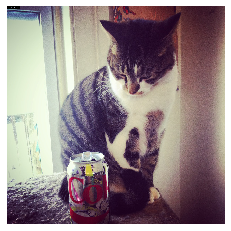

In [152]:
pixals_img, nexus_img = pixelate_rgb_nexus("sample_images/ginger_dc.png", 15)

In [122]:
nearest_color(255*img[0:15,0:15].mean(axis=(0,1)), colors_df)

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [126]:
Image.open('Nexus_Image_Iterator_copy_6/RainbowSpaceman_composite_2.png').size

(676, 676)

In [117]:
256*img[0:15,0:15].mean(axis=(0,1))

array([ 31.228655,  52.02099 , 116.40145 ], dtype=float32)

In [ ]:
# img = plt.imread(file)
# fig, ax = plt.subplots(1, 4, figsize=(20,10))

pixals_img, nexus_img = pixelate_rgb_nexus(file, 15)
ax[0].imshow(nexus_img)
ax[1].imshow(pixals_img)
# remove frames
[a.set_axis_off() for a in ax.flatten()]
plt.subplots_adjust(wspace=0.03, hspace=0)

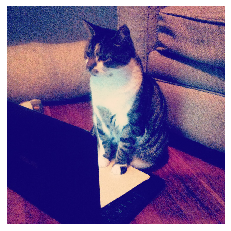

In [59]:
plt.imshow(nexus_img)
plt.axis('off')
plt.savefig(file.replace(".png", "_nexus_001.png"), bbox_inches='tight', dpi=300)